<a href="https://colab.research.google.com/github/rahulsust/BDLensing/blob/main/week-3/assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emcee corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 1.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
from astropy.modeling.models import Sersic2D
from astropy.convolution import convolve, Gaussian2DKernel

If you have counted a total of 10,000 photoelectrons over 10 minutes created from incoming photons at a CCD pixel of a telescope’s camera, what is the noise level or uncertainty in that photoelectron count?

Answer: The noise level or uncertainty in the photoelectron count can be estimated using the Poisson distribution, which describes the occurrence of independent random events. 

In this case, the number of photoelectrons detected 
is the result of the random arrival of photons at the CCD pixel.


Since the Poisson distribution has a mean and variance equal to λ (the average number of events), 
the standard deviation of the photoelectron count can be estimated as the square root of λ:

Standard deviation = sqrt(λ)

In this case, the average number of photoelectrons detected over 10 minutes is:

λ = sqrt(10,000)  = 100


Therefore, the standard deviation of the photoelectron count can be estimated as:

Total time = 10*60 = 600 secs

Standard deviation = λ / 600 = 0.1667 

So the noise level or uncertainty in the photoelectron count is approximately0.1667 photoelectrons/secs.

<details>
  <summary>A wrong approach might be:</summary>
  
To convert the total photoelectron count before calculating noise.

Like calculating λ = sqrt(10000/600).


</details>



__

Find out your preferred name’s alphabetical order within your team. Retrieve your specific data file for your team number and order number [here](https://drive.google.com/drive/folders/11ukgOh-Lal2K58fLnshbD1kM6WRS-b75?usp=share_link) . You can read the data file using `numpy.loadtxt()` function. The file contains a 2D image of an elliptical galaxy. In other words, each pixel contains a flux value. The point spread function (PSF: The PSF describes what a single point in the object looks like in the image) is a Gaussian with 0.3 arcsecond FWHM. Plot `numpy.log10(image)` using the `matplotlib.pyplot.matshow()` function. Each pixel size is 0.05 arcsecond. How large is the full image in the arcsecond unit?

Ans: Image size 120*120*0.05 arcsecond

In [3]:
at='''5.036786441531580089e-02 4.499910833436280427e-02 5.554529221328603078e-02 5.324978249666362240e-02 4.850525096317940404e-02 5.487010435183237861e-02 5.242105427894080266e-02 5.373718967546659009e-02 5.121336597308141086e-02 5.650578596208200716e-02 6.211204320071791324e-02 7.026347636597032875e-02 6.474607141259583476e-02 8.090533857700032971e-02 7.588875754603428836e-02 6.196751745765212427e-02 7.542778690306145561e-02 8.733965670196956743e-02 7.443754778117182835e-02 7.334392849003125436e-02 7.944520189496408202e-02 8.180276366609051664e-02 8.563365747742511525e-02 8.310512811862889870e-02 7.849896809582687651e-02 9.404075420626015203e-02 1.067555444359538780e-01 1.055637176390681192e-01 1.027572932002693840e-01 1.035960142483737106e-01 1.203865119806221684e-01 1.286165510822382396e-01 1.312463126107301647e-01 1.398795119804278064e-01 1.343246196064807885e-01 1.273379281412693742e-01 1.275294235163650647e-01 1.228172705836447220e-01 1.528677671481878109e-01 1.633529584212029817e-01 1.527620098703238727e-01 1.619818398560949335e-01 1.681270473937138132e-01 1.633525217170369304e-01 1.627999304656015389e-01 1.674632867523979385e-01 1.784239484289577016e-01 1.941695799985038162e-01 1.886794989049199178e-01 1.999391900961454416e-01 1.866718147715865916e-01 1.729977445722345464e-01 2.084859462494520199e-01 1.863335008973081020e-01 2.248509759872026337e-01 2.224600788797498896e-01 2.309305976733737609e-01 2.246504509569516861e-01 2.148554803428009419e-01 2.323353834920537930e-01 2.295700166154674982e-01 2.408888673504188116e-01 2.331772749110624932e-01 2.220073319378108589e-01 2.318447017626479589e-01 2.484738145216159322e-01 2.117512083586319260e-01 2.382133487586904075e-01 2.348518738844234122e-01 2.430450499647234253e-01 2.100213785711076142e-01 2.488728781401485513e-01 2.389463640146111956e-01 2.359960744891327067e-01 2.319660397206091684e-01 2.164259057261043451e-01 2.155390437900009115e-01 2.103319909668801002e-01 2.214925263351922025e-01 2.169652707258317437e-01 2.001479259607604477e-01 2.111316696414512195e-01 2.072337193210901651e-01 1.776119566073126044e-01 1.735978043897307699e-01 1.957588742721076414e-01 1.802707391930253034e-01 1.674694057485072995e-01 1.750626641716323262e-01 1.835006254249833824e-01 1.827398723007665204e-01 1.835703128794183847e-01 1.580839036256096175e-01 1.585587512709348834e-01 1.489825820934702061e-01 1.273502990427686499e-01 1.448448718896990506e-01 1.468504852571210495e-01 1.459193932845380959e-01 1.385723719943867949e-01 1.181828173318645731e-01 1.402662098422567394e-01 1.209193655637577497e-01 1.251001789263948005e-01 1.183828280752421830e-01 9.731006964619089150e-02 1.171600646871048951e-01 1.322496092353615538e-01 1.001258813162106270e-01 8.173382028020990953e-02 9.840226532429850737e-02 9.003280086337531185e-02 7.558381529420031553e-02 1.072796259186535178e-01 9.981463953255267918e-02 8.477889801403869219e-02 7.032663585904663783e-02 7.678248323576880585e-02 7.858765727369697307e-02 7.548436358471617702e-02 6.991938450971922625e-02
4.305505380396006110e-02 5.441259103283504345e-02 5.278552218965481407e-02 5.039256061949830973e-02 4.965052773419698778e-02 6.112048978102409963e-02 4.883652373179205031e-02 5.618805152865957719e-02 6.960932086429608145e-02 6.037608163592587257e-02 7.147988157680475185e-02 6.618821436881694442e-02 6.890578132907890230e-02 7.289200688309838139e-02 7.703147588407376067e-02 7.306056988436274158e-02 8.255654967000640443e-02 8.455899901870508883e-02 7.690533568457723346e-02 7.761694389729684174e-02 8.851487279647257678e-02 7.723477011541260429e-02 9.546096433844016016e-02 9.257097085357594846e-02 1.155326536245299962e-01 1.060889365548863816e-01 9.981020680865559935e-02 1.122926053446458433e-01 1.059265630413948889e-01 1.115068978881588596e-01 1.191354449967524515e-01 1.231384152619128258e-01 1.237049927297338980e-01 1.094860650819375336e-01 1.244029726565920174e-01 1.248881523237468094e-01 1.564242938823537654e-01 1.230801737517181471e-01 1.604653353144569194e-01 1.740096151460557294e-01 1.410671086760041382e-01 1.363310691269972175e-01 1.889124749515448676e-01 1.660961028926032645e-01 1.662300838089424138e-01 1.660295250953384150e-01 1.805438772623461363e-01 1.679351362108632006e-01 2.042732469244466220e-01 2.144397459351929658e-01 1.961909998214651230e-01 1.928966144501667035e-01 2.149386622053165719e-01 2.120313211208159077e-01 2.000197890643772569e-01 2.161656107585435971e-01 2.292184692745098673e-01 1.977727359061096646e-01 2.391050039717924902e-01 2.196375652052905136e-01 2.342484001461327681e-01 2.257635480993120392e-01 2.277148592904647273e-01 2.332529937367733841e-01 2.533620249696921789e-01 2.201941297341362680e-01 2.216799841353278566e-01 2.338369210265032472e-01 2.040039677746780800e-01 2.263243584548627896e-01 2.311244636273200592e-01 2.437380401335432212e-01 2.462132854424577133e-01 2.167305216566556558e-01 2.353049879319148718e-01 2.180245505489337154e-01 2.174618748061913631e-01 2.212874821654962354e-01 2.230364941891220532e-01 2.173997589264651809e-01 1.957185201086731052e-01 2.147881115753583481e-01 1.966729964590270274e-01 2.123253680292878087e-01 1.945415421256209143e-01 1.992480855795761285e-01 1.845151003400758438e-01 1.868733739409546846e-01 1.826025578220908940e-01 1.740830765878500497e-01 1.690709468590101128e-01 1.599626403030207644e-01 1.691600821407213684e-01 1.466792768551361814e-01 1.700685748842845069e-01 1.686413125378112554e-01 1.580982145903070124e-01 1.234722984455901423e-01 1.427297371628799827e-01 1.351280481171511505e-01 1.306190028579062856e-01 1.203803811028539700e-01 1.113153944468287943e-01 1.361651305828567582e-01 1.118350183702556955e-01 1.147423241276749190e-01 9.492341206984877822e-02 1.018696714530943070e-01 1.000769428274996820e-01 1.006866322969801886e-01 1.004334506811757483e-01 8.274969594371049675e-02 8.629145395793277884e-02 1.006913985727157512e-01 7.970016371661951815e-02 1.021506332064001238e-01 9.022480773371423235e-02 7.181669663933469561e-02 9.317568113483271075e-02 7.679988093602936605e-02 8.033235365177894549e-02
4.968871535804717660e-02 4.680757989551764808e-02 5.592123606845943867e-02 5.131469673517910501e-02 5.191549736861276326e-02 5.489419641746538792e-02 5.378374720755999677e-02 6.467000290201228851e-02 5.164855186626710754e-02 6.720814722657636464e-02 6.721021911450118791e-02 7.083588051620375026e-02 6.818880206022960577e-02 7.514094456334036165e-02 6.321594746149021560e-02 6.803675979321090195e-02 7.434501802937991399e-02 8.737761083199838130e-02 8.560073047612591635e-02 8.765661226785602389e-02 8.269318044687809510e-02 8.969126517884599969e-02 8.820032254021011042e-02 8.773743107922911399e-02 1.026372765839784346e-01 9.789570151696747047e-02 1.143260012414523824e-01 8.885958455091419461e-02 1.036954253384799740e-01 1.176254305315203863e-01 1.214342169912854819e-01 1.222230759735624811e-01 1.199085854167928206e-01 1.163321241684073942e-01 1.287038656898187583e-01 1.364731231308806136e-01 1.502309888450887865e-01 1.367835400001440882e-01 1.422063249475673807e-01 1.633269214218952547e-01 1.597970212077759744e-01 1.623383138562071726e-01 1.606439921746206090e-01 1.752954107672221040e-01 1.651270380301036733e-01 1.919372764242627261e-01 1.857753216098710081e-01 1.894780645418077669e-01 1.964233777347989263e-01 1.820958905957908158e-01 2.025484204505692276e-01 2.120072120873005006e-01 2.378914449756718008e-01 2.336053694819185123e-01 2.178791786173437106e-01 2.324221257612455738e-01 2.148268851386668510e-01 2.219899544977308459e-01 2.319274930783654931e-01 2.251762259914358300e-01 2.346098180110761655e-01 2.360243227313298109e-01 2.265509810200762864e-01 2.450918612665924923e-01 2.353960449345413597e-01 2.224612575343221932e-01 2.582471429243387573e-01 2.273344277877346054e-01 2.425865878179075674e-01 2.442759285683636372e-01 2.298545079532740842e-01 2.429338050883056710e-01 2.246980282598524670e-01 2.265454170245426169e-01 2.318736965476100031e-01 2.363841728080690041e-01 2.506588749956684126e-01 2.489441196649584132e-01 2.245769781514400654e-01 2.102446102173254339e-01 2.072527100916868037e-01 2.325340658441644726e-01 1.952283756941924353e-01 1.999404665454239116e-01 1.918754260190667638e-01 1.955296479043433511e-01 1.801404623072511424e-01 1.740585987906410892e-01 1.914613992777190743e-01 1.886799263273358784e-01 1.954126019870693065e-01 1.703084622884091237e-01 1.491522852907337104e-01 1.485331717944654295e-01 1.641103789076417130e-01 1.352833381871081653e-01 1.540740864250292053e-01 1.398493576470049016e-01 1.322433384146449453e-01 1.505557524695564087e-01 1.346533139174416749e-01 1.241991918349003715e-01 1.184498880567928375e-01 1.470450079334965077e-01 1.236671693873228617e-01 1.179661888399880787e-01 9.767230506131170664e-02 1.140836738758166241e-01 1.113211010170165882e-01 8.714356494693666078e-02 9.975809929809528742e-02 9.909101801656340636e-02 9.975104246719133927e-02 8.703759735494152883e-02 8.708837566751378989e-02 8.500441528183148854e-02 9.837085279296810258e-02 8.507833041618681480e-02 6.112439804462078963e-02 8.281830288741814927e-02 6.883725910141351434e-02
4.304625106244625021e-02 5.954147921729886772e-02 4.595235073565279854e-02 5.704114400576787425e-02 5.739987886926293387e-02 5.447310384819374629e-02 5.082107223110706590e-02 5.546223929571361677e-02 6.634898249502273193e-02 5.670397463523355747e-02 5.658860460832754874e-02 4.941799546497144258e-02 6.620069721245987193e-02 5.780995394156324130e-02 6.654240442946271483e-02 7.484485852724619137e-02 7.385667250937143213e-02 7.330392979235300643e-02 7.686735960614322904e-02 8.450242521132085571e-02 8.961813920938672962e-02 1.060306424626854815e-01 8.404869915218038390e-02 1.005225230170235240e-01 1.038309274989518832e-01 1.027591227816062464e-01 1.082686261497168845e-01 1.065413986345606356e-01 1.209818343557447357e-01 1.240791122879983527e-01 1.148679191558590607e-01 1.163559508501741391e-01 1.135233819773854153e-01 1.299964865136765402e-01 1.483726499492990514e-01 1.541498711278908307e-01 1.352743250865419689e-01 1.549395347341304685e-01 1.605274823154602959e-01 1.550103261710426006e-01 1.590453807341990489e-01 1.582819390104937829e-01 1.705166215689121745e-01 1.797891774135253196e-01 2.028357560795337744e-01 1.657143018556332947e-01 1.932436062509335084e-01 1.911573888110471020e-01 2.130066771482777566e-01 2.023299679347562718e-01 1.966759119451895466e-01 2.000392267915193367e-01 2.022907237120170898e-01 2.091131364817610527e-01 2.022389438905438375e-01 2.275361885201461487e-01 2.287503014592185135e-01 2.490194074342757247e-01 2.293084643047385296e-01 2.437372068832051319e-01 2.348122409536846644e-01 2.385197537388873412e-01 2.741393412644376193e-01 2.259678576504699776e-01 2.532572068122092013e-01 2.632481292196880984e-01 2.232685219184753489e-01 2.679599520520589140e-01 2.554459334788398706e-01 2.542455452692445328e-01 2.500282349241798041e-01 2.424284253776927411e-01 2.467266644023190236e-01 2.102657290363968146e-01 2.251652643104806728e-01 2.354602267674539562e-01 2.699867279105779838e-01 2.265638896523955725e-01 2.054069972739505368e-01 2.118502146288130661e-01 2.034733847342340696e-01 1.957030845844489608e-01 1.983604285768303666e-01 2.205090846219647516e-01 2.332697580000763216e-01 2.029003850037367773e-01 2.150471800118073373e-01 1.886597448284462186e-01 1.832157362247942567e-01 1.710557547699231851e-01 1.566090969212975692e-01 1.826337999075293705e-01 1.763847525256885540e-01 1.789080418857131038e-01 1.384188913298914636e-01 1.559516155777128099e-01 1.367079702340882330e-01 1.367222501457711903e-01 1.238202361503202148e-01 1.406885556479673394e-01 1.418251779210666641e-01 1.418324664228637622e-01 1.276945624008389846e-01 1.444756387266704634e-01 1.207046675658992041e-01 1.154297206643492973e-01 1.075695327183004008e-01 1.121001629520790716e-01 1.086416782771347511e-01 1.004852528799781014e-01 1.026329002200250806e-01 1.067301092345117330e-01 9.228575362925044157e-02 9.068862988344573994e-02 9.484481105506151200e-02 9.712825014033642235e-02 9.507303868553199089e-02 9.459432850045546015e-02 8.413312263786912326e-02 8.340420724487218607e-02 6.929869455484291563e-02
5.476194314008261954e-02 4.852989989170147789e-02 4.767484282286067049e-02 5.982951902922748616e-02 5.995490935148901912e-02 5.645551118344947078e-02 5.246201080965415958e-02 6.374775703307775099e-02 7.001873898658844686e-02 4.491546997155546755e-02 6.089897826314907836e-02 6.205507589915460614e-02 6.924040450894407284e-02 7.970158432984396357e-02 7.374658554765051166e-02 8.584494975073826695e-02 7.581794929749603729e-02 7.919353028565033481e-02 6.844208079935577838e-02 8.218464189731482239e-02 9.844686547484936268e-02 9.391600234192509777e-02 9.567980383641989939e-02 8.749991722271993622e-02 9.526431364769427645e-02 1.160719130024793766e-01 1.079704540967873078e-01 1.130357784235911517e-01 1.274864028309662112e-01 1.098743958889566580e-01 1.177091000850073454e-01 1.249405138202346194e-01 1.324559245091957993e-01 1.342202649229425893e-01 1.324791453934462127e-01 1.569362914743472615e-01 1.357880284086645517e-01 1.505363256798067095e-01 1.398700420928983557e-01 1.504919939982241328e-01 1.612211156009229207e-01 1.592232168735916442e-01 1.809391535603991907e-01 1.831618585712700142e-01 2.059509494554240261e-01 2.062435160029650605e-01 1.752655889219412733e-01 1.912539102167130078e-01 1.922311692455294097e-01 2.154805160779436901e-01 2.069947292658139704e-01 2.221528928211989884e-01 2.440992370896349906e-01 2.470057547120584618e-01 2.216059513932773506e-01 2.247844184117462896e-01 2.443001146678536462e-01 2.533361138030429949e-01 2.085588128801880436e-01 2.527340746102130775e-01 2.572965264915508810e-01 2.444314120155474390e-01 2.584857972865942655e-01 2.484358604012247562e-01 2.781910373276823001e-01 2.785415460290930900e-01 2.782164118537371889e-01 2.613504661595457690e-01 2.740752064661682308e-01 2.439150228965220046e-01 2.548518117552500684e-01 2.433701830281736478e-01 2.245249605035083695e-01 2.430823214365307183e-01 2.670174773493245168e-01 2.491135626335778397e-01 2.393762439326677371e-01 2.554959793912760513e-01 2.594111147245611870e-01 2.443201692698492855e-01 2.364267665342952851e-01 2.268728947740210888e-01 2.275483889535339088e-01 2.418612279026544354e-01 2.221904412703222531e-01 2.300847009604452820e-01 2.202062374271921419e-01 1.890587004927031523e-01 2.046706903086416007e-01 1.856949440134283702e-01 1.802900061417105348e-01 1.569398101176744387e-01 1.985403551317608817e-01 1.655308983795276967e-01 1.674949155880937068e-01 1.533143712192914232e-01 1.573859332209280038e-01 1.486515269614053225e-01 1.514819735930396094e-01 1.445663811101362550e-01 1.430368912336228149e-01 1.284920389208022706e-01 1.368770558693334638e-01 1.313202786538897326e-01 1.231842712620173502e-01 1.352044813931395639e-01 1.238183663280146146e-01 1.334333437185776794e-01 1.113929751006733915e-01 9.854430032020834729e-02 8.709161962372495569e-02 1.087854630784342719e-01 9.209134537914583085e-02 8.675835096919815026e-02 7.153065150772272562e-02 8.655667083868683054e-02 7.507779651741910976e-02 8.142373488070031584e-02 8.262993095672449551e-02 8.268075746488494360e-02 6.295866945365423406e-02
4.886558661220460204e-02 5.569431564213611630e-02 5.358406945246130954e-02 5.509352656957123423e-02 5.168990455813598367e-02 5.720612513800967663e-02 5.934957032097076812e-02 5.992056201115202041e-02 6.339161280990787684e-02 5.981000874922220989e-02 7.652982462378993267e-02 7.735865752212955915e-02 7.112296817245873648e-02 6.969556467475523931e-02 6.947305263747448334e-02 7.862204104634651358e-02 7.853615040793679447e-02 7.933769691682740488e-02 8.200181518272109393e-02 9.825131704123706011e-02 9.709290224303304684e-02 9.723091490988600150e-02 9.176455662810653613e-02 1.064621912058130726e-01 1.074475915199304410e-01 1.073119523424231614e-01 1.329460998640342173e-01 1.283761194824012686e-01 1.132820273240000147e-01 1.185723856878860977e-01 1.362798295942211357e-01 1.298789481398901491e-01 1.465368330357022519e-01 1.203620638080531574e-01 1.364518271870033550e-01 1.545627925080485798e-01 1.496587798764049682e-01 1.427579328644071888e-01 1.637568119748698536e-01 1.689749439888842963e-01 1.375253279646547755e-01 1.755194633173341456e-01 1.626984979218559224e-01 1.927174661938604039e-01 1.868046273774715271e-01 1.888438190182392118e-01 2.170011911574946939e-01 2.133288338164422426e-01 2.171095554753315060e-01 2.301018945816545591e-01 2.363531619497385439e-01 2.386138834711860612e-01 2.373813133783894969e-01 2.502706929875024855e-01 2.394051597524012587e-01 2.507427349002499528e-01 2.431618256050318283e-01 2.261316450745283757e-01 2.716687915290579292e-01 2.492378922863419666e-01 2.357533946081727672e-01 2.587674384895189972e-01 2.862117053232922648e-01 2.663306917611644731e-01 2.748669833643389571e-01 2.640958722692279825e-01 2.242289670487715991e-01 2.958595160205916841e-01 2.704292519478825874e-01 2.806302041240077982e-01 2.925091300661322724e-01 2.618636612307320144e-01 2.680810650907895498e-01 2.717067056218384624e-01 2.747052347884265666e-01 2.564199462268224594e-01 2.600787712471810398e-01 2.365910803371237547e-01 2.522293970437308186e-01 2.548296719322963866e-01 2.323932743896198472e-01 2.552105298858737825e-01 1.928089530679724661e-01 2.006775011557917487e-01 2.075495796079913080e-01 2.416517888302908423e-01 1.936103034080421115e-01 1.946984308210450154e-01 1.945795566468677962e-01 1.923675474922816875e-01 1.923683892741228363e-01 1.977481910766381024e-01 1.735583151627926313e-01 1.689729709039635985e-01 1.790846972622343602e-01 1.728703220297177212e-01 1.691373041822888112e-01 1.577085579265273541e-01 1.192752569751298758e-01 1.375057701256418019e-01 1.480069261266622194e-01 1.480441929582687888e-01 1.257857838820686525e-01 1.163467182230589758e-01 1.200977455730038029e-01 1.235069647823408973e-01 9.827193156171480648e-02 1.058479081773005398e-01 1.088334435733652600e-01 1.146040538380161955e-01 1.084063013858786451e-01 1.051018176143334454e-01 8.703285062390488103e-02 8.271333500681417317e-02 9.227383227150035006e-02 1.024227019760140245e-01 7.991767024038819167e-02 9.718514153447600779e-02 1.046884851091093999e-01 8.222578475391503772e-02 7.750224167141439580e-02
4.902992673958238984e-02 5.137408929152868786e-02 6.895175440534184741e-02 5.028244164961552520e-02 4.882305063164327219e-02 6.132956371210705748e-02 6.613847104711076397e-02 5.732010646553409999e-02 5.625107581881948898e-02 6.016942574098896324e-02 7.166205349768046962e-02 6.889557033791524066e-02 7.187705941032528079e-02 6.270404730269915627e-02 7.170266023856415594e-02 7.096667092826526579e-02 8.814461595262503002e-02 9.374341804205596485e-02 9.238383488821791389e-02 8.795498699566380030e-02 8.735832496350631748e-02 1.018318640684975768e-01 8.749075491191385390e-02 9.270953353163222110e-02 1.199890409454498763e-01 1.037282920061187719e-01 1.050154822794954340e-01 1.172860626179430266e-01 1.182273234296324638e-01 1.264516413808430551e-01 1.123841865399537870e-01 1.428592921780332259e-01 1.493105605251094925e-01 1.586059922503229858e-01 1.358119847894665999e-01 1.533644816565479241e-01 1.486853256682835744e-01 1.535294292858344622e-01 1.595230722542003432e-01 1.709898269901672652e-01 1.496538656708893134e-01 1.757524565172144115e-01 1.908652322486317499e-01 1.939530490237771077e-01 1.833293623482870616e-01 2.057068507455875328e-01 2.033551350023666826e-01 2.134353895912026733e-01 2.418319790485972121e-01 2.142685759413226199e-01 2.263636804804062264e-01 2.312051411869426587e-01 2.289212269474661388e-01 2.389575259260339202e-01 2.342080745190272817e-01 2.629910763918837935e-01 2.623214592965273373e-01 2.489073877672921264e-01 2.581842455675963377e-01 2.641699045127107182e-01 2.683378786614312728e-01 2.706178596873408670e-01 2.749395830231669557e-01 2.642273398961001440e-01 2.615843915595778002e-01 2.834293493882149573e-01 2.851970498188181047e-01 2.962564284915021329e-01 2.792802670018068034e-01 2.651366390093228831e-01 2.836961803064134702e-01 2.504592255713380400e-01 2.602025134966889919e-01 2.579286597019210259e-01 2.393528790310956444e-01 2.597478264640127321e-01 2.592700808032189497e-01 2.338316315410939594e-01 2.790487561676440742e-01 2.628555193102375398e-01 2.698190212315294545e-01 2.418701242322076894e-01 2.318490376538272779e-01 2.391889855369796203e-01 2.343453452664400471e-01 2.298642915824636035e-01 2.239069152322311629e-01 2.020410886193913791e-01 2.118649525370071840e-01 2.287673188668755131e-01 2.018733048829838006e-01 1.954633442808154653e-01 1.683176861167039462e-01 1.709380513675615998e-01 1.631339591710511960e-01 1.717625994990979454e-01 1.765891845604097843e-01 1.752844189214434190e-01 1.437122623400693411e-01 1.410686585438031548e-01 1.534930886615402668e-01 1.437544063088309620e-01 1.361649775930605655e-01 1.243372519033578011e-01 1.273341865841624565e-01 1.239240272539443299e-01 1.150532272958413454e-01 1.112629745814285864e-01 1.129926758647337021e-01 9.430272792616392619e-02 1.073171953600452339e-01 9.869686843354946726e-02 1.081498282862886628e-01 6.358628332742746747e-02 9.307714314614821960e-02 8.930679083081756453e-02 8.146684370826291766e-02 8.125793225734352643e-02 8.698880392047335375e-02 8.124553133777431824e-02 7.554225619121898716e-02
5.634787597462017489e-02 6.096561364469477162e-02 6.151617088788408072e-02 6.138844479835176005e-02 5.350315387156261843e-02 4.842369093008495884e-02 7.270298999639543402e-02 7.025535808571473084e-02 6.315238131669961841e-02 6.722116435217941055e-02 5.842361893144035201e-02 6.628369906696321423e-02 6.776462119043616394e-02 7.377267273404132519e-02 8.840155214727014876e-02 8.477458247781508027e-02 8.329288825303171606e-02 9.665151689698747717e-02 8.909248341817734007e-02 1.015394284080661236e-01 1.024094585283553543e-01 9.776090519605182272e-02 8.505067739402459581e-02 1.022680078073486265e-01 9.798601749823671048e-02 1.074283959264260568e-01 1.231526931226226834e-01 1.127344053168288646e-01 1.166814484866550566e-01 1.523964330115289978e-01 1.437799799039864712e-01 1.436429079640684503e-01 1.464887311906200862e-01 1.685407666048772124e-01 1.617204652661537179e-01 1.574577484383333503e-01 1.786024061194298462e-01 1.571109625119745390e-01 1.870875476464712861e-01 1.645159227145723546e-01 1.816077897905021832e-01 1.926808135317752968e-01 1.988659347141018829e-01 1.738900480553588201e-01 2.140046156164181479e-01 2.122258273054855315e-01 2.218679932024643087e-01 2.333442020568285147e-01 1.887243949415156885e-01 2.446748111673624215e-01 2.481458496301135463e-01 2.324333879056375007e-01 2.578910990776828727e-01 2.406326236731000656e-01 2.433812797610230005e-01 2.549287240301457702e-01 2.736282338233505529e-01 2.605442327389770885e-01 2.679767596079138392e-01 2.849848268540318141e-01 2.879020926110783529e-01 2.632542717045011083e-01 3.073468509977372309e-01 2.935716656585589113e-01 2.479855971044038210e-01 2.688424959055874530e-01 2.765666640909254514e-01 2.741825054501028647e-01 2.946937029832304988e-01 2.988074714332382698e-01 2.854364111138018023e-01 3.075159771264713293e-01 2.905596863441085587e-01 2.824200806611106285e-01 2.592401425606198906e-01 2.613314715514966635e-01 2.749494116485831641e-01 2.765221042117738670e-01 2.789046488971118065e-01 2.711005056469201757e-01 2.480618866477530549e-01 2.412197314702902440e-01 2.228445564432024739e-01 2.090249739248843386e-01 2.429904287770049687e-01 2.328181231226221781e-01 2.054265295405027503e-01 2.248318044750518274e-01 2.096589495592659502e-01 2.192751549095390273e-01 1.859658750999439725e-01 2.085584876820756051e-01 1.900231895295608209e-01 1.976092745694735808e-01 1.965671080518228142e-01 1.953986411942913726e-01 1.665542470365114491e-01 1.648216578319187386e-01 1.399060479613991603e-01 1.695188043277745249e-01 1.371665071269349834e-01 1.604154008097682660e-01 1.417845611188265353e-01 1.449997680973894865e-01 1.341827240100768870e-01 1.176190268328572153e-01 1.187061366114420535e-01 1.325361808260669128e-01 1.169742763726698831e-01 1.070849062973453225e-01 1.069762747760444194e-01 1.038213661614906108e-01 9.692989954129054009e-02 1.074981596168479298e-01 8.386427040887194095e-02 9.117227315650708319e-02 9.861826409947439809e-02 9.489113196132040184e-02 7.636564752968212633e-02 7.670530369756375921e-02 9.873337969759160559e-02
5.744355507143265871e-02 6.213218593132392720e-02 5.259197925568406123e-02 5.302547140268559778e-02 6.031696375153584172e-02 5.837738319765157363e-02 5.796676310756648798e-02 7.246195991186210605e-02 7.368100575939588726e-02 8.346038577738386366e-02 7.080024127905429343e-02 7.494690185533958715e-02 7.382085375133524974e-02 7.372906460747245816e-02 6.237367466329057919e-02 8.929317326094389495e-02 9.250700013913296105e-02 8.649557389844925170e-02 1.077704538675156448e-01 8.652007764278503432e-02 1.036052428087269883e-01 9.325436439301268421e-02 1.085762624475233862e-01 9.015263615475778425e-02 9.809811809665222593e-02 1.255314154258588832e-01 1.209204935356303634e-01 1.148336742530536442e-01 1.158559376665319746e-01 1.301803666779397517e-01 1.302427432100153604e-01 1.301172166260848584e-01 1.435185339776241242e-01 1.766456776453235455e-01 1.679695913834980681e-01 1.516613770777817116e-01 1.644499293321399214e-01 1.684303158414870993e-01 1.672939771081488336e-01 1.925860539514240022e-01 1.809726828579069635e-01 1.986862883056911555e-01 2.148856854387546922e-01 2.039436159147693661e-01 2.215330811506536768e-01 2.137012892015135446e-01 2.251214924758216662e-01 2.301815885951599694e-01 2.427053151993877056e-01 2.912689405742456272e-01 2.567544414489943416e-01 2.687120313035448183e-01 2.864331786914479649e-01 2.593297898169361071e-01 2.673062603411605065e-01 2.615184689567535137e-01 2.865828275409424419e-01 2.850509904946662010e-01 3.223201854959069079e-01 2.854504006713368680e-01 2.933775129404312954e-01 2.804990529261351395e-01 3.039102427932527939e-01 2.848218023277731548e-01 2.743073894704547433e-01 3.331514460533759880e-01 3.232948240966989073e-01 2.956397204290450720e-01 3.111629477907724706e-01 2.885988339758331356e-01 3.151107699025016973e-01 2.999235106590701916e-01 3.019114231479634314e-01 2.686641214351133122e-01 2.955762933266555259e-01 2.943224035106765113e-01 2.990862346606130151e-01 2.699849132768417093e-01 2.888948244233749407e-01 2.578470870218359523e-01 2.573496176809021985e-01 2.320537823187387994e-01 2.496409088284879396e-01 2.324745076219908446e-01 2.332752644789835017e-01 2.395644115493949233e-01 2.134914544229201405e-01 2.448972948291908425e-01 2.357911721411696249e-01 2.319261241283173125e-01 2.137295991411345131e-01 2.301643487006207467e-01 1.926532632342760065e-01 2.032684980835310629e-01 1.951548072251969301e-01 1.877901474009459892e-01 1.554532294901338485e-01 1.645094800772696486e-01 1.818697155872175675e-01 1.706255411673166800e-01 1.340693454994781320e-01 1.568323794997131815e-01 1.577795631367208407e-01 1.568838753073708292e-01 1.337608692292203416e-01 1.463928450354717026e-01 1.159741196202045965e-01 1.150080194658147509e-01 1.197936954903868895e-01 1.288013869683333201e-01 1.125660439795874573e-01 9.706303349131677194e-02 1.067190835999914794e-01 8.352295751170099591e-02 7.863758761706558797e-02 9.720932577045163225e-02 8.515643840759233585e-02 8.511445777086329434e-02 8.794792722371855276e-02 8.596380021804696236e-02 8.420571200380996824e-02
5.168932158316359021e-02 5.722554311350022682e-02 4.407564286718303193e-02 6.483352890791072021e-02 5.614645422151184895e-02 6.306579720394984989e-02 7.255526919453191004e-02 5.337778475029489322e-02 6.270293330150794597e-02 7.612194963189225505e-02 7.227279451174595248e-02 8.579631381453445282e-02 9.031710992643106339e-02 8.576974158813201188e-02 8.721760353015377276e-02 7.744882323777996236e-02 8.739502012980479573e-02 8.600656046234535224e-02 1.019056446784695480e-01 9.897523574683238234e-02 9.296700437269832251e-02 1.179965489307568810e-01 1.155467385111684786e-01 1.029309930535151352e-01 1.209354177714921236e-01 1.351903124639735609e-01 1.277576700731513082e-01 1.597652524755903969e-01 1.348350436305577049e-01 1.211516903723535016e-01 1.556585969884421161e-01 1.461830257630560848e-01 1.627098354856836293e-01 1.414767542204910522e-01 1.663656768549232889e-01 1.769599052261334182e-01 1.823692909695440179e-01 1.982812075712601096e-01 1.738887106327668686e-01 1.824196505362410403e-01 1.881392361960479986e-01 2.109183298477868007e-01 1.973759866651569883e-01 2.162992871195312250e-01 2.157384320704739955e-01 2.280272745937633738e-01 1.989456773635742970e-01 2.443022758111860204e-01 2.540274604994687824e-01 2.587601225345683154e-01 2.663821198695132675e-01 2.806951352829049617e-01 2.573532671776005420e-01 2.968398823188871383e-01 2.819292182472171726e-01 3.018525109068031509e-01 2.849663819173923751e-01 2.829603650909412460e-01 3.160541276351301887e-01 2.799341706476038416e-01 3.080024031379350880e-01 3.040492207309440920e-01 3.137026263183740338e-01 3.101570337098719099e-01 3.049480490344157468e-01 3.311965240563444213e-01 3.241888224376147098e-01 3.380361574706555183e-01 3.044364968416132800e-01 3.155348365572509528e-01 3.091184275272962356e-01 2.876810285897702379e-01 3.132248183188810486e-01 3.134904129071470202e-01 2.872838443283704524e-01 2.788286638275845886e-01 2.807721878658174797e-01 2.934536069477055586e-01 2.930563807384790609e-01 2.686592270320173337e-01 2.690997263377685744e-01 2.595732998033248862e-01 2.596608811311593712e-01 2.796320851183828338e-01 2.684117826945456309e-01 2.533270477561068712e-01 2.424024420326614526e-01 2.346145622663080021e-01 2.126739465885539027e-01 2.233643072112870276e-01 1.964110859745346327e-01 1.951489166427505251e-01 2.152154177792305334e-01 1.889927851719646612e-01 1.920880101895258985e-01 2.033828003246831995e-01 1.743355048298730892e-01 1.618043991095577949e-01 1.452725747901277009e-01 1.622902633470726663e-01 1.661992995585238053e-01 1.291743493418399114e-01 1.551432102469981200e-01 1.295916995281733430e-01 1.269810765366312100e-01 1.142999868673393593e-01 1.335706739966068257e-01 1.273033340091894727e-01 9.651440089061505412e-02 1.082050964694185741e-01 1.182637032115845255e-01 9.311838637618546910e-02 1.120269588999939503e-01 1.094392281029510916e-01 9.726866075148640767e-02 8.282703821571138492e-02 9.728626200249308742e-02 7.961082266089704318e-02 9.284604146913953693e-02 7.747897172591998449e-02 6.469800080767890149e-02
4.775032305310818875e-02 4.915143624059189337e-02 5.396207869958722508e-02 7.003880987663289870e-02 5.303587594569444952e-02 5.937035392414011931e-02 6.817069979203314867e-02 6.843652164892605194e-02 7.069765152153453802e-02 8.675123386546144955e-02 7.350029238733178649e-02 7.059332848875624067e-02 8.380202380971288334e-02 7.315566617769292401e-02 9.492858259211987837e-02 9.286633123005337553e-02 9.261935850158700689e-02 9.226977793619575707e-02 8.922852072178907856e-02 1.039123905865071557e-01 8.474970512760784946e-02 1.203289372417674225e-01 1.056455897234649943e-01 1.314304035460419073e-01 1.219800869832858292e-01 1.076014450360757435e-01 1.220305285645747057e-01 1.292497417837322193e-01 1.232286004345771874e-01 1.274701598856056439e-01 1.426544698663319843e-01 1.451256644655533889e-01 1.892970732161540215e-01 1.581634639135370834e-01 1.830837564521981542e-01 1.655750759859932753e-01 1.564646176728552718e-01 1.813413926788058073e-01 1.997066055562445319e-01 1.903621280676867367e-01 2.060807321300006933e-01 2.008208837848645123e-01 1.963446944585769960e-01 2.322073078934594192e-01 2.380126023024470294e-01 2.529184276602738923e-01 2.471423912428859226e-01 2.552774750990955410e-01 2.543439368795418765e-01 2.726595369161852744e-01 2.737649562692577865e-01 2.964145083284911442e-01 2.806360844990599124e-01 2.954606162930215607e-01 2.897579523246529010e-01 2.891456991601725202e-01 3.099620561235415517e-01 3.069509138686810634e-01 3.096571481619083688e-01 3.010262976001253921e-01 3.059191772154523092e-01 3.464206531245602738e-01 3.353408589965187758e-01 3.134984398578438691e-01 3.292170785963511315e-01 3.623887114013106814e-01 3.071689052243492535e-01 3.446373857138625429e-01 3.255454667680562353e-01 3.334374939807374094e-01 3.182789211552373154e-01 3.544477374683951965e-01 3.404811300768819105e-01 2.845099294259693101e-01 2.800378862085606269e-01 3.051914155091311476e-01 3.108461360318549582e-01 3.436893454055089392e-01 2.825591058066844741e-01 2.776695881510505837e-01 2.927132774320877484e-01 2.776024646599516421e-01 2.869135741971145515e-01 2.916366301988163601e-01 2.727350346528261138e-01 2.581489614594049131e-01 2.414565843530945277e-01 2.385820970224161452e-01 2.570956762899851977e-01 2.095541498893917221e-01 2.049023304686039826e-01 1.952110200094834269e-01 1.932037651902454856e-01 1.977969855668654520e-01 1.914743635954189449e-01 1.805771113497973701e-01 1.841463463265508860e-01 1.618413426460411642e-01 1.815141351009673110e-01 1.796322123869407705e-01 1.672332107919412558e-01 1.309715221805649865e-01 1.348320771687535613e-01 1.476740642811993909e-01 1.402748202106962883e-01 1.447506633464809567e-01 1.240481321627258937e-01 1.374647383234630926e-01 1.302071020801217338e-01 1.063848627499869304e-01 9.188252018374030994e-02 1.138419706328101244e-01 1.201537321442640444e-01 9.061463510287187662e-02 1.051103846855216545e-01 1.026319017373058112e-01 9.194561491718890311e-02 1.001025648910254529e-01 9.350065713624890196e-02 9.538168019120130126e-02 8.097803918053382566e-02
5.168625891233260411e-02 5.199197401766117443e-02 7.121477673138107423e-02 6.909488783284409297e-02 5.952688383331661975e-02 7.133332643283080143e-02 6.718963388388732305e-02 7.240808620379785010e-02 8.278731871347412563e-02 7.821572589740281856e-02 6.444697583695534193e-02 8.496324373278961450e-02 6.701446414500447646e-02 9.262139182304598983e-02 1.027706977112468056e-01 8.025243610434842911e-02 8.777623631926738390e-02 8.069598918738435378e-02 9.603642504109337341e-02 1.091181739285914942e-01 1.150651656850546073e-01 1.047606145881656431e-01 1.171896256412676557e-01 1.184181016267171066e-01 1.202377305461519857e-01 1.191716895997994158e-01 1.388664333481450242e-01 1.318304471411023693e-01 1.405460651277677664e-01 1.466014715832121840e-01 1.494834382714504417e-01 1.476386820214914408e-01 1.282933311084477057e-01 1.767851066259326920e-01 1.709117740271037245e-01 1.867609584863617889e-01 1.740999466996461242e-01 1.750672570295056241e-01 1.689068531530995287e-01 2.012419712389834914e-01 2.021815469838008084e-01 2.417977961843987555e-01 2.449003007310339430e-01 2.321891452690874880e-01 2.036320861550224293e-01 2.598162429502243187e-01 2.358362589522370878e-01 2.360561112699537945e-01 2.375321880188456247e-01 2.733040181755213571e-01 2.841217518052427948e-01 2.750281794999329121e-01 2.934740729227515721e-01 2.990833620791557568e-01 3.305954022887973021e-01 2.694362998946377985e-01 3.048000885245129576e-01 3.294575874284008665e-01 3.151234339833696163e-01 3.343154874106900598e-01 3.321607238597483747e-01 3.257043108759098415e-01 3.288855977588006629e-01 3.601961943945505840e-01 3.262237069140481172e-01 3.366245870265588969e-01 3.520384756817367400e-01 3.506294826445156554e-01 3.541354028207306937e-01 3.528194081961443240e-01 3.373262818570337829e-01 3.254077461259530235e-01 3.117406864311451642e-01 3.219686229473709416e-01 3.395130347227110490e-01 3.125089081838273164e-01 3.118608668710008414e-01 3.032914562491599852e-01 3.033479810198968507e-01 2.921122679645487552e-01 2.920308087583673995e-01 2.852444497862635098e-01 3.006962342551194323e-01 2.735389482911769754e-01 2.672110102448428948e-01 2.532314909415730453e-01 2.804110128718452222e-01 2.403422127191476576e-01 1.933828495849228002e-01 2.273981419167844797e-01 2.431205946583603894e-01 2.206610439605470597e-01 2.231795719221624230e-01 1.851933030909600486e-01 1.941853075491056790e-01 1.982950834591828138e-01 1.753425109260552117e-01 1.869891581952389525e-01 1.764959700080933058e-01 1.695558477786810181e-01 1.547915139059395928e-01 1.512142084923358554e-01 1.469571764118170754e-01 1.523715937880458227e-01 1.490196688325740870e-01 1.343187714504824326e-01 1.294597852495929236e-01 1.237972557669904522e-01 1.321344654908011562e-01 1.289030482423974833e-01 1.193438155355874691e-01 1.012668422424452958e-01 1.043519528714357547e-01 1.081600696143271978e-01 9.995918310258067319e-02 9.400415321420078907e-02 9.041017983349884657e-02 9.597897999853376161e-02 8.394743813678078037e-02 9.041513768748082880e-02 7.092641994360361635e-02
6.802560241515434591e-02 5.910965100387995108e-02 6.669308805096911541e-02 4.952075079240660788e-02 5.880057598411061320e-02 7.193308836390265026e-02 6.217529455151155765e-02 6.845649814896476171e-02 7.644278924594703761e-02 6.993195178373513843e-02 8.719006866754111518e-02 8.395133319315055409e-02 7.529626827943997069e-02 8.005571628993372879e-02 8.897776925693821892e-02 8.501326855726427933e-02 9.820501757293610690e-02 9.689822830249981978e-02 1.177267072861179348e-01 1.077565844355098112e-01 1.214216466191885696e-01 1.131129304965764054e-01 1.228984116689608719e-01 1.080004405493513731e-01 1.289481937162063330e-01 1.334892750667002470e-01 1.211061539216788246e-01 1.249413953166012003e-01 1.469981533631834758e-01 1.464432787282402004e-01 1.291166882649473213e-01 1.742191902553042737e-01 1.634021265120214617e-01 1.470034888634797754e-01 1.816524790614984508e-01 1.954745832089979651e-01 1.935204918743724800e-01 2.012214667517367717e-01 1.991848776570125656e-01 2.073496422649491466e-01 2.430463254476768475e-01 2.138267151341633476e-01 2.606715286444459267e-01 2.481812231310407957e-01 2.349489403220951511e-01 2.313700591376047500e-01 2.702957763852977258e-01 2.461507476025739105e-01 2.923787562666264050e-01 2.906229167115054191e-01 2.912429735589511792e-01 2.823713461427126981e-01 3.003353752612639704e-01 3.141588825353791026e-01 2.959549818688011480e-01 3.156983505675927115e-01 3.100661502829601956e-01 3.464822173180561182e-01 3.314700818495535106e-01 3.211159527285469273e-01 3.536039364658602469e-01 3.399703125997542430e-01 3.506039146259504746e-01 3.363351371327540362e-01 3.709587126490830888e-01 3.314604405321111558e-01 3.680572845912521984e-01 3.916692551304096770e-01 3.462208836104531673e-01 3.571110730384018939e-01 3.521148456380119862e-01 3.348445638407123170e-01 3.436827500620414089e-01 3.252374831453772597e-01 3.389784667354400205e-01 3.295640972036759098e-01 3.180821079323337131e-01 3.525190389425756354e-01 3.151195692458113040e-01 3.086252854341737795e-01 3.329250513033518155e-01 2.859150997295480945e-01 2.720470966675087032e-01 2.914408955055388106e-01 2.703373462006969929e-01 2.836133600110276598e-01 2.636003109331005456e-01 2.776072736430492127e-01 2.225206345576682121e-01 2.295487750129589777e-01 2.134264650925870310e-01 2.333260679220803546e-01 2.173558159251987865e-01 2.307078792918612065e-01 1.996667115335966913e-01 2.051189916830358229e-01 1.836661762491629546e-01 2.009255512871516158e-01 1.853032136376929762e-01 1.585649155828787182e-01 1.479172086650877294e-01 1.684992128262405575e-01 1.438540916119058488e-01 1.596607297384456947e-01 1.332002437110068604e-01 1.318162543475357162e-01 1.298555544562104147e-01 1.337387602228923833e-01 1.386399548732538678e-01 1.049704139812987769e-01 1.264597857951679227e-01 9.766595251457602100e-02 1.117168350740667393e-01 1.053476546230162625e-01 1.163332907004459293e-01 1.177115784166750667e-01 9.054902713552115401e-02 8.312013355417557925e-02 8.671275500540455428e-02 8.204893694540911497e-02 7.426536642979308933e-02
5.381771511812684372e-02 5.464634398495933632e-02 5.318756997041492601e-02 5.942794449817812713e-02 6.153313086396098447e-02 6.357856921576361675e-02 5.859471820406633724e-02 6.665843246079734830e-02 7.594776728151808598e-02 7.823878476814208338e-02 9.596820674130879247e-02 7.547596964694698596e-02 8.215178447515271432e-02 8.817364576578347324e-02 9.405924101959595163e-02 9.014883630479038346e-02 9.136259637623632412e-02 1.079140667312497720e-01 1.034493758550564801e-01 1.030814150147802560e-01 1.146530593263689474e-01 1.158098421655715249e-01 1.146774278269056951e-01 1.161646366214127146e-01 1.206021730020008648e-01 1.485743019847592106e-01 1.278433188625499317e-01 1.435288689176539845e-01 1.652169239825246327e-01 1.522039828548953366e-01 1.550444276203233329e-01 1.706822115898971870e-01 1.875809865731688231e-01 1.446871367792663399e-01 1.870554100222118210e-01 1.979844098998219670e-01 2.019132941961041539e-01 2.170416246308151109e-01 2.166993438864319999e-01 2.107069970477855325e-01 2.265589813582280510e-01 2.428285939025859319e-01 2.366848130711049769e-01 2.156137122088080116e-01 2.282352510572296933e-01 2.536342737280196102e-01 2.385579736763881464e-01 3.167102481335298259e-01 2.676960233870422923e-01 2.674400097594537562e-01 2.892765996290825870e-01 3.158856765326106819e-01 2.998459510225707225e-01 3.503755432878443710e-01 3.195960415601263871e-01 3.138065738176327168e-01 3.552786495441942471e-01 3.523027263160641298e-01 3.721258350738119169e-01 3.660004807355135004e-01 3.747516892168879510e-01 3.524351840907450351e-01 3.459359684573369287e-01 3.824503691342893696e-01 3.689850311522228088e-01 3.796070760586516823e-01 3.571464847040974888e-01 3.574622800840672743e-01 3.833758566707326509e-01 3.677784630699434953e-01 3.615425668463581599e-01 3.538989940724083794e-01 3.879039652214786860e-01 3.562164379186233965e-01 3.321414840050637141e-01 3.760022713078826628e-01 3.568319364735843546e-01 3.202150690521179399e-01 3.306061795319512608e-01 3.154194981256813191e-01 3.113789655706044046e-01 3.077108519194627356e-01 2.836628996640475631e-01 2.819845786833988233e-01 2.657543035142710397e-01 2.972795764070750302e-01 2.610680827213001098e-01 2.706233876877999767e-01 2.390323148713408286e-01 2.410790092256279715e-01 2.583228759513123696e-01 2.192459269928656862e-01 2.284327542633128316e-01 2.074657458636980922e-01 2.360276962536364542e-01 2.003334233271235609e-01 2.111130361960686652e-01 1.878157940861964470e-01 1.634941618716136136e-01 1.921145447357845149e-01 1.599674361203637651e-01 1.694587266321244401e-01 1.565795401064803694e-01 1.429701325468361872e-01 1.380265972582817302e-01 1.523457136381140553e-01 1.368546903346324339e-01 1.247861220190919357e-01 1.343214049678501110e-01 1.189885220356600853e-01 1.095289862749879994e-01 1.076972675094502591e-01 1.156602062358060984e-01 1.006746501516304487e-01 9.953109055775406777e-02 1.107159828746853980e-01 1.111307977195333807e-01 1.004334700022434940e-01 9.376733218148598781e-02 9.636193332871867412e-02 7.297932129661049983e-02
6.033162884673762272e-02 5.078895361425379840e-02 6.332393235752663274e-02 6.284046575699288317e-02 6.904519334143852105e-02 6.390589529765114407e-02 7.884236638242125839e-02 5.732458858630781751e-02 6.136427688120344587e-02 8.568149058339084856e-02 9.209548794950767059e-02 9.320621863023934028e-02 7.489816860097676943e-02 9.276126431912141979e-02 1.038201844602224116e-01 1.021162753271173257e-01 1.031122788148477604e-01 1.045188206533588793e-01 9.792682342997409417e-02 9.776641008550303324e-02 1.009131940822669826e-01 1.362566684042451348e-01 1.143931106893607552e-01 1.272716968519049530e-01 1.356192649261372674e-01 1.334238731873809425e-01 1.459790054197042386e-01 1.528180318527317672e-01 1.526278355611477011e-01 1.579106949987635344e-01 1.782004863254332827e-01 1.463566292375832467e-01 1.949483758225842300e-01 1.832021000930346699e-01 1.941536356005795771e-01 1.902511473659375119e-01 2.251977105862453810e-01 2.068058697167940718e-01 1.983170034781402413e-01 2.460391875004508677e-01 2.527635526959171597e-01 1.957407169085239040e-01 2.280924081478934717e-01 2.442057786550265175e-01 2.548206769964123652e-01 2.933335803052322666e-01 2.869713538069772474e-01 2.739376156519323091e-01 3.013770679836744737e-01 2.926322807448933916e-01 3.172704782918362998e-01 3.285354761859913819e-01 3.353664549886505863e-01 3.423534764890198701e-01 3.563004135666424377e-01 3.582522955616239124e-01 3.768239679506882323e-01 3.923327321747716590e-01 3.428335180412829808e-01 3.678221286901768305e-01 3.809192682986146106e-01 3.897452536922244581e-01 3.922563371252807407e-01 3.922091462111919058e-01 3.895193418444809486e-01 4.085716252080928146e-01 4.216852411227187680e-01 3.899095805629357869e-01 3.880574845242151238e-01 3.616286241413510516e-01 3.642659241856925911e-01 3.879427990903056567e-01 4.184038109609187761e-01 3.926131713872835216e-01 3.532638155801100521e-01 3.541703291462141578e-01 3.697725549602778328e-01 3.610034005801477375e-01 3.185821772559855325e-01 3.294188407942530983e-01 3.009631184797717518e-01 3.066922203076013487e-01 2.991072692798313892e-01 2.818691066502678200e-01 2.830738737601161126e-01 2.849564157946675169e-01 2.649746061458685409e-01 2.617126981139030750e-01 2.673289895103450053e-01 2.628469579813458301e-01 2.630934943858975750e-01 2.376380724704670322e-01 2.411718503509293621e-01 2.140591040176368642e-01 2.319077300923061136e-01 2.044453387500095587e-01 2.090603565866400171e-01 2.116160460337947191e-01 1.532793074384615761e-01 1.790931187177279005e-01 1.691250749358953198e-01 1.689911847501189002e-01 1.738717223331543438e-01 1.488916760205140077e-01 1.374107058026677319e-01 1.476590663779377144e-01 1.376715927238558179e-01 1.273737708538990043e-01 1.346291700863693486e-01 1.225816849429823968e-01 1.110104361341855833e-01 1.152329699111917238e-01 1.285263748069416512e-01 1.098675145172790246e-01 9.985989663248727444e-02 1.136745342043572055e-01 8.392560376918907494e-02 8.163670552486113063e-02 1.063670996378719980e-01 9.082498871880614888e-02 8.292104281716777825e-02
5.501587807294305854e-02 5.951338721006284999e-02 5.045749596627485678e-02 6.779639641325814481e-02 5.679807281193453156e-02 6.713058041673210241e-02 6.328813345618182484e-02 6.277842153388114854e-02 7.391933473494831375e-02 6.502407985679485580e-02 7.396240195096315251e-02 9.522080482573626325e-02 7.333399069714237328e-02 7.264564937629866548e-02 9.637131308549101716e-02 1.040768663216502243e-01 1.006256869880613886e-01 1.013228824404729111e-01 1.071388235915995135e-01 1.096289510308250253e-01 1.269855810805853857e-01 1.281481848153327996e-01 1.209382207613964033e-01 1.298908122230954532e-01 1.331865494790092086e-01 1.321650897473109210e-01 1.559817283743385463e-01 1.482517868824925200e-01 1.559822060048070280e-01 1.674935905417671012e-01 1.651427136026742959e-01 1.685970133094585877e-01 1.863331406886322705e-01 1.649654534825412688e-01 2.034477201382960121e-01 2.190369476604117072e-01 1.994209094662175163e-01 2.162054592098606454e-01 2.113053606408360485e-01 2.542020437411768863e-01 2.563745919308336174e-01 2.448839069399057211e-01 2.504278891510479665e-01 2.812965633141842337e-01 2.734827089546145729e-01 2.959254067439586744e-01 2.737642177033706159e-01 3.363966922575671314e-01 3.063648205157765703e-01 3.257239545953878324e-01 3.256856989203388841e-01 3.251559434258686765e-01 3.650875730678882491e-01 3.412937917823719025e-01 3.550036074387936669e-01 3.577094514318543972e-01 3.800738014673794574e-01 3.700655572432627327e-01 4.011364893845237867e-01 3.910731761037035126e-01 4.163293418526210488e-01 3.830637820133780957e-01 4.094765537876730033e-01 4.174783994029178102e-01 4.245645649508942299e-01 4.130927305375859393e-01 4.091461138690989929e-01 4.198721378401877313e-01 3.547836207464791780e-01 4.199434051158139614e-01 4.223450995639894678e-01 4.014851759290286037e-01 3.556080782006074692e-01 4.062439573079767996e-01 4.074053440852369312e-01 4.133067976251037501e-01 3.784658358640126119e-01 3.466264636558669121e-01 3.580662262802746798e-01 3.321428084283142290e-01 3.505625192343192476e-01 3.137051398995374663e-01 3.163018624831915870e-01 3.222329527793034165e-01 2.877022457453879412e-01 2.889316689556500339e-01 2.918131856285902659e-01 2.715120122451971652e-01 2.602697227483377618e-01 2.483663052441450747e-01 2.195900506018620968e-01 2.297700538601514519e-01 2.327983824408449143e-01 2.381257445714531074e-01 2.372623714594123967e-01 2.050925239200477868e-01 1.875763114202256554e-01 1.864514223630619749e-01 1.851796403278944680e-01 2.079937365373379921e-01 1.709307502428950853e-01 1.917411127920572722e-01 1.637730777092546997e-01 1.461258702154470401e-01 1.524752514322783303e-01 1.500176185517846095e-01 1.462154349529278252e-01 1.307004407446640259e-01 1.235654882284933781e-01 1.145260160672936928e-01 1.195580517947184285e-01 1.191341669277952292e-01 1.004759998974988078e-01 1.022177520155346381e-01 9.766642867932279204e-02 9.878237737674465391e-02 9.297510442518452933e-02 1.050620427904048609e-01 9.271158292413303470e-02 9.729958079856902697e-02 9.753195910887096920e-02
6.056552305234255695e-02 5.748853097341992402e-02 6.769824254981235412e-02 5.174561818997641671e-02 5.807719088543956271e-02 6.915542903348956272e-02 7.309435063653919873e-02 7.097993904335392346e-02 7.590073154422059820e-02 7.749057616048683761e-02 8.596910549439870652e-02 6.244598325563231050e-02 9.944221628769822630e-02 1.095378140991367794e-01 8.785181726120283585e-02 1.112877298789394787e-01 9.610711976074318152e-02 1.089942072088773278e-01 8.884652032167829339e-02 1.070630959293772805e-01 1.369941673589998299e-01 1.079591037596929481e-01 1.207784866751293873e-01 1.396482145502297156e-01 9.994096344805919463e-02 1.621403841835382664e-01 1.586617795721665947e-01 1.407689230759454069e-01 1.572416875886255283e-01 1.598790326742219881e-01 1.689679646688334036e-01 1.761592036026561336e-01 1.901078320651412856e-01 1.996459013761401891e-01 2.026249573083712952e-01 2.100919453960534977e-01 2.189977454977432014e-01 2.104020081089504335e-01 2.367254848400809353e-01 2.401843490592837915e-01 2.423092531278962791e-01 2.517456464622285783e-01 2.644249500541190900e-01 2.925678469650529467e-01 2.748691685220329139e-01 2.734963649662299767e-01 3.058428461270533139e-01 3.025153110575176107e-01 3.255259779833608036e-01 3.134345752380248706e-01 3.377685030754227768e-01 3.840909662067243380e-01 3.606144089225677418e-01 3.795542912515769141e-01 3.575987144707751253e-01 4.130785800951517484e-01 3.765281146026865922e-01 4.188125852008816596e-01 4.072740304687364477e-01 4.033144264974515836e-01 4.049969715263017633e-01 3.853351808728072703e-01 4.198891333032742090e-01 4.097707383949382165e-01 4.393341805411272727e-01 4.330135760464476902e-01 4.574051947526479034e-01 4.427481596585810530e-01 3.978793451217395027e-01 4.194763390871380504e-01 4.395587803050199360e-01 4.034467796691874053e-01 4.244934134087854916e-01 4.074749006993907963e-01 3.897516662496152695e-01 3.640797211237303821e-01 3.982220935290413655e-01 3.679876012808366847e-01 3.574307806859970404e-01 3.586949227329671586e-01 3.663700652317097295e-01 3.524469949183264283e-01 3.613746309663702361e-01 3.034715121748102207e-01 3.187299862936231465e-01 3.094675966852825089e-01 2.946344892387042225e-01 2.768628270611109832e-01 2.854003436763942747e-01 2.665280721895014748e-01 2.472624950526667864e-01 2.359951293009257267e-01 2.321909751637394048e-01 2.383608276710294516e-01 2.181080158093434695e-01 2.003843642307631401e-01 2.081329914067369669e-01 2.055265905189407050e-01 1.875959335872316724e-01 1.603620260094263394e-01 1.844157838200466415e-01 1.580991845108152549e-01 1.691420161964031776e-01 1.627963564061137014e-01 1.553924208612138258e-01 1.521458200186558973e-01 1.367204895688531319e-01 1.565615000660282308e-01 1.259152897527449355e-01 1.452321682622429999e-01 1.047586109947749450e-01 1.216680832547916979e-01 1.061282312004857148e-01 7.670950143437790802e-02 9.867261432724513948e-02 9.571255814116458316e-02 9.613700666834545938e-02 9.780313990636510524e-02 9.772591821887828545e-02 1.008202819942488476e-01 7.914879745337030648e-02
6.248699352361177656e-02 6.226227020790415373e-02 5.334225411121721466e-02 6.770727611426043124e-02 7.239411901800217597e-02 8.530041783414142598e-02 7.728067767578719605e-02 7.439753835584324293e-02 7.021644549331010343e-02 9.268207360897012803e-02 8.256363146582683388e-02 8.683536598444013821e-02 9.958414662010035834e-02 1.009076974648845798e-01 1.124853451190769987e-01 1.014749861765817246e-01 9.143261043465221449e-02 9.704054050275308374e-02 9.942495989238300802e-02 9.913818201817384268e-02 1.315627336850439533e-01 1.135271709942924229e-01 1.278092095103618986e-01 1.458960054296936093e-01 1.367437300735989680e-01 1.567024239703656285e-01 1.523952397510463797e-01 1.807652998598031358e-01 1.585997026857582093e-01 1.635570332169096475e-01 1.954511970802562948e-01 1.718758286535316537e-01 1.807719875015570132e-01 2.026728141796758920e-01 2.133769849870294777e-01 2.475014795411606405e-01 2.244059932147981773e-01 2.193275442370080930e-01 2.571789271780038910e-01 2.400806351744212974e-01 2.682829738257757612e-01 2.590172294499218930e-01 3.008464643003619932e-01 2.869562020661244883e-01 2.871663564068601682e-01 3.158392235633925571e-01 3.068377050591262756e-01 3.051345307754562697e-01 3.297587728683075703e-01 3.570683157630394344e-01 3.911614251067197512e-01 3.726166274787098831e-01 3.969308325214760402e-01 3.668753301954733592e-01 3.806987053068714433e-01 4.221214482921087918e-01 4.245600120640360964e-01 4.115234100290096619e-01 4.474558458140404649e-01 4.177891349093525997e-01 4.465777724180539643e-01 4.602471478983480302e-01 4.495712625427402687e-01 4.743143175584469962e-01 4.754962289946716436e-01 4.291464246725856246e-01 4.410155530643409816e-01 4.205590388674513846e-01 4.698143777280777700e-01 4.093591618523265696e-01 4.488796436432357928e-01 3.957110186956571130e-01 4.360913564124162534e-01 4.157858220447434583e-01 4.200239035368567575e-01 4.225459467127730684e-01 3.680143593501858934e-01 3.544785630014734013e-01 4.104236379495985187e-01 3.751920880402840885e-01 3.230170008569470674e-01 3.817165328292433379e-01 3.325924110585743443e-01 3.338338907698897851e-01 3.385159506280375763e-01 2.760188048925950599e-01 3.001427846602340854e-01 2.968098249256374555e-01 2.798825449678057908e-01 2.828168457988662343e-01 2.384974219834411213e-01 2.845408030511385467e-01 2.492597412920925515e-01 2.216496220776836279e-01 2.329246486071069322e-01 1.921523155370820080e-01 2.104523036701377581e-01 2.034958618219785964e-01 1.732796306868655822e-01 2.084366272820769861e-01 1.790150547286446792e-01 1.678680153171120681e-01 1.781990166938296483e-01 1.722752830663141221e-01 1.578682869436429936e-01 1.576273673726411584e-01 1.472807146495587471e-01 1.541487921345593426e-01 1.399167789158769770e-01 1.276789665237602345e-01 1.249197047981369518e-01 1.251011242491587572e-01 1.300029555504484124e-01 9.936440766378419609e-02 1.019565153003494373e-01 8.455722310614817439e-02 9.927913701256985135e-02 9.590715058198322207e-02 1.034489193755528669e-01 7.748159762483436408e-02 7.887378064074446193e-02
6.033266841799849595e-02 6.541019847950305111e-02 5.817830553649182973e-02 6.569864735296145064e-02 7.804296330309565266e-02 7.144036900684540281e-02 7.164951375765206409e-02 9.161686570408239527e-02 7.563027669120533925e-02 9.139403262684021867e-02 9.268477905817981699e-02 9.734627181321946210e-02 8.859763678071699844e-02 9.171154296480867052e-02 9.072673550812832000e-02 1.178516748363449829e-01 1.000000643813668821e-01 1.048317305403952265e-01 1.018430070654791630e-01 1.142966397073547635e-01 1.175684417730391840e-01 1.078359029836570698e-01 1.262100002997671444e-01 1.410519166486518816e-01 1.433548465150634443e-01 1.571655013773499698e-01 1.503562309180335455e-01 1.650654235850977092e-01 1.517757723747349963e-01 1.917828692454439377e-01 2.001692200079875361e-01 1.864102525984459302e-01 2.024643864789097414e-01 1.978322932721789662e-01 2.129752546140912250e-01 2.247177024047979921e-01 2.277588540867807876e-01 2.557314169846264806e-01 2.376702024669233859e-01 2.648385830031918520e-01 2.519205109788446584e-01 2.951232363305553719e-01 2.912580494936977127e-01 2.984489210526232728e-01 3.108646474646949986e-01 3.370214790127641913e-01 3.321394560306554222e-01 3.637595213618440293e-01 3.390475376897217896e-01 3.693858835006643693e-01 3.846326143882679571e-01 3.972722244087656951e-01 3.796685096182271790e-01 4.064270364901279575e-01 4.457072639469460973e-01 4.504366975064354461e-01 4.298870531938376871e-01 4.320908923543063662e-01 4.250186464045044299e-01 4.568308593331569800e-01 4.745680029408869682e-01 4.483563291631534886e-01 4.416461192805153924e-01 5.225171552705447642e-01 4.708291311331619933e-01 4.653509536552820625e-01 4.763843984822271338e-01 4.651529793205746999e-01 4.874532973232980071e-01 4.571228062675034565e-01 4.830115931625821868e-01 4.408510523720535756e-01 4.623613352188351566e-01 4.246714801238671844e-01 4.569790854033385363e-01 4.542879715635750881e-01 4.437697615987944433e-01 4.125221287599460940e-01 4.009965456029124242e-01 3.770328781471483648e-01 4.146003118377974417e-01 3.740590148884405108e-01 3.498288004330943335e-01 3.349711736350942104e-01 3.010403076045064519e-01 3.372525251648140765e-01 3.349930973357862496e-01 3.197328841376373409e-01 2.772787147650677131e-01 3.001367431566454025e-01 2.453432592793975131e-01 2.700308235952662561e-01 2.590384358075225602e-01 2.440986453015843438e-01 2.589851121032394898e-01 2.178257632108869801e-01 2.244404816576815176e-01 1.908312396132783861e-01 2.223495181015561206e-01 1.674104334274142125e-01 1.826088133912475986e-01 1.603509842312539069e-01 1.515842443250585425e-01 1.780775937037326062e-01 1.746896733659228096e-01 1.343766148412740835e-01 1.483526823303862596e-01 1.365103926177755334e-01 1.436467663905043601e-01 1.219085684255922508e-01 1.281364558713244950e-01 1.371991960739045169e-01 1.054341460186358354e-01 1.044470785407338037e-01 1.137925284993947933e-01 9.268785681679038435e-02 1.066542760909220122e-01 9.654087260529729819e-02 8.778724986821313803e-02 8.185586322056459530e-02 9.721700665657891094e-02
6.561790904040490369e-02 4.791651064837233742e-02 7.420942768328682437e-02 7.162528903482714981e-02 6.133796681916185711e-02 6.550149129411603210e-02 7.410472552998643991e-02 7.554776897719150952e-02 6.945494837367797991e-02 8.738598743629535925e-02 7.452728258438376385e-02 9.393135360156894265e-02 8.296403330540516596e-02 1.039184443432497745e-01 9.043315478301655608e-02 1.043849092074112389e-01 1.057146578214774174e-01 1.154130053429110042e-01 1.222295876461955283e-01 1.163085208293945932e-01 1.284443252084933040e-01 1.269948543979048383e-01 1.286659672807029253e-01 1.547044554213196643e-01 1.544973149432529724e-01 1.454426205009452799e-01 1.732896708350489257e-01 1.709377705870038788e-01 1.746756497338636527e-01 1.709936407169480865e-01 1.672127466241994931e-01 1.929152348145359852e-01 2.206733378613803254e-01 2.262426218829114433e-01 2.233066066560569496e-01 2.193751922783182817e-01 2.441926426505813263e-01 2.469403409629055690e-01 2.812982063478312034e-01 2.854135635693839101e-01 2.653258737027422987e-01 2.693714593535886381e-01 3.060484852891762197e-01 3.238319626525058004e-01 3.174634943788275931e-01 3.515926898488495045e-01 3.796676113598014823e-01 3.256432912066550278e-01 3.735737055678828300e-01 4.035937569184140927e-01 4.354886362665295607e-01 4.229443054073780961e-01 3.989235972260299357e-01 4.504443744467259148e-01 4.544012570474874613e-01 4.340856082943697625e-01 4.065816805929065025e-01 4.526512945324405179e-01 4.457696491407821537e-01 4.874036566929140779e-01 4.970703266683141330e-01 5.027454741563078811e-01 4.948174880060035030e-01 4.996482119876675121e-01 4.896623011280669124e-01 5.293799644395414949e-01 5.113345235396119515e-01 4.512717635737343858e-01 4.889839589621133853e-01 4.987721134620638486e-01 4.716182832244117384e-01 5.020216762801972266e-01 4.647282788097785167e-01 4.552533395647497261e-01 4.645365672782344468e-01 4.592962553303643336e-01 4.192276630119312619e-01 4.300821033737992072e-01 4.053800872840850889e-01 4.098522888706779277e-01 4.191923657563906835e-01 3.563277134120786394e-01 3.634135821202049699e-01 3.675307265353472963e-01 3.542670240198955711e-01 3.444679603535815704e-01 3.104194646106624988e-01 3.179348554613721234e-01 2.993103832325619829e-01 2.989066874114608141e-01 2.751101807821392797e-01 2.592233798817040746e-01 2.530690685068914814e-01 2.340020112013376230e-01 2.580057916522376371e-01 2.267322111915706373e-01 2.169436307856917878e-01 2.192611540969786332e-01 1.841939070087502128e-01 1.811468155262616064e-01 1.992364005447397057e-01 1.867965462889354111e-01 1.787088592902309481e-01 1.870358500669037083e-01 1.558106696166832450e-01 1.636292706464003432e-01 1.523262224326298042e-01 1.292718123651252493e-01 1.495852880460130929e-01 1.336227486308530776e-01 1.444851015171329522e-01 1.257212405933743615e-01 1.086677707289758210e-01 9.998004821283996979e-02 1.121758270802314938e-01 1.009006462783814950e-01 1.144406067993013199e-01 8.745557868648354272e-02 1.080573212854735454e-01 9.654526616803872641e-02 1.002739140026093073e-01
6.060141407592475188e-02 6.109449387614738353e-02 6.909842178068018037e-02 7.300181380938738918e-02 7.585948030787595386e-02 8.206227319940635756e-02 7.227552019906403891e-02 9.218660813821633049e-02 8.991697379605380347e-02 8.592889992776563124e-02 9.365477364953803119e-02 1.053503320212070965e-01 8.818914509423261827e-02 1.097353847820896761e-01 9.185787068400873279e-02 1.115409180692403662e-01 1.027225971399984700e-01 1.137259318782399414e-01 1.236226181894145709e-01 1.306722469312905366e-01 1.508807028216469226e-01 1.403631593865276861e-01 1.247135955007365737e-01 1.373261890154428844e-01 1.445810494905521160e-01 1.565943636282134677e-01 1.727967248402339784e-01 1.752602971036995305e-01 1.885837966174261637e-01 1.767441645575171527e-01 1.929292190669519291e-01 2.107604860163508065e-01 2.047609066580884929e-01 1.855220971654874540e-01 2.285589148799292147e-01 2.534291886735723920e-01 2.351025233720607788e-01 2.596505694356627258e-01 2.709168605710770561e-01 2.831379300358445317e-01 2.914590284394663056e-01 3.046194057527357724e-01 3.075434573274579697e-01 3.447079352181045553e-01 3.691559489517542980e-01 3.476184031087242166e-01 3.940279441314448738e-01 3.485656579365858931e-01 4.232794596961458322e-01 3.880099772432987204e-01 4.153066488849275206e-01 4.180131919957036923e-01 4.453615188373186151e-01 4.289282653684294289e-01 4.704842803806371654e-01 5.098346726694308328e-01 4.748901316300313535e-01 4.994206630098696476e-01 5.071254115452683564e-01 4.878296292913307797e-01 5.187336221001811465e-01 5.139006398887635552e-01 5.138365072160010483e-01 5.573086847710233549e-01 5.236186965634417323e-01 4.965757256654663165e-01 5.581521143664648354e-01 5.315769082573397197e-01 5.575754948241603559e-01 5.126263205274962376e-01 4.991619121057167541e-01 5.363003779507073965e-01 5.204802245247325265e-01 4.715691412097963164e-01 4.573249077306169030e-01 4.747316050904210050e-01 4.583052049044331056e-01 4.683169237687263009e-01 4.415903663116843569e-01 4.185689052881658156e-01 4.062712918881091761e-01 3.776730379457073905e-01 3.874242822359836858e-01 3.749410214174315747e-01 3.747387152373638508e-01 3.250588307525613119e-01 3.508228504512463930e-01 3.053331938800666889e-01 3.188751626682559959e-01 2.931348143970054498e-01 2.935780619505928279e-01 2.822854502599192461e-01 2.675261258983339663e-01 2.645154429657172179e-01 2.156879652379714296e-01 2.336456923520350282e-01 2.306847044385232082e-01 2.313937702521047801e-01 1.914732741314355280e-01 1.984375011083528428e-01 1.732619965392900863e-01 1.699166356079907791e-01 1.546250634551947223e-01 1.571726940601120281e-01 1.559161028718936970e-01 1.401230493308307234e-01 1.457713325221541012e-01 1.574549599635222397e-01 1.381737612919354818e-01 1.262373666717634402e-01 1.219175245423286674e-01 1.253251394992906942e-01 1.216475096344586809e-01 1.137343175707921927e-01 1.052900798915940156e-01 9.461957580729561668e-02 1.092196973888165251e-01 6.956829078206290540e-02 1.008777701337162797e-01 1.055252365277322968e-01 8.092935332703916906e-02
5.579315788186451491e-02 6.484430844221192314e-02 6.666282853798211061e-02 7.685939340187547542e-02 7.421711277094565629e-02 7.767678973975389312e-02 7.585153637907099400e-02 7.059242196709199224e-02 7.547261256503084992e-02 8.311154845775148292e-02 8.142810611794307207e-02 8.802280229966515102e-02 9.261036382811888013e-02 9.209517951681268910e-02 1.080037445442664779e-01 8.783511350124249828e-02 1.232020960042662650e-01 1.234656799422130108e-01 1.155523870265132286e-01 1.087045597630829918e-01 1.480003867106505777e-01 1.391861040108558767e-01 1.520782588053282425e-01 1.450648736362356861e-01 1.712208434147268199e-01 1.578123838346341401e-01 1.753639992050627372e-01 1.608973253897139355e-01 1.857489065811153972e-01 2.023831746823267219e-01 2.029829123548838876e-01 2.247614503718672607e-01 2.212027318802682885e-01 2.245457692192951438e-01 2.427275592386460290e-01 2.396236573719330021e-01 2.557922025368584151e-01 2.678523287597203151e-01 2.571224821789049320e-01 3.057150053340542128e-01 3.021674746398611555e-01 3.204406670737337537e-01 3.265939060381002346e-01 3.146347203312251373e-01 3.287304658773428923e-01 3.693106474061127464e-01 3.642930645071525420e-01 3.856375107617864839e-01 4.039089688806437040e-01 4.386720067765547126e-01 4.219760149470186961e-01 4.632001185874706217e-01 4.938985489664810546e-01 4.783617456417463831e-01 4.809538453606283515e-01 4.777448697904767005e-01 5.230634946555151599e-01 5.272262941272601866e-01 5.211007052267530026e-01 5.025406284375487642e-01 5.129271011235284616e-01 5.293157063907062421e-01 5.691609877524350658e-01 5.231674534305191804e-01 5.355096432055794775e-01 5.496632542607355898e-01 5.609469026106999046e-01 5.710187072339688585e-01 5.356622237155185262e-01 5.067377421351949573e-01 5.605262215753235022e-01 5.340582464957512876e-01 4.842972083140989481e-01 4.866888228927564453e-01 4.970345941764424125e-01 4.957849792605415473e-01 4.639881706269909367e-01 4.535369484764958381e-01 4.580269222086307268e-01 4.231035200995370005e-01 4.430138335344767642e-01 4.244581049227903469e-01 3.971665484313283701e-01 3.710730762476314726e-01 3.745601417171423031e-01 3.679789271186751920e-01 3.546863631603531797e-01 3.147193439666532422e-01 3.219021581470062898e-01 2.944439989872454366e-01 2.770536179192794046e-01 2.771098088291835126e-01 2.630253631583900908e-01 2.702637967741969849e-01 2.281663213758214070e-01 2.403403793431476698e-01 2.335658287284383960e-01 2.363870792175035151e-01 2.179185533332223257e-01 1.882839514154938387e-01 1.738038486946415218e-01 1.787780304239407758e-01 1.745186667717135709e-01 1.638848524119960459e-01 1.690537074204716272e-01 1.669814319311277440e-01 1.605006218245160210e-01 1.547229737385802939e-01 1.531682421686102191e-01 1.427824874887444195e-01 1.255092216108185665e-01 9.911749546831528923e-02 1.258728357837748946e-01 1.148874990436702381e-01 1.145832397525233665e-01 1.137597813131688979e-01 8.479893233568078226e-02 9.044832220362590547e-02 8.738143519387520097e-02 1.049394563223447485e-01 1.046404369948555069e-01
6.341084217395993872e-02 5.244563358538972125e-02 7.550601235104370534e-02 7.338136763795288786e-02 6.689361443614610936e-02 6.838759877109248930e-02 7.482706901839124292e-02 8.448844714298035796e-02 9.048912848419664312e-02 9.964443885992325944e-02 8.615463393486820498e-02 1.021947685792541499e-01 1.223428629121074557e-01 9.779753412006432500e-02 1.226836253696639290e-01 9.644573542503449837e-02 1.233238752905178176e-01 1.340183986678341044e-01 1.414324389477764621e-01 1.484574878512490703e-01 1.203737530107305970e-01 1.330744734743031787e-01 1.389773530874270080e-01 1.469206278223826323e-01 1.816256763732579382e-01 1.661640615006606814e-01 1.670180443324973396e-01 1.921758312518614398e-01 1.917795355332979068e-01 1.951330867934740754e-01 1.962884722349711730e-01 2.032953152706252486e-01 2.429916889620913067e-01 2.258393853743820012e-01 2.383947123643869737e-01 2.419927893785289164e-01 2.560991412160935621e-01 2.603758324502714605e-01 2.805667223318589754e-01 2.977460420213934866e-01 3.215790752735901425e-01 3.103882062325697966e-01 3.292345879559459010e-01 3.473227429952320811e-01 3.924100780526058041e-01 3.840061338431895455e-01 4.252148630913914484e-01 3.893196536184324597e-01 4.083072760513731803e-01 4.271604664141773200e-01 4.807511293171576883e-01 4.671366402864718381e-01 4.925031119490401732e-01 4.918238481894677827e-01 5.012257747900108473e-01 4.853237732468577703e-01 5.305263558808642754e-01 5.819337504378339077e-01 5.493068421112377031e-01 5.360451568840098879e-01 5.841471534990941850e-01 6.021885058268157120e-01 5.892054368942730713e-01 6.061553381548130393e-01 6.251375708179057744e-01 5.623178307943738075e-01 5.749639554666566843e-01 5.870861755536403992e-01 5.560910219807723154e-01 5.601033354636824058e-01 5.543354292546334161e-01 5.339153085613391747e-01 5.718325609844729929e-01 5.105637426970111026e-01 5.221578527656132174e-01 4.710482607143893774e-01 4.847991210015573649e-01 4.493212580486000141e-01 4.538042143572552090e-01 4.707676589508347775e-01 4.398516521492034648e-01 4.343368913971715761e-01 3.889562885389576952e-01 4.004613611961116426e-01 3.632941040195927229e-01 3.479513597132993241e-01 3.291758246672512045e-01 3.177462410073806365e-01 3.433077000279001201e-01 3.350814594549358372e-01 2.775152523831356244e-01 2.860338889332001977e-01 2.910111253412102639e-01 2.558465156266126472e-01 2.419260511343330200e-01 2.583817718715505363e-01 2.383320150387712166e-01 2.450096715459540164e-01 2.065875183044236785e-01 1.849513039929163993e-01 1.630586107832172615e-01 1.887951740205329465e-01 1.797483014921028299e-01 1.518866951283481814e-01 1.630432179036516438e-01 1.480050621955181223e-01 1.612406506892966607e-01 1.459942242368049981e-01 1.642823223359566043e-01 1.485156227283458141e-01 1.320166341573071056e-01 1.152328193663119810e-01 1.115222010079004594e-01 1.143432993622604532e-01 1.222127823057671259e-01 1.086554843257808989e-01 9.501913310900046705e-02 9.685872873787995663e-02 1.014235205174198323e-01 9.798948278930739997e-02 7.891060907430576254e-02
5.377211173335900984e-02 7.619929672011375998e-02 8.131205468070873410e-02 8.305845475839984671e-02 7.802502120609446090e-02 8.406766840259015383e-02 9.060558320946168753e-02 7.708288648992495107e-02 7.088748409443197673e-02 9.742635311492515993e-02 8.897983064834093236e-02 9.967838502622235197e-02 1.039783052341678171e-01 9.627326359332694095e-02 9.895985877709342904e-02 1.160034737047555137e-01 1.106974804210174024e-01 1.235680647657104170e-01 1.125121158675645994e-01 1.181382171274813625e-01 1.392290821399465861e-01 1.441733276714405043e-01 1.592284137084636619e-01 1.635136078843687779e-01 1.774046485057297062e-01 1.753381631436048693e-01 1.833861457026900177e-01 1.917851991773258657e-01 1.931010954245460098e-01 2.148878941314807389e-01 2.249332064456022739e-01 2.273889656121310110e-01 2.271597336224999153e-01 2.377931637673583454e-01 2.594901312605469856e-01 2.869384222783497584e-01 2.648787787415620709e-01 2.754609622059943086e-01 3.007104834902938340e-01 3.360363042550446044e-01 3.338730820858827886e-01 3.437095626648807301e-01 3.081396338716219652e-01 3.730598535482745337e-01 3.677315905594932821e-01 3.571000143868984789e-01 3.920316606991448016e-01 4.050324606737097377e-01 4.739134267459378935e-01 4.132608889980437517e-01 4.885445692729962208e-01 5.078759322210726346e-01 5.102654542951433614e-01 5.474444559517257503e-01 5.348428167755217011e-01 5.449278549786178427e-01 5.561549361817975656e-01 5.791178671548155021e-01 6.081459574144179037e-01 5.918794327237471009e-01 5.869795712224071815e-01 6.287915977681904911e-01 6.152443554944652115e-01 6.295161324879120501e-01 6.476427010528394979e-01 6.031378976206580589e-01 5.789568977615605627e-01 6.585178780791401953e-01 5.995165638054604784e-01 6.547885937909745380e-01 5.805912266548390877e-01 5.661293459204956857e-01 5.614084310981061199e-01 5.490714422961463503e-01 5.747934254964768286e-01 4.751758556520236931e-01 5.599298160623392695e-01 5.492731798213562611e-01 4.752977866069981183e-01 4.579619339040250092e-01 4.764147023775224254e-01 4.401970377889254382e-01 3.705768108055735865e-01 4.060663585682018906e-01 3.880210818612003232e-01 3.964512170204810282e-01 3.485721423839305833e-01 3.065050311227106028e-01 3.313225147863169129e-01 3.094795515548990350e-01 3.167784823739988043e-01 2.625492342684273006e-01 2.821550721119496785e-01 2.752241201655225566e-01 2.667587674647546869e-01 2.528833411178184609e-01 2.425744016004541537e-01 2.220357543859980964e-01 2.028964831176248984e-01 2.072152225731902775e-01 1.923546691801204522e-01 1.749948273637496610e-01 1.718283397388317979e-01 1.664446254109910595e-01 1.885322773096178850e-01 1.708259029637267667e-01 1.487095699001834970e-01 1.429447029573759909e-01 1.350185976134084254e-01 1.381873547678664216e-01 1.353430892460767698e-01 1.209497914195705182e-01 1.170979662560588941e-01 1.274080583392021015e-01 1.016893426754661572e-01 1.227290641648513259e-01 1.050463814993047446e-01 9.931282835590143909e-02 1.026607440586331521e-01 8.053290655446174173e-02 1.005661471982519650e-01
7.396015822933157957e-02 7.071660147680586261e-02 6.791705326866892545e-02 9.353433389596409187e-02 7.492404600308932849e-02 5.885129484791277316e-02 7.769294174497616556e-02 9.001549142155572392e-02 8.463852666328591789e-02 9.498293089193943217e-02 8.056789431506249100e-02 9.329046996675278980e-02 8.824591667900215375e-02 1.042449909471015457e-01 1.225873056639832509e-01 1.213331299871282659e-01 1.234406008980462877e-01 1.404103640485757643e-01 1.400040480399750986e-01 1.420501489746992252e-01 1.310661602588353847e-01 1.620862221146072701e-01 1.541679741855599139e-01 1.811785206949427796e-01 1.773852972673999329e-01 1.821018531704667875e-01 1.762142544334916738e-01 1.797498959178091549e-01 1.928583985318438887e-01 2.159942160644267861e-01 2.148046037538105801e-01 2.357272475582136428e-01 2.430014667120480032e-01 2.613842118953269011e-01 2.746523743433224030e-01 2.568690441732473517e-01 2.904448031434174737e-01 2.872746837513341367e-01 2.771663706853755293e-01 3.142868089179501334e-01 3.214818369775296891e-01 3.539260026397675896e-01 3.794910183052734309e-01 3.580250688690989613e-01 3.892466660996486416e-01 3.962751951968570552e-01 4.354312072853582793e-01 4.508837160394722487e-01 4.616670786835076479e-01 4.971125102971918341e-01 4.999225963036659781e-01 5.345831732076714582e-01 5.630173747422986263e-01 5.621241858548091663e-01 5.770557797166009362e-01 5.759331644467301503e-01 5.496277133561374706e-01 6.164346923998059724e-01 6.394588668873146808e-01 6.144589934313896551e-01 6.450165373288181403e-01 6.496486500350858728e-01 6.553894347761777261e-01 6.598597496155875763e-01 6.795466730120069965e-01 6.349570561488802056e-01 6.785632456301978754e-01 6.651802839830167624e-01 6.517115745368333712e-01 6.270185878839868998e-01 6.461091042529378825e-01 5.987472701988291179e-01 5.686772174100707122e-01 5.860250318538705594e-01 6.066413902210715525e-01 5.765643449584421099e-01 5.445601730301991017e-01 5.046293623478695922e-01 4.754853503091381328e-01 5.149271080249772092e-01 4.692215342370600895e-01 4.278895849993101796e-01 4.493762691958320676e-01 3.992462048875838332e-01 4.259677745545312200e-01 3.963328069083689731e-01 3.976823721714489723e-01 3.624485432407630880e-01 3.511109202822355613e-01 3.292328644726916220e-01 3.176734979989186969e-01 3.176983798753090782e-01 3.226787247852354046e-01 2.700942974756500026e-01 2.707338402198331551e-01 2.775005875095747365e-01 2.310115818504309138e-01 2.406887846433988787e-01 2.047634124090031149e-01 2.183209931657170422e-01 1.995155624495343616e-01 1.524758211095679494e-01 1.940829116507858110e-01 1.874093692431905434e-01 1.610976741388978617e-01 1.977523048985944942e-01 1.522629614159720646e-01 1.433885608227788433e-01 1.390563304144075973e-01 1.422681540808133360e-01 1.289699777214568244e-01 1.095172542866701265e-01 1.478044560260415585e-01 1.152929186433801628e-01 1.237662872387881863e-01 1.361855283960596297e-01 1.016110263917050782e-01 1.024299193964472166e-01 9.338426196687314718e-02 1.065185676817041599e-01 8.986952618010959903e-02
6.564684901661867189e-02 7.316749182256648831e-02 7.690530661614750074e-02 7.234825814577966474e-02 7.367929247651976155e-02 7.067337679678153961e-02 9.196981787677890874e-02 8.286121391748584031e-02 8.709131558182078847e-02 1.085449063879337234e-01 1.050443639770460708e-01 9.221953992386569543e-02 9.195105603142439410e-02 1.176845846287243036e-01 1.167131821925917051e-01 1.178161403998206902e-01 1.272742346242859979e-01 1.310969609930965341e-01 1.132748908669886367e-01 1.371737934591134023e-01 1.442049834781381212e-01 1.262493848006711883e-01 1.307086668572180199e-01 1.611430878735126693e-01 1.545968645676899511e-01 1.582253373098727045e-01 2.030225495757950749e-01 2.312916659210338399e-01 1.986359728279504799e-01 1.896240097890270759e-01 2.195764900558815624e-01 2.366430794868300824e-01 2.390568666000569831e-01 2.605196699078066724e-01 2.797036878032092000e-01 2.523974598689197046e-01 3.163170353234300292e-01 3.073130489141068233e-01 3.445112492785792346e-01 3.227425994719301250e-01 3.296822818854346915e-01 3.426311834530766376e-01 3.885654501425491181e-01 3.824835332129426502e-01 4.149321579608399868e-01 4.447194529379390748e-01 4.775787972952846849e-01 4.471786104705158249e-01 4.927135940706779960e-01 4.866373241661983706e-01 5.427964684958228592e-01 5.535558030285580022e-01 5.514102695396494447e-01 5.774898757568058816e-01 5.866127484652825519e-01 5.966447857332155547e-01 5.879709434745455932e-01 6.293442073961762473e-01 6.512523535933023577e-01 6.662713697281651415e-01 6.696009164749507914e-01 7.193171379462734993e-01 7.017357137955704260e-01 7.089314356081458657e-01 6.749938452244010900e-01 7.035113999986241096e-01 6.977760570348450209e-01 6.846856477950424846e-01 7.017169213364607971e-01 6.593905079191483276e-01 6.793845433488794328e-01 6.409128333684668277e-01 5.932615257298680111e-01 6.179312967020434977e-01 6.176182287063679555e-01 5.801456251085072013e-01 5.551871714050110596e-01 5.369839405149102740e-01 5.291857813935413324e-01 5.201254559500823049e-01 4.820815632168075626e-01 4.728658460568506139e-01 4.371070764309500367e-01 4.382278395374730184e-01 3.747553819887319282e-01 3.722375298577060843e-01 3.541567162407105451e-01 3.749001941704476759e-01 3.746489704120180564e-01 3.557452571408711850e-01 3.244379983287668523e-01 3.069075253543306347e-01 3.096655385317537701e-01 3.008516286590527389e-01 2.505773103143270619e-01 2.666314570707296605e-01 2.446487810702170917e-01 2.320359514283844848e-01 2.091918447146976223e-01 2.115415500248804814e-01 2.057292127039738183e-01 1.990300632081758447e-01 1.954912060301427779e-01 1.934728046081886643e-01 1.743832794725486135e-01 1.755931635116540768e-01 1.515723971721926189e-01 1.460486723783706864e-01 1.656998594316464457e-01 1.171322404486427604e-01 1.514715485694016484e-01 1.332843571958088058e-01 1.268547911338108736e-01 1.325268680124483678e-01 1.183681432588845478e-01 9.992375113185734958e-02 1.024353194373176790e-01 9.021937103328529772e-02 8.941650164726397398e-02 1.058543767567139832e-01 9.401392311446923888e-02
8.642107737452912886e-02 7.007931794880675747e-02 7.120185740632438420e-02 8.626361804540413902e-02 8.825791540477738450e-02 8.086066349768747386e-02 8.358093497550517226e-02 9.707245912023965140e-02 8.773542171160822467e-02 1.011823474804434825e-01 1.120984775807016831e-01 8.677125131357166232e-02 1.150532891889024661e-01 1.227230215177264050e-01 1.215348415993016823e-01 1.237033969843915754e-01 1.298766059590198974e-01 1.202958884967345876e-01 1.561232365852160686e-01 1.293181287339757179e-01 1.428622255876174085e-01 1.409080118300677364e-01 1.565768150345833443e-01 1.494973105685326598e-01 1.827037817873935766e-01 1.796758205530922525e-01 1.755709022332205826e-01 2.012843508335382114e-01 2.106247204158752107e-01 2.149772075834427143e-01 2.407459263554193318e-01 2.542055374350464803e-01 2.869676426549659931e-01 2.661708876574014337e-01 2.732472594262113086e-01 3.034453414043161712e-01 2.872885270898781762e-01 3.037448576613848705e-01 3.202858279238897099e-01 3.471439075264730056e-01 3.431726670945474678e-01 4.064709901434176431e-01 4.018236101823068895e-01 4.060314194865350390e-01 4.360703653627960308e-01 4.033364584946936282e-01 4.743150886961988721e-01 4.832037451934197980e-01 5.054977852419145767e-01 5.324106536362009923e-01 5.666548501419529371e-01 5.872005115273588594e-01 5.963633263468147705e-01 5.852242248442672823e-01 6.409556447888777875e-01 6.401407970756999299e-01 6.332590581009166497e-01 6.815495133018726337e-01 6.792687139477394664e-01 6.800670612489131406e-01 6.723805063244961966e-01 7.383226358793100186e-01 6.798487818035496844e-01 7.381984747221194132e-01 7.338412134153248223e-01 7.267373552063123299e-01 7.004847797441343671e-01 7.292362165197376900e-01 6.820356149206932006e-01 6.859776176794395441e-01 6.965451475853629004e-01 6.739999353057957165e-01 6.116710434421963605e-01 6.565316064149230302e-01 6.277608904931613054e-01 6.172061755732410893e-01 5.807454762219825817e-01 5.718826803961630789e-01 5.428429336308503439e-01 5.436771518466639863e-01 4.802721783805873335e-01 5.336951991765429559e-01 4.689049678528626197e-01 4.120531401128789684e-01 4.339308974917596151e-01 4.526198537295993418e-01 3.992770841477129573e-01 3.907026280565706888e-01 3.541279374033493577e-01 3.442430432976193999e-01 3.246558945577102118e-01 3.040255540903886167e-01 3.015800809089607126e-01 2.943872946849947492e-01 2.908131351143932175e-01 2.541882309897703363e-01 2.567572030537643712e-01 2.461916580330778814e-01 2.359712491904470133e-01 2.440542853225232955e-01 1.994964840145537766e-01 2.001388650069235720e-01 2.061869752240456100e-01 1.834802327362802243e-01 1.775962531784064102e-01 1.624244347319312998e-01 1.539857840088300067e-01 1.723592021887850323e-01 1.454077523623055201e-01 1.306782993918420288e-01 1.367524921328712173e-01 1.135112069511513277e-01 1.262693920230225086e-01 1.315654897229560638e-01 1.249762853240794364e-01 1.181614833983241908e-01 1.038473942778936066e-01 1.086672783254234720e-01 1.061864042836695582e-01 8.589651641427932527e-02 8.402514661143331565e-02
7.296595886072795856e-02 7.633440179772141287e-02 6.636999328049088265e-02 9.123619819220624150e-02 7.222058370429579321e-02 8.247189786328905370e-02 8.307407038675609923e-02 9.693043807598326900e-02 9.430930189190027402e-02 1.014294939269999724e-01 9.736149655601696040e-02 7.996032024930189996e-02 1.259339251412771310e-01 1.088209355585510046e-01 1.024914387643784536e-01 9.746528251769225049e-02 1.300617278382078801e-01 1.540839213418267739e-01 1.331827254030167329e-01 1.416958694421084353e-01 1.552614531617734495e-01 1.504347465302889042e-01 1.574666390364780899e-01 1.718581675038959311e-01 1.717605716802211024e-01 1.888089174771595546e-01 2.018511757415715480e-01 1.937176897048472346e-01 2.329072519804887553e-01 2.195237563927161240e-01 2.534682596105150010e-01 2.517418145840920607e-01 2.454383880030988618e-01 2.675903029660892662e-01 2.830827919189329300e-01 3.029639953864416424e-01 2.980093237163026765e-01 3.179057664395375515e-01 3.379482924512717812e-01 3.374099693951921886e-01 3.682404041643260739e-01 3.920831033803844345e-01 4.016162500214824904e-01 5.007142280693269720e-01 4.772545275678362620e-01 5.028097562034982149e-01 4.684112461489051138e-01 4.981087441594164722e-01 5.415102377175854409e-01 5.736227053245137597e-01 5.799846889439357334e-01 5.946644253982679151e-01 6.277076739842814002e-01 6.304857750474517353e-01 6.522198802336982570e-01 6.900900912273932875e-01 7.061042359376125122e-01 6.711306126647347270e-01 7.524903553066183415e-01 7.713421782252128933e-01 7.330729799273665304e-01 7.740758857123739567e-01 7.424668023075059464e-01 7.684050095508326850e-01 7.450724163547440826e-01 7.337025653279218851e-01 7.393358303267547615e-01 7.294608422058681541e-01 6.918642252126506742e-01 7.290087927879188578e-01 7.110516473776807844e-01 7.271115325149862807e-01 7.105761302969818560e-01 6.799737781968203665e-01 6.578269258197110281e-01 6.680931392020039716e-01 6.049127690934934520e-01 6.337792678848543915e-01 5.296545853837335560e-01 5.440245926187026182e-01 4.926607741263135387e-01 5.210900717886500777e-01 4.996395096367488575e-01 4.852578069877214739e-01 4.692621016399482481e-01 4.069796572016756153e-01 4.164551032653603380e-01 4.011825349540906194e-01 3.563732165949120567e-01 3.670605823687425606e-01 3.044459207867632466e-01 3.187017310304074424e-01 2.870017932599254751e-01 2.796630052239245656e-01 2.779529863645381349e-01 2.736412878196867182e-01 2.453037659076818533e-01 2.534665802509082910e-01 2.150843990840804465e-01 2.219098411173494045e-01 2.211981679260524303e-01 2.076090243278676528e-01 2.017344047820558428e-01 1.847264423019892021e-01 1.765136834970256474e-01 1.702939805985047295e-01 1.649952986581825209e-01 1.433622543505821134e-01 1.524475449847512987e-01 1.459740611946837296e-01 1.443948859533890072e-01 1.278975538782393950e-01 1.211061871408965068e-01 1.251256456270231354e-01 1.140079035853360234e-01 1.065201464251068764e-01 1.030815321358726083e-01 8.449329850989149848e-02 1.012348855579466300e-01 9.620546010664031422e-02 1.171316773154382623e-01
8.156302712722257597e-02 8.157292293377971237e-02 7.275897018312173226e-02 8.928125708706180497e-02 8.038702699833365217e-02 9.278392856623238205e-02 7.876300905425612231e-02 9.739149972699638613e-02 8.577602312820249708e-02 9.870652362402976276e-02 1.062635574640285741e-01 1.030150023299587492e-01 1.087873463341645641e-01 1.283612506569119516e-01 1.225236223478199382e-01 1.065295354115365356e-01 1.411998799687816664e-01 1.426836915338662026e-01 1.433419423392101877e-01 1.501478261156170557e-01 1.610652276985066744e-01 1.579797818739162030e-01 1.908699309454520709e-01 1.864981373039265589e-01 1.580350259910453803e-01 2.019555340061126858e-01 2.195365337294958030e-01 2.231739380455645128e-01 2.428224983960452221e-01 2.428314538342090101e-01 2.671984757860009774e-01 2.486262107965439838e-01 2.052493324168286337e-01 2.829717686902383234e-01 3.285989567078195228e-01 3.278923686891008771e-01 3.164290481309136038e-01 3.612249745023458081e-01 3.875092975891350489e-01 3.512287066995495866e-01 4.218108524257800918e-01 3.779773962023857958e-01 4.340234273182663194e-01 4.551907046313188876e-01 4.566351458521946682e-01 4.892967078503333567e-01 5.230545761687430684e-01 5.277366909790380811e-01 5.847177475031971605e-01 5.623118260386098521e-01 5.963240810033145767e-01 6.343256215381639640e-01 6.462999489286851418e-01 6.585643851874636301e-01 7.238272840610602277e-01 7.389435626920103362e-01 6.822635200941911116e-01 7.516397071187794765e-01 7.766981253428369980e-01 7.856687526345301764e-01 7.580627973354775451e-01 8.037684889740271954e-01 8.031100481799618995e-01 8.364651806829620506e-01 7.754901631525056294e-01 7.867997898078340491e-01 7.636369683835217970e-01 8.084550430878572058e-01 7.836454292321712867e-01 7.679346911146505139e-01 7.574552075805704998e-01 7.773193684692762950e-01 7.433133015456909742e-01 6.490553457500366497e-01 6.972746398924923872e-01 6.647210534327550047e-01 6.485331176069311088e-01 6.365998168758585374e-01 6.063154109494950372e-01 5.416043443718210337e-01 5.581516119351367378e-01 5.183455375585621638e-01 5.065875759661240263e-01 4.850123517374890780e-01 4.496766276615975499e-01 4.215009530286737416e-01 4.142035061529490414e-01 4.277317626997727551e-01 3.554201272171491066e-01 3.983445162766651171e-01 3.509017677220290232e-01 3.472954876158037552e-01 3.142314363903307983e-01 2.972711462716001729e-01 3.137667195499935224e-01 2.814819849474574642e-01 2.306639917972405363e-01 2.624596384821104578e-01 2.455270828229708935e-01 2.315823531482193165e-01 2.173675445007155205e-01 1.926001496675630864e-01 2.069750214806531929e-01 1.802256669534990086e-01 1.819589748150178543e-01 1.640701736729282822e-01 1.847802367669139911e-01 1.468466566002544493e-01 1.536668340069890781e-01 1.758050556990756186e-01 1.343483712115540740e-01 1.035220016060044851e-01 1.519912967361339018e-01 1.122194250257725207e-01 1.192261753710395500e-01 1.081691337631949107e-01 1.236358591879161833e-01 1.000778306694579123e-01 1.109048301730366642e-01 8.716895837363182464e-02 9.867294825551629900e-02
7.029270423669897738e-02 7.173110219521956765e-02 7.985944014975157601e-02 7.106961197908968908e-02 7.512084603019930640e-02 8.896197406288187948e-02 9.853953350000838052e-02 8.294587344085495306e-02 9.387253344506132913e-02 8.824721994834333616e-02 8.897029887719405672e-02 1.083843832270745128e-01 1.226979580414508525e-01 1.160415576890752171e-01 1.178873373603471497e-01 1.304979400446677762e-01 1.306496478195238453e-01 1.354316480520558197e-01 1.475022568200263229e-01 1.548872934310770721e-01 1.583979922644394578e-01 1.737883442601023953e-01 1.727375220860341010e-01 1.730846182407761447e-01 1.804498853834730909e-01 1.934860603444167604e-01 1.968859802407541826e-01 2.139041633833371758e-01 2.284977022450219997e-01 2.184103430362210052e-01 2.521308114509291931e-01 2.861087362229220998e-01 2.566374042728919447e-01 2.759489275194654812e-01 3.010882883520671904e-01 3.338440462253443042e-01 3.354379644338810751e-01 3.494933168741131135e-01 3.711091204349155626e-01 3.747514501766534556e-01 3.841887892447818365e-01 4.336531428095819485e-01 4.329483230963832585e-01 4.878966914993267956e-01 4.739526509797366560e-01 5.355581629539396538e-01 5.548472201679580662e-01 6.119380443007821357e-01 5.699592989582975555e-01 6.199179086829955665e-01 6.348196182752664507e-01 6.755282131193828254e-01 7.173262160979825275e-01 7.344172154291792598e-01 7.178423890379744821e-01 7.574947910005737084e-01 7.446231773298566115e-01 8.577697401939307076e-01 8.035333466706818806e-01 8.134855802864465746e-01 8.649309673444591784e-01 8.450151671969327039e-01 8.958800788944195626e-01 8.838270323549884955e-01 8.331278263856713995e-01 8.601584864377953554e-01 8.057919928270481646e-01 8.969076302708801629e-01 8.343847709733458462e-01 8.048127623883313264e-01 8.263144090140790432e-01 7.409800092247028624e-01 7.612085967392678842e-01 7.785119314855499795e-01 7.367390145230329201e-01 7.356177420250469279e-01 6.803895358853728759e-01 6.689933023746397200e-01 6.070944519054159993e-01 5.937734498813814765e-01 5.392170964229370256e-01 5.473668343323569996e-01 5.054876734990062515e-01 5.209274038741378288e-01 4.854250688581369655e-01 4.616751950858186682e-01 4.310490081254060302e-01 4.004204177893959105e-01 3.948891480612004568e-01 3.866654698418506841e-01 3.620740375979386028e-01 3.276029775249112985e-01 3.082749648264090370e-01 3.162328199866698553e-01 2.746882517458799633e-01 2.871750415166109405e-01 2.448049552154039077e-01 2.750314320961705916e-01 2.484814624163614871e-01 2.315982995594734473e-01 2.321823303255538817e-01 2.201040168505827843e-01 1.956559104608337762e-01 1.925098164228385145e-01 1.963981934895983605e-01 1.757857303105631319e-01 1.652921699933023181e-01 1.600039723589395946e-01 1.467868539509447623e-01 1.576659468163654765e-01 1.544477045847759689e-01 1.365239728272997499e-01 1.367460672656952425e-01 1.180043880224582176e-01 1.122504124560686489e-01 1.204916539788232627e-01 9.123481942543755496e-02 9.303122394210470991e-02 8.870636850110646954e-02 1.149302281093535771e-01 8.373641352628199974e-02
8.254661807578607402e-02 9.295759865030099600e-02 5.889215522457966895e-02 7.677499809177200374e-02 9.155995934803491665e-02 7.554774731775645846e-02 9.604011445285490223e-02 9.551295774455538512e-02 8.096107287027461130e-02 1.035338693548371186e-01 1.017756147634508029e-01 1.144530506903388839e-01 1.283138406352799521e-01 1.232087288035184774e-01 1.407309548217421935e-01 1.360523747088800695e-01 1.325564914523166271e-01 1.673928854144214606e-01 1.407947656760199229e-01 1.626327731800634169e-01 1.702681518264017313e-01 1.718612699554532830e-01 2.013289912941107762e-01 1.969649785468557956e-01 2.023688755736214873e-01 1.987531609991124992e-01 2.424035343277980425e-01 2.270007975118664978e-01 2.681147178535220887e-01 2.382922916891287435e-01 2.595912447140386048e-01 2.977204943921482050e-01 2.754665419993574393e-01 2.948961068572624189e-01 2.994584517899549492e-01 3.547014194990812941e-01 3.371734760332095182e-01 3.579547148931571110e-01 3.664589257072690676e-01 4.085523996188275553e-01 4.120154132519386891e-01 4.179442378427997706e-01 4.251431373644164458e-01 4.825582249090054621e-01 5.414303598935977790e-01 5.591806219644296361e-01 5.663048520952509435e-01 5.892063824623199331e-01 6.149254246538489177e-01 6.825258497531958568e-01 6.928644058320895249e-01 6.737717087300538754e-01 7.295478702488568112e-01 7.353694674402051490e-01 7.640954735482305971e-01 8.202695693473943672e-01 8.124820543664202921e-01 8.561437307243414674e-01 8.858018585357094743e-01 8.607632461312167971e-01 9.118638715908427006e-01 9.077738337491647602e-01 9.298339993697543049e-01 8.922006025254715089e-01 9.339780823025792822e-01 9.362311785418195864e-01 9.326332283910251375e-01 8.968567641942257751e-01 8.760286581812172235e-01 8.719830974699586124e-01 9.103650055179904887e-01 8.403036078464026781e-01 7.958260582121545745e-01 7.536234210746832751e-01 7.427400471579674868e-01 7.412301338536043671e-01 7.040692441845332050e-01 6.857504773810046972e-01 6.702237237366385214e-01 5.866650114827933749e-01 6.105587259858066274e-01 5.491106321064717077e-01 5.430811400902580965e-01 5.145317961421884689e-01 5.202417488101546139e-01 4.521416216204839356e-01 4.240057894286778928e-01 4.477745779982410523e-01 4.058313844038763385e-01 3.615502278799654357e-01 3.772466569202371778e-01 3.594864045378231565e-01 3.269685187970770568e-01 3.237185424767137221e-01 2.877065936031733551e-01 2.625207615585585796e-01 2.580542207207337513e-01 2.830283689210639775e-01 2.614892953699237688e-01 2.533604315064439949e-01 2.366463337527941191e-01 2.307861282191846497e-01 2.177740601418760580e-01 1.781924046733227296e-01 1.724725720220517122e-01 1.650162444975370457e-01 1.616713915040740301e-01 1.673326397915779196e-01 1.453639964800137740e-01 1.375575696641243573e-01 1.392679613731211130e-01 1.481317486624441349e-01 1.311926816205866986e-01 1.178445161587561296e-01 1.043799646415745352e-01 1.249691499224071800e-01 1.170093285373133979e-01 9.948120056971143654e-02 1.224806181261086785e-01 1.037803530189909951e-01 9.613699776071009395e-02
8.171383534420557926e-02 9.148079304214436214e-02 7.885975557067292918e-02 7.338952922505273535e-02 7.708693025400130405e-02 9.333877636434882719e-02 9.538875285912529201e-02 9.500523142035302571e-02 1.009980871133751151e-01 1.162602975844593545e-01 1.115572723757950330e-01 9.953809047685724387e-02 1.224191300932390841e-01 1.313123831934766284e-01 1.383772533373533453e-01 1.136484455947782551e-01 1.290950766246252157e-01 1.352321092351560505e-01 1.634523269297453452e-01 1.543043894825456008e-01 1.747216294358578670e-01 1.767488779663936860e-01 1.971686445604963200e-01 1.967054700696345693e-01 1.927432962113078407e-01 2.128524142494915283e-01 2.415028366660500192e-01 2.263970410108745168e-01 2.410284216910046351e-01 2.517410748218074645e-01 2.503674484119816634e-01 3.057317684004434710e-01 2.893894393547783994e-01 3.080356049591658762e-01 3.256550940479668865e-01 3.614814505365763764e-01 3.227934407588419208e-01 3.652196392672774072e-01 4.264410953184369912e-01 4.031674701372039427e-01 4.475039446999032333e-01 4.677010097450635118e-01 4.683974898414119958e-01 5.295558864461743509e-01 5.560464852848669981e-01 5.785023836910875294e-01 5.949147221084528647e-01 6.360998790336217512e-01 6.741881993099845261e-01 6.717099916378467261e-01 6.925045226588055769e-01 7.168442140296168441e-01 8.084184589585419189e-01 7.775806178919320022e-01 7.893669796927150761e-01 8.995039103191464491e-01 8.549194711780270239e-01 9.120813725441245801e-01 9.120631509446774920e-01 9.304859356233140533e-01 9.896434611993716324e-01 9.513234187349636217e-01 9.682479441540385867e-01 9.904225138387778848e-01 9.445826927888373303e-01 9.768375724635806057e-01 9.740336571327771198e-01 8.705142627285549217e-01 9.542573252261832284e-01 9.701045526816380882e-01 9.064552208690387358e-01 8.561946680433951684e-01 8.282885763592653383e-01 8.526071382545478139e-01 8.227097712817610375e-01 7.774824011258932854e-01 7.866927858316021815e-01 7.402014451560809949e-01 7.069700074680566049e-01 6.694561247813407556e-01 6.195380555464996553e-01 5.353613560705029473e-01 5.687283998499536031e-01 5.597649390209066267e-01 4.897728834082732963e-01 4.832159222949180544e-01 4.426219913431432840e-01 4.089711496691287307e-01 3.780860799059117539e-01 3.995918708860624613e-01 3.811423879949001892e-01 3.421370656350220529e-01 3.560421389884499410e-01 2.753668375885046093e-01 3.277763792177134650e-01 3.038982888642768332e-01 2.560391369966964481e-01 2.572959790342355113e-01 2.396149909243982246e-01 2.404591900826633377e-01 2.245502222684216675e-01 2.099794998825630366e-01 1.925499771577454111e-01 2.179607811753347391e-01 1.636258005617608480e-01 1.983416577925949664e-01 1.593028407920365486e-01 1.643213147773930072e-01 1.346402272941197020e-01 1.691705507719644119e-01 1.523397255083263624e-01 1.367525176404445764e-01 1.308634989159457584e-01 1.368111223469083426e-01 1.361191844833204712e-01 1.083172544567566342e-01 1.106826557708119191e-01 1.198179624256824199e-01 1.017521805714134281e-01 1.080423919563871932e-01 9.931711364342467319e-02
7.645831228017248293e-02 7.047039517579103962e-02 9.793926844016601074e-02 9.058461306562334836e-02 7.219274729965929893e-02 1.048940083934078449e-01 1.044758863697911461e-01 9.168562585037619284e-02 1.076226163236526229e-01 1.044156055522551252e-01 9.803381810061570500e-02 1.087519917529274904e-01 1.075119276529737794e-01 1.262237069327156180e-01 1.356859560845153634e-01 1.389952154070744905e-01 1.428437853126663937e-01 1.486106497160338824e-01 1.462873545749685533e-01 1.433370436955388183e-01 1.631488493440612919e-01 1.804073952969696415e-01 1.897065947239055528e-01 1.987981778160184398e-01 2.152657227897497305e-01 2.371019463741251276e-01 2.334022438123444509e-01 2.327330245400737740e-01 2.285488901378195659e-01 2.806735557881006593e-01 2.828654982613018620e-01 2.973549426816815555e-01 3.258325022998528886e-01 3.028941699132500776e-01 3.380397180037001958e-01 3.662504335782438836e-01 3.312207492936656839e-01 3.912485184569554075e-01 4.043169290955297424e-01 4.495005015507214652e-01 4.881758836477587127e-01 4.785688542172640836e-01 5.285980582054660148e-01 5.425147585398722994e-01 5.350063589337274994e-01 6.063010368378769499e-01 6.268083848265467717e-01 5.981931502492834341e-01 6.575557884451040946e-01 7.387875641772492230e-01 7.799176644184317997e-01 8.195799700520768338e-01 8.288909756163821418e-01 8.576496509211684049e-01 8.775486258873792522e-01 9.205347271577848378e-01 9.295559703273744701e-01 9.820847973729667224e-01 9.884001078542733465e-01 1.029090478849949530e+00 1.044649470865797847e+00 1.009462573145765374e+00 1.016564771356786911e+00 1.061898520337517970e+00 1.038995922831181140e+00 1.022232918503701349e+00 9.988626818666106466e-01 1.006976231721281589e+00 1.007725068314907046e+00 8.704979533873611341e-01 9.091112882838584541e-01 9.558933940956247932e-01 8.795387440325616035e-01 8.959913145305183901e-01 8.043952211844566103e-01 8.007803502712378396e-01 7.607604356337130946e-01 6.918035883141294695e-01 7.184688263572889255e-01 6.373071456386812939e-01 6.163557015711366160e-01 6.078468207670602030e-01 5.397359062817299602e-01 5.659747671127094426e-01 5.351512651226716377e-01 5.032087838351232412e-01 4.319055139294183387e-01 4.564605171130163286e-01 4.646552538110776953e-01 3.956253538501313671e-01 3.971486860003249908e-01 3.674380871110328739e-01 3.244257105635859895e-01 3.228878310826833742e-01 3.351712050017705002e-01 2.791936505755186482e-01 2.922450391979696804e-01 2.873653358414770542e-01 2.747689226255171646e-01 2.575578016957922878e-01 2.314017222482634972e-01 2.362782641988641907e-01 2.049301569266022693e-01 2.026418553121704658e-01 1.808743146039161753e-01 1.929017978920130882e-01 1.631138407195019124e-01 1.745279632789845103e-01 1.793013755661144459e-01 1.433479431494383560e-01 1.513184134793115754e-01 1.400907247516785803e-01 1.343223750417587847e-01 1.411514782131189083e-01 1.446098584322705882e-01 1.124080517470874008e-01 1.073799078081820874e-01 1.154941785749279415e-01 9.101615644668382965e-02 9.872013040370886117e-02 1.002792221976760156e-01
6.547289619036283925e-02 7.878532027121099013e-02 8.056504087148672055e-02 7.683891795079132725e-02 6.626336968437553099e-02 1.017186242022199566e-01 9.048984391018460860e-02 1.082452483677025928e-01 1.143717440165430560e-01 1.036280662060064806e-01 1.256233598514816252e-01 1.227910696899287696e-01 1.196553850553679216e-01 1.311454277662001400e-01 1.350436773112499156e-01 1.432304431300855385e-01 1.515455630721845026e-01 1.455587553595583949e-01 1.541595509931644736e-01 1.570069151397454621e-01 1.732031464659175846e-01 1.690998191129398087e-01 1.940717783088626858e-01 2.254990233849213099e-01 2.099032251063270293e-01 2.181275514436339380e-01 2.185074017074926656e-01 2.524654783533487601e-01 2.527357251560665707e-01 2.832809233506706215e-01 2.838170027687054175e-01 2.912162444542193418e-01 3.132388353914761780e-01 3.236170739959998155e-01 3.343930622758982674e-01 3.666138006334179744e-01 3.803257502974760063e-01 4.274176058923599975e-01 4.238509583421913862e-01 4.606774482774506074e-01 4.572756773620363924e-01 5.077532034646313752e-01 5.330376743929974293e-01 5.489013805506347543e-01 6.161243070261890331e-01 6.163134537801958635e-01 6.278786855091182950e-01 6.861517136443575637e-01 7.176707819726302340e-01 7.803018745331510297e-01 7.618557121492919304e-01 8.312872636581761787e-01 8.503454682738836867e-01 9.304499709796270057e-01 9.644579632188094998e-01 9.610453688991056342e-01 9.644040009165225635e-01 1.041812715401773115e+00 1.102113813492798799e+00 1.116881223306837034e+00 1.100248452678589173e+00 1.087600339864957188e+00 1.053644724505371721e+00 1.181173437800244530e+00 1.118006033475900551e+00 1.125577593095429263e+00 1.118291138286096276e+00 1.080399304649315662e+00 1.057771509663511189e+00 1.008571378324423451e+00 1.008433564042010344e+00 9.947345481776346254e-01 9.171865301500659040e-01 8.955430478047393672e-01 8.477095246893016078e-01 7.932659063848944703e-01 8.036784191261974186e-01 7.948638524204773015e-01 7.083058580980330365e-01 7.137890291427573253e-01 6.143772475866433602e-01 6.074061319621861799e-01 6.142707814195438321e-01 5.848836285063920837e-01 5.302947419702385146e-01 4.986943456752964132e-01 5.142379465316099241e-01 4.576089018384192353e-01 4.440309130575612606e-01 3.983320389580427001e-01 3.854806142645439970e-01 3.801545498251281407e-01 3.365783185371118424e-01 3.273638373063093576e-01 3.054278352125241458e-01 2.896033806676770461e-01 2.640022124514807556e-01 2.791409957897947880e-01 2.538513242970400485e-01 2.297434104294716894e-01 2.326958003648985640e-01 2.073015162813200973e-01 2.205050065760054689e-01 2.015388896457654400e-01 1.956823302913670848e-01 1.777796454391630532e-01 1.933124823468586884e-01 1.685099960395895768e-01 1.445041953011568514e-01 1.541568895766723402e-01 1.445256242385404288e-01 1.368639059252385048e-01 1.390057232949739874e-01 1.191464756849865553e-01 1.220184110742140171e-01 1.247948153727373721e-01 1.129557230626975217e-01 1.301584525429537453e-01 8.821015820608071878e-02 1.151202165200577165e-01 1.030348126019340477e-01
6.603809351708879449e-02 8.465459040821142478e-02 9.303449212375237976e-02 8.972719793677277900e-02 9.469662301700504381e-02 8.706067241641032850e-02 8.947958533898575650e-02 1.048665904094275014e-01 1.020730067216636394e-01 1.076854149190055870e-01 1.095162142301150249e-01 1.156709746417799722e-01 1.073258807481780458e-01 1.391999086719065692e-01 1.293318736135828373e-01 1.295937241875620427e-01 1.366633747790749198e-01 1.430002626975711288e-01 1.660302013398543275e-01 1.683031176876311485e-01 1.687386544113472775e-01 2.041232078411567286e-01 1.856226531675321256e-01 1.809265118532310535e-01 2.116894871504926001e-01 2.011149683166133240e-01 2.416651579801435967e-01 2.459085433090460460e-01 2.606479094178015266e-01 3.023631038612528688e-01 3.255236911283100887e-01 2.998778292057622252e-01 3.238898853744190953e-01 3.242020998888688332e-01 3.888064971871558195e-01 3.728543165160401185e-01 3.943678769341866230e-01 4.232255797829591049e-01 4.265809208911064410e-01 4.763198291581437482e-01 4.704209683455250479e-01 5.416963150752064360e-01 5.276477497808041983e-01 5.630988624407498033e-01 6.236426422363097188e-01 6.264553730009797539e-01 6.950007032388925143e-01 7.263130651245158775e-01 7.597862111018935938e-01 7.335398753178633546e-01 8.318237695657831887e-01 8.844133800059236217e-01 9.282457900651074345e-01 9.156748104582993486e-01 1.013733466352999102e+00 1.007878505765948729e+00 1.047662709581578699e+00 1.038181439791479477e+00 1.115105042509846101e+00 1.158331359508141922e+00 1.227759554142293874e+00 1.140432335380732409e+00 1.156253046404574159e+00 1.228630504743573937e+00 1.260516492102706776e+00 1.190839170333490848e+00 1.179180397060211716e+00 1.141413255481967814e+00 1.142801317872871980e+00 1.090113269660268225e+00 1.084282086253843591e+00 1.058034469842751069e+00 9.762968170656457501e-01 9.577002276786995560e-01 9.294798004219887444e-01 8.793939180552036161e-01 8.151630327177551427e-01 8.078345485744132803e-01 7.730666380232110724e-01 7.151071366984994571e-01 6.996927590378082540e-01 6.415429849553828667e-01 6.512653679458939582e-01 5.844161745543782205e-01 5.822854213116760436e-01 4.862441403978855492e-01 5.232605855857036525e-01 4.810543199841695872e-01 4.629290012192533998e-01 4.070592718898122797e-01 3.989494065400803202e-01 3.818269360304189508e-01 3.524601629453824603e-01 3.295042401110140906e-01 3.244553436263516999e-01 3.000897129433092170e-01 2.987832464317053960e-01 2.764234041718632851e-01 2.688412911573275776e-01 2.434884221732161735e-01 2.263984936917655122e-01 2.432603094319991388e-01 2.245645570025372184e-01 1.893236220975558215e-01 1.814192232083817469e-01 1.992072771122044839e-01 1.792278416330113089e-01 1.658024286411333148e-01 1.306802074212564113e-01 1.364035267439745180e-01 1.518946959157027321e-01 1.435823322148002956e-01 1.545136533736957418e-01 1.375123258414135408e-01 1.194710333820035858e-01 1.279954072858519032e-01 1.275425276229076588e-01 1.123121626870963036e-01 1.038339364517843616e-01 1.032149879354856553e-01 8.377943331249208814e-02
7.725813915477226790e-02 7.287182297585556578e-02 1.010692053074308955e-01 9.698115664032695704e-02 9.790683990184891050e-02 9.225956488662225008e-02 1.005042697502511878e-01 1.178905358705398670e-01 1.082217437969947155e-01 1.132717227209937977e-01 1.094440579267430685e-01 1.176479501751018786e-01 1.361058920034009245e-01 1.322225773352444511e-01 1.330438070136789053e-01 1.428816254627583160e-01 1.622342621955316644e-01 1.549723816175202218e-01 1.388388089978308815e-01 1.802280604797442676e-01 1.703048667412858930e-01 1.744345043264652062e-01 2.128858161587731390e-01 2.242407221087483471e-01 2.301186595294408832e-01 2.286405513075324691e-01 2.431406054901528169e-01 2.897229366910927251e-01 2.624048736736601661e-01 2.750430378417439425e-01 2.653537721509404146e-01 2.910105884904004570e-01 3.319311365044099182e-01 3.614335480877154394e-01 3.696354229185631057e-01 3.710271860939571842e-01 4.175853943117724398e-01 4.338603942441168759e-01 4.469297831200488846e-01 5.161968123590112700e-01 5.592916257820816917e-01 5.622534066581889034e-01 6.216698814858829802e-01 6.022103643534628681e-01 6.352660459061568732e-01 6.663849306225264613e-01 6.864754956815181108e-01 7.761393613764446808e-01 8.294487326303456864e-01 7.933651090329568722e-01 8.928942292645620782e-01 9.315734411757891076e-01 9.675865627883574183e-01 1.010869680511690794e+00 1.072530591536854816e+00 1.113456081998831726e+00 1.140164212939414279e+00 1.185848692881486866e+00 1.180852983717037397e+00 1.211190329859302972e+00 1.236975265789973299e+00 1.272867835894203603e+00 1.309360857776086684e+00 1.237926697088750805e+00 1.266722897274975557e+00 1.279887376999065962e+00 1.281864228529769445e+00 1.175376347008464606e+00 1.266553430642538558e+00 1.208144313664616831e+00 1.124003597428064438e+00 1.066855124434584079e+00 1.027008187237072434e+00 1.002467545475628219e+00 9.320616281933393754e-01 9.115215383560802964e-01 8.515105963344757889e-01 8.648500589032989128e-01 7.796672642939344033e-01 7.737734052053911737e-01 7.154387649287947681e-01 6.763986641227289764e-01 6.229435167856314237e-01 5.865841031935707939e-01 5.791595306208807692e-01 5.378650676880931680e-01 5.179300490788893985e-01 4.638939665884490027e-01 4.673207265766139429e-01 4.366431904615154513e-01 4.141960031708464274e-01 3.351212543185407844e-01 3.982933705471323194e-01 3.481507203214744828e-01 3.134878229481015133e-01 3.118936030274835347e-01 3.208385106614675686e-01 2.437950464560517949e-01 2.807713942654468942e-01 2.221986848955188609e-01 2.256868994262022921e-01 2.146922262528264125e-01 2.097165880600395937e-01 2.051224689865754625e-01 2.081775145722951914e-01 1.986921704356513774e-01 1.506140265431796244e-01 1.638760573931808129e-01 1.381273328105428744e-01 1.551637009040350845e-01 1.478381101898261496e-01 1.386444454696808826e-01 1.358302249859200950e-01 1.261732945060221878e-01 1.407562323920924507e-01 1.366796244698612328e-01 1.304111135368243857e-01 1.030340764205573412e-01 1.221240504337299665e-01 9.453846121410251768e-02 1.076806590136770575e-01
8.269861728745678264e-02 7.883161524949930388e-02 1.035821198003716581e-01 7.822295377565396945e-02 9.501491344040587095e-02 9.975055462289543484e-02 9.163206550755631508e-02 1.081218205626130469e-01 1.106132272231168945e-01 1.097952942377094787e-01 1.114791030809599709e-01 1.168340629308916301e-01 1.153856507413773130e-01 1.252964837835946199e-01 1.379697931924835363e-01 1.400315314766642782e-01 1.342887057441784215e-01 1.585549558304479578e-01 1.700729261103853529e-01 1.816447101505050676e-01 1.850193224267193126e-01 2.149722380428791269e-01 2.222359778920526274e-01 2.191969014976595520e-01 2.282768046343364721e-01 2.405027680107005572e-01 2.419342318605858522e-01 2.740202953153568211e-01 2.807271693630520870e-01 3.228706777273236406e-01 2.953670569294121195e-01 3.039146876769525107e-01 3.573024528989114934e-01 3.538242264487272970e-01 3.901424047448854848e-01 3.665044485221318205e-01 4.532637065488478445e-01 4.648664987106110313e-01 5.162840607617117383e-01 4.994432193541641918e-01 5.236499245505868982e-01 5.781432973797516750e-01 5.900159129466459040e-01 6.107226325330888939e-01 7.112544843789699867e-01 7.118523228606801201e-01 7.461428920036892176e-01 7.966606294806453104e-01 8.593452243261511247e-01 8.830976993555528232e-01 9.424179568764353698e-01 9.986113994937756422e-01 1.087806255643511300e+00 1.101499635889579443e+00 1.111486593007908086e+00 1.188049258874160907e+00 1.276673979146450311e+00 1.302375687652673530e+00 1.239648218305322125e+00 1.326405289782480956e+00 1.411053736241197454e+00 1.387112157894575537e+00 1.394870005417735204e+00 1.398839192385813002e+00 1.404305623933856495e+00 1.379427847366433646e+00 1.369376901900675403e+00 1.273153664494747428e+00 1.249260225942994351e+00 1.236530015883467781e+00 1.151051955295647078e+00 1.135815941470373236e+00 1.077281151635897993e+00 1.038105892183009749e+00 1.013608597015791313e+00 9.310679807612067815e-01 8.706115972904219236e-01 8.692636254537793317e-01 8.086617170128819199e-01 7.733923834146224641e-01 7.353789785852287153e-01 6.985320410285027481e-01 6.628259698374860953e-01 6.386246332121003899e-01 5.895010888920571013e-01 5.583615383215076999e-01 5.154114153963667011e-01 4.725250829434853861e-01 4.976557852059120268e-01 4.053870642104454025e-01 3.874820828205300383e-01 3.804851459422953774e-01 3.743729213886464735e-01 3.637829648090815104e-01 3.409991178914419940e-01 3.097693047887217777e-01 3.301225716288524459e-01 2.663222541880805871e-01 2.418068177015889331e-01 2.684481326528857514e-01 2.534104926341131381e-01 2.350621693102567522e-01 1.949927339155043127e-01 2.214857293184917253e-01 1.978887660213029809e-01 1.917721242452126440e-01 1.650714303015069773e-01 1.912852483200903897e-01 1.664062409597478198e-01 1.544088574009258863e-01 1.648798767409062060e-01 1.361870311565165914e-01 1.406217842605729518e-01 1.130379864938873408e-01 1.441017438612206547e-01 1.126826057860585983e-01 1.258636625001210152e-01 1.229878461999564659e-01 1.219080141959347913e-01 9.704298489524317006e-02 1.127160669059595749e-01
8.655773938582425608e-02 7.658877960280752184e-02 8.526340015858500931e-02 7.909962401433862089e-02 1.147277597518369663e-01 9.597282704367794681e-02 9.646575744696456178e-02 9.709333436365921721e-02 1.058220214481814803e-01 1.121741504192750871e-01 1.251809198036720749e-01 1.194872813687763574e-01 1.279024513801443053e-01 1.410783331332400303e-01 1.449493101277011253e-01 1.477740405381549049e-01 1.587542720796079609e-01 1.539486228975764648e-01 1.746565447816640082e-01 1.829242142600323862e-01 1.739150683646940032e-01 2.007567459166973434e-01 1.944162736774549538e-01 2.375533376508688899e-01 2.221496541133562985e-01 2.393813658285446899e-01 2.549521475658472203e-01 2.758481139206452881e-01 2.876528505039401828e-01 3.005690399913591992e-01 3.217573412208374339e-01 3.522532897800575435e-01 3.567919640974727691e-01 3.777160844799750117e-01 4.211914561999482443e-01 4.458988422574830524e-01 4.285118093543691109e-01 4.368162768529461615e-01 4.716405842451983910e-01 5.558293619092857796e-01 5.975131769601604859e-01 5.958790783736128693e-01 6.433705919934008532e-01 6.842018583696469758e-01 7.235016848260766853e-01 7.586786313923651326e-01 7.710499346347703398e-01 8.233234973988300398e-01 8.840040951006774561e-01 9.361080482792500934e-01 1.018005160985499202e+00 1.066558491038472223e+00 1.062274353657767678e+00 1.187319769579341600e+00 1.168992168817294841e+00 1.286863828032656532e+00 1.321219181777865570e+00 1.353555598721420727e+00 1.346736624056541931e+00 1.462565834659885988e+00 1.457938984210915834e+00 1.436946129071118294e+00 1.480388582456273250e+00 1.512180451825807292e+00 1.458640727465861930e+00 1.452109430800446743e+00 1.360466810023872597e+00 1.411964409840585688e+00 1.392682730452362350e+00 1.325496535542690646e+00 1.312885375685096445e+00 1.162439944771021638e+00 1.171034899695710729e+00 1.104746664793920363e+00 1.092312304975739501e+00 9.671290527797725689e-01 9.339527645168397285e-01 9.631492126087993766e-01 8.348923056909879348e-01 8.246440176190382720e-01 7.481592891474002638e-01 6.946530690536584229e-01 6.944890144526079112e-01 5.877866774471670608e-01 5.853005511915748693e-01 5.950370449622487401e-01 5.455190828613254439e-01 5.380852301673636484e-01 4.543834350308304515e-01 4.453484390842474272e-01 4.070258497052144930e-01 4.161002488880949368e-01 3.453851714036028087e-01 3.796865184606675325e-01 3.280100758700365549e-01 3.383112603583373623e-01 3.084013973858392710e-01 3.144289279183284380e-01 2.789089523054013586e-01 2.569562527249713013e-01 2.392146927909602483e-01 2.133263238552436381e-01 2.054203246205259792e-01 2.221879985333644059e-01 1.767627705978210007e-01 1.812940918738532581e-01 1.769328336882967645e-01 1.822101217246958060e-01 1.656674635871946133e-01 1.557606320037982217e-01 1.571579690292775888e-01 1.265413225791734708e-01 1.465275734525472162e-01 1.485451357313246068e-01 1.216545739961896327e-01 1.217901331652399693e-01 9.573214535072487041e-02 9.890019823210441374e-02 1.096996957870646772e-01 1.153386572664416576e-01 7.628649940224270509e-02
8.785274262952036395e-02 8.809674437383215040e-02 7.509931559266710965e-02 9.522214015236291074e-02 8.195660376027624761e-02 9.224324803031772047e-02 1.106922664462760691e-01 1.030178411935246119e-01 9.932892376138145740e-02 1.501381552544856779e-01 1.251878420212415854e-01 1.269075396814228762e-01 1.283410499637649693e-01 1.476227567972882293e-01 1.467268365024048116e-01 1.542491737077843206e-01 1.527907081056222582e-01 1.739358746336421013e-01 1.745221278482107508e-01 1.767127891536622863e-01 1.806863952557932751e-01 2.109992295432911724e-01 2.274626439212672768e-01 2.404929141801282200e-01 2.681400629887044085e-01 2.633051636974099163e-01 2.723953666749752700e-01 2.614862364743286705e-01 2.797466250492411377e-01 2.980200135177297205e-01 3.111616156905965824e-01 3.270484638268422173e-01 3.526855890282691308e-01 3.775676529334047737e-01 3.755223449018941229e-01 4.484357390068743898e-01 4.663462605486334289e-01 4.861487029501982415e-01 5.274789670704530531e-01 5.571725776563958288e-01 5.740664336024889902e-01 6.336172521594219953e-01 6.621147909913922547e-01 6.884345787548238338e-01 7.686663342511242947e-01 7.860000824550578136e-01 8.530918425679777650e-01 9.024696389308388689e-01 9.837211581306796182e-01 1.026396306743762254e+00 1.043133859041760259e+00 1.065350764687338581e+00 1.125132240961943308e+00 1.285013425858369640e+00 1.301716453108429539e+00 1.397678081831106756e+00 1.407415530177162477e+00 1.496096098772242255e+00 1.454999111236849441e+00 1.455347176191492897e+00 1.538541298439717320e+00 1.569133115973118775e+00 1.524807369290980708e+00 1.610320748638134125e+00 1.518905337096236874e+00 1.523660505349477612e+00 1.603751702731602613e+00 1.442554831561735362e+00 1.423619253927584039e+00 1.408663279160577542e+00 1.384519479502012818e+00 1.327057279382971133e+00 1.241123105237188717e+00 1.145649788121132717e+00 1.102862791368839135e+00 1.038188401970088437e+00 9.977770973920820907e-01 8.991281002790429966e-01 8.875306770642873433e-01 8.514741096234527129e-01 8.045220173603633285e-01 7.570198605558449145e-01 6.919050068786968266e-01 6.773067769898576396e-01 5.965713719910407109e-01 5.622491075042628239e-01 5.180484561874614258e-01 5.013709374387224083e-01 4.825072759944852852e-01 4.449439902510293199e-01 4.291389216109615656e-01 3.919930803755659054e-01 3.828825506348562113e-01 3.574346085130968298e-01 3.515767628968262670e-01 3.282837301154148957e-01 3.068821746425746122e-01 3.042462046215220206e-01 2.626889773314148302e-01 2.526031302596688510e-01 2.356354228682780161e-01 2.215537644575183152e-01 2.090881713984743540e-01 1.774820396471727124e-01 2.142571715766794782e-01 2.046754292294082622e-01 1.813505459804539421e-01 1.906233322647825357e-01 1.715208302386727890e-01 1.629762295533225824e-01 1.493827955968278220e-01 1.440660793823563546e-01 1.463213643460564706e-01 1.296644831199121606e-01 1.284785526924126509e-01 1.147892075243576449e-01 9.822397299038684859e-02 1.037462317685108326e-01 9.992844435993010477e-02 1.030500609913055921e-01 9.177196705504053753e-02
8.573904460642810255e-02 8.870938310106205038e-02 1.061776467763053261e-01 9.853474699648287483e-02 9.543002390167075466e-02 9.326389058276762789e-02 9.957466259931889441e-02 1.107679074403675606e-01 1.082157651631285439e-01 1.198147107393075367e-01 1.183451488579804756e-01 1.270646747862053672e-01 1.439653214043770946e-01 1.330181437960396007e-01 1.362834561094866948e-01 1.580610401860795267e-01 1.671442066555127726e-01 1.514619687825339289e-01 1.898007137936742472e-01 1.947177317798600982e-01 2.178497640773042476e-01 2.094554644317932479e-01 2.250089644516286014e-01 2.376119021083601124e-01 2.642954791990132501e-01 2.545587899641522656e-01 2.794317503661339908e-01 2.763200976595270864e-01 2.833082208657317080e-01 3.047215053099491255e-01 3.042461086394018799e-01 3.740738608860932346e-01 3.858831888292059142e-01 3.948992246222833846e-01 4.511636852935699271e-01 4.405113905324022361e-01 4.802742280060827151e-01 5.123929792059408461e-01 5.035829850354791581e-01 5.513863631577055058e-01 6.051348407711643063e-01 6.318891097959853376e-01 6.572073334702352998e-01 7.147185074044902775e-01 7.512745287099178437e-01 8.448110408030564678e-01 8.603757029557410618e-01 9.361412843927837679e-01 9.896651150742752368e-01 1.127334022382797896e+00 1.128433985538091600e+00 1.207350800970404148e+00 1.274614094177733303e+00 1.317558906218307513e+00 1.385159666820493518e+00 1.453413809165237547e+00 1.535041933093521882e+00 1.611074948225492687e+00 1.681847698391576440e+00 1.569728564852181485e+00 1.705242105311789658e+00 1.724812417116297292e+00 1.694104634705333901e+00 1.687838183639015277e+00 1.791357348146627171e+00 1.658201446265329171e+00 1.659395478506316302e+00 1.611754144177778292e+00 1.483931104328651607e+00 1.460051399740822653e+00 1.443760906088901619e+00 1.352290212711499073e+00 1.276027327609397855e+00 1.228199061863157748e+00 1.186812644677250894e+00 1.124080832407552188e+00 9.967493955035562347e-01 1.044783036993384817e+00 9.090396257612053388e-01 8.543013918545944163e-01 7.878181593710712471e-01 7.060253091050574525e-01 7.319547336214669020e-01 6.971811640958629486e-01 6.001175050471867500e-01 5.791118438456492878e-01 5.214401903573671060e-01 5.424702550984021876e-01 4.857176022014209615e-01 4.484798929135038748e-01 4.416423944354861963e-01 4.216147512546251086e-01 3.696264940170311819e-01 3.780319356145959708e-01 3.383987711883706950e-01 3.424024051530853985e-01 3.180253883229729461e-01 2.790020038892699339e-01 2.930310875431101914e-01 2.505544089882494330e-01 2.424477496784560593e-01 2.271167183220768881e-01 2.093376047760454606e-01 2.251416394358536910e-01 1.874729647459570381e-01 1.832580278585981270e-01 2.086340724867582486e-01 1.760673370983473207e-01 1.390155127374394228e-01 1.557841857287190768e-01 1.378554651148925780e-01 1.328594559362454575e-01 1.388552742784478489e-01 1.472008670268102060e-01 1.154006151445001183e-01 1.258873550630955074e-01 9.800421072776759057e-02 9.790783770413248599e-02 1.186228947511416970e-01 1.099837626100945015e-01 1.048418167300604609e-01
8.161687635788432427e-02 9.524138128914695633e-02 8.208461036210361328e-02 1.075136845988328149e-01 8.708545050278992949e-02 8.780291698753525664e-02 1.106056775419027582e-01 1.103610241387167484e-01 1.147241856069397686e-01 1.243990153416540123e-01 1.348096156945405300e-01 1.365852234284858080e-01 1.299333883985533122e-01 1.661270461518775943e-01 1.717924788497298960e-01 1.336017842243175935e-01 1.540916530567589260e-01 1.627153066085529898e-01 1.867367839605603708e-01 1.889758124477218248e-01 2.089112645673522617e-01 2.249873668647381086e-01 2.239793118668247374e-01 2.638473419171023515e-01 2.531971486564835172e-01 2.558160654797786981e-01 2.679820430394755926e-01 2.709697573901613254e-01 3.125517347701507465e-01 3.035122561146064157e-01 3.522188278939429318e-01 3.612653870116167565e-01 3.775288301926574830e-01 4.129512404302167483e-01 4.353371924264812787e-01 4.672540310358008764e-01 4.768249945703328940e-01 5.183620123802394897e-01 5.741906589737737487e-01 5.908556071707060653e-01 6.200931710553053700e-01 6.791241831658169081e-01 7.117368859629488176e-01 7.462635618698401085e-01 8.219252434557181575e-01 8.879734275463616600e-01 9.123645851103513449e-01 9.859060515310257289e-01 1.049356089091494137e+00 1.098818035839168594e+00 1.201653411433453167e+00 1.335776398009282939e+00 1.355981538667495157e+00 1.480595348700057823e+00 1.565093354651124757e+00 1.601986026291731369e+00 1.669947503611733719e+00 1.669465356036514470e+00 1.748364968644303463e+00 1.810431424179234972e+00 1.827981538424452213e+00 1.865627923115379616e+00 1.875304114154823454e+00 1.929001162383807921e+00 1.850503112214636703e+00 1.859965085286442665e+00 1.760152287239101998e+00 1.607011584240128022e+00 1.678453875599723144e+00 1.664211986066122639e+00 1.560592886669434076e+00 1.480046779713779959e+00 1.367508569329309420e+00 1.279338462563344381e+00 1.276385044856597206e+00 1.098625751721627131e+00 1.053072141370515746e+00 1.038630006414920981e+00 9.689513342494313619e-01 8.790953210996057532e-01 8.286711988929841288e-01 7.551357024947344954e-01 7.060391605659981362e-01 7.037258536893946648e-01 6.202108180107444024e-01 6.178028426490719260e-01 5.737781941615480719e-01 5.308485215684186631e-01 4.778516703491120232e-01 5.108048276447263447e-01 4.626433658917530334e-01 4.329930640938723929e-01 3.639950069120757026e-01 3.631782884673092071e-01 3.712332627046903144e-01 3.460839431326179216e-01 3.259769875402978023e-01 2.714692800338707190e-01 2.989751025113939198e-01 2.448699681576916865e-01 2.492520298011980107e-01 2.416656951501451600e-01 2.341249225039017667e-01 2.325857741536290213e-01 2.096105517887666414e-01 2.033150787555006167e-01 1.724401626733804704e-01 1.878236465862210547e-01 1.724466593243287604e-01 1.716463477196619736e-01 1.316037179183112693e-01 1.454989551839250828e-01 1.397895269700174525e-01 1.276474364070545042e-01 1.657856450584973274e-01 1.122425717798577194e-01 1.133226971683350820e-01 9.777344249782382590e-02 1.003296354175889221e-01 9.652032679211913768e-02 1.117673859937857589e-01
8.047980594751950878e-02 9.523347464774835347e-02 8.869125735913008235e-02 1.021895066098608001e-01 1.021373623298705013e-01 1.021109023739470434e-01 1.042749298244971673e-01 1.108654778679111497e-01 1.210202672919698519e-01 1.161670853392206548e-01 1.179511438510402882e-01 1.203240691554418179e-01 1.398328833840029872e-01 1.567566948439756969e-01 1.394869708699559840e-01 1.728563883595252149e-01 1.855406040432663051e-01 1.828548604564053937e-01 1.792752342031755930e-01 2.080844431040334008e-01 2.157510729144639650e-01 2.307017329744224798e-01 2.247888633430767391e-01 2.187916096865297200e-01 2.680925698000164448e-01 2.979626788453458852e-01 2.880024713818868931e-01 2.979925562359762581e-01 3.181349978303912307e-01 3.223448997205314859e-01 3.618521024150658238e-01 3.726853847538419973e-01 3.907862808328561033e-01 4.293086383885337254e-01 4.685249982738237673e-01 4.679951358389253802e-01 5.000460213825461686e-01 5.425759251090466195e-01 6.289227735232343353e-01 6.484311067695820441e-01 6.091718285377224484e-01 7.525399566541818297e-01 7.717904451215000794e-01 8.101650601262351259e-01 8.758483015155951179e-01 9.028749745086732670e-01 1.009642578780373556e+00 1.091177904858944059e+00 1.114687862835853860e+00 1.212257663480013958e+00 1.322784264342554472e+00 1.353309881336415277e+00 1.419411528188883720e+00 1.498447789985713818e+00 1.630745851021126791e+00 1.689623688038581761e+00 1.781629706865010876e+00 1.809150211568776756e+00 1.875529391117410460e+00 1.952472925236142354e+00 1.957794661871394837e+00 2.084667550785519463e+00 2.022111018491128398e+00 1.974615233123157232e+00 1.980365077681584873e+00 1.987765935798395001e+00 1.849720755662112470e+00 1.921077187362262073e+00 1.823411148815750282e+00 1.694943783561985162e+00 1.590008618749044533e+00 1.581945099229999485e+00 1.422078911185352235e+00 1.332135088023373992e+00 1.283641734926647571e+00 1.111432272610856309e+00 1.144360171024904504e+00 1.087694597356446247e+00 1.031514628850642712e+00 8.657478238927834857e-01 9.283464886589432030e-01 8.083889002007236257e-01 7.391966157055182007e-01 6.940282831187479795e-01 6.948336136654588158e-01 6.329638439549382101e-01 6.260450098778492789e-01 5.551714342097935351e-01 5.266440671538435980e-01 4.908354306923606303e-01 4.598456153898372034e-01 4.225774510397414252e-01 4.211869238829276108e-01 3.557699169670971995e-01 3.530946643288512821e-01 3.234385318210902249e-01 3.360472485056952840e-01 2.882906125962910182e-01 2.987669861098071200e-01 2.579984397723172895e-01 2.528463902959450227e-01 2.408795817610968615e-01 2.020803341387200913e-01 2.428489833890092597e-01 1.913880278035854643e-01 1.777934996751205088e-01 1.958008169137693266e-01 1.990103018113030808e-01 1.803585029385267602e-01 1.663461681229527200e-01 1.479192103340427333e-01 1.507417719827258973e-01 1.403341872093485931e-01 1.354717838448456224e-01 1.354030983025241719e-01 1.189824222523956088e-01 1.097670133209031479e-01 1.147465172148427054e-01 1.186887955826185920e-01 1.200527411013067314e-01 9.270330088850312067e-02
9.333738108452119264e-02 9.371090793489593451e-02 9.596861141391417604e-02 8.592145955287044945e-02 8.886708659529186927e-02 1.063028926173711641e-01 1.052700583224377706e-01 9.712030000725820067e-02 9.935354824860560818e-02 1.341266544006896877e-01 1.394688015827315886e-01 1.056018227931194570e-01 1.345110587416331882e-01 1.448268299138283366e-01 1.686005086262645225e-01 1.763979669461445965e-01 1.766650743126626788e-01 1.890757986730157714e-01 1.808984915886469313e-01 1.971950438654848370e-01 2.234337886238393911e-01 2.262705758576947224e-01 2.354092859085898659e-01 2.341612004824785709e-01 2.493973482114593687e-01 2.888054324025386976e-01 3.068711884955082070e-01 2.744910751883289368e-01 3.204736187574350748e-01 3.430859510088375419e-01 3.873667433606695631e-01 3.978791507293549246e-01 4.112028790613166396e-01 4.266885347365312331e-01 4.784302615229010236e-01 5.088573123596821235e-01 5.425722831690241721e-01 5.533900624495382559e-01 5.954072185324962296e-01 6.820264837295930693e-01 6.776651887974755040e-01 7.625663160591318324e-01 7.768200807252219064e-01 8.046881139716640652e-01 9.711812578576355381e-01 9.987229557312571337e-01 1.020460215022178652e+00 1.072764803202664874e+00 1.197491329976399843e+00 1.282383968788319173e+00 1.322176009891223858e+00 1.493417235915387664e+00 1.562524912428096657e+00 1.613844400795100720e+00 1.767539748514602271e+00 1.832266202150773626e+00 1.966364976189330038e+00 1.951172896203991813e+00 2.119698431332477373e+00 2.063624683558137107e+00 2.190621798319376534e+00 2.249466933871572927e+00 2.208975342512824014e+00 2.160016361585685996e+00 2.190109890486896749e+00 2.168712930595858346e+00 2.082353019071764066e+00 2.007116635304087460e+00 1.892727804596159524e+00 1.795386767095412672e+00 1.734099778994564467e+00 1.605570453052186597e+00 1.500402835712868921e+00 1.429028564384360322e+00 1.347967674074500799e+00 1.285047564175087587e+00 1.204653905998563923e+00 1.070533102725517827e+00 9.919795026878091004e-01 9.508626955866299468e-01 8.787504794385212481e-01 8.535913069811150722e-01 7.524959902426754388e-01 7.025456074080267399e-01 7.024997065450754308e-01 6.471874110039563810e-01 6.110273307673709242e-01 5.535379376513407390e-01 5.627393424938492705e-01 4.868263158537403656e-01 4.698833608557043684e-01 4.341367780096800355e-01 3.539542676518889763e-01 3.822651323482607610e-01 3.534117818935069710e-01 3.324620019376933189e-01 2.915234860151342811e-01 3.133837132591126284e-01 2.770873594781567695e-01 2.595239481159343775e-01 2.633245380728839180e-01 2.531963740032925902e-01 2.481953632179066949e-01 2.278772994112396033e-01 1.982128093919217349e-01 2.008039642896664867e-01 1.912142659833208358e-01 1.869945132948961364e-01 1.904635156047855826e-01 1.456070477721126688e-01 1.734293351245838610e-01 1.321379650880068479e-01 1.250733042140002860e-01 1.336318777289436932e-01 1.269565335100154291e-01 1.186278025816543680e-01 1.268565623292853273e-01 1.136163658985010760e-01 1.068725098546300517e-01 1.107654494051397154e-01 8.438084803791193189e-02
8.381696375032270108e-02 8.482551448355427071e-02 1.025251480690905770e-01 9.145437921979912566e-02 1.026871100736019837e-01 9.957080090967691810e-02 1.015826192517545884e-01 1.240397877633513668e-01 1.280366241326192367e-01 1.316239664301362133e-01 1.183646278121844170e-01 1.417433940223531974e-01 1.469280438312550452e-01 1.547213454405547695e-01 1.463866337317034916e-01 1.630361708073463090e-01 1.653695130256806478e-01 1.719182230307502446e-01 1.863346523399119492e-01 2.230933137005733091e-01 2.135884584371907091e-01 2.301428346261548130e-01 2.653218413416297272e-01 2.528971624480554348e-01 2.812700965115719764e-01 2.820124062402841192e-01 3.063327471505148392e-01 2.898327575330431061e-01 3.727064191869493559e-01 3.549358595654956705e-01 3.900344207867230129e-01 3.935532022349612080e-01 4.529808522284731742e-01 4.348531314663970915e-01 4.935801292199838985e-01 5.371739047517637422e-01 5.610531220242158668e-01 5.789884869664143618e-01 6.142799525030497865e-01 6.569003853609788335e-01 7.718042143350846152e-01 7.472569356064781010e-01 8.381230850747719563e-01 8.951152531000351464e-01 8.929484464545500710e-01 9.757421080753738707e-01 1.111781018600767945e+00 1.200147679117359312e+00 1.293169248274508298e+00 1.336782548184266561e+00 1.512260956596236161e+00 1.580633704746114976e+00 1.722168461336268885e+00 1.780013676744078177e+00 1.844298823990195624e+00 1.908858226184385387e+00 2.156672844641041031e+00 2.157531576459869704e+00 2.258611626474121614e+00 2.317098225944625334e+00 2.368302115298600352e+00 2.352945403623432963e+00 2.477183711108386976e+00 2.478490415946123182e+00 2.343068020500940651e+00 2.300202997862967891e+00 2.235407061271732942e+00 2.126644966424012129e+00 2.033449804301177721e+00 1.944973970339437530e+00 1.791554489037079811e+00 1.717249331749857166e+00 1.670398513417871156e+00 1.507474559171260609e+00 1.446960367911724443e+00 1.271708987395550494e+00 1.256405423633577545e+00 1.135732184453800864e+00 1.047983769645645991e+00 9.801573394502960390e-01 9.276880238116675947e-01 8.499777348301151836e-01 7.787051955456265606e-01 6.958506273386414476e-01 6.920341554413370622e-01 6.283654795725218678e-01 5.926480000909513102e-01 6.001664215182179740e-01 5.326248571221071648e-01 5.114470067837481038e-01 4.438676251758564284e-01 4.422581252840645516e-01 4.154642967569059375e-01 4.010823017698790793e-01 3.671674707631327750e-01 3.447666769877933968e-01 3.345742234032336726e-01 3.001353799310931825e-01 2.813706964707480829e-01 2.660746231802030293e-01 2.405743770471005516e-01 2.497531970871769702e-01 2.324643154920753296e-01 2.219500371974790776e-01 2.137947961798067897e-01 2.141721827057211647e-01 1.853017767174922059e-01 1.689772740638476600e-01 1.738776698655094821e-01 1.621557261962087992e-01 1.407009081519655647e-01 1.581926894715821319e-01 1.362882214899348854e-01 1.336323286864891102e-01 1.166813920822113437e-01 1.179336425274945532e-01 1.295089566505245593e-01 1.305098195041306808e-01 1.178726433953905667e-01 1.032379792189754425e-01 1.049700474758309826e-01
8.641289999488206697e-02 9.025208099437809217e-02 8.688504278170765260e-02 9.738758080394224748e-02 1.152811072637205114e-01 9.842458262275570469e-02 1.175052349159205339e-01 1.082200947526430895e-01 1.203419177694125125e-01 1.358683617235801333e-01 1.439333253095862741e-01 1.424839757120535122e-01 1.440504406823722161e-01 1.656409293873324917e-01 1.579274048821740495e-01 1.684877405523744209e-01 1.721180324313462406e-01 2.006683501241469381e-01 1.916149753755301277e-01 2.090355166009623678e-01 2.010687241320042451e-01 2.257371162535681264e-01 2.532866842087377335e-01 2.382837789049035426e-01 2.502189001627275755e-01 3.131000642172933057e-01 2.939936904312127064e-01 3.098200437193508461e-01 3.390235763726559548e-01 3.733681870665675473e-01 4.090546779805138145e-01 3.965409357796389478e-01 4.546062716105039314e-01 4.532012402976022258e-01 5.207094714026072602e-01 5.084460308757569047e-01 5.806010954255562684e-01 6.146007884873364580e-01 6.669562992922004607e-01 6.533974289128766655e-01 7.264378175112465863e-01 7.860787006022446066e-01 8.697542043121090360e-01 8.904239181793827118e-01 1.005614810935264503e+00 1.033487327535812073e+00 1.161503019958304295e+00 1.254124087029681922e+00 1.354235610426200331e+00 1.429233701215276042e+00 1.559595422580297930e+00 1.755563056580253578e+00 1.826805994977131142e+00 1.908010022134458250e+00 2.080435125270001961e+00 2.109565733489964678e+00 2.250019124206833698e+00 2.531138105025247498e+00 2.559423403774277350e+00 2.593355531907912237e+00 2.573628952111864709e+00 2.648924262180548883e+00 2.708800047743362693e+00 2.615482322978428531e+00 2.546889452284601507e+00 2.509618044480915522e+00 2.430185066344370259e+00 2.312434336777270172e+00 2.189999939264332784e+00 2.130652250543189297e+00 1.957237345368290526e+00 1.776065653308868786e+00 1.664122711436119006e+00 1.593455139217367922e+00 1.512196922792485632e+00 1.357433861103450656e+00 1.290127027400902460e+00 1.179480569120946676e+00 1.059468581201559845e+00 1.033326974395108566e+00 9.385334582895613620e-01 8.805862728336637524e-01 7.980956642437039283e-01 7.609767539069330899e-01 6.754543580225781385e-01 6.359086474758777197e-01 6.396296030619286199e-01 5.763433519710732256e-01 5.210848886922337941e-01 4.976546052219434357e-01 4.705424986805036291e-01 4.321766664132890012e-01 3.984345598886746553e-01 4.055804899047869005e-01 3.500872844211062596e-01 3.399536584314224452e-01 3.234023375586010385e-01 3.119508815860501660e-01 3.117569851302964823e-01 2.870416617782355906e-01 2.464453805814171561e-01 2.584790711370109073e-01 2.050526903110378441e-01 2.150675371196384411e-01 2.164062737350017918e-01 1.889343197663163332e-01 1.996722876059145446e-01 1.729438958999351406e-01 1.569582983460325876e-01 1.643413956346067573e-01 1.487231858891764902e-01 1.574197691553202161e-01 1.478478741276186836e-01 1.235766479751080477e-01 1.192601238794366997e-01 1.224612857767058416e-01 1.310040517814662908e-01 1.078225744322251212e-01 1.156672470206037417e-01 1.109480085672982091e-01 1.114996258663253498e-01
9.254640416021892024e-02 7.839444493990102569e-02 1.028717110922928446e-01 1.212024568354591741e-01 1.134984408604128997e-01 1.038684377442248008e-01 1.213217551570151403e-01 1.123639456977841705e-01 1.108528555548756872e-01 1.307686939749283794e-01 1.102354942199711280e-01 1.509117578268520665e-01 1.559111556424310763e-01 1.527385103878795836e-01 1.880809547133010240e-01 1.666524320294932859e-01 1.824491330061887018e-01 1.746633106030076876e-01 1.965298518853325627e-01 1.955775692499116258e-01 2.439750090704125296e-01 2.325922336013125369e-01 2.538787382506100254e-01 2.527874553963510018e-01 2.371293953495847151e-01 2.644168754946922828e-01 3.110326931202322953e-01 3.245063323227366237e-01 3.456322031265615102e-01 3.789395213359699754e-01 4.216609705751086512e-01 4.222773272972265568e-01 4.672724258882627879e-01 4.734600036820472702e-01 4.825873345266192271e-01 5.866509372240361619e-01 5.781467907926799432e-01 5.965632749462796980e-01 7.172269374987816359e-01 7.431354754227590398e-01 8.035001287442774531e-01 8.799591601034923993e-01 9.330404872540437600e-01 1.018076612731951602e+00 1.106066703754349456e+00 1.162348560325755509e+00 1.232998928693538554e+00 1.308955529695827291e+00 1.432636534223155067e+00 1.559646422901692198e+00 1.704169236476501981e+00 1.896697584339912757e+00 1.949474447229680107e+00 2.126424075181875928e+00 2.301155034237925001e+00 2.394628295426321163e+00 2.482291811468737119e+00 2.672268339748778754e+00 2.749226796143255491e+00 2.861995640343702796e+00 2.920674884270363147e+00 2.894536303844827962e+00 2.854074072116016492e+00 2.861430902847538871e+00 2.839691547230506874e+00 2.605217263795546412e+00 2.568626286355874644e+00 2.474333030030722025e+00 2.399928355451415918e+00 2.121735648197236923e+00 2.012955641707663723e+00 1.954921096917316747e+00 1.839680585470789831e+00 1.651569835550958931e+00 1.468460779246815839e+00 1.449267677658764519e+00 1.314594599077191894e+00 1.214800860740334221e+00 1.108995537918269658e+00 1.070977530848646886e+00 9.032447141628692222e-01 9.000650829788184870e-01 8.456989262502919713e-01 7.634383616518183313e-01 7.717893676661257141e-01 6.791799009987933289e-01 6.385289864716918729e-01 5.686804990574623186e-01 5.103118385568300441e-01 4.923155548797666370e-01 4.594343521544467235e-01 4.693589469114573531e-01 3.701163041596789993e-01 4.159256454877424125e-01 3.475698147325783638e-01 3.649066524697665570e-01 3.332504507713433539e-01 3.274229412321857380e-01 2.918666858868725345e-01 2.769516065939474636e-01 2.772117459971512043e-01 2.463361987210828385e-01 2.523747625891053503e-01 2.208815413899526403e-01 1.965686523028688237e-01 2.138666325487263431e-01 1.912443784708284800e-01 2.041142406877634041e-01 1.714176808301550725e-01 1.568019323925068653e-01 1.569353686838476092e-01 1.535552237143470999e-01 1.517525012750455815e-01 1.274978774825495376e-01 1.259813052357195706e-01 1.324418618091487421e-01 1.165929338789895020e-01 1.098137632044121625e-01 1.213745532001384020e-01 1.124790926854273981e-01 1.066974199519132305e-01
1.054393737467470699e-01 9.676499621158415887e-02 6.832423201327975093e-02 9.101908916604423139e-02 1.111466518467142811e-01 1.017224969181143301e-01 1.029564056453618481e-01 1.251045064537958384e-01 1.283215345630826787e-01 1.373899687212179754e-01 1.243513090487356060e-01 1.366769959147747238e-01 1.446391431622124357e-01 1.562761878948768224e-01 1.729934528191791610e-01 1.886836938404625186e-01 2.039468039427753954e-01 2.026426591317044834e-01 2.260122601698069944e-01 2.198349412516152346e-01 2.233084974998234828e-01 2.367766325017932050e-01 2.603176481767718320e-01 2.850408774158857961e-01 2.601575996190376716e-01 2.972632398016792354e-01 3.116925920812599893e-01 3.434500303685953937e-01 3.440674020630616337e-01 3.881483526490329683e-01 3.917607145908609256e-01 4.404562991699327856e-01 4.539365848775419043e-01 4.474742699504669075e-01 4.969963934072196277e-01 5.475911132148791882e-01 5.584283846987263544e-01 6.003474375967595700e-01 6.448204535240126267e-01 7.795217718147272601e-01 8.494238759492335200e-01 8.632984876995789536e-01 9.415246255012094112e-01 1.023488708300734462e+00 1.080227560838253220e+00 1.230498371232056742e+00 1.319289738194984851e+00 1.385422413718959245e+00 1.480308110248018005e+00 1.663794602072223405e+00 1.818950974925373831e+00 1.935762116531628774e+00 2.114088010388149197e+00 2.198730504447430789e+00 2.446939952187564327e+00 2.678956339975904211e+00 2.781140407608414300e+00 2.976056794491062085e+00 2.953278994145478453e+00 3.152744980890699988e+00 3.161803686525259671e+00 3.222616199677352800e+00 3.164054991264523053e+00 3.247774868578897856e+00 3.098974691764161182e+00 3.054499470999608057e+00 2.850777916606237472e+00 2.663969854176993390e+00 2.455558304681743742e+00 2.395299995579849295e+00 2.192919979563307642e+00 2.044827365637118977e+00 1.918811389428863201e+00 1.715391973720675090e+00 1.583497414672068171e+00 1.456299050616609358e+00 1.412485708771496595e+00 1.218540058028778850e+00 1.113680500223741765e+00 1.089798964294933725e+00 9.605784255542036965e-01 9.295375565174825994e-01 8.187547516043527374e-01 8.234989021835467105e-01 6.873994332569769439e-01 6.558996328208772653e-01 5.891133129889489783e-01 5.883334760342761038e-01 5.440876891951728078e-01 5.156003947778494689e-01 4.918274325942339487e-01 4.512885661741722898e-01 4.083564353292324922e-01 4.060560238411545786e-01 3.590759546536830271e-01 3.556937743604310920e-01 3.307075711546998975e-01 3.195197249095994563e-01 2.823398835337475044e-01 2.593681242859263159e-01 2.781274966915455726e-01 2.470050698158579028e-01 2.195720127702979196e-01 1.930415733717081306e-01 2.307437394094653260e-01 1.966464481312018009e-01 2.086088995319384798e-01 1.774429911696359385e-01 1.795825257155124755e-01 1.798559733965439666e-01 1.509928790289825351e-01 1.526523069179199221e-01 1.281586711415839963e-01 1.337834935760505162e-01 1.281651892941224891e-01 1.124733865591988485e-01 1.280185416346949490e-01 1.118129767160211396e-01 1.240141453778700054e-01 1.092362011620201245e-01 9.694270081577256726e-02
9.751808708587579588e-02 9.059334117671229147e-02 1.093697102259245657e-01 8.820239220027079052e-02 1.123385520326903447e-01 1.015074422916616009e-01 1.094576710729147362e-01 1.211948238026957364e-01 1.355549587059226846e-01 1.291203587928836660e-01 1.212722161740750482e-01 1.449893946315310433e-01 1.397943418379654079e-01 1.500139904635004739e-01 1.683590396073851025e-01 1.662216561867207454e-01 1.901927325164035065e-01 2.017442581052559247e-01 2.207489541463367733e-01 1.980292649138077343e-01 2.354396924772684530e-01 2.140948446492043078e-01 2.794483809266577468e-01 2.822423223980133344e-01 2.980617256297585782e-01 3.062728123544526948e-01 3.158968515707636371e-01 3.097288322374547875e-01 3.734284482036910879e-01 3.389996585931193129e-01 3.989324053005345871e-01 4.101146862512229374e-01 4.593728503432610299e-01 5.063773132409616906e-01 5.485852781511794118e-01 6.068120260757744466e-01 6.355641745125352182e-01 6.691182344190605980e-01 7.056964919636743439e-01 7.884449908338113655e-01 8.473753398735546227e-01 9.032285169799381119e-01 9.879899077612475100e-01 1.072341546386176070e+00 1.165247216598375823e+00 1.291695732025517573e+00 1.390922906606518072e+00 1.502244220091092153e+00 1.646732501771881907e+00 1.752746804632085320e+00 1.908912254906391492e+00 2.094411414403361871e+00 2.393206808743711722e+00 2.445274199778386670e+00 2.624600078562819849e+00 2.760977763166652998e+00 3.000908155493743124e+00 3.303888559601801500e+00 3.435508251470647867e+00 3.548503595414577827e+00 3.548045414404690678e+00 3.608640328853598422e+00 3.555709154348560386e+00 3.498850379220287632e+00 3.362383654022160773e+00 3.236757117538249684e+00 3.123491417503179601e+00 2.960973516085379842e+00 2.786075696118032408e+00 2.437588426295650645e+00 2.334323763144642072e+00 2.169065287196292324e+00 1.962352036534841027e+00 1.825832067822206417e+00 1.645893221435557274e+00 1.511441719847467668e+00 1.434639765911714493e+00 1.292806347234830344e+00 1.208532917248824390e+00 1.096863516018777851e+00 1.030545331163323031e+00 9.211954777701981678e-01 9.273708705983322309e-01 8.257363275821223425e-01 7.542155527788583225e-01 7.073301102639036886e-01 6.730255636015605170e-01 5.894246550289405917e-01 5.244054700898751475e-01 5.376290216743946360e-01 4.642870506545604958e-01 4.652661138723899192e-01 4.211262251554579450e-01 3.779981722190163262e-01 3.798561502367763798e-01 3.599834589032018806e-01 3.263888072917392469e-01 2.941520490129889143e-01 2.838966267176837865e-01 3.087880601385964430e-01 2.505803356247051639e-01 2.662700665750654117e-01 2.167379369640672904e-01 2.187859591906196610e-01 1.908695690510026910e-01 2.199705053746376926e-01 1.991049195068880229e-01 1.716223589700253682e-01 1.574938264392626297e-01 1.598743402556075388e-01 1.673968395200310377e-01 1.327972112853362252e-01 1.158332505304733445e-01 1.461253326487375326e-01 1.261461966075073104e-01 1.351515302177674904e-01 1.166019115041263404e-01 1.067379377030686777e-01 1.050555789227418102e-01 1.206750467581546166e-01 1.013942074899906037e-01
1.055403406085313883e-01 8.547759285654557559e-02 8.256101742880472827e-02 9.107878967730521913e-02 1.019149492056482670e-01 1.183704633158676744e-01 1.162538129053964364e-01 1.225322857334814886e-01 1.338639907882530067e-01 1.270414978657950500e-01 1.328822361769013971e-01 1.436136488606973571e-01 1.524958237550554929e-01 1.683770543477376147e-01 1.803389937815818855e-01 1.864641245028779148e-01 1.876093633612436751e-01 1.943238944507589272e-01 2.078981811694515514e-01 2.007897763306267513e-01 2.255661893865821277e-01 2.439786577406776180e-01 2.868080827883376926e-01 3.166167142747701724e-01 2.771018904056885002e-01 2.992574746391810092e-01 3.152681698729061233e-01 3.723794022439159135e-01 3.676002914872334437e-01 3.937757565184087372e-01 4.083202997512194177e-01 4.902081492414090969e-01 4.746452536485206153e-01 4.908529660756020263e-01 5.397802511839348005e-01 6.001716986935838882e-01 6.112315869723444761e-01 6.492294414611893272e-01 7.528557698048998770e-01 8.257346871848563197e-01 8.495931629154441778e-01 8.986978070532307683e-01 1.010009607378204999e+00 1.125268751075939155e+00 1.217684889595493702e+00 1.366585619193120493e+00 1.472068261468378214e+00 1.574489187956623848e+00 1.736689990756562274e+00 1.863294745363064830e+00 2.094134758170699495e+00 2.333773333877427358e+00 2.407844864986408151e+00 2.769871422073985734e+00 2.937380118684852714e+00 3.202475216407955294e+00 3.391986075876518569e+00 3.637325280259074312e+00 3.714206083209613318e+00 3.887196318225401015e+00 4.013727875074029505e+00 3.968906900487000566e+00 3.868102955100084728e+00 3.912126668302479793e+00 3.780847677755307945e+00 3.566293036734027755e+00 3.287686680402899242e+00 3.239149800146420510e+00 3.005106119864878078e+00 2.638194426346135213e+00 2.469466462695686371e+00 2.356799088367573347e+00 2.105797672128691733e+00 1.868359793468835850e+00 1.760164714707451283e+00 1.528881335188677415e+00 1.407872340539489953e+00 1.340442487285016915e+00 1.187732333527460549e+00 1.110052606714273526e+00 9.958124383135581459e-01 9.473815786411566853e-01 8.753906088431434585e-01 8.154755541743289315e-01 7.415435021966633178e-01 7.480514306451515605e-01 6.536537909832628168e-01 5.921874193392014929e-01 5.554126740106581916e-01 5.046267086970251947e-01 5.437154098272454217e-01 4.446263774687519987e-01 4.215625876376233871e-01 4.151355615963955303e-01 3.727481443982860743e-01 3.453530514624080228e-01 3.610192795081318407e-01 3.192760673943859651e-01 3.216360217845879443e-01 2.841648483133399350e-01 2.732438884036555993e-01 2.555574121307445101e-01 2.455096124741188990e-01 2.151280427826334496e-01 2.025802134589827219e-01 1.865348168208739721e-01 1.827563360349641064e-01 1.670423840084454825e-01 1.756458458418856672e-01 1.737188184269280733e-01 1.470121339824230766e-01 1.682163862626804562e-01 1.340858763929356767e-01 1.376193913836868676e-01 1.282969596292831416e-01 1.323372078380571359e-01 1.223613449621558380e-01 1.155819299732040173e-01 1.062247952294665121e-01 9.366441654062024336e-02 1.121416413672612633e-01
9.639174401921335456e-02 1.029404871122842485e-01 1.022710861526045095e-01 9.387990655089484271e-02 1.112957342463887778e-01 1.126532491263754071e-01 1.177156109660080080e-01 1.290143390459288497e-01 1.376508131723764849e-01 1.267548267235986681e-01 1.399029463429130593e-01 1.598858916533813512e-01 1.663424917190378938e-01 1.745814076628596778e-01 1.616448240655229407e-01 1.825319907688740528e-01 1.993544745853311206e-01 2.229130026328340897e-01 1.986814707900549926e-01 2.111028712059103696e-01 2.314043550523052772e-01 2.372200728134424841e-01 2.421558287686630118e-01 2.509548234301167691e-01 3.061223640725960204e-01 3.171180946888988994e-01 3.503800792625161309e-01 3.501176955416450132e-01 3.741650716702843438e-01 4.225879834197537877e-01 4.392759465181326761e-01 4.651409098266318098e-01 4.573088306656576396e-01 5.321716788524600839e-01 5.539724318777194956e-01 6.068348624366330935e-01 7.000851861659653785e-01 6.659167417624907159e-01 8.020112585119576476e-01 8.496364667992094555e-01 9.231380592750536573e-01 9.676840475386809803e-01 1.039776732344804389e+00 1.175241912254982646e+00 1.311469387298293876e+00 1.396754683563026012e+00 1.549712677196722455e+00 1.627773453979143303e+00 1.842831209121283509e+00 2.033681322464695018e+00 2.190813993599439513e+00 2.455162738170981740e+00 2.701986787688695379e+00 2.971455748691771426e+00 3.271225575785812634e+00 3.541709114197566510e+00 3.792754263940067538e+00 3.878827078123812555e+00 4.276707457751679264e+00 4.376315532600293601e+00 4.503723091133836398e+00 4.541972595291358772e+00 4.480650955342409425e+00 4.379325912135844767e+00 4.193823845548322993e+00 3.937960751455401365e+00 3.705428593176566032e+00 3.346279211826538535e+00 3.109981615062715754e+00 2.883056485946180469e+00 2.634436727134340295e+00 2.465399244496814468e+00 2.196580665835183410e+00 1.960806204945138242e+00 1.798273514874930035e+00 1.665079203651805617e+00 1.510442559576122168e+00 1.447119388691273878e+00 1.247263094479620138e+00 1.147658496939996997e+00 1.032331318204249504e+00 9.669113387603140986e-01 8.917263818553542443e-01 7.998664402633871573e-01 7.417928040017857105e-01 7.198547762893173774e-01 6.334568937562956581e-01 6.110922272137833122e-01 5.057587782601608017e-01 5.130265626065462214e-01 4.377298435116344644e-01 4.838589009856004708e-01 4.152063211588349900e-01 3.964335284029972262e-01 3.849805411140677092e-01 3.394336738080060978e-01 3.345496687564014082e-01 2.995707548806213483e-01 2.692541080627756100e-01 2.796984491877975709e-01 2.338782423002077338e-01 2.551541966075156487e-01 2.516989102068228346e-01 2.029415337824794219e-01 2.026230767685469891e-01 1.915809371871405042e-01 1.920297889811073688e-01 1.733563259528693723e-01 1.750639569665308759e-01 1.669330419199157589e-01 1.354310169158257915e-01 1.469198503320710281e-01 1.367175629838852102e-01 1.311935249878337928e-01 1.474470828557231938e-01 1.430528230873129025e-01 1.289305864776772725e-01 1.068002421804726543e-01 1.200046053710860927e-01 1.019254490416375003e-01 9.916072759216705557e-02
9.886192912596555860e-02 8.844552618816524381e-02 9.519280031376135820e-02 8.133207804910921879e-02 1.096220198085419845e-01 1.151754642462695655e-01 1.050152796106575415e-01 1.233968784266119972e-01 1.402928553571142212e-01 1.349219466881195206e-01 1.474993324964553598e-01 1.514241924622392876e-01 1.639406350610824181e-01 1.725397294894617239e-01 1.804819777854332064e-01 1.779061202082299065e-01 1.885551350491855294e-01 2.084260848265777899e-01 1.978321175902336415e-01 2.564257845492452503e-01 2.285164385237400120e-01 2.414601007154530132e-01 2.568565154110550863e-01 2.496661885702240180e-01 3.126397656627187827e-01 3.490895742970600568e-01 3.181446066443199272e-01 3.445424333527964955e-01 3.701053899708816597e-01 3.970891655919680518e-01 4.713416173601295833e-01 4.503087099245970948e-01 4.569756278078191958e-01 5.055291958603240765e-01 6.188470910347408926e-01 6.693634168073467894e-01 6.734583013431716392e-01 7.329306656587267765e-01 7.968749235715576473e-01 8.971358521120339491e-01 9.689232165881614955e-01 1.019754551182924240e+00 1.096859825798716548e+00 1.198419391774717679e+00 1.346941383285468197e+00 1.468714933210456319e+00 1.676936369967330975e+00 1.794854814723940262e+00 1.992298129647917193e+00 2.169880604425277415e+00 2.382962609286308542e+00 2.679006361294420824e+00 2.937588490432357702e+00 3.308885902572098914e+00 3.463813348449672702e+00 3.925277769243010972e+00 4.194291976364078245e+00 4.551137286634341805e+00 4.845848683293377590e+00 4.991829058567649469e+00 5.143384127086239488e+00 5.079435716583701854e+00 5.002989274719070067e+00 4.877641350808097798e+00 4.593594717675518524e+00 4.326217677062177636e+00 4.022277910590186245e+00 3.606950015316116698e+00 3.435431190125006307e+00 3.030178888717730334e+00 2.792456384741524467e+00 2.474619173757567570e+00 2.254186119590632309e+00 2.097309498323920440e+00 1.858152211311286273e+00 1.758155229891950277e+00 1.587972180845490300e+00 1.475242356316604830e+00 1.283398358439873155e+00 1.159198931127162213e+00 1.076910237356000000e+00 9.782126994029992639e-01 8.938101341635846797e-01 8.130351051652258132e-01 7.961517568291147651e-01 7.007674366003775468e-01 6.929465249741162403e-01 5.557198379942270838e-01 5.771668540561012417e-01 5.788553914572952541e-01 5.226478049693638050e-01 4.310089487367910754e-01 4.351836527428180057e-01 4.127486656101567175e-01 3.766473534831739078e-01 3.464382008480128561e-01 3.431595200973691084e-01 2.961675166407610749e-01 2.858633944376631764e-01 2.957254613413523581e-01 2.379560269686759044e-01 2.580625883371532314e-01 2.139695053878879483e-01 2.505748080767353225e-01 2.159086543489321386e-01 2.050747967273471861e-01 1.867986011349005993e-01 1.676344851140889047e-01 1.894777790565771447e-01 1.733749321897723461e-01 1.577931235543373611e-01 1.621630318628539125e-01 1.314386221090745599e-01 1.427905009832838856e-01 1.286352399560572179e-01 1.159008356965238323e-01 9.578040248306111948e-02 1.146113764949461961e-01 1.169535600759635530e-01 9.901779888529219087e-02 1.034524234733103371e-01
9.163923514743312071e-02 9.797065017730019476e-02 1.012397050827673339e-01 1.006711575086098320e-01 1.066542179160724357e-01 1.092040742211634330e-01 1.157950802411020358e-01 1.113319656952179576e-01 1.253822337217564697e-01 1.442869609615204385e-01 1.582000531491688511e-01 1.463155766374140965e-01 1.671004454800529837e-01 1.654219352114134345e-01 1.969397900773925403e-01 1.973710566334915817e-01 1.729373934287879999e-01 2.356330815116348398e-01 2.116618985170010125e-01 1.981819119405423824e-01 2.152039871189386500e-01 2.706903945743355799e-01 2.726668972198139085e-01 2.963106060541960685e-01 2.870295367936932518e-01 3.025015926292069501e-01 3.269035039336389836e-01 3.878456467425275833e-01 4.115726229957425986e-01 4.494160591313012265e-01 4.231022040532718131e-01 4.780638710687823978e-01 4.659807195241370548e-01 5.438109543508554689e-01 6.011900074182853215e-01 6.288156333149071964e-01 6.589356731757729513e-01 7.584861712084632890e-01 7.977212278648180277e-01 9.106202823270742597e-01 9.302626406451615093e-01 1.013947787668212142e+00 1.164453701530778318e+00 1.223267679811737452e+00 1.330423218603067559e+00 1.611371289478474633e+00 1.681141455893806480e+00 1.985748476261853801e+00 2.192996976281628818e+00 2.331657102989366681e+00 2.660022459741002709e+00 2.877607357322259141e+00 3.282333736030885518e+00 3.617075888398147310e+00 3.977687960614994189e+00 4.374962082989123147e+00 4.916743669485472701e+00 5.133780993601711806e+00 5.339025579843347913e+00 5.772899068274802481e+00 5.748300143463317191e+00 5.923725581756920988e+00 5.719878887974646275e+00 5.593501890540268029e+00 5.276630325025567281e+00 4.795591026552583180e+00 4.323042694588847823e+00 3.917560083815956329e+00 3.634756874351152689e+00 3.352019949740742355e+00 2.997478658448808897e+00 2.628420204248739012e+00 2.308937366766612431e+00 2.139096528059610591e+00 1.919556474555909054e+00 1.755406580637050018e+00 1.565921012707214732e+00 1.441988131306803922e+00 1.298910728408521287e+00 1.212328654365910641e+00 1.104762680972549482e+00 1.042926415788086425e+00 9.123910112725578392e-01 8.215216887912514254e-01 7.577538696942553997e-01 6.930335385217955002e-01 6.451969051653937415e-01 5.956570441891240186e-01 5.634304182762448487e-01 5.091393719780994420e-01 4.936515566785425468e-01 4.957268316542816633e-01 4.250036565872717387e-01 4.329980909507810116e-01 3.672572805268643492e-01 3.692524028366703237e-01 3.333775379077925094e-01 3.272541301726995533e-01 2.982320064378435331e-01 2.970138580802443862e-01 2.626906948353259219e-01 2.337752945631115520e-01 2.341031959908156934e-01 2.342087899003342522e-01 1.780972226906725187e-01 1.966955825322693474e-01 1.863622409679257519e-01 1.943876508414364435e-01 1.852787999188972301e-01 1.576307717060779490e-01 1.375750135961552323e-01 1.435896766823757109e-01 1.364094094176771799e-01 1.506539988947965536e-01 1.255077413324526825e-01 1.288302296593492602e-01 1.129066112820321655e-01 1.055490091048586487e-01 1.237321684474674555e-01 1.157121914896979548e-01 8.893441308465437067e-02
1.048646669792216435e-01 1.093557117143049151e-01 1.053411756457050680e-01 9.199646082464028873e-02 1.133074528014000742e-01 1.194601085112743794e-01 1.252734360412307291e-01 1.433668585316454358e-01 1.482902422551720112e-01 1.366440356659298638e-01 1.329278787103742310e-01 1.592250502085350294e-01 1.696110326239876620e-01 1.739234992514823164e-01 1.935337625619708846e-01 1.835491722948460191e-01 2.017726754934607292e-01 2.377032285436415648e-01 2.263543597214614511e-01 2.496527450317191088e-01 2.632253290252629663e-01 2.583688621247883788e-01 2.963367991488152775e-01 2.980228831706854820e-01 3.159152800051827081e-01 3.242145090991910283e-01 3.509332652535533947e-01 3.831876579974922148e-01 3.935145429300008768e-01 4.197227262752339927e-01 4.475331588593521315e-01 5.127105690799619309e-01 5.487950972472621647e-01 5.792953435076303448e-01 5.796257460238776194e-01 6.223348703657025638e-01 7.253229989865220828e-01 7.742785561095767433e-01 8.610137821672261271e-01 9.365567211169262274e-01 9.836892869714646270e-01 1.123133178460742787e+00 1.214231651023987224e+00 1.399756860197868491e+00 1.501869673397780325e+00 1.544040612236445842e+00 1.743904953181273365e+00 1.987471985353484571e+00 2.214828662844934737e+00 2.498673780793496224e+00 2.798560341581200817e+00 3.180296327554901215e+00 3.562102944989640640e+00 4.087156399171004928e+00 4.448306156333988071e+00 4.967725592173343863e+00 5.474635210700119714e+00 5.902333468340829725e+00 6.292054476385169792e+00 6.508832577282111842e+00 6.797431114494655979e+00 6.658860782831504288e+00 6.399489911838995404e+00 6.202473970223221222e+00 5.672872730610972525e+00 5.337811879424415373e+00 4.864861685882417852e+00 4.306867871010599202e+00 3.978559996320395697e+00 3.463318316417034470e+00 3.094412524112909235e+00 2.889685185759417241e+00 2.523637875741513437e+00 2.223585832645491589e+00 2.046116910666867739e+00 1.832577647066052862e+00 1.572718276792976155e+00 1.490224844288407846e+00 1.325531648646364857e+00 1.232194967085864290e+00 1.147419860746275555e+00 9.854071305496922006e-01 9.259026006910315854e-01 8.594209881151403385e-01 7.601027597900054111e-01 7.129750583096826633e-01 6.405930451830289529e-01 5.793066992278640415e-01 5.932287620739302714e-01 5.524784563282058025e-01 4.875050928280027507e-01 4.708612010972046957e-01 4.463694416572860924e-01 4.256871205542518966e-01 3.913654135339570406e-01 3.706189087335840515e-01 3.460655191001709152e-01 3.223982423418177978e-01 2.959742076875526706e-01 2.833610982701487147e-01 2.469325598585095927e-01 2.567522423376638607e-01 2.407243909563342721e-01 2.127097244909809670e-01 1.955908207395179454e-01 1.974410849120906697e-01 2.072874693014469527e-01 1.820188062948472907e-01 1.774336531910544190e-01 1.631435961444265559e-01 1.417904257406536750e-01 1.551431694858063648e-01 1.289300708281075902e-01 1.464042015780898931e-01 1.091678310809806318e-01 1.239594844013056224e-01 1.094319703881190264e-01 1.187865172194701863e-01 1.033261128486873959e-01 9.181182529612014198e-02 9.025205027224131316e-02
9.250349337252591897e-02 9.486157752969075208e-02 1.026714968616501689e-01 1.076567018212223614e-01 1.139837083779089016e-01 1.181776278451622808e-01 1.349011833617695666e-01 1.271783299407823753e-01 1.449168571112412485e-01 1.588334961181230576e-01 1.557940880033436837e-01 1.712295072121076955e-01 1.566468793634334944e-01 1.994420378740433819e-01 1.913184580904345733e-01 1.766340027879061692e-01 2.008348672530337331e-01 2.038068557618319676e-01 2.352044548836575710e-01 2.513585654241091150e-01 2.415427389913789580e-01 2.814264386426293396e-01 2.848466803675755443e-01 3.146970509931931725e-01 3.145953856871340215e-01 3.603492605665961634e-01 3.469060496647439207e-01 4.065365354779890139e-01 4.017019314863510826e-01 4.340336266065547011e-01 4.842081791640341359e-01 5.041771943951608437e-01 5.581127248876424085e-01 5.640154033903470587e-01 6.312690098852733467e-01 6.903371302071235061e-01 7.474458849509751923e-01 7.939213413006396269e-01 8.682683416984809943e-01 9.382871844492662872e-01 1.052685822809999561e+00 1.136785827843754815e+00 1.252906328974062067e+00 1.387435186476362992e+00 1.513726500582782020e+00 1.727131454604240890e+00 1.887065758402178828e+00 2.122865444879876051e+00 2.429589533412690017e+00 2.718881592450753892e+00 3.028416081810877625e+00 3.358310856813747414e+00 3.940457109098638444e+00 4.394900705160326382e+00 4.962359624647933565e+00 5.567015178965461608e+00 6.207081338005680848e+00 6.927674531496152532e+00 7.302477761027961201e+00 7.659641829985218031e+00 7.892455866734615633e+00 7.699053462240508239e+00 7.391414921334903632e+00 6.995220428826034009e+00 6.520515994687029249e+00 5.829665966247604025e+00 5.255874922214952782e+00 4.717524075827335572e+00 4.240061532877530404e+00 3.741227927617760685e+00 3.308069154793453759e+00 2.929778745618992541e+00 2.576602529814575160e+00 2.247391224316892533e+00 2.104222915120859572e+00 1.771411742440053949e+00 1.667644925292934177e+00 1.440454411805900836e+00 1.307509287928577901e+00 1.214557222968989825e+00 1.124816733661736734e+00 9.874412681704158867e-01 9.498847807906986018e-01 8.680744463826882695e-01 8.174518982898760777e-01 7.108180939392735320e-01 7.025144999454741024e-01 6.282451261121574371e-01 5.837530078869330730e-01 5.430645374496473332e-01 5.027162743649998822e-01 4.808058091368183073e-01 4.247451490739652114e-01 3.978985857660204961e-01 3.911737556603436805e-01 3.431119799972840445e-01 3.514903233192425702e-01 3.096586901237136091e-01 3.092748303449203151e-01 2.663543760933521076e-01 2.473967222208650341e-01 2.522678225506316263e-01 2.308695511391520849e-01 1.941096626424762273e-01 1.959827371480427904e-01 1.920843624287414675e-01 1.792967461057403400e-01 1.691012577529091843e-01 1.725246956198374093e-01 1.690063439785935984e-01 1.309095234599261803e-01 1.491916815369132565e-01 1.467665740970257315e-01 1.343268949743406382e-01 1.167001224624469591e-01 1.204817118247228785e-01 1.302514966655028139e-01 1.220672198775720335e-01 9.914237334632225451e-02 9.650891151052308492e-02 1.161181154251915565e-01
8.597436859624743577e-02 8.916305388813466903e-02 1.272401832650728315e-01 1.199030415613620004e-01 1.059759959781446798e-01 1.096033557286643367e-01 1.083605013494682301e-01 1.313412099307316450e-01 1.296563848381012407e-01 1.418834862766159277e-01 1.451820415414605825e-01 1.614481523770047999e-01 1.611022128794200592e-01 1.628810903173402436e-01 1.733896293984356907e-01 2.202886935909868782e-01 2.273495322297486021e-01 2.163561519603255656e-01 2.384945160900415473e-01 2.515932289601532923e-01 2.481040500020917638e-01 2.530836701763133911e-01 2.751430487803892544e-01 2.749061713670418183e-01 3.236597312664110659e-01 3.375584994857687149e-01 3.795714558113662540e-01 3.815139172588313254e-01 4.339506728661262080e-01 4.875081948374651031e-01 4.774639970221386531e-01 5.260337387841143020e-01 5.742459993685627984e-01 6.007090400673398278e-01 6.510467758563756036e-01 6.485023328072204718e-01 8.012291010524866808e-01 7.887347736948130406e-01 9.495823438516890480e-01 9.699902394308156373e-01 1.069465408891454805e+00 1.216532069188881460e+00 1.233575451071412532e+00 1.463040365233276408e+00 1.650955416889663185e+00 1.752645072140968541e+00 2.027805409041012030e+00 2.250029546163702321e+00 2.627682387450871904e+00 2.897701689550979065e+00 3.381166122999567758e+00 3.685258009789504907e+00 4.381018277536255390e+00 4.938689383490929785e+00 5.663857898982125327e+00 6.382701298335145879e+00 7.279343476726962692e+00 8.131491528112865907e+00 8.461498127482053988e+00 9.280442111049815423e+00 9.442694720737287994e+00 9.275181705950595656e+00 8.559134145626206447e+00 8.021643470989753055e+00 7.286546254506371945e+00 6.550369714800194920e+00 5.854473257011551190e+00 5.208542705177060306e+00 4.445040423904312199e+00 3.881525490834666581e+00 3.355178681799619866e+00 2.962088551467572106e+00 2.641211155526923537e+00 2.323217232432648327e+00 2.142622392543028997e+00 1.845991597208178181e+00 1.598161705464336002e+00 1.520645457417390434e+00 1.401848444218889878e+00 1.181452730018015540e+00 1.120908269150737935e+00 9.979409680467252741e-01 9.520530105258080411e-01 9.058313341786803363e-01 8.113167994260892524e-01 7.334989743815386598e-01 6.940656461651248943e-01 6.455480823800301415e-01 5.799397889510732318e-01 5.442117800397980876e-01 5.139060183650727698e-01 4.280906778975965832e-01 4.503432140071934597e-01 3.849196052998449247e-01 3.975300087251129044e-01 3.351071969059334354e-01 3.202965045212660122e-01 2.875735621702804612e-01 3.103826561356134994e-01 2.584771232761609583e-01 2.676672452742798192e-01 2.478851836016030541e-01 2.751765077773813961e-01 2.313703045115377555e-01 2.143667083672111673e-01 1.868061539266256676e-01 1.790163031818821360e-01 1.749489035506124057e-01 1.514314835971096451e-01 1.615954750183210276e-01 1.516086125152181774e-01 1.610000089304319815e-01 1.507363641306149471e-01 1.323868203687028344e-01 1.221505860509712188e-01 1.303875644002725764e-01 1.176091745637789648e-01 1.227106629810127414e-01 1.149172999767880815e-01 1.005060109666121859e-01 1.008385360959265648e-01
8.915471214675134426e-02 1.063484892890985550e-01 1.086988980639246455e-01 1.109319324784871497e-01 1.050988978783504169e-01 1.260738143894243879e-01 1.217731268416446244e-01 1.248206013377657353e-01 1.326816898062582462e-01 1.606401838284490791e-01 1.385639215939319380e-01 1.582892809926821909e-01 1.635847173222357009e-01 1.766632911666849715e-01 1.888700660924983177e-01 1.925137385965079162e-01 2.018935149127611683e-01 2.138911056258943622e-01 2.415996466058774328e-01 2.184143722709545044e-01 2.384432208860657876e-01 2.678030004641906436e-01 2.831668989684265059e-01 3.164054943638942019e-01 3.379388807632389136e-01 3.529973865190898508e-01 3.570942951913207430e-01 3.933993239644362760e-01 4.307750395806995702e-01 4.410939449479224228e-01 4.725354962201680498e-01 5.253652554093415361e-01 5.684414464114513343e-01 6.127600445601489865e-01 6.401601506740672853e-01 7.395220281393778405e-01 7.640019192433121775e-01 8.569851431093596927e-01 8.859494266331903178e-01 1.025542889804000213e+00 1.085331168184053396e+00 1.215349155465714537e+00 1.318468715872769037e+00 1.525049901089044369e+00 1.668909224015403980e+00 1.886070509609661938e+00 2.117659536343414306e+00 2.353492678767507673e+00 2.608011367906175604e+00 3.094761324498459309e+00 3.531606989227611848e+00 3.997765369726871576e+00 4.647712261666808509e+00 5.508504534299206945e+00 6.475668746963351374e+00 7.297851714904928677e+00 8.451951739240806560e+00 9.458666643318961675e+00 1.030166096942338960e+01 1.092977587825535934e+01 1.120406017930952913e+01 1.079313464845133552e+01 1.004371761746036640e+01 9.373147592425599584e+00 8.244823097250353783e+00 7.286685463696515264e+00 6.457974458417165664e+00 5.518289832536060757e+00 4.665417117098430211e+00 4.018270612168453049e+00 3.451488253008140550e+00 3.143806843883116819e+00 2.677194041245501754e+00 2.451493312996876117e+00 2.135440636449225327e+00 1.963921120719135160e+00 1.718160303477863415e+00 1.541613571636940350e+00 1.405386578662227937e+00 1.271408497015396488e+00 1.102982128148767726e+00 1.074876556686440443e+00 9.439123506381825734e-01 8.462688380498516461e-01 7.412031830441437874e-01 7.018626591615622079e-01 6.436899142900617266e-01 5.863497914726214510e-01 5.138990872031523605e-01 5.426389579661826668e-01 4.871416458913211955e-01 4.602983648300412733e-01 4.306756918492793962e-01 4.153487493627556204e-01 3.919975310200751739e-01 3.671742354047291546e-01 3.330236190320983169e-01 3.239040196067037858e-01 2.966386213634391034e-01 2.910988453389852793e-01 2.582404069916437450e-01 2.527102065755753579e-01 2.413217188610774222e-01 2.107506171807268236e-01 2.109173410319481468e-01 2.245018569521985696e-01 1.471918411106945823e-01 1.886489639785407235e-01 1.595144945795783920e-01 1.569355515785268163e-01 1.408890989035153918e-01 1.482625998729866501e-01 1.505127328163031464e-01 1.362685813650490185e-01 1.189701541293270298e-01 1.194479646457893562e-01 9.792204615624326702e-02 1.069641545646546343e-01 1.074880627691392476e-01 1.032539658936611482e-01 1.071764299649203694e-01
1.132764731410431797e-01 1.196635195916908173e-01 1.113004168421380252e-01 1.163262044438629073e-01 1.003201777380058890e-01 1.377219376462810452e-01 1.284206978989250458e-01 1.428631850447146245e-01 1.285808734870446668e-01 1.369989364958903721e-01 1.406515551199591652e-01 1.551322588107005851e-01 1.555981110218459529e-01 1.760779310234934780e-01 1.972648948087520060e-01 2.286620554791894133e-01 1.990762967452203991e-01 2.183223088751002627e-01 2.407083910114142244e-01 2.649128016025574239e-01 2.696169328266675436e-01 2.946437321386673469e-01 2.785945216750233544e-01 3.072563238463603130e-01 3.166874882886904219e-01 3.607646155771294660e-01 3.728989443592071740e-01 3.881463069926736620e-01 4.883736941965745593e-01 4.540866011445354178e-01 5.027762624446279194e-01 5.915697436780065210e-01 5.510634847963964411e-01 6.126250115956592968e-01 6.751456633653435402e-01 7.561156005801306090e-01 7.887566128564968970e-01 8.888141240840771173e-01 9.420207164248847187e-01 1.059956945389580962e+00 1.092358905469211550e+00 1.258777576691276545e+00 1.403193549849654609e+00 1.586496029022074206e+00 1.727574413121992558e+00 1.937299179862685294e+00 2.180413584759999246e+00 2.467732698583362527e+00 2.874225361052535899e+00 3.301763301102409010e+00 3.797836477842805980e+00 4.374924873649909784e+00 5.236267099763074917e+00 6.230403470926776599e+00 7.397333852428605638e+00 8.701213129010978875e+00 1.008320025226655936e+01 1.151518202660936652e+01 1.266622125108643004e+01 1.319997253899676259e+01 1.358106548367128497e+01 1.273940288008838806e+01 1.196050377379392948e+01 1.084725610133877360e+01 9.441730420230374676e+00 8.087047421767358912e+00 6.781575667541268615e+00 5.957690228142706879e+00 4.946391664550341183e+00 4.345212185531393878e+00 3.766781145966701771e+00 3.081729583644488901e+00 2.796010023575922876e+00 2.456708217926741433e+00 2.114649445100382330e+00 1.933533015213748429e+00 1.699529551123683424e+00 1.570439738672256835e+00 1.380968654642925619e+00 1.302928667858892497e+00 1.136437448137757045e+00 1.006054590190397668e+00 9.625681494740854216e-01 8.839124346281763689e-01 7.568448169146723137e-01 7.062309749555543137e-01 6.593687173001964164e-01 6.118656765823968779e-01 5.679672265424948741e-01 5.465685521164095340e-01 4.671928513732352961e-01 4.527715326775110793e-01 4.072491765210916603e-01 3.983461703433634482e-01 3.816345736999294247e-01 3.540312631331447579e-01 3.350442342629699755e-01 3.248536824274283474e-01 3.122081619478434544e-01 2.527266931860149834e-01 2.953315457326582960e-01 2.353208226865179664e-01 2.392676263449454166e-01 2.025266629809731045e-01 2.108654260412688164e-01 2.130618508503137332e-01 1.921587019281541242e-01 1.783710387610185355e-01 1.699873457002777921e-01 1.503181748156604269e-01 1.716140512730113254e-01 1.557003241068442290e-01 1.483747628278531405e-01 1.385990101909347627e-01 1.101191021600809450e-01 1.212650363321634006e-01 1.256516640907837934e-01 1.082228851115450835e-01 1.142272724022430491e-01 9.556759110445353644e-02 1.018381171985820732e-01
1.154676231431946559e-01 9.994120019413846312e-02 1.146401012128332314e-01 1.134214801382397719e-01 1.176762521517797644e-01 1.101830331511462480e-01 1.225174496535308827e-01 1.459416285939255375e-01 1.355090189696032676e-01 1.375920374915488853e-01 1.338391331326935496e-01 1.763599709124951675e-01 1.802392168690698793e-01 1.929082863483497501e-01 1.987394573498599826e-01 2.195218909062017221e-01 2.106056751124922855e-01 2.276858407260059780e-01 2.505217603412223659e-01 2.722907349553096434e-01 2.723549314967327328e-01 2.678955023048744666e-01 3.271278289038738740e-01 3.179962727893402286e-01 3.633591143498213771e-01 3.528847827019304106e-01 3.957711650237463186e-01 4.135103761397951327e-01 4.170458670276279145e-01 4.708122537827530985e-01 5.182145050593095492e-01 5.599407359781508609e-01 5.878231498121565535e-01 6.363004413563231321e-01 6.591772495255285857e-01 7.733175704169241715e-01 7.936250025088733562e-01 8.878715495375928413e-01 9.493853727011569710e-01 1.037968273000438701e+00 1.167002757615926978e+00 1.282166773515154290e+00 1.413536491063843048e+00 1.568248235030138105e+00 1.786925432074019771e+00 2.109855788156030698e+00 2.309244798855559999e+00 2.684317495512695828e+00 3.099374680136712801e+00 3.407506560275687768e+00 4.091880586339440740e+00 4.690872575033146141e+00 5.772100710117324951e+00 6.878311075158037191e+00 8.456030294323646501e+00 1.012454737827586015e+01 1.213212636298441005e+01 1.413373623487552067e+01 1.584537748015161895e+01 1.632150364413811161e+01 1.666482843506369704e+01 1.582329477024462250e+01 1.431609819959235530e+01 1.241241945810415892e+01 1.070823156724627445e+01 8.919434659607322402e+00 7.391426105873235564e+00 6.246094799020221799e+00 5.283713710132215802e+00 4.528124973280734267e+00 3.740788230509678236e+00 3.348547575217077465e+00 2.828927023850445810e+00 2.501175304186892046e+00 2.227630020628628582e+00 1.980923747592377104e+00 1.743277257636943967e+00 1.562960045444325097e+00 1.368559481855753157e+00 1.252046374027595554e+00 1.164880716075642697e+00 1.043715876502709028e+00 9.519062501483468441e-01 8.507339556136682690e-01 7.877067241108096640e-01 7.222177512817521405e-01 6.510096008323137395e-01 6.232081009255112658e-01 5.595163193653572842e-01 5.628269765256544988e-01 5.224816512449906858e-01 4.890378912535467970e-01 4.466433588682129363e-01 3.662188879475645753e-01 3.585960171871054314e-01 3.530871121012738034e-01 3.461578504469338124e-01 3.428068126866309906e-01 3.240838837656077609e-01 2.767911997346617636e-01 2.726600302074132509e-01 2.702083297423972796e-01 2.158342452629771480e-01 2.286830369210961222e-01 2.074889508429348939e-01 2.107997169385394665e-01 1.729078288447079004e-01 1.801717425209539702e-01 1.695058329786222062e-01 1.729854323424858398e-01 1.431639017742377396e-01 1.532696550731097451e-01 1.235944053191709163e-01 1.284756441195654963e-01 1.357791137107997870e-01 1.232841817259874573e-01 1.221859343582723523e-01 1.154120305005650049e-01 1.152201211599266223e-01 1.100631046490399279e-01 9.474162099333716114e-02
1.056663383090453850e-01 7.267819870506418700e-02 1.048084969147461132e-01 8.855472131843375450e-02 1.290823279279500468e-01 1.315983194218119934e-01 1.276384798772178530e-01 1.314863962755915827e-01 1.487387245999356733e-01 1.495517682666556714e-01 1.446136072402512129e-01 1.594771737542261814e-01 1.629064104053413453e-01 1.961599119757464205e-01 2.043776371069536968e-01 2.207141054343905173e-01 2.159548024483347595e-01 2.429947447161879825e-01 2.437727976595145118e-01 2.581433514661561346e-01 2.523416828704186377e-01 2.776360020223112013e-01 3.119022229376085531e-01 2.972381293283876125e-01 3.844490634129218987e-01 3.662560052664812216e-01 3.769889514160720267e-01 4.386853399732015824e-01 4.240274402333083503e-01 4.880734201523454496e-01 5.004320181157967395e-01 5.512529299483510670e-01 6.015459833814448265e-01 6.543126458842661863e-01 7.322250647842677429e-01 7.511376241636038564e-01 8.313199114588223360e-01 8.776513514227950452e-01 1.021304732727073450e+00 1.077745029168475366e+00 1.256088520812010723e+00 1.296047408165639236e+00 1.487735430620189314e+00 1.669767731285528800e+00 1.899655585604411945e+00 2.101592329123991743e+00 2.356015074527198383e+00 2.779833823383424107e+00 3.151886765706932270e+00 3.718429291804793646e+00 4.246847690220278082e+00 5.168237618215902884e+00 6.275063760932172663e+00 7.984704311250435893e+00 9.755817404474884214e+00 1.190862881817479924e+01 1.471690426304617816e+01 1.715918536034686781e+01 1.947803525506517630e+01 2.051227914052762813e+01 2.042248427229350938e+01 1.911046499948705346e+01 1.704015358403973224e+01 1.455560524679140144e+01 1.206443958164472186e+01 9.907197597293725622e+00 7.818252195642068081e+00 6.669227936649085642e+00 5.404886385255197823e+00 4.686200744860228085e+00 3.837217942014352179e+00 3.432891615561765253e+00 2.902003652201735839e+00 2.535719524629135968e+00 2.258340822827835215e+00 2.031548335455509058e+00 1.751558021774997531e+00 1.505209581685041487e+00 1.397289882998492105e+00 1.268139109332849124e+00 1.140389501149259521e+00 1.011646237844242568e+00 9.239544894357705207e-01 8.406697359177564000e-01 7.901304037708867245e-01 7.150925883050837095e-01 6.674506845465409954e-01 6.384539769113206642e-01 5.360593274441216582e-01 5.599087593203806446e-01 5.104300170433924144e-01 4.872885747170009330e-01 4.301195830885637950e-01 3.563048856084353178e-01 3.745202314323880510e-01 3.342078664213534722e-01 3.282258313816004969e-01 3.340020649020311039e-01 2.970574683403812699e-01 2.732672916075467584e-01 2.541381023268033945e-01 2.421773569745263033e-01 2.373964354383502895e-01 2.083335255024143795e-01 2.055927677737834913e-01 1.836608016919722419e-01 1.960179321788844686e-01 1.608513232531296466e-01 1.678718386397332063e-01 1.702506972756835657e-01 1.576340580993339235e-01 1.522786486259040395e-01 1.372713490798579405e-01 1.326963103634609675e-01 1.387838356821342878e-01 1.189577370421167346e-01 1.143217074153274615e-01 1.166705924314554998e-01 1.105187613179312717e-01 1.028048716932383339e-01 1.043145382304626057e-01
1.058934183310006744e-01 1.173703646933378225e-01 8.390714331794868475e-02 1.137717137280916807e-01 9.964327005216977451e-02 1.260261121043258492e-01 1.366240068419213582e-01 1.496736651416309127e-01 1.346336532642294082e-01 1.403151831785233172e-01 1.465145514416224537e-01 1.771618525260938715e-01 1.634325222493812346e-01 1.719259958184325976e-01 2.041586651200679170e-01 2.009091008051848704e-01 2.206732634490897182e-01 2.241385610081486346e-01 2.336004756705294949e-01 2.614241815507561406e-01 2.789840789412508792e-01 3.120045041800898478e-01 2.763346028610993432e-01 3.300050528416443307e-01 3.328044807846468056e-01 3.855736930177023902e-01 4.025680687727291596e-01 4.052622688747830604e-01 4.673094052243880192e-01 4.956358443712053918e-01 5.045341715873845612e-01 5.257285633259359825e-01 5.755070720434338760e-01 6.504630365111417900e-01 7.291830339674529871e-01 8.315655626641803577e-01 8.338670350875986292e-01 9.442087555672854515e-01 1.011036865965870390e+00 1.096992514813865505e+00 1.203688876178364398e+00 1.379568223343911493e+00 1.578879440332777495e+00 1.585894187409410572e+00 1.941659779533640995e+00 2.126560679833461087e+00 2.488474709624030279e+00 2.936551506512559140e+00 3.406301357198948665e+00 3.950204854427163959e+00 4.559250231755509475e+00 5.549495719696143858e+00 6.875271726131659378e+00 8.881659794343283565e+00 1.115434307238277434e+01 1.406493491862197764e+01 1.776134498536491435e+01 2.130981141694925540e+01 2.414786373334259650e+01 2.556349252653660997e+01 2.530735525330835500e+01 2.330698776836344521e+01 2.038268570445980998e+01 1.674488321514838418e+01 1.361500420462597738e+01 1.070959598272556157e+01 8.518378283327271205e+00 6.939480099323755091e+00 5.648065009011554949e+00 4.677526005289059263e+00 3.890506782506860439e+00 3.337212779573689225e+00 2.924398068046579535e+00 2.525221771561361184e+00 2.255219262597306429e+00 2.012197754419889684e+00 1.731258242897790067e+00 1.576658404707203198e+00 1.358434265887233261e+00 1.306739532862702946e+00 1.111166005574622861e+00 9.994556140724731863e-01 9.440947239732406793e-01 8.568036506233431826e-01 7.726951768102835461e-01 7.053188407968282725e-01 6.502768938311918046e-01 6.212775869712225951e-01 5.768050948992452520e-01 5.488758966306309661e-01 5.106084470621607974e-01 4.761400935958581271e-01 4.086721312125826677e-01 4.223180059659714103e-01 3.511850869500837691e-01 3.338470770963675727e-01 3.204676706214186765e-01 3.062933237594292479e-01 2.940172936591210484e-01 2.998552596337529796e-01 2.775652762630330672e-01 2.435621508819932890e-01 2.062575426129405198e-01 2.114611748396608704e-01 1.975480279484546076e-01 1.947003803860113125e-01 1.789523554763944035e-01 1.846048234265127708e-01 1.773532956320005294e-01 1.459622345804334476e-01 1.494003987673288292e-01 1.595306119014333612e-01 1.344984484216760756e-01 1.344550098462462262e-01 1.081939839435305389e-01 1.358384371387729994e-01 1.078033362090283775e-01 1.195918858324872686e-01 1.103546334790131839e-01 1.049678568560580838e-01 8.705489342323402546e-02
9.934098056330642468e-02 1.182907361669988666e-01 1.121742554412401699e-01 1.111843076600227270e-01 1.190587036320834846e-01 1.212097611395174523e-01 1.143111626634549516e-01 1.359668022839301271e-01 1.336297724979625401e-01 1.558869734479263469e-01 1.631488162807618048e-01 1.959650402171684291e-01 1.753416485151566007e-01 2.098942841477137167e-01 1.804178408767700970e-01 2.021251692267147515e-01 2.287373035959139600e-01 2.271542257541844245e-01 2.360546474869274769e-01 2.771852620421357272e-01 2.838323645237215698e-01 2.881582458150973580e-01 3.159207188368339247e-01 3.506943217448481032e-01 3.478397174356240296e-01 3.922489414599842350e-01 4.151904868453777375e-01 4.260397327390217925e-01 4.526742567986193899e-01 4.772163529356585610e-01 5.511889019514306653e-01 5.558878965334702604e-01 6.072448662454065227e-01 6.684681601233248838e-01 6.825168783990985810e-01 7.874890318767271413e-01 8.171494354402525362e-01 9.411767947084391794e-01 1.043219681420337386e+00 1.103648249890101907e+00 1.259234713853603971e+00 1.376077893767441385e+00 1.587715153719949868e+00 1.712501321308237623e+00 1.967720712625598445e+00 2.227474271402204664e+00 2.596427066361510327e+00 3.017433761056143471e+00 3.458457509089425841e+00 4.140513151296016048e+00 4.934149716713114309e+00 5.952784639825996926e+00 7.663836108372355405e+00 9.654738631457876252e+00 1.260064362354171053e+01 1.656134341081153138e+01 2.074195168447605653e+01 2.531963624498765597e+01 2.898097349194707917e+01 3.074674083501966493e+01 3.010513021861882166e+01 2.739980554195030038e+01 2.335582878761753278e+01 1.888707899482879427e+01 1.484638050601826720e+01 1.154390196239972965e+01 8.969009090752848579e+00 7.127851119415638870e+00 5.740132538066883505e+00 4.806203882749706224e+00 3.918468444033039955e+00 3.378177963841860532e+00 2.909947697095320862e+00 2.499910296981455726e+00 2.227386510922855223e+00 1.932719823205945042e+00 1.684816221704047212e+00 1.545873108956790531e+00 1.347791983388495485e+00 1.248681495817979048e+00 1.184742872552479565e+00 1.018014372695430714e+00 9.453692422027131226e-01 8.486218779766561138e-01 7.618088386970094383e-01 7.280032483311515978e-01 6.577128798827743816e-01 5.933727143008867833e-01 5.628073595119406081e-01 5.342990632481744440e-01 4.994492258764178794e-01 4.591205132026336400e-01 4.261960540457773727e-01 4.090251378384553438e-01 4.038136372904723159e-01 3.407385792471742669e-01 3.258971807618392114e-01 3.092360794070793673e-01 2.870912570577011658e-01 2.493881173750494840e-01 2.491112833258088688e-01 2.507517527295007320e-01 2.170152994606507901e-01 2.186463246125142368e-01 2.072751179355428464e-01 1.846433617826678530e-01 1.857829480973372249e-01 1.641578520036656996e-01 1.688740408873673493e-01 1.861287112960582080e-01 1.486286424044450105e-01 1.486797387491319844e-01 1.424798229918538828e-01 1.196606742110379734e-01 1.291701268333162178e-01 1.208036952326199537e-01 1.195378152090142559e-01 1.160432286553861603e-01 1.311867242286301471e-01 9.425797392819353082e-02 9.241203948405204982e-02
1.017810048294120057e-01 1.175576679454646417e-01 1.112966463146682905e-01 1.135688470077340223e-01 1.163152390648805323e-01 1.446141001787535629e-01 1.476922742633265950e-01 1.442876184435863685e-01 1.527703887656830795e-01 1.398518053409792683e-01 1.720657450904803099e-01 1.803287310841801272e-01 1.783110531748353378e-01 1.935127857954908326e-01 1.737556282364907667e-01 2.032580675394618785e-01 2.339790387842770325e-01 2.455403917261349545e-01 2.425331924449063703e-01 2.544823239926123359e-01 2.615015265186815263e-01 2.953779132518319916e-01 3.240177589547373893e-01 3.405431474935373126e-01 3.460713909662796461e-01 3.636668803001563699e-01 4.266495855078034638e-01 4.258317292710840918e-01 4.665603489602831999e-01 5.167627828685201763e-01 5.329640679896304745e-01 5.890234923753038254e-01 6.273092548722117856e-01 6.891364988516005541e-01 7.283111989445216761e-01 8.186295870555199139e-01 8.756492321640529930e-01 9.020198172306674866e-01 1.068636923877472888e+00 1.084222537708290801e+00 1.321981504227626170e+00 1.424978309629590933e+00 1.583965968509314370e+00 1.818649060997993949e+00 2.019362098323619126e+00 2.406505046751428178e+00 2.653987882620898464e+00 3.053517043464942127e+00 3.710547607125995295e+00 4.213965194119350777e+00 5.172817558524712922e+00 6.442361303821197538e+00 8.072776448935071514e+00 1.066036585751671595e+01 1.403993009922432122e+01 1.843421407033855886e+01 2.349787634346814968e+01 2.942921692379716347e+01 3.363459086857719171e+01 3.489393363081730115e+01 3.432595483079384024e+01 3.092275692081033256e+01 2.590710071457875685e+01 2.042289379436646257e+01 1.569613596823275437e+01 1.200548222716967217e+01 9.141937571147522590e+00 7.187974975593164118e+00 5.912523912984195995e+00 4.693847652245714208e+00 3.947830589097566900e+00 3.281100484654454696e+00 2.978441967812334390e+00 2.523079351744323517e+00 2.211077214292116455e+00 1.907181056347209580e+00 1.789236794464310831e+00 1.512604582290964172e+00 1.401956379963566368e+00 1.223186386546561533e+00 1.078951491759384762e+00 1.052328898647954647e+00 9.431497793771644877e-01 8.563221747322984356e-01 8.046970322661504138e-01 7.238567945410547821e-01 6.552005371046040194e-01 6.015541805206574555e-01 5.224003083608000919e-01 5.323031169166938525e-01 4.744759793181048124e-01 4.472113485456935544e-01 4.263130708774479638e-01 4.119353522929121714e-01 3.521137802545607487e-01 3.434884476763208072e-01 3.330290223445898090e-01 3.350849842556739011e-01 3.033745985888336438e-01 2.688407175306370966e-01 2.390860795086618973e-01 2.350258557231081624e-01 2.246563270160636117e-01 2.193383657734043757e-01 2.028365686933787382e-01 2.105144343828940501e-01 1.871890470971193932e-01 1.657834922258317190e-01 1.723138747110091185e-01 1.744383504382390482e-01 1.559107679114637990e-01 1.442156189671328081e-01 1.310836676482621532e-01 1.166996827957707400e-01 1.267285179843764542e-01 1.334536425353439748e-01 1.220403289543225828e-01 1.064507392764834082e-01 9.379166725735720023e-02 9.861248555753282519e-02 9.569052045942315343e-02
9.638912713927223763e-02 1.063895514303632994e-01 1.018316990618805679e-01 1.143311684193124428e-01 1.162905273469835715e-01 1.150173652360475252e-01 1.511544480324941153e-01 1.452426732366667861e-01 1.397334351807117403e-01 1.616223711826919873e-01 1.482900784088872215e-01 1.698642604778046461e-01 1.764444684004460029e-01 1.831800649932390224e-01 1.889609592002795269e-01 2.195488046382810532e-01 2.444154946238480397e-01 2.277119149427566103e-01 2.444040038545613469e-01 2.894707222878306618e-01 2.898008115760070114e-01 3.146309296536919375e-01 3.130188102959210461e-01 3.383876076846559777e-01 3.529165301602959492e-01 4.123142205875979238e-01 4.124305808776163595e-01 4.317537013431241300e-01 5.041746099658721558e-01 4.718892464852256219e-01 5.283406758639527245e-01 5.830200089559328669e-01 6.376476410747335954e-01 6.730396653167002308e-01 7.699187462485531652e-01 8.478979095943344202e-01 8.655236491574275215e-01 9.749830767465595960e-01 1.073202403532819149e+00 1.165967339925451096e+00 1.309011319737873436e+00 1.437914107586953039e+00 1.597689436133334251e+00 1.864304428138565672e+00 2.142987948391339437e+00 2.301301150914993432e+00 2.736480546891536747e+00 3.041202148531220395e+00 3.762738322472620744e+00 4.466228226217875630e+00 5.498405957962595458e+00 6.740965942777629394e+00 8.702321562792358023e+00 1.124853070610786432e+01 1.521315957730395851e+01 1.984599729644496691e+01 2.589164088068912406e+01 3.190406992736291869e+01 3.628521103031292938e+01 3.842863954465113352e+01 3.701724343552520935e+01 3.295431884668335698e+01 2.736088105612186538e+01 2.150772078550361144e+01 1.636325217139084387e+01 1.214209488185377595e+01 9.359213536983086001e+00 7.236656934957363951e+00 5.723796249488782628e+00 4.720547262030453162e+00 4.070593995343641858e+00 3.360809820949195892e+00 2.905923763536450988e+00 2.437904463833021396e+00 2.088518670475870476e+00 1.901201104162594691e+00 1.710950649664698231e+00 1.510037828724814624e+00 1.342775072267910375e+00 1.245006507899875103e+00 1.095048205613210257e+00 9.796302269466676815e-01 9.246056980552528337e-01 8.370788680095923029e-01 8.032047274135599713e-01 6.699795741602072585e-01 6.519524868571128229e-01 5.693047854984645273e-01 5.406272092020456554e-01 5.482505734396462271e-01 4.670920405430143973e-01 4.195051297487356057e-01 4.139097645348787657e-01 3.930849716947695249e-01 3.680357340400023936e-01 3.498139670679095703e-01 3.485194398562008189e-01 3.105845705932347434e-01 2.759490909434615391e-01 2.715795288406996355e-01 2.275264143087200319e-01 2.362405177505225995e-01 2.445059063852841053e-01 2.325921502619739123e-01 2.159720570522943306e-01 1.859245951669757368e-01 1.923626262510999552e-01 1.653863853400992512e-01 1.453884031539258159e-01 1.824542696314528922e-01 1.495906517599867314e-01 1.565677707137306807e-01 1.490144789039082596e-01 1.294534887231186260e-01 1.211219275520673544e-01 1.131056682738082464e-01 1.205772813728612364e-01 1.128050263047696011e-01 1.071374882731332134e-01 1.039892398819730751e-01 9.800053532258191924e-02
1.172116729566771709e-01 9.354105373765220222e-02 1.232526039536224194e-01 1.110564451219732546e-01 1.326434561587031269e-01 1.259847585586344187e-01 1.305066106899732403e-01 1.466328494451228370e-01 1.488677817778547297e-01 1.720808794830227251e-01 1.592776693869618065e-01 1.830902152401219507e-01 1.673916160943161868e-01 1.784853973990128961e-01 2.221307080912340026e-01 1.963842100232274512e-01 2.236286297255576372e-01 2.494209303536787659e-01 2.636137534273937932e-01 2.533058626554332560e-01 2.592500689951323101e-01 2.831407966734376114e-01 2.961029072870079992e-01 3.382475947144474304e-01 3.572943000082991483e-01 3.877203417452395051e-01 4.041349583695703629e-01 4.443403702419406187e-01 4.875962130078025369e-01 5.269607807895533291e-01 4.995979560040152978e-01 6.030152803333873601e-01 6.402568134525767896e-01 6.878454022369033805e-01 7.321410638290378747e-01 8.245216085926455607e-01 8.969059735305626724e-01 1.020152472446876013e+00 1.065052250634422881e+00 1.179860294047939684e+00 1.287424346144910192e+00 1.455950905249251193e+00 1.572311057205390661e+00 1.857633464309081717e+00 2.135523660630278542e+00 2.414464323182161642e+00 2.826915251334537693e+00 3.284297710423510708e+00 3.680148724628344858e+00 4.499822758107169030e+00 5.324408744987769282e+00 6.885011541621267384e+00 8.663669524017848289e+00 1.172755904628129997e+01 1.556389035884404670e+01 2.039966963291020363e+01 2.646065180093462388e+01 3.244682184973753181e+01 3.669772841333713842e+01 3.895275031924320785e+01 3.759561158242677692e+01 3.305672527906511249e+01 2.751056959698666660e+01 2.121405674000235564e+01 1.617517784992834251e+01 1.202711816468309713e+01 9.088072619961883092e+00 7.111765525708469760e+00 5.740039957767647749e+00 4.604918065690103646e+00 3.881883360088904666e+00 3.319426073508017438e+00 2.804521013949906383e+00 2.416849636714308414e+00 2.105728467352010025e+00 1.850437245207682047e+00 1.656349387672643836e+00 1.561973228008391779e+00 1.281884036482673572e+00 1.227318802532457509e+00 1.097081351736143517e+00 9.803948858881723627e-01 8.927587552551323746e-01 8.246312411494701733e-01 7.552395621402481218e-01 7.017642289967581659e-01 6.886333705366375346e-01 5.660610870632918346e-01 5.198073259065101315e-01 4.912658417718205328e-01 4.456701830291725508e-01 4.610891817221728362e-01 3.992075834618503127e-01 3.838359018414405632e-01 3.987256103309553268e-01 3.213454883802611683e-01 3.382764088311923656e-01 3.058533033931966627e-01 2.680707101665016912e-01 2.408742416004924780e-01 2.514898749670488320e-01 2.477594374545026290e-01 2.400188540966563255e-01 2.274575017668596932e-01 1.840674857353068183e-01 2.185037706185134210e-01 1.669655979721446359e-01 1.759553145947328756e-01 1.479435695709911125e-01 1.541365478745719275e-01 1.621420998404410896e-01 1.423210285017356136e-01 1.548232599246035512e-01 1.327594117564069309e-01 1.247957777983720040e-01 1.222218349629317635e-01 1.084337642462105539e-01 1.066137743511071517e-01 1.091587361677190948e-01 1.019771863209515128e-01 9.263088886956281909e-02
1.028056514012385264e-01 1.277307792323026658e-01 1.101576226180590867e-01 1.202421738395661049e-01 1.212219606065245564e-01 1.294537548204936772e-01 1.151595880140417749e-01 1.390920546315348449e-01 1.425282127180321490e-01 1.543006744388682738e-01 1.685279185250631306e-01 1.585793039910477487e-01 1.700114039618038919e-01 2.003426708677711887e-01 1.952355814983840754e-01 2.001577909335888195e-01 2.033254269211088594e-01 2.185874259798816777e-01 2.227449508864979000e-01 2.629472557307500069e-01 2.845905172158066376e-01 3.018798993224082738e-01 3.030520257007128238e-01 3.379235727222629215e-01 4.062195357551344754e-01 3.810728208033207220e-01 4.045088330846018376e-01 4.420563614517813988e-01 4.656362753510234209e-01 5.299955754729760438e-01 4.917223130207173387e-01 5.840751010975765434e-01 6.397565822697157678e-01 6.657864068661315526e-01 7.691554023168608589e-01 8.203248432701589765e-01 9.235288095356236626e-01 9.753217548222479216e-01 1.090781845039014764e+00 1.226853828327444162e+00 1.320693180231465202e+00 1.491183764464978356e+00 1.601640980947886650e+00 1.895669398808854655e+00 2.120526096744664635e+00 2.467601458782752832e+00 2.815242785548800697e+00 3.231396092697677247e+00 3.839929052421835909e+00 4.522115245295245778e+00 5.570761670045475178e+00 6.866987331943022355e+00 8.886405772158907368e+00 1.155334169663701971e+01 1.521567150441065053e+01 2.015534778117440950e+01 2.539268672073340483e+01 3.093935642060695201e+01 3.517730423384295335e+01 3.669365990175324299e+01 3.511844080234591559e+01 3.116424936676004975e+01 2.584415865309136962e+01 2.017906782219774442e+01 1.531810701630817917e+01 1.152884544452664706e+01 8.714623434105199351e+00 6.741867332775453470e+00 5.587728379636508258e+00 4.527357186669608957e+00 3.748025159953353835e+00 3.211379714918837891e+00 2.801911753727200249e+00 2.391660478759320085e+00 2.168386180762112758e+00 1.813305055669161447e+00 1.624771080555529545e+00 1.433723485052409208e+00 1.333771032218686203e+00 1.167283131827878240e+00 1.057435351297857151e+00 9.269399429358486930e-01 9.299908598841984952e-01 7.890256644480596604e-01 7.715789153045958804e-01 7.183148086119096609e-01 6.362785784355587948e-01 5.698371514207655197e-01 5.628266802787593726e-01 4.900781279880911945e-01 4.197108305023379282e-01 4.190370830757661480e-01 3.848112825314722318e-01 4.056752384299826542e-01 3.786253486259734680e-01 3.371622204264653200e-01 2.945137645681955574e-01 2.732018470343404171e-01 3.067143768816005811e-01 2.620215676826585516e-01 2.607046400816316889e-01 2.467184703261594281e-01 2.344416923274890985e-01 2.372365152967450264e-01 2.063973241816418058e-01 1.714981185089144711e-01 1.884318028243988363e-01 1.550070197936907479e-01 1.678882621104403894e-01 1.496423241181528418e-01 1.593620741201234592e-01 1.226906580132969826e-01 1.445471802206501621e-01 1.214350028721015023e-01 1.290458113866181089e-01 1.258252525682601042e-01 1.016218557381615289e-01 1.109743283157278437e-01 1.053101810742767402e-01 9.569459725132714589e-02 1.008679220242833102e-01
1.177599381220977154e-01 1.125965055075507787e-01 1.071264481829675985e-01 1.028338021390009654e-01 1.308330491822152497e-01 1.196370755316694401e-01 1.287948935295410713e-01 1.358736483521589267e-01 1.488594173905253004e-01 1.630487992929199603e-01 1.510052249039631200e-01 1.670936617955205428e-01 1.667323839212473957e-01 1.707901323893350198e-01 1.950352523747941880e-01 2.024431951787808714e-01 2.307645953078530376e-01 2.401546530338187768e-01 2.528059495044120419e-01 2.440288847725939902e-01 2.800275990052879527e-01 3.004912953293970013e-01 3.157336693041531972e-01 3.401750801406610569e-01 3.661354374745253160e-01 3.835910415119259120e-01 3.916257629564726672e-01 3.973515555068052318e-01 4.775130417861773169e-01 5.165467357345649990e-01 5.498549881072047896e-01 6.066324165814164227e-01 6.585836510137446087e-01 7.317503033754355624e-01 7.379523974317139245e-01 8.603604938321268714e-01 9.156350287583988612e-01 1.012578577665692814e+00 1.073351917713191161e+00 1.279417286686105326e+00 1.402184522705236525e+00 1.491008330471855770e+00 1.730061412433334000e+00 1.877742871891058041e+00 2.143749916878468831e+00 2.371601020674221072e+00 2.821181498571850188e+00 3.289022067029346186e+00 3.847249693509766200e+00 4.555038655773693712e+00 5.557601743626912949e+00 6.948937586257443400e+00 8.659923278540457403e+00 1.114010092716655898e+01 1.458596502582866350e+01 1.858645376346076006e+01 2.375208125208268584e+01 2.818212114594899731e+01 3.147254503869245568e+01 3.206123030710255506e+01 3.110186238235495537e+01 2.767401637965060246e+01 2.261170668191842026e+01 1.818667308505572677e+01 1.372499365505209035e+01 1.064767932479638901e+01 8.140770089141405208e+00 6.435544932412843089e+00 5.130145441279376328e+00 4.274457222804033840e+00 3.497190398210523909e+00 3.128916150002968966e+00 2.723176764965350216e+00 2.321951390198319753e+00 2.011545525780993771e+00 1.799590711463501247e+00 1.650829709256585121e+00 1.505137737959930888e+00 1.359629492570920473e+00 1.149150475538872618e+00 1.044361798976321198e+00 1.006971366538837787e+00 9.123281080939966703e-01 8.061099759204607418e-01 7.641982705902258255e-01 6.792687990370518403e-01 6.499609738229626954e-01 5.858666379077864805e-01 5.281225277735451806e-01 5.083435241951300698e-01 4.649661150420579814e-01 4.281471310316546375e-01 3.885708656957006513e-01 3.986948887604536140e-01 3.555319520503167907e-01 3.351837738513710474e-01 3.158004397301655830e-01 2.725612126350319131e-01 2.776492536232059161e-01 2.767738676963377165e-01 2.626255280444493301e-01 2.391051158072333704e-01 2.141251155729828881e-01 1.842816209580256104e-01 2.061388582804508096e-01 1.834764066924874371e-01 1.953298301247660407e-01 1.539026140442228130e-01 1.530835971993536881e-01 1.752676612466878003e-01 1.518116248440205263e-01 1.439724611261042619e-01 1.384454895269213170e-01 1.224592603374885097e-01 1.164681466528110776e-01 1.104284600153947332e-01 1.111766407178411548e-01 1.155443473843158070e-01 1.027543582155760332e-01 1.012038714199127720e-01 9.767807145256438006e-02
9.641618573346651122e-02 1.212304771321850022e-01 1.059635317901274770e-01 1.127957439964627218e-01 1.370788538621814101e-01 1.290611098534701628e-01 1.278290525078837059e-01 1.498187286262791518e-01 1.290943797673041182e-01 1.565539844097059430e-01 1.595596153613931534e-01 1.753447425112889257e-01 1.848124725166651605e-01 2.054435064068435846e-01 2.183327403822271640e-01 2.445212088043035303e-01 2.066136563651619074e-01 2.530037072530351705e-01 2.345855335800161867e-01 2.713283103002006036e-01 3.139939002169401805e-01 3.206235901914966102e-01 3.276150237056874026e-01 3.227708439430395648e-01 3.733003326585411785e-01 4.011860649844323223e-01 4.361470872047071845e-01 4.525751530982952131e-01 4.605182961946502340e-01 5.150085193653046733e-01 5.470278239126671327e-01 5.944685173740430484e-01 6.214414552678312331e-01 7.089618244294352278e-01 7.757974005012777674e-01 8.539041853948845517e-01 9.240200967268312748e-01 1.034339756459025983e+00 1.184241820856600791e+00 1.241549381860508783e+00 1.339547784347065118e+00 1.523877147677044075e+00 1.689649282697411214e+00 1.897022151265583378e+00 2.184660978984141799e+00 2.499470178151803612e+00 2.893970909450934048e+00 3.386814925583093938e+00 3.772545160692851063e+00 4.596906621135320670e+00 5.364148602519882125e+00 6.665139481911335650e+00 8.304094111768245412e+00 1.056676280309507732e+01 1.331461543827359861e+01 1.689779210640932305e+01 2.060468272381132948e+01 2.422361062169960988e+01 2.648638036148340191e+01 2.738719227934537415e+01 2.617433262716422249e+01 2.350915492562153375e+01 1.967952029823947768e+01 1.569413001102314453e+01 1.226112929228514581e+01 9.466522840978280229e+00 7.615080247808498015e+00 6.009172847172748355e+00 4.922312752036654970e+00 4.138707064158023030e+00 3.485619915454647888e+00 3.015105845353599712e+00 2.577317376566108820e+00 2.314814325261970840e+00 2.042216412634209277e+00 1.732450447023826445e+00 1.576395115700145233e+00 1.391249963908500087e+00 1.266279126252592313e+00 1.152814023153969858e+00 1.035151430155129448e+00 9.799454806505605298e-01 8.538959495203269912e-01 7.928675777401837932e-01 7.285012190873207949e-01 7.105277534114687876e-01 6.105555952003798303e-01 5.415346181730213981e-01 5.392661692662591433e-01 4.835904364997454241e-01 4.672647844462001765e-01 4.330118008844569544e-01 4.314860296019450425e-01 3.981773469703226431e-01 3.634610900952246482e-01 3.250207196906456097e-01 3.160893085343124409e-01 2.928783223093770482e-01 2.499060271592330185e-01 2.612359654416436250e-01 2.349714509875396595e-01 2.314422945477248028e-01 2.157984757992649771e-01 2.187372619577301613e-01 1.766810127577537470e-01 1.685442931105801401e-01 1.719102376824626355e-01 1.651793600885579916e-01 1.669945205175981662e-01 1.557962878523657946e-01 1.521372818600763566e-01 1.454777302425633578e-01 1.298830562583723203e-01 1.317135111531802238e-01 1.358939015223590285e-01 1.130948619130368593e-01 1.014823889308533178e-01 9.369562561980394888e-02 1.058053239462202616e-01 1.089856571025119569e-01 1.016131652506962052e-01
1.075172636454729963e-01 1.118791881508741926e-01 1.241992898329300488e-01 1.199074970708870758e-01 1.334562002683100101e-01 1.189334449413921579e-01 1.454649452494555795e-01 1.445823743517630489e-01 1.434592266393068527e-01 1.628133650589335957e-01 1.694872062105921007e-01 1.617629875918637217e-01 1.852353374083931248e-01 1.842306774213549048e-01 2.188414139257100488e-01 2.414443092475517527e-01 2.337349439230627934e-01 2.382296790960415911e-01 2.385978997998076667e-01 2.707797312446983962e-01 3.116535804878452498e-01 3.080391316834637516e-01 3.311102837624085304e-01 3.311156205355281212e-01 3.864013999363513641e-01 3.829105883212132744e-01 4.018235144741206244e-01 4.435018423020399836e-01 4.867770608842431623e-01 5.541514718024180830e-01 5.466114923078305710e-01 5.793236459523897208e-01 6.586506529420149691e-01 7.148829434746764022e-01 7.457621121565316535e-01 8.678733483537475202e-01 9.229220761244293358e-01 1.023887903228783536e+00 1.080996183197668215e+00 1.210454785009562828e+00 1.422196877294523265e+00 1.497596193483230698e+00 1.669831046504415051e+00 1.961968998543587306e+00 2.193386589970796940e+00 2.457398813582071906e+00 2.782670155888386621e+00 3.256339722794799663e+00 3.790469585090211257e+00 4.437166104197638461e+00 5.230410947589389181e+00 6.440286138125907556e+00 7.839874403753441356e+00 9.640214652478505286e+00 1.210521435850366601e+01 1.459883090626721902e+01 1.755827994214162757e+01 1.999543642596335502e+01 2.181225487418852182e+01 2.234272167615137050e+01 2.121248465771239822e+01 1.915635970189384096e+01 1.619608338336339060e+01 1.340176573521133818e+01 1.054396435860893000e+01 8.469564078047245204e+00 6.904997297280074164e+00 5.567552972648589282e+00 4.619765207702215548e+00 3.818851070361348743e+00 3.324318163277315996e+00 2.918162141111073193e+00 2.352384386373413072e+00 2.227636528635841273e+00 1.922293029231439077e+00 1.729716657241382682e+00 1.568411123273697028e+00 1.311747706592785612e+00 1.247363932316203128e+00 1.147185218495023973e+00 1.020723143026259550e+00 9.502875130251091651e-01 9.248835128540410233e-01 8.107961981292847176e-01 7.516839590214209332e-01 6.677839388301013424e-01 6.395507515622047556e-01 5.729970917941019648e-01 5.273568699098287738e-01 4.747689705899690304e-01 4.294115042952006411e-01 3.880215760608534126e-01 3.897030744715900274e-01 3.670771356122320417e-01 3.425727816486802135e-01 3.352329062429878492e-01 3.134960136750759019e-01 3.038277399247190647e-01 2.635027870223252688e-01 2.520651405892644359e-01 2.262282282898573360e-01 2.469499830970981191e-01 2.086543518296886668e-01 1.968844587855177464e-01 2.025113797998539522e-01 1.929481916534834252e-01 1.637382362497604160e-01 1.779926681888015227e-01 1.672918248247896034e-01 1.611284213935664789e-01 1.415225178303220477e-01 1.488946404118703104e-01 1.221603347757284769e-01 1.236091530496970375e-01 1.245025742737565083e-01 1.324893610662115362e-01 1.036533249827324421e-01 9.733804212201112305e-02 1.024103468047718457e-01 1.032909695900710301e-01 1.074489118796993631e-01
1.026580497770705341e-01 1.035066394184337157e-01 1.054511416589098138e-01 1.147719918968032188e-01 1.344610115096142589e-01 1.318925318451046880e-01 1.313896458836182890e-01 1.487842685739578785e-01 1.547324889114242707e-01 1.423528756010412621e-01 1.559429375611369184e-01 1.943996189134803987e-01 1.984683746097796186e-01 2.057136729865623737e-01 2.139389209764294142e-01 2.090348923159171812e-01 2.162543651818514545e-01 1.934938227413124101e-01 2.606900147098551446e-01 2.898294465082505433e-01 2.679168796563375921e-01 2.822685309653650276e-01 3.162466329886342575e-01 3.537283766368678473e-01 3.578927141636240594e-01 4.075654542377513678e-01 3.725402971291864040e-01 4.536503704258963987e-01 4.420166721036060675e-01 5.236760402280554727e-01 5.488582010531676270e-01 5.888987742306668327e-01 6.479716079621755664e-01 7.301698073603706263e-01 7.637336670373809921e-01 8.300807459878183359e-01 9.526255209330881657e-01 9.579793903241151654e-01 1.109134270791889865e+00 1.231090221490664938e+00 1.338260249716055617e+00 1.515955891434898284e+00 1.676010242050224086e+00 1.857468990080663795e+00 2.232381714453400612e+00 2.357653116151083417e+00 2.700013010744970465e+00 3.248148146830513561e+00 3.708299636125865106e+00 4.225182139571407092e+00 5.046730103074176910e+00 6.264746762953372183e+00 7.465362303827830281e+00 8.842424435897106250e+00 1.054062500706250916e+01 1.278845115629508911e+01 1.451311690705889568e+01 1.668000043391669607e+01 1.774819447296570374e+01 1.787624482737954779e+01 1.722193381457452688e+01 1.526012025711722053e+01 1.305672203552314414e+01 1.122546064310855485e+01 9.155050011120929199e+00 7.442624630559588006e+00 6.186713115251737172e+00 5.053994146489433348e+00 4.343493847395912155e+00 3.731169605659144128e+00 3.256073488623727030e+00 2.789207372068728041e+00 2.353782053402363239e+00 2.108740110128723977e+00 1.928262476881645426e+00 1.723486416639575136e+00 1.500004420981590814e+00 1.314525005972617455e+00 1.253561104319889985e+00 1.083812993746658515e+00 9.790033488518917748e-01 9.175692160928941021e-01 8.277199833110795435e-01 7.941273120619617432e-01 7.199887765582555499e-01 6.594251356267820663e-01 6.621456674381067664e-01 5.435790129520262637e-01 5.306772099878601656e-01 4.892175159301926923e-01 4.795330528341143483e-01 4.139533603709016907e-01 3.874942309945669239e-01 3.886752429251225105e-01 3.583861599362802575e-01 2.895462785459865795e-01 2.992484226297449923e-01 2.879923044964257661e-01 2.672160428304484747e-01 2.522345070206181150e-01 2.384012678586339973e-01 2.221719925665406881e-01 1.910752138875188300e-01 2.150356655880905909e-01 2.224292210504829337e-01 1.701073932214926254e-01 1.808491867131701847e-01 1.777062115986161039e-01 1.766293370496976878e-01 1.582695038096993967e-01 1.591495917269740157e-01 1.158205065344426465e-01 1.243151376313879342e-01 1.280774128494801267e-01 1.239334901959445040e-01 9.436644610584886406e-02 1.216443269140041611e-01 1.053824043124558796e-01 9.133092860048316886e-02 1.002314221978970465e-01 9.430674715081605042e-02
1.162869730713321503e-01 1.120805082897323307e-01 1.158187452801115597e-01 1.301205948909230636e-01 1.127621466551484292e-01 1.270056880325339810e-01 1.325701045492764796e-01 1.321008987634448573e-01 1.305009045535928114e-01 1.599125434645465305e-01 1.788001531013602152e-01 1.727436480295111709e-01 1.855218187982693723e-01 1.903366909680784813e-01 1.958482963925143039e-01 2.077560015058446119e-01 2.077019846539672199e-01 2.435094046738636997e-01 2.753461276059482321e-01 2.825565241671397776e-01 2.998327764843227161e-01 3.070626017572852806e-01 3.369893511401589326e-01 3.248641719307968079e-01 3.760053259654055346e-01 4.319209010210856015e-01 4.462180617814175410e-01 4.404990970074779688e-01 4.832198673380164178e-01 5.363167790598629692e-01 5.693626858774766264e-01 6.444552459729981919e-01 6.298750536650902232e-01 6.780061716566385677e-01 7.496837227607368037e-01 8.549403624945567381e-01 9.003232492748907134e-01 1.013497028294554791e+00 1.077330040544739020e+00 1.253710032841969468e+00 1.428411183699583864e+00 1.512801605837998276e+00 1.678752023736390875e+00 1.832591018392312643e+00 2.135514929340946111e+00 2.403698646421511764e+00 2.799928901357579214e+00 3.094885801558319383e+00 3.528962000878462568e+00 4.380945886486507845e+00 5.004819701166272949e+00 5.914315118663991733e+00 6.838844469577288976e+00 8.069666154405762626e+00 9.556986689603325758e+00 1.106311762356367900e+01 1.250751681042471297e+01 1.363922993890696311e+01 1.410383551661248624e+01 1.422319977900482080e+01 1.378683982978387590e+01 1.249265097546605574e+01 1.107485923727762689e+01 9.393835571647921157e+00 7.848328591028542078e+00 6.615242891352749233e+00 5.535138395542753997e+00 4.709908250822439690e+00 4.111862754027414191e+00 3.424755400372303971e+00 2.931985407776840358e+00 2.556841203637671533e+00 2.296089984768461711e+00 1.948145475321834574e+00 1.728652146166472559e+00 1.669185900888216167e+00 1.487663971270900554e+00 1.290621045152667623e+00 1.208073360240810912e+00 1.065146522605579404e+00 8.996430396260314266e-01 8.679112018260434214e-01 7.896155471649263236e-01 7.314738509235416686e-01 7.349903841647906777e-01 6.629007434391419595e-01 5.913188594363970596e-01 5.386948359733282343e-01 5.287163702261735709e-01 4.917911992024972534e-01 4.556071818012776276e-01 4.413811768047105621e-01 3.740863271167590987e-01 3.787036695958882482e-01 3.454303179325349249e-01 3.087767510310895358e-01 2.873177684577510327e-01 3.067674167540424546e-01 2.626115199859456184e-01 2.559642328649479603e-01 2.209879286606618032e-01 2.404460348015437510e-01 2.057573012102119070e-01 2.078488960674882424e-01 2.049581040759091977e-01 1.699417358912258258e-01 1.731580606522183374e-01 1.513064991851349739e-01 1.583301277868239820e-01 1.393687827067717488e-01 1.484359845981146619e-01 1.288679825726396222e-01 1.223898192469819179e-01 1.259852536883224738e-01 1.287001076024923418e-01 1.248768198825851300e-01 1.027945547941013366e-01 9.336857788361938026e-02 9.320928960201192714e-02 8.543359343501255587e-02 9.578366077797535738e-02
1.094336455190226265e-01 1.013897746309014997e-01 1.022062827476808156e-01 1.203436273416659680e-01 1.152696163727659207e-01 1.127776736446053502e-01 1.506051907706039694e-01 1.473146311324177171e-01 1.438775877275496051e-01 1.800195716904571808e-01 1.727470042084597035e-01 1.598382009008809113e-01 1.900672599833272414e-01 1.839187658836763106e-01 1.901746019081477224e-01 1.994674288943843743e-01 2.189276669210485637e-01 2.562626984238629557e-01 2.603019872136758672e-01 2.930416628253252886e-01 3.056369890719758953e-01 2.891839155205462863e-01 3.227789872808721761e-01 3.610293234087993408e-01 3.556612216372611601e-01 4.291190701291248133e-01 4.071357980240105645e-01 4.548187720558301561e-01 5.326651804342787955e-01 5.235283956336681532e-01 5.907392799420874141e-01 5.992209339627572184e-01 6.758473259669872668e-01 7.196628545436873914e-01 7.672440895293061169e-01 8.669900026809801430e-01 8.505052472035388167e-01 1.039551570146634241e+00 1.119917271213523025e+00 1.294243224572921180e+00 1.419654900364040628e+00 1.490613901944578767e+00 1.661777318507136725e+00 1.911084578326678329e+00 2.124647266177707383e+00 2.302426701813466092e+00 2.698430549442795812e+00 2.947994010722726266e+00 3.467654464358570277e+00 3.923207591540709860e+00 4.663181355809112638e+00 5.409723702910000931e+00 6.322522154161439367e+00 7.257001749473035446e+00 8.405628831232570874e+00 9.460559455409484286e+00 1.039855831137955988e+01 1.126368007965564999e+01 1.161792787532632509e+01 1.172633387780376069e+01 1.109810395593403598e+01 1.044219332972651237e+01 9.252818879273354113e+00 7.921910733354510015e+00 7.025564709808787001e+00 5.840276452281409902e+00 4.956635599547051463e+00 4.323061660820685326e+00 3.689014587198004680e+00 3.140376115827437697e+00 2.832517169439022098e+00 2.443797652837639056e+00 2.186798079332707090e+00 1.952515853444754645e+00 1.812522635225894518e+00 1.510492322229869622e+00 1.368852560702335852e+00 1.248668679456814923e+00 1.144404924013833202e+00 1.021217863845616636e+00 9.862470998072717654e-01 8.730845720747102412e-01 8.244194123435416577e-01 7.233113306381642182e-01 6.415234563041400939e-01 6.232356919129954376e-01 5.705244475356159306e-01 5.687814732589034916e-01 4.702545625282149033e-01 4.882271204182266344e-01 4.379983293110309983e-01 4.099536966046665731e-01 3.815239714690750183e-01 3.446690611618341560e-01 3.374096948294262877e-01 3.216963050371815513e-01 2.932592123417805952e-01 3.136455617082893332e-01 2.575702340782549116e-01 2.556981017031739745e-01 2.411922733432178834e-01 2.487400910548832056e-01 1.923010118555592840e-01 1.918316022250330377e-01 1.828592620046294026e-01 1.837017701863813135e-01 1.673670555685451700e-01 1.555891231180614453e-01 1.513392507726193936e-01 1.408738916117218687e-01 1.487237744654388294e-01 1.238493470977810734e-01 1.160810597053284765e-01 1.145323040884147769e-01 1.094127049734409524e-01 1.089629611786729901e-01 1.095556389407903730e-01 1.037633147258615607e-01 1.065154720372318981e-01 1.092388343484239077e-01 1.061239814619315408e-01
9.059188986484206785e-02 1.051355213727542259e-01 1.060965890895501640e-01 1.017502749753212699e-01 1.347799154322160686e-01 1.363399876243696351e-01 1.564466620319077128e-01 1.335444351856177048e-01 1.643042876284364628e-01 1.624397291495004725e-01 1.769342006422582880e-01 1.947334797650831228e-01 1.884030249480537489e-01 1.827728449242526088e-01 1.879155441870823395e-01 1.991262030389170101e-01 2.264376954694180266e-01 2.315277329256059669e-01 2.758997675933143046e-01 2.553387395789145642e-01 2.940089501437326835e-01 3.076824396903679593e-01 3.206630210131610759e-01 3.562156002723015358e-01 3.933939948315443580e-01 4.464681337808091843e-01 4.376746726768713236e-01 4.732105064112196446e-01 5.129625807725900488e-01 5.209992044191081861e-01 5.827511471921322794e-01 6.353098464218573938e-01 6.802828247147985063e-01 7.473337149452923267e-01 7.664593824718766157e-01 8.384834068576723087e-01 9.337616090585747486e-01 1.020813739421322364e+00 1.068805823564888069e+00 1.214110282420887144e+00 1.345570211035992614e+00 1.556503281876512546e+00 1.614696701582371441e+00 1.818476380648974766e+00 2.028862692500036147e+00 2.365989541480658431e+00 2.633332105628019892e+00 2.959259586617668969e+00 3.325447395842314524e+00 3.839790808064579508e+00 4.423082034057247647e+00 5.058421457916776554e+00 5.778257785758115439e+00 6.417763745758946925e+00 7.406769298824619874e+00 8.241880645805009564e+00 8.880333025890704945e+00 9.338092233082875282e+00 9.656675993896829624e+00 9.570741714310456061e+00 9.342739490507653954e+00 8.592537653992797786e+00 7.814676016412628989e+00 6.903713051698056269e+00 5.986545067774146744e+00 5.196220804801070514e+00 4.584126312651726209e+00 3.926506099564968988e+00 3.411203400361354721e+00 3.010356238322493549e+00 2.652273253359861638e+00 2.403307571542071308e+00 2.099011460821558650e+00 1.881196036227934965e+00 1.660988068717258459e+00 1.486658209356250815e+00 1.354788238864356620e+00 1.208836852880744051e+00 1.069057902157087181e+00 1.008092816808789483e+00 9.354177311516783666e-01 8.786966787423102776e-01 7.781462004153024692e-01 7.168891709663087752e-01 6.324031416303033115e-01 6.182885306989950314e-01 5.562457975830141788e-01 5.540008376291631897e-01 5.104568815140436699e-01 4.689252961114082630e-01 4.318049183385853640e-01 4.075239341758746803e-01 3.634161122541734179e-01 3.422194723670573535e-01 3.001669299322747841e-01 3.350049648862812868e-01 2.776606649784300052e-01 2.843384414717185504e-01 2.596021995298052887e-01 2.366055567765847911e-01 2.387818220030492600e-01 2.196826178128356843e-01 2.066175056791585141e-01 2.044520698541966996e-01 1.939516804959221796e-01 1.906687090018825970e-01 1.742346598770026789e-01 1.376351701577604170e-01 1.403391074131010718e-01 1.461603073387039986e-01 1.402189459095631585e-01 1.376785329555611226e-01 1.206091475971261678e-01 1.144499493107622168e-01 1.085077670937398819e-01 1.173531196607726229e-01 1.062575070468688154e-01 9.758492007119377865e-02 1.035316737232290368e-01 9.091514348916751587e-02 9.680758493461605330e-02
1.096700991921053525e-01 1.171233965809125310e-01 1.050481305944281490e-01 1.268817091445556267e-01 1.333015159810458650e-01 1.216117223389658331e-01 1.421689695936650399e-01 1.502724787596947942e-01 1.634634705901388263e-01 1.396049037826661288e-01 1.787578531340758003e-01 1.853716554947962003e-01 1.916285764506377720e-01 2.027839592745649677e-01 2.228964820019699311e-01 2.067263425791439346e-01 2.309557852412724432e-01 2.356192986929433741e-01 2.652180370331801429e-01 2.847081463516021316e-01 2.882597633695087591e-01 3.068456045156281453e-01 3.284130016359759763e-01 3.563752423235440614e-01 3.809952633369889097e-01 3.850687917810983185e-01 4.562213662098476563e-01 4.318878004219778854e-01 4.768183910883247445e-01 5.528001415649896888e-01 5.384695866786700647e-01 6.293754617880440438e-01 6.301865948881574253e-01 7.442209604242677745e-01 7.316303910020691692e-01 8.768311950932786702e-01 9.153573903118426003e-01 9.740000093077488819e-01 1.147837760073188162e+00 1.244490570546675112e+00 1.379742409216335952e+00 1.459689363595758183e+00 1.657140168529086299e+00 1.743833418743475860e+00 2.074681472815414818e+00 2.328868524252599048e+00 2.589564293581172016e+00 2.873741180647757076e+00 3.209599673895735084e+00 3.742856261231613857e+00 4.142081261986921170e+00 4.649890285370141818e+00 5.319892813216873684e+00 6.012686516518661151e+00 6.615254014029201990e+00 7.325774289282071194e+00 7.710177404045722938e+00 8.063357715535428127e+00 8.211435876079915985e+00 8.023967648515263562e+00 7.744145466624715368e+00 7.408959599346735203e+00 6.844002134349376654e+00 5.950179321693984669e+00 5.205056300901262922e+00 4.769326730193253816e+00 4.064277652584985745e+00 3.666732559080438936e+00 3.235766092990278953e+00 2.696916706725671631e+00 2.498465749061123731e+00 2.242168157237427017e+00 1.901332637124927061e+00 1.753731470166991047e+00 1.627347745175141247e+00 1.393482672968111569e+00 1.368981466958749893e+00 1.145269629813170598e+00 9.978635817147324394e-01 9.851460351006975369e-01 9.118656270259600793e-01 8.607570167706516395e-01 7.641161515804045790e-01 7.255502918430242199e-01 6.638848905411873780e-01 5.943484632418005731e-01 5.721297467039037077e-01 5.326788909009995132e-01 4.678597534399422941e-01 4.376229721279067397e-01 4.069175512081913970e-01 3.858157752623174730e-01 3.587657241274479492e-01 3.348942823582126693e-01 3.535450513470191902e-01 2.941512697499499840e-01 2.689831397878908459e-01 2.692656742423911731e-01 2.405812241794030581e-01 2.369276165441315252e-01 2.106761641428629428e-01 2.144290294233335559e-01 1.951623988324736603e-01 1.812798859279456110e-01 1.814541262112521480e-01 1.727936474817762802e-01 1.541105113824953188e-01 1.721078756811946775e-01 1.549366636891197913e-01 1.427579729403023745e-01 1.260592242802950902e-01 1.416247522775132550e-01 1.376045780521745476e-01 1.116074365601116142e-01 1.115850238715709319e-01 1.120895937547702614e-01 1.127236933668134544e-01 1.145202507033830364e-01 9.589972658591908172e-02 1.048986841222820793e-01 9.673993370822266125e-02
1.049514209627678690e-01 9.122919377586026501e-02 1.089497455776329560e-01 1.048661994593856200e-01 1.137641192972653481e-01 1.212295412198355904e-01 1.387469082287484390e-01 1.167186964221602757e-01 1.457558763841302618e-01 1.514468125699025280e-01 1.785036257895591394e-01 1.645761208607262882e-01 1.943573586966175493e-01 1.899260260115262500e-01 1.968769659399446925e-01 2.313861073629603637e-01 2.235825644787069189e-01 2.512131993217830428e-01 2.669798950389971615e-01 2.482219375063048628e-01 2.818290382988338227e-01 3.152861813942801628e-01 3.207629804102731241e-01 3.384629575104183830e-01 3.684438236806755751e-01 3.895907100047505400e-01 4.359843142055728760e-01 4.564716347794900986e-01 4.827564277611958166e-01 5.393204026133698870e-01 5.809500045993102324e-01 6.255621013826366816e-01 6.574092884928777192e-01 6.998964982023814230e-01 7.518299385144577851e-01 8.076477916600849349e-01 8.847291733983859707e-01 1.020768440332489702e+00 1.113387638853744921e+00 1.143403369977956441e+00 1.302102235624757576e+00 1.408003586129965568e+00 1.655193089670309980e+00 1.697059699531099586e+00 1.943711265897307694e+00 2.252740847564408178e+00 2.442816783654649715e+00 2.705182475487598381e+00 3.137009830388128862e+00 3.492086271566483990e+00 3.935781966330002213e+00 4.480659607404796851e+00 4.973518811838366638e+00 5.345738138356720626e+00 5.825467990900721205e+00 6.338789334579379542e+00 6.763259195006062541e+00 7.011939962734927256e+00 7.059962993824189681e+00 6.680021269156048547e+00 6.579143835248567385e+00 6.264097416383610728e+00 5.756410200230529739e+00 5.249140518764146002e+00 4.790106200579750784e+00 4.312703640295141305e+00 3.650192685161198547e+00 3.255219907733099660e+00 2.923548580643558381e+00 2.641098971393485595e+00 2.404481798094089129e+00 2.102652491645029986e+00 1.989186564812516655e+00 1.706118519254767207e+00 1.519992700440005784e+00 1.345827892153520500e+00 1.291629113082383817e+00 1.130573580262935085e+00 1.054715330514481186e+00 9.657910779421087222e-01 8.159916450940439825e-01 7.906142860087856938e-01 7.396802362983830870e-01 7.117544951156408173e-01 6.042592389125170937e-01 5.835123171686654731e-01 5.423653564085518797e-01 5.006004891505139165e-01 4.509275267930247244e-01 4.230812080490525817e-01 4.493480444768548909e-01 3.835072110820861857e-01 3.497710813455190415e-01 3.100457188785100127e-01 3.128136573655690422e-01 3.057085050342450705e-01 2.844956905878527897e-01 2.645252920866485447e-01 2.452851264781614193e-01 2.232805709967012331e-01 2.084156206320944282e-01 2.389038390371255594e-01 1.956436829925918552e-01 2.069346966895772855e-01 1.849080912255074982e-01 1.804134648059443347e-01 1.868872932972768797e-01 1.706047552846635951e-01 1.492872226884505160e-01 1.399965727283657979e-01 1.472050839476906903e-01 1.326394798523623242e-01 1.237756200176379218e-01 1.286894019780441545e-01 1.172354634572995435e-01 1.240428930735781171e-01 1.031596347648461864e-01 9.009079076072522285e-02 9.400773767256180580e-02 1.013190414615867257e-01 1.016646888554887107e-01
1.305938638869139912e-01 1.052496434149444021e-01 1.154105410334524545e-01 1.147068914038794629e-01 1.265512541474407837e-01 1.232779389034477230e-01 1.485631549898071002e-01 1.428082136165595706e-01 1.389341011995423314e-01 1.438563134867895110e-01 1.579448386235896284e-01 1.668984204808756089e-01 1.857849138485090645e-01 1.880646055904170444e-01 2.132829599440927981e-01 2.221544464394216434e-01 2.347317929737665620e-01 2.323501196078758269e-01 2.678121817677270866e-01 2.826710146456888895e-01 2.939091062330624893e-01 3.216854713746323813e-01 3.524764830409354843e-01 3.621668155064294847e-01 3.558148828687405230e-01 3.882450692976289752e-01 4.447521786594385573e-01 4.937869394896996500e-01 4.918261589881393614e-01 5.356036203163302423e-01 5.424854420680240707e-01 5.706929936326826658e-01 6.457826606736316588e-01 7.575449363582109630e-01 7.838546795391307942e-01 8.229307101206532193e-01 9.094588374621692672e-01 9.489815159289674007e-01 1.074301085583202031e+00 1.214042107188533892e+00 1.388730957470213578e+00 1.391471475128073010e+00 1.565922699621432601e+00 1.717805596911366139e+00 1.938462801753672249e+00 2.070178099770120017e+00 2.366084057701129506e+00 2.628565143118644976e+00 2.912892753269901380e+00 3.311900401768396396e+00 3.703756422748801125e+00 3.953732461827852873e+00 4.503434361210015169e+00 4.851924722716064231e+00 5.244969698853109819e+00 5.667115810678096999e+00 5.885649413046419198e+00 6.031547928180078344e+00 5.954473361775542983e+00 5.912962583131386118e+00 5.893746943949412120e+00 5.387357426947333217e+00 5.082363072402195314e+00 4.592485423747251438e+00 4.281408014194714617e+00 3.818063671104483969e+00 3.426836757484952756e+00 3.122677053958397675e+00 2.675624758428061245e+00 2.503203437589192504e+00 2.180528714414077474e+00 1.952646323774135162e+00 1.806435650391042591e+00 1.608112095726283997e+00 1.437226512156975167e+00 1.326768889875178825e+00 1.160570582234499160e+00 1.086794732286520127e+00 9.750640452876848663e-01 9.204329501472157116e-01 8.422166162493553987e-01 8.017076187746894345e-01 6.765049451545989134e-01 6.506114077047392419e-01 6.545430763769318760e-01 5.871068592925235974e-01 5.095709272939338286e-01 4.911995674181143801e-01 4.629398197423731931e-01 4.423518641533958906e-01 4.185292541845382353e-01 3.765717929740501346e-01 3.509251435494900040e-01 3.380863910807864747e-01 3.212869586816150536e-01 2.993529063172393756e-01 2.698440279518846685e-01 2.439861484058844510e-01 2.536366475082520444e-01 2.088776526679771983e-01 2.267579797776446138e-01 2.078004661023379052e-01 1.849644306031973939e-01 1.867146626592529335e-01 1.894324736812824928e-01 1.731971400401071948e-01 1.641149185979295655e-01 1.441360706422577798e-01 1.335085562603306741e-01 1.490604729942396622e-01 1.289457997897263952e-01 1.192914812547619802e-01 1.162977194732605357e-01 1.198874994522489551e-01 1.106152478522957477e-01 1.083207195668900169e-01 1.023378830931578887e-01 1.094842792059643050e-01 8.732655400033595416e-02 8.516291642852130694e-02 9.476747379232994262e-02
1.060235634559754392e-01 1.238185094020401722e-01 1.138437317752710037e-01 1.197387455248908189e-01 1.321650966935858373e-01 1.308325503794419697e-01 1.322367460343718826e-01 1.444883747911987482e-01 1.717394431409194899e-01 1.547372385247823834e-01 1.767311033764245309e-01 1.684306619628913038e-01 2.082779609700275703e-01 1.953401387973061898e-01 2.205932156772015262e-01 2.066132386746063199e-01 2.237368004055273196e-01 2.630455878482684806e-01 2.680883070123487588e-01 2.882461393530715288e-01 2.906952164442194175e-01 3.111467054198072124e-01 3.340557754118352318e-01 3.211314014697184138e-01 3.799997944316682585e-01 4.170336547192303733e-01 4.350827594330390347e-01 4.648918529784708542e-01 4.701790907873165115e-01 5.385832585688067331e-01 5.335512996760456428e-01 5.706225704735596871e-01 6.830317167735586725e-01 6.682717427176584346e-01 7.510583323234272246e-01 9.240120109288585404e-01 8.385355316656899483e-01 9.590815012006608242e-01 1.089247345328885563e+00 1.131386962749370895e+00 1.242332269014120749e+00 1.392419564715698277e+00 1.525805823295349084e+00 1.674132797077968915e+00 1.863556296813829949e+00 2.076198454376723568e+00 2.268353186095976248e+00 2.537748340740237474e+00 2.906201961599084171e+00 3.110334016256618650e+00 3.337848585220529962e+00 3.722862168348517464e+00 4.056875890467647849e+00 4.488431235834518418e+00 4.735759829111231056e+00 5.032038000119515075e+00 5.250245403966987467e+00 5.240621329439915321e+00 5.292161048553721159e+00 5.319400493826686116e+00 5.229572268265055612e+00 4.828281973800526039e+00 4.455100021847286484e+00 4.081314119029276988e+00 3.752575378677809326e+00 3.438728467559637902e+00 3.111862787941642949e+00 2.821112425255980938e+00 2.546877744702236157e+00 2.323562322592904295e+00 2.075706526843293709e+00 1.876824612831080596e+00 1.718794842458351457e+00 1.518544104638306136e+00 1.354714064344529456e+00 1.309423955953014529e+00 1.154347715844340927e+00 1.060754547521365110e+00 9.805541766878923537e-01 8.917691183775612318e-01 8.476616448362652712e-01 7.535279455365699874e-01 7.170640078204641998e-01 6.617848613079333475e-01 5.847595308567885564e-01 5.706723540823420704e-01 5.082452179892472666e-01 4.606746150728454059e-01 4.366645696619953498e-01 4.202128678777194426e-01 3.929044049289210916e-01 3.833017656333360668e-01 3.352185215495116499e-01 3.172656195342722918e-01 3.209250956711809932e-01 2.896768071486421903e-01 2.578552282051361777e-01 2.806714990881566951e-01 2.309818234973176621e-01 2.314995800953842664e-01 2.107482667679030364e-01 2.078261835385316614e-01 1.556561577464085633e-01 2.035435816120796104e-01 1.653977557576722102e-01 1.506631026973642984e-01 1.640017755648731368e-01 1.624741735710757418e-01 1.636492678652743948e-01 1.519883556162074656e-01 1.182862344008992761e-01 1.196025531904618827e-01 1.278506379376809221e-01 1.163834582952589375e-01 1.235530876177882015e-01 1.108915608459974389e-01 1.021937806793696973e-01 9.359110243289137099e-02 8.661360454038338763e-02 9.692081531811416739e-02 6.866088470439787872e-02
1.187934059609079412e-01 1.168366025531758362e-01 1.234873140642650385e-01 9.848319874397086504e-02 1.430976219610184397e-01 1.342743450680454476e-01 1.291043133525104636e-01 1.606287926612275374e-01 1.658273582409403590e-01 1.489619332890322889e-01 1.953215511919495495e-01 1.826922310592124232e-01 1.766885666787473552e-01 1.918268898564091662e-01 2.078217599829595696e-01 2.063822562296141472e-01 2.232361282478058095e-01 2.309114161723183067e-01 2.802290324175205072e-01 2.546729625257599383e-01 2.944951996498257341e-01 3.207945563992305460e-01 3.380072252338602312e-01 3.460758961417668700e-01 3.804669383514234782e-01 4.056227073964773777e-01 4.333339801102624733e-01 4.465041124708880038e-01 4.763472171400932598e-01 5.312253804392859102e-01 5.540562496243442991e-01 6.045871551194873517e-01 6.447161332529898203e-01 7.353693928085359710e-01 7.600633215518983743e-01 8.455404802128544395e-01 8.552284713604009214e-01 1.042735016078971011e+00 1.034201026512201471e+00 1.141156196173957804e+00 1.230207669001175175e+00 1.314601737212547805e+00 1.482840372727028955e+00 1.627604285965746245e+00 1.769364479669056855e+00 1.996199666076114099e+00 2.208806083088747041e+00 2.400492132926589584e+00 2.643432939364308787e+00 2.906620496424125122e+00 3.181165041816464090e+00 3.411508655370500964e+00 3.670963897318880953e+00 4.020136104494313578e+00 4.199466778732798389e+00 4.490064613597528620e+00 4.460449593611112817e+00 4.607986891788961259e+00 4.762136183000760248e+00 4.693974459613719397e+00 4.384122905547956250e+00 4.292672109474248821e+00 3.954396695949537133e+00 3.709366212502947402e+00 3.410217126684638611e+00 2.971589522118631699e+00 2.863752775106702675e+00 2.546768886315577074e+00 2.336530986810551713e+00 2.195572177945205095e+00 1.939808027057104756e+00 1.741302392024803414e+00 1.546103265417523520e+00 1.447011245076398112e+00 1.315237351471933991e+00 1.270230337182517877e+00 1.107033829324665986e+00 9.568542407374835967e-01 8.817285617155525834e-01 8.412415335628796731e-01 7.802300692958407113e-01 7.627008263663067611e-01 6.833405162409157407e-01 6.339617865238309502e-01 5.792286253014413688e-01 5.354565466054004297e-01 5.033799926366392397e-01 4.920099865864621669e-01 4.157158369687751764e-01 4.178344866030652138e-01 3.726996609542806427e-01 3.677838293537368242e-01 3.305798415642767218e-01 3.274339365974167637e-01 3.309861301789145949e-01 2.772136020195882788e-01 2.530669971011720309e-01 2.671488331334612165e-01 2.428301882140808388e-01 2.048733768362946128e-01 2.119873867394471700e-01 2.061879460182762247e-01 1.921530499174581574e-01 2.032802364335056233e-01 1.674226434620050830e-01 1.818542478991134748e-01 1.570857793000006442e-01 1.416736628488550753e-01 1.338562339798451406e-01 1.434999589696253353e-01 1.292812107583173609e-01 1.206824363150906243e-01 1.203220424549853868e-01 1.082775477248168750e-01 1.006233028818798725e-01 1.233867305776418788e-01 1.085369615896798895e-01 9.151186606120122191e-02 1.116367009930012699e-01 1.056479350320052857e-01 9.922263855049706649e-02
1.278442857868002103e-01 1.151455863694856446e-01 1.258572955752341183e-01 1.114760585124969366e-01 1.427180868929912583e-01 1.319575295244183599e-01 1.333855106495224763e-01 1.641615720108479948e-01 1.500151295694295561e-01 1.480277134100335956e-01 1.906855533398270075e-01 1.720258183914423478e-01 1.839091486159597499e-01 2.005836763544552870e-01 1.881420765454048794e-01 2.163695277761337743e-01 2.352862803036362971e-01 2.423132288790242617e-01 2.466378000643566215e-01 2.682928560238647675e-01 2.873920434774318577e-01 3.089368171969539834e-01 3.207737205263505031e-01 3.514981658617568061e-01 3.895628081062953441e-01 3.904354192511692578e-01 4.337801080911275475e-01 4.443072116777324054e-01 4.746826973615407286e-01 5.205369140335134315e-01 5.302384306948301207e-01 5.721904611161551246e-01 6.247785553311470119e-01 6.767163611806626955e-01 7.345952270698891118e-01 7.951391757225636514e-01 8.865097829199453106e-01 9.458216583581270376e-01 1.037341436731174182e+00 1.112584839112739310e+00 1.210335795541792825e+00 1.324986978926851799e+00 1.458690374159178793e+00 1.537577238927727130e+00 1.724140892622425092e+00 1.936255136342892147e+00 2.148261076566913008e+00 2.231571132441666272e+00 2.419999188291167780e+00 2.612254623050908720e+00 2.971247929149197553e+00 3.148280025478797484e+00 3.392048992372518335e+00 3.698625270952711652e+00 3.860070688292000174e+00 3.968112225125830062e+00 4.043082262022124951e+00 4.068777972379172603e+00 4.103988788565431811e+00 4.050540422423394737e+00 3.961076435149343489e+00 3.765006275284429993e+00 3.556390748526573553e+00 3.341497202985109105e+00 3.037093870894162162e+00 2.961848025524283390e+00 2.669987615773486755e+00 2.380857647362415896e+00 2.207756866432796006e+00 1.972193150129891492e+00 1.730653145839101015e+00 1.628964031718691974e+00 1.512223297389897247e+00 1.341635904351973441e+00 1.301108200916309521e+00 1.112922511289407668e+00 1.116778809569433317e+00 9.786036400215277764e-01 8.879677451001054544e-01 8.871311462020330385e-01 7.848119417522820829e-01 7.115130764549981723e-01 6.457259511829037679e-01 5.869500091742891890e-01 5.415597589958054403e-01 5.540328210304225065e-01 5.073802124185835538e-01 4.579724830078179543e-01 4.058019628991728633e-01 3.899351622238544368e-01 3.728210148270654778e-01 3.619746291702823915e-01 3.307473630408946930e-01 2.779703110476369199e-01 2.989388964663823867e-01 2.870224729211190984e-01 2.754493351197729867e-01 2.418674488471767303e-01 2.258076044152145800e-01 2.318709808469407163e-01 2.062709015285508207e-01 1.938962366915815416e-01 1.814572739641857058e-01 1.795976515830565723e-01 1.849737019765884394e-01 1.803242704314569345e-01 1.568594905449635923e-01 1.471257204357505066e-01 1.315615647860189086e-01 1.567573734918265016e-01 1.294092213569840721e-01 1.350920020283109535e-01 1.305266847654316109e-01 1.014252892003758427e-01 1.137203602251644491e-01 1.029842116387611889e-01 1.009501781527488151e-01 8.303528308944786718e-02 9.217451424485932632e-02 8.979266193284342334e-02 7.780906905792329964e-02
1.283240231452167923e-01 1.209476881117598629e-01 1.147581261033978478e-01 1.267721508065107749e-01 1.185648517447695782e-01 1.356929812110812816e-01 1.288965104696261077e-01 1.479053308448728954e-01 1.781899661338875451e-01 1.646379701152038411e-01 1.650211000712968334e-01 1.687942131148216229e-01 1.712943774781436890e-01 1.830985702135740634e-01 1.668684692641285994e-01 2.222559238897185707e-01 2.415072110427917140e-01 2.123986409978935730e-01 2.539766797368817608e-01 2.839556258659231003e-01 2.995576511196999525e-01 2.970358586482890195e-01 3.553656797347322094e-01 3.630531557720689806e-01 3.558501874504501616e-01 4.082648907565031293e-01 4.244280162374052812e-01 4.501351567883157823e-01 4.744242726423113510e-01 5.371971944655914433e-01 5.570355967061136893e-01 5.966602647049455976e-01 6.723810675540924375e-01 6.859944778164557277e-01 7.352320634531036569e-01 7.970313600759383332e-01 8.615747381134755134e-01 9.088470246675202091e-01 1.028893813291972492e+00 1.085643525022578659e+00 1.205593821047456826e+00 1.300184860684909127e+00 1.414348798912018035e+00 1.544931105842660912e+00 1.628543690636748975e+00 1.842339191163381740e+00 1.980199208116952159e+00 2.145755004201270744e+00 2.349254730648418832e+00 2.518531447504824605e+00 2.783894329649792887e+00 2.886116904511054404e+00 3.229581105832225241e+00 3.313110537476701811e+00 3.445479719198707880e+00 3.647478055136458952e+00 3.668446559932726725e+00 3.673061131602142648e+00 3.659002611593669574e+00 3.642952755836992296e+00 3.562712441937639252e+00 3.439968464321041974e+00 3.219549007228858617e+00 3.041367345394346611e+00 2.781878221362522385e+00 2.552246704094792040e+00 2.423541274236664655e+00 2.205019016977914692e+00 1.978246088400015479e+00 1.845613261737493849e+00 1.678773541353001386e+00 1.528344925575556568e+00 1.373159007652143826e+00 1.270621289928998809e+00 1.169498050563565705e+00 1.099184172571722629e+00 1.060324987061719959e+00 9.795535409922778713e-01 8.859634876436340845e-01 8.025344336695531267e-01 7.589101901486895452e-01 6.850667092707779515e-01 6.344950000464084638e-01 5.987778506962061487e-01 5.604322475157869077e-01 5.317463325153249931e-01 5.044561763957610134e-01 4.510868953095213962e-01 4.185117985882836344e-01 3.908242773982774643e-01 3.666336675584654925e-01 3.305554484559344308e-01 3.229162344817085861e-01 3.003003647940697407e-01 2.924287640832840540e-01 2.696972860064260069e-01 2.460340645437098794e-01 2.539262064345464420e-01 2.405849422528489878e-01 2.156878616455178699e-01 1.986900116135324468e-01 2.020390974381751914e-01 1.912735097766801173e-01 1.749034809962687620e-01 1.871562581586654062e-01 1.764699286449166460e-01 1.386500250346821284e-01 1.523896437944086413e-01 1.369274373280391088e-01 1.305458879919566273e-01 1.183957396436291498e-01 1.197593656041519711e-01 1.175816223133727551e-01 1.016241543216792192e-01 9.171557153381391936e-02 1.073470185629118168e-01 1.029092601722357697e-01 9.765596793273795262e-02 9.136621800907046564e-02 1.020756518409839941e-01 9.212978661356067966e-02
1.236834224976316732e-01 1.161852852486679882e-01 1.081559824775384787e-01 1.223639147687124729e-01 1.192504488971787430e-01 1.299736710671788309e-01 1.467515544049485809e-01 1.569791893498476976e-01 1.467150610907251018e-01 1.609371017156472627e-01 1.716762967661734640e-01 1.782504931170340590e-01 1.833890910339367186e-01 1.863060686886423845e-01 2.201474794794346657e-01 2.313546549605169367e-01 2.035923362628467848e-01 2.573813138093688502e-01 2.678595228884606549e-01 2.606945708928705696e-01 3.148506021739865823e-01 2.769942859874181540e-01 3.102846659993795941e-01 3.448674658715755181e-01 3.869350469600172926e-01 3.920411429668987924e-01 4.119160216740616054e-01 4.462305476646792890e-01 4.571613654203853794e-01 4.737807965318521775e-01 5.195144506403323037e-01 5.953174622295275276e-01 5.785214421150510766e-01 6.547079238642813381e-01 7.661816809841720533e-01 8.115184950179142875e-01 8.608085376011589407e-01 8.963277483427801728e-01 1.007768864542647691e+00 1.084949746998613129e+00 1.134992421122376527e+00 1.232801962024953957e+00 1.390070736290942577e+00 1.474971315335478872e+00 1.555117618489048947e+00 1.774385886528789813e+00 1.909341630698698555e+00 2.036427283212410622e+00 2.183774088687779891e+00 2.368076278598116424e+00 2.532837196213267639e+00 2.642970437675653539e+00 2.832840173267848982e+00 3.049834525236038374e+00 3.186721526618628619e+00 3.333726388245167094e+00 3.372252875972657105e+00 3.279505033361267863e+00 3.316251269029459436e+00 3.252861925137801258e+00 3.197785699220424327e+00 3.062109348533659681e+00 2.934272132664208943e+00 2.715348017254674673e+00 2.525720961153592903e+00 2.421198837752006394e+00 2.151171928625695617e+00 1.987913918749401043e+00 1.837970701937503337e+00 1.765894848898340141e+00 1.582273538254919565e+00 1.438823836300234582e+00 1.375069401921474865e+00 1.170875605471391134e+00 1.102262121454085975e+00 1.061560340980086892e+00 9.623478289259633778e-01 8.900840290103598784e-01 8.025635841457801067e-01 7.774313344161144501e-01 6.869913377417576905e-01 7.165079253776608370e-01 6.185228523989801941e-01 6.023187024539485845e-01 5.262921222424821188e-01 4.886644779951153095e-01 4.513009009393513793e-01 4.330598399222592709e-01 4.159602196471277047e-01 3.716615860763624601e-01 3.586064753507112735e-01 3.227227472433485400e-01 2.867907593381145426e-01 2.805266274679366623e-01 2.943370627995111066e-01 2.674680222257108109e-01 2.316744141442605986e-01 2.132392309196991242e-01 2.259906284518860276e-01 2.161986551536842216e-01 2.170170711281116382e-01 1.976117109528107985e-01 1.961442990097988781e-01 1.772343193424711361e-01 1.706310391961271822e-01 1.744875923046332877e-01 1.609469810149566360e-01 1.462430119160618713e-01 1.522991393453512199e-01 1.144580313068654653e-01 1.267741806376591340e-01 1.213772434271518791e-01 1.233202333434405273e-01 1.105327747916635822e-01 1.084934284442467811e-01 1.038534267836381114e-01 1.092920903453423187e-01 8.881434787474923320e-02 9.276142369654026554e-02 8.425041669275500078e-02 9.625609140030964850e-02
1.120890574988967076e-01 1.210396957894126491e-01 1.093849985340865499e-01 1.312137341208017560e-01 9.751078893169207173e-02 1.320477696101916010e-01 1.264194402792849781e-01 1.401323948172222278e-01 1.504115417110395980e-01 1.749754831146171918e-01 1.670251172629796110e-01 1.825694770154416835e-01 1.837532873355655350e-01 1.696386803663049725e-01 2.085361709215910742e-01 2.215117013995330231e-01 2.323134873357889651e-01 2.597188660262343407e-01 2.791095446334047048e-01 3.011482624285334864e-01 2.770705455576528697e-01 3.356831501938388196e-01 3.396669734505888827e-01 3.398812325700148462e-01 3.902680188595625821e-01 4.137989852271630187e-01 4.213175732986687017e-01 4.380532005646263771e-01 4.617626250758987139e-01 5.081899588200479156e-01 5.169119329332539925e-01 5.572509459875599758e-01 5.799475653828490840e-01 6.121990799638468150e-01 6.959957744247021738e-01 7.642518582910877711e-01 8.025406323550229315e-01 8.565809545562246274e-01 9.522775120000825932e-01 9.865804077290681873e-01 1.114904578677993419e+00 1.277016967435138595e+00 1.315504840130753861e+00 1.453563299774857542e+00 1.587619486653328860e+00 1.661227060854528093e+00 1.764924910584106499e+00 1.901838386655098301e+00 2.118282244180128782e+00 2.150101022920217098e+00 2.388986614346728210e+00 2.571069873442975329e+00 2.626931573036638490e+00 2.754079547831530306e+00 2.878695189442395108e+00 2.951871303740341901e+00 3.006506466418279455e+00 3.024726201155332639e+00 2.973706725177478916e+00 3.035509579448224748e+00 2.791780530744218503e+00 2.694450843738840362e+00 2.630849339918968965e+00 2.511948015433674186e+00 2.361024644163727704e+00 2.145662833659034874e+00 2.054450537028209567e+00 1.873365519958454906e+00 1.797040257769407789e+00 1.641329405231698457e+00 1.515811962954908720e+00 1.454094666243126222e+00 1.274216842811489503e+00 1.187297455765224274e+00 1.086044158153318895e+00 1.013907213747422986e+00 9.141966056477728308e-01 8.623259347851630618e-01 8.072793465197641849e-01 7.660832485368823663e-01 6.839841821257685028e-01 6.192720944888262524e-01 6.074726161043144668e-01 5.624164052574733841e-01 5.255241316233409954e-01 4.636937946281246559e-01 4.414837102356717335e-01 4.313627014453101927e-01 3.791473839971709614e-01 3.786591784968115215e-01 3.785298738395749818e-01 3.109833029474075028e-01 3.070347239158126018e-01 2.933179218643621744e-01 2.725743989030459669e-01 2.817048878746425955e-01 2.510210240776782342e-01 2.332759576389474010e-01 1.987156052535774542e-01 2.159400384294482000e-01 2.042348221179945134e-01 1.998508787170731327e-01 1.600348777536991507e-01 1.485126235279111973e-01 1.542976369415452187e-01 1.545678978592970876e-01 1.651442145265901162e-01 1.444724004092729774e-01 1.112209768128097909e-01 1.398037589676542625e-01 1.429050311225746883e-01 1.224943119025057592e-01 1.140559821891168751e-01 1.186011028101283254e-01 1.023513975624540800e-01 1.156825314195975285e-01 1.018690577265291136e-01 8.846459561313489706e-02 8.329849235872785473e-02 7.487986471305019265e-02 7.710574431210261148e-02
9.628987444373243720e-02 1.191532127811318342e-01 1.333428734768853929e-01 1.219878886818509534e-01 1.210090701069172769e-01 1.402444275296938214e-01 1.627717977085930690e-01 1.315723220106923552e-01 1.444914813765597605e-01 1.451336079317785410e-01 1.591790140765310946e-01 1.760385478934330117e-01 1.911539650820545388e-01 2.067097676792103433e-01 1.974474107742987816e-01 2.189469849621425157e-01 2.159771029549488186e-01 2.543899560887957767e-01 2.643693186981105336e-01 2.794022775337331455e-01 3.101905978585250412e-01 2.988190030173856204e-01 3.032018762047549165e-01 3.438538952019603578e-01 3.675979505282226945e-01 4.016641542067184156e-01 3.978904073772134842e-01 4.417405709686963444e-01 4.687763817380470321e-01 4.736263151561829754e-01 5.312920966303380510e-01 5.616146070189965700e-01 5.950497367599874021e-01 6.670486241888935464e-01 7.356003279995078081e-01 7.656655210749153673e-01 7.881484947700951871e-01 8.462219804028616732e-01 9.512022768537523598e-01 1.000969518634087674e+00 1.081077263306582825e+00 1.182176696165692542e+00 1.291067699396228452e+00 1.367342874833532784e+00 1.463376645803529774e+00 1.586782065561009203e+00 1.699499653067791050e+00 1.869439831119386053e+00 1.951077865183959759e+00 2.130733257525628144e+00 2.202336787607699353e+00 2.299421890444499628e+00 2.504571799583331870e+00 2.559678961637633421e+00 2.695283575409405774e+00 2.746222710007242718e+00 2.716130877150995104e+00 2.682269184763187209e+00 2.711177656748174680e+00 2.606952302236019481e+00 2.609379267178405293e+00 2.487031388341117477e+00 2.352976629906321282e+00 2.134349333481318389e+00 2.128085224843662804e+00 2.110640807991470247e+00 1.931838598767192217e+00 1.716674481625078741e+00 1.644770894891194546e+00 1.530664461004890731e+00 1.392011755495806913e+00 1.318721113152952817e+00 1.193442147139206710e+00 1.101839819174501134e+00 1.030690092064641794e+00 8.956139891086126736e-01 9.339290369677335502e-01 8.271083438199431370e-01 7.358347215449863032e-01 7.033370346300614750e-01 6.443559771260940483e-01 6.253458374318630053e-01 6.309807386283163844e-01 5.328437732583463093e-01 4.717589245191949887e-01 4.689468343201072531e-01 4.724048832052640257e-01 4.394177338845579039e-01 3.801498580022555918e-01 3.796847834224446050e-01 3.647635532779638923e-01 3.443620570256223923e-01 3.334360465591337808e-01 3.125043953468719105e-01 2.708076022394795834e-01 2.689946666662313968e-01 2.441307537797076654e-01 2.129516016639179943e-01 2.140533247001186190e-01 2.053034030079707029e-01 2.226903183646297135e-01 1.772286325227702131e-01 1.659716826951012081e-01 1.970402275193191000e-01 1.598676359993861373e-01 1.549536006248103115e-01 1.434754991822796144e-01 1.402893838313012953e-01 1.307992257475986131e-01 1.199538792553875299e-01 1.459213891853200773e-01 1.278295689827273485e-01 1.175552872607047300e-01 1.154452672843630512e-01 9.541626770749832287e-02 9.648467299793322960e-02 8.115823288716053630e-02 8.967706394218154242e-02 9.041635669494113570e-02 8.301200032996607081e-02 8.293198812656957242e-02
1.112865935819681851e-01 1.226193901016304766e-01 1.228751292460930067e-01 1.290632488871980288e-01 1.126634036729514260e-01 1.338820364917100436e-01 1.292879256114773945e-01 1.430881547256608599e-01 1.435718386502612132e-01 1.407046400333537839e-01 1.718991674896845068e-01 1.643333319079898491e-01 1.885044362075645463e-01 1.966442497384518207e-01 2.153154057886610406e-01 2.151880044287229066e-01 2.257324355887423417e-01 2.467686782623771946e-01 2.468932372216265103e-01 2.691182002758101266e-01 2.929300045581291756e-01 2.849667782538618521e-01 2.948839696457304371e-01 3.347062590596338594e-01 3.677093629961818988e-01 3.551386242573501550e-01 3.582387273842209674e-01 4.510179261281065943e-01 4.457312838415228295e-01 4.746257785527707163e-01 5.305766810142673595e-01 5.535896752162073886e-01 6.047274251950992552e-01 6.386871423066292630e-01 6.837141323647667468e-01 7.085236045970934038e-01 7.619388213472179094e-01 8.186028893196076739e-01 8.829867540060724052e-01 9.859236172656763442e-01 1.054425698284974233e+00 1.053075453381377757e+00 1.237731366977834035e+00 1.339749701938529380e+00 1.443668335717898765e+00 1.511581039232188672e+00 1.640674040072132911e+00 1.703361213938747953e+00 1.812512814530082395e+00 1.959110151479915851e+00 2.091123893281236157e+00 2.137973770474377311e+00 2.299690202387995264e+00 2.439006324194363806e+00 2.404259054707537757e+00 2.499958614040455718e+00 2.425550815148227901e+00 2.476867830052310815e+00 2.528384406298829656e+00 2.402982592256371674e+00 2.416149729074250629e+00 2.331396296193044559e+00 2.166837001745760993e+00 2.016714041754792852e+00 1.991000156382071173e+00 1.903295766170901127e+00 1.703084130026036647e+00 1.653857552401986508e+00 1.525666861507972705e+00 1.461675658424565816e+00 1.359517602883933307e+00 1.235105302804591743e+00 1.125519508092435172e+00 1.072457565871074880e+00 9.692712689234687096e-01 8.969950618292615863e-01 8.166448269523867154e-01 7.494365060927490330e-01 7.242801502491740262e-01 7.247320836613242445e-01 6.206099623895399153e-01 6.115276793204286188e-01 5.766270740829606556e-01 5.380603926203693099e-01 4.817948083811241511e-01 4.549176798717561310e-01 4.052338527283618763e-01 4.256853277292653726e-01 3.851261198828628274e-01 3.590682071497074412e-01 3.014707183989452921e-01 3.257161836285655254e-01 3.091432477705005066e-01 2.936634430456019351e-01 2.663451784719577664e-01 2.500267481297114847e-01 2.422284795769981125e-01 2.206907327220121728e-01 2.260099963460623917e-01 2.007186800842705177e-01 1.916074806285640586e-01 1.839728937198451819e-01 1.745315462231560311e-01 1.577970059016719495e-01 1.482092790473076016e-01 1.455569186930634196e-01 1.578473015427191151e-01 1.404387245871241419e-01 1.328403790747824387e-01 1.460710290694793023e-01 1.169925546619747375e-01 1.211237897794910090e-01 1.285391226993209679e-01 1.087359018766566321e-01 1.057242293970706293e-01 9.258643961266307953e-02 9.655947568768014078e-02 8.440511475582324064e-02 9.791725045534768745e-02 9.975239974370660179e-02 8.418768575569123003e-02
1.077841227975944172e-01 9.676520327732184013e-02 1.196060876386201982e-01 1.237344165247657446e-01 1.139102236559579318e-01 1.400677986686425791e-01 1.486599143859389238e-01 1.595383998668153391e-01 1.495268453556671262e-01 1.726977196000077375e-01 1.559494861403814270e-01 1.646812406961013497e-01 1.695489837058278548e-01 1.817289743523732570e-01 1.930493829593713517e-01 2.263072847989462955e-01 2.114196160185820850e-01 2.265726315504558996e-01 2.360782561568728066e-01 2.684753927348574876e-01 2.755638112817762608e-01 3.086684005119212926e-01 3.383512088016358832e-01 3.456329924724099167e-01 3.627403835878466043e-01 3.586251345796949153e-01 3.853364834409204187e-01 4.343213741431687369e-01 4.699373085425808672e-01 5.015871563974801939e-01 5.281198203389677603e-01 5.254878311849481287e-01 6.097193331921935133e-01 6.405376493236120128e-01 6.822388237855255833e-01 7.544207189001063130e-01 7.825880591867810931e-01 8.415380143787587475e-01 8.627991656144856636e-01 9.417972663265459232e-01 1.046877806367878083e+00 1.056943200710375175e+00 1.153721369447493927e+00 1.274996004960090579e+00 1.419642657632169458e+00 1.435574599803037810e+00 1.489121058010455245e+00 1.628876535313090068e+00 1.652276566460398888e+00 1.854077482548688760e+00 1.957656894227077338e+00 2.013280062796151793e+00 2.013760027397094365e+00 2.176790511465938494e+00 2.235747577377645179e+00 2.216258277448906355e+00 2.268907006696900375e+00 2.235270951871705769e+00 2.344993110073855469e+00 2.216627875872795972e+00 2.208904752078143297e+00 2.052916537461795254e+00 2.054323524503297360e+00 1.921659698061882082e+00 1.773092124249714407e+00 1.757168937120378249e+00 1.628594829243901643e+00 1.557805116759886088e+00 1.374341268787900416e+00 1.382637318119411152e+00 1.292083767416618345e+00 1.159891938965597058e+00 1.098041370452175869e+00 1.033819525941646278e+00 9.140226722809203785e-01 8.840619515396827000e-01 7.733647909243867025e-01 7.800015855631573514e-01 7.380496260705121658e-01 6.468490210989220612e-01 6.318163952691128182e-01 5.690559700856289149e-01 5.224401296599171518e-01 5.011341717307961074e-01 4.929148045087269336e-01 4.480756693913398592e-01 4.332587303700059511e-01 3.999020332226352337e-01 3.754920073415825010e-01 3.612411365791109996e-01 3.417442349455782069e-01 3.087699005964354981e-01 2.641169535500396681e-01 2.556335086295382641e-01 2.578940634415710087e-01 2.429695749536856797e-01 2.518329797710739393e-01 2.000324933360163593e-01 2.197921930107703259e-01 2.175143359281883348e-01 1.959061915787425334e-01 2.032247859705768600e-01 1.558891487981525770e-01 1.612855565089934551e-01 1.564113096949640291e-01 1.503031752507905661e-01 1.332755474525428030e-01 1.340501971186002228e-01 1.352915470244967500e-01 1.351936868870353692e-01 1.305910049961447605e-01 1.139741309608039155e-01 1.220392234469653697e-01 1.139719949417979244e-01 1.147158496632972174e-01 9.856232276752710519e-02 7.724259813872480507e-02 8.881134418433989097e-02 6.966831633004420821e-02 8.614071902987777141e-02 7.173201000652497383e-02
1.070979955012126283e-01 1.265079720532454599e-01 9.050023397207648812e-02 1.176924760374817441e-01 1.350486973049112860e-01 1.213757307561798143e-01 1.426991166512218134e-01 1.333393398760645832e-01 1.693153262881296195e-01 1.548547668118712139e-01 1.685926092281147815e-01 1.685818112461465734e-01 1.925158849252200099e-01 1.927720339537050964e-01 1.933400230298066846e-01 2.225373051729535312e-01 2.298386818791068598e-01 2.094179769461320395e-01 2.680267692860286988e-01 2.453716329351370573e-01 3.014877351831355412e-01 3.009270385517976987e-01 3.073084515392129346e-01 3.404376699493077418e-01 3.501208136035492413e-01 3.713139147536186346e-01 3.945473224864229911e-01 4.288469900950655500e-01 4.554944368091429219e-01 4.916061594924910350e-01 5.198913094152769476e-01 5.625452640649993841e-01 5.210185415379087193e-01 6.048440005310470324e-01 6.715205482719396324e-01 7.117244237105466720e-01 6.970685926900809237e-01 7.865526241718683309e-01 8.552306228448767200e-01 9.558025490716590689e-01 1.007865980821127216e+00 1.042904910103402694e+00 1.143307962173359948e+00 1.211415385592311766e+00 1.298533623779542623e+00 1.296930461529840484e+00 1.488990016537790950e+00 1.596843044304628423e+00 1.637404009935362836e+00 1.675613295774287081e+00 1.775378003275310146e+00 1.823544535304352010e+00 1.954604468234553361e+00 1.987467516180952298e+00 2.018243113926102783e+00 2.098386294902848004e+00 2.135623933846345412e+00 2.100821488038489893e+00 1.993455661406255741e+00 2.056924045609432206e+00 1.941454176502090734e+00 1.915160711050948983e+00 1.809761882796831367e+00 1.731694555963240401e+00 1.670879905349068606e+00 1.604017183362638210e+00 1.500056417111311102e+00 1.418949724634241294e+00 1.325271438703764737e+00 1.203849007189627063e+00 1.170813158577966195e+00 1.110761177630370966e+00 1.014977421140124347e+00 9.478734016028431686e-01 9.440825993700431296e-01 8.453960409946629229e-01 7.803642054037623899e-01 7.371403164898810978e-01 6.588439648959394379e-01 6.193356758378579796e-01 5.940932507705196652e-01 5.603286248342952414e-01 5.313347327164219536e-01 4.763387263200830057e-01 4.475976320922730456e-01 4.481249983927679814e-01 4.362821129429526601e-01 3.950449393954715283e-01 3.688505882709666728e-01 3.580105731301456706e-01 3.017013900975794027e-01 2.984305486011396003e-01 2.776242279243815170e-01 2.803217509965128529e-01 2.772846967653713746e-01 2.521002639828694436e-01 2.394347954825386537e-01 2.068585206606152471e-01 2.323617819269119533e-01 1.992471564516181681e-01 2.000590219622578603e-01 1.848165341692470098e-01 1.942511348870385179e-01 1.542517990670250472e-01 1.510985772196061783e-01 1.506808881990095439e-01 1.284991879282835203e-01 1.390164526590982053e-01 1.403170536236656996e-01 1.062547521753304386e-01 1.173456319906248241e-01 9.895317362529637562e-02 1.177027884001996955e-01 1.069427354402860686e-01 9.952120770222040724e-02 9.775762130096543601e-02 8.573336758676253222e-02 8.096917896002098214e-02 9.906799069137339764e-02 7.412507881043071956e-02 7.555105075185884755e-02
1.115309724194624569e-01 1.140984831394537685e-01 1.145439359820984715e-01 1.134921858344203338e-01 1.442193528655379975e-01 1.419105111215783754e-01 1.387412804319622106e-01 1.505406647893303695e-01 1.417473438854881806e-01 1.709300136168474815e-01 1.696782682811766862e-01 1.926181444811645438e-01 2.042399993656621449e-01 2.016056191043524848e-01 2.198934754791299906e-01 2.082046169339623887e-01 2.494630155450635323e-01 2.069594254307342840e-01 2.475196658868011046e-01 2.337790367240774603e-01 3.007085967209909838e-01 3.110616894670498733e-01 3.272766733662277328e-01 3.259907404362583083e-01 3.643159588257517956e-01 3.721727865123268253e-01 3.796303826597121067e-01 4.179183124152648365e-01 4.621359711405204074e-01 4.374914874585522084e-01 4.955566980173946035e-01 5.534049069524009656e-01 5.608579535349617062e-01 5.645575201547763378e-01 6.426962046712917376e-01 6.696443724156614374e-01 7.243977052133879768e-01 7.754387224183236782e-01 7.850974280569869013e-01 9.076973673671223652e-01 9.201594219251266749e-01 1.069016659878458508e+00 1.104241306962331803e+00 1.157054313509478405e+00 1.222483765964786917e+00 1.375085710240576020e+00 1.448807089081514343e+00 1.497212044528074548e+00 1.530631873195011039e+00 1.675503325068028015e+00 1.717666606677027419e+00 1.777521559066668644e+00 1.780673808215631926e+00 1.765977197468863169e+00 1.883664155430036180e+00 1.943687976897214176e+00 1.966752579184684491e+00 1.918905637120022156e+00 1.926784837868615652e+00 1.803076753386867015e+00 1.841400857279391623e+00 1.721960781623177228e+00 1.700464198712084096e+00 1.627030191951041260e+00 1.531096397903490614e+00 1.502973297747183690e+00 1.358813013979026429e+00 1.376176161647388207e+00 1.273555244846169554e+00 1.191444038752573542e+00 1.136470775917372222e+00 9.831080029406726872e-01 9.956582455332829706e-01 8.935392000149262604e-01 8.814369761842814066e-01 7.915013770614586219e-01 7.432712110998216382e-01 6.888408504340601812e-01 6.395897135373267428e-01 6.084981169645733434e-01 6.014682940782082321e-01 5.491415711580981407e-01 5.135238668921826566e-01 4.871496551283182042e-01 4.534069269640486066e-01 4.054480217279275989e-01 4.030697510203918865e-01 3.701141578710210323e-01 3.651292719017335542e-01 3.152525261860447681e-01 3.178909537255661388e-01 3.017207121907174439e-01 2.767224772761547325e-01 2.713442071992361315e-01 2.402731903145394199e-01 2.512015716151083100e-01 2.278080720778780655e-01 2.204413290503416112e-01 2.054482332047081750e-01 2.166294576710310615e-01 2.016514113621665771e-01 1.585223137008068550e-01 1.908909460839729455e-01 1.547395059485679181e-01 1.528173428542700107e-01 1.409011655505477689e-01 1.454580627897503475e-01 1.381827296771155345e-01 1.235585240187452444e-01 1.246694548816120185e-01 1.151204596459030477e-01 1.131737835489003002e-01 1.054174352426763273e-01 9.500692108503960842e-02 1.034732126082886089e-01 8.037852339453370465e-02 8.857187523117325545e-02 8.438710233743504374e-02 9.303554866406239798e-02 6.960719978343618553e-02 9.560942089802322574e-02
1.109623068516806949e-01 1.228250236943794066e-01 1.306252033975230653e-01 1.207116751416330708e-01 1.298359905524318902e-01 1.313966505389260464e-01 1.347111091119525261e-01 1.457062159261856837e-01 1.514122964229523971e-01 1.557314426064774493e-01 1.671616161722668248e-01 1.727612937190690923e-01 1.661856876075412381e-01 1.712266631104172043e-01 2.072356894122457938e-01 2.249344856041323726e-01 2.337602213424108399e-01 2.677131910149863070e-01 2.754027019885250116e-01 2.628530135268852819e-01 2.840642030146847130e-01 2.898258636712246483e-01 3.441029157896110524e-01 3.456278271686181180e-01 3.496634743810332902e-01 3.750832501458127299e-01 3.980924036283914891e-01 4.117668654875300538e-01 4.346537311384933155e-01 4.298553279871621391e-01 4.594512100732420778e-01 5.216319440407384267e-01 5.409662027845587584e-01 6.146155629183444047e-01 6.747195550950040310e-01 6.478900409082744005e-01 6.767894392360546130e-01 7.348755045516193185e-01 7.772895329524267538e-01 8.602035855619544202e-01 8.869350663756335740e-01 9.555335486220080110e-01 1.060289155848378240e+00 1.127447658552076071e+00 1.146078296454137835e+00 1.217342164080366773e+00 1.272412427723524253e+00 1.370363459119491534e+00 1.465988586943752781e+00 1.468196919791337596e+00 1.579453776814931487e+00 1.678217286134918940e+00 1.687504938446669156e+00 1.753139534762271134e+00 1.746358035904261197e+00 1.753916236609146306e+00 1.793928442565666748e+00 1.746772594441264426e+00 1.715800457155265413e+00 1.791122896440447310e+00 1.656799074390924442e+00 1.637656087967467977e+00 1.574481347373420492e+00 1.480985931772266229e+00 1.439756672805341697e+00 1.352428626879192741e+00 1.333159071733882595e+00 1.278832259702048280e+00 1.155988084764378421e+00 1.120020560538697252e+00 1.055393647124577283e+00 9.951811698552759378e-01 9.298605982921378521e-01 8.954028727774447916e-01 8.407751240801033532e-01 7.878248890602319587e-01 7.120526736306636018e-01 6.461365206639978487e-01 6.523523118597601700e-01 6.105720399339257254e-01 5.216848682237786861e-01 5.166315501038005742e-01 5.094853640691777708e-01 4.492235238405672959e-01 4.418055005830941462e-01 3.995425849127560713e-01 3.856986495245586788e-01 3.857266148213688850e-01 3.399752858296202218e-01 3.264509924164820109e-01 2.847512103200176559e-01 2.847389868615652908e-01 2.797356817643360527e-01 2.761409330113390181e-01 2.369063197860601655e-01 2.216549670090421364e-01 2.448912930950988553e-01 2.138407475774106448e-01 1.858333578682888898e-01 1.954176574284705314e-01 2.059825945348401910e-01 1.742760857607619507e-01 1.729086211774267245e-01 1.746589833908469003e-01 1.361571183181655431e-01 1.324976330345896680e-01 1.253969508206956018e-01 1.239008587263348282e-01 1.154087784751354484e-01 1.291118675139133753e-01 1.090415611807456775e-01 1.020950597501978502e-01 1.005987346473293659e-01 8.983896678327717156e-02 1.079780986181059221e-01 8.455370897006363184e-02 9.779673783972010759e-02 7.119720383115346607e-02 8.775267013799892268e-02 7.504586483923948725e-02 8.243986966035316000e-02
1.112318283461801866e-01 1.022094941270528939e-01 1.135913362714751490e-01 1.158182312747797760e-01 1.072773484034100500e-01 1.332884887425370701e-01 1.377042416339583908e-01 1.592533710231323063e-01 1.579117711454798290e-01 1.718399057417602793e-01 1.755357171720789700e-01 1.769714950463060765e-01 1.551428918577018035e-01 1.860358283991428718e-01 1.895298480792099727e-01 2.109263011083060690e-01 2.356144601214079648e-01 1.898382947091573070e-01 2.616828280467776158e-01 2.566702713710519168e-01 2.798561197504400022e-01 3.075172834786730758e-01 3.117026990988027157e-01 3.002214529683925881e-01 3.216196457961476018e-01 3.554954470392293620e-01 3.716495264830049772e-01 4.240471035845357339e-01 4.244352013389621203e-01 4.496512566328849658e-01 4.659885318615226701e-01 5.563243752917420570e-01 5.154385946626812709e-01 5.789762118598460461e-01 6.135507595239897416e-01 6.370175531311845774e-01 7.153215645293989899e-01 7.531675310625002284e-01 7.480918122351135624e-01 8.649907429708052486e-01 8.739896141582053080e-01 9.126849510623136208e-01 9.221635756540255136e-01 1.053165105653584455e+00 1.090329445782283635e+00 1.130751854827797942e+00 1.259696764154897730e+00 1.286124729800856015e+00 1.375895854131752305e+00 1.447821336285363358e+00 1.399199364608546547e+00 1.475302361162297515e+00 1.540902107096742579e+00 1.604450434755519739e+00 1.593727853174630615e+00 1.633622963341485157e+00 1.697988704096077717e+00 1.621449207436037820e+00 1.605235496797828620e+00 1.548828124090521507e+00 1.558405015525761828e+00 1.552931283484667135e+00 1.442990493856392886e+00 1.355924707855062028e+00 1.359622022914205086e+00 1.242578679011829390e+00 1.255241193768358965e+00 1.176593717581411402e+00 1.106385638250625636e+00 9.995622534896062561e-01 9.640240219293412238e-01 9.279400418405953088e-01 9.049102439684846289e-01 8.465785302748347618e-01 7.693062620221303716e-01 7.352019603503117118e-01 6.655493543382619004e-01 6.250751804877018314e-01 6.188968124999968401e-01 5.967818104948061642e-01 5.541392425568716362e-01 5.340525792940383765e-01 4.729585967878635056e-01 4.602827659097344370e-01 4.360595338407226018e-01 3.948902983840126280e-01 3.674682600432769841e-01 3.602758087908415341e-01 3.428743530197917999e-01 2.730960550424896827e-01 2.988177133671022778e-01 2.991110406783559772e-01 2.627066592637377629e-01 2.497436328696541752e-01 2.586184147058981919e-01 2.398120941022054420e-01 2.067247465504934156e-01 2.134615899258755223e-01 1.996865433233874498e-01 1.866897426174108920e-01 1.625199250233455572e-01 1.543815992524656955e-01 1.902400783759467806e-01 1.414608828800214824e-01 1.486823940409388589e-01 1.518965507333772669e-01 1.246982859814274452e-01 1.272573068181340195e-01 1.066077511694980551e-01 1.150675470587737420e-01 9.495200411902597615e-02 1.192395686233679863e-01 1.130838442882895339e-01 8.582951388161172424e-02 1.074945199545920133e-01 8.353076539637721565e-02 9.657710320073091548e-02 9.551662002715384514e-02 9.385845426620662013e-02 7.385912439350690584e-02 8.830213923557059252e-02
1.121746977645969451e-01 1.313067359626703123e-01 1.301942184343431452e-01 1.280478619223942294e-01 1.292615056450761024e-01 1.164501126161678196e-01 1.278882857163606557e-01 1.468260985290833764e-01 1.510357773870494580e-01 1.626811955141824195e-01 1.350432295672108762e-01 1.699202525197213709e-01 1.645905057220905243e-01 1.880513868286808332e-01 1.989344952541345357e-01 2.192963090395139980e-01 2.229198599522534130e-01 2.184044384054397436e-01 2.338337073495417862e-01 2.424118109195007864e-01 2.555603536019200872e-01 2.863783664442536292e-01 2.617102672879218495e-01 3.267642983549600699e-01 3.776156348079852676e-01 3.530560310512708133e-01 3.849798099217201508e-01 3.825825350763883415e-01 4.321267901109914766e-01 4.365958390312386084e-01 4.800832291329822921e-01 4.902891608528790468e-01 5.369798678776983580e-01 5.832476220537019529e-01 5.992204780199830161e-01 6.074442932222454683e-01 6.983743746744957015e-01 6.925221064497202317e-01 7.902944216222690388e-01 7.819526845321023156e-01 8.558156569902602984e-01 8.996320739802179389e-01 9.510376080852634972e-01 1.022150905354173744e+00 1.067364933595999821e+00 1.099824969039898015e+00 1.194167916674998997e+00 1.221401226720369104e+00 1.305671037231373122e+00 1.302568134897687635e+00 1.400767229286687732e+00 1.444587666067993714e+00 1.412628926909676119e+00 1.461359469621574592e+00 1.459238463627582583e+00 1.514330296462894410e+00 1.432780542728442352e+00 1.499440175576313816e+00 1.539480396588387201e+00 1.511346503662208018e+00 1.409948934141099786e+00 1.393465817689008235e+00 1.385406994735735919e+00 1.335850329887670940e+00 1.249398768319153641e+00 1.153159878535792160e+00 1.148085519383514441e+00 1.080098053359564769e+00 1.091928835712290935e+00 9.871593045295719016e-01 8.953190162326140067e-01 8.792265974896038561e-01 8.218734874112713085e-01 7.899063306478364410e-01 7.724286117224034021e-01 6.956494892976440303e-01 6.173999129633741534e-01 5.691084404180198897e-01 6.082099907063502897e-01 5.497545400214886024e-01 5.292037995635682224e-01 4.778553128720254284e-01 4.272029337366727852e-01 4.070228391558010084e-01 4.081767419996765178e-01 3.805649666433308376e-01 3.617775182502475650e-01 3.466406202174046047e-01 3.275038951408846266e-01 2.630044149561815980e-01 2.702467493716462221e-01 2.599361726762824398e-01 2.877339322493295826e-01 2.285063434886543676e-01 2.199167670199760616e-01 2.306100486936271399e-01 2.366552829483280496e-01 1.899333616645703104e-01 2.010039777465461863e-01 1.820151293582783214e-01 1.658367940662753004e-01 1.878486468308369628e-01 1.570148701659126733e-01 1.386259793559146136e-01 1.566833669823216590e-01 1.354497168011499775e-01 1.459194312664748583e-01 1.035733089674930746e-01 1.263689676879227730e-01 1.172570671801734937e-01 9.298467035550583848e-02 1.201077190277935886e-01 8.757504657817147264e-02 1.154358542470241833e-01 1.044992548543311334e-01 9.595585848940821339e-02 8.385588349260987562e-02 8.316001561412515730e-02 8.278242344513329909e-02 8.109181538896087504e-02 7.840464184355604160e-02
1.098517065020720856e-01 1.125854646213918925e-01 1.138931847691543875e-01 1.126920837684185772e-01 1.228860666964746717e-01 1.373273554199112290e-01 1.350153453047366614e-01 1.224829387068230580e-01 1.558602202214356136e-01 1.398653261584225649e-01 1.738616829888837978e-01 1.731663697992922024e-01 1.683382530437365909e-01 1.965336905553687064e-01 1.863765698060246001e-01 1.964471972840053093e-01 2.125865691802393542e-01 2.155944166848673682e-01 2.638297783621303405e-01 2.410498726681914172e-01 2.555708661964681272e-01 2.905783953294204802e-01 2.892379658459504621e-01 3.145115512390513346e-01 3.226392275418803468e-01 3.245388666819068457e-01 3.798093225706852261e-01 4.111240957392680029e-01 4.508017660275830396e-01 4.292128357651608939e-01 4.748149752533080137e-01 4.837520643492240202e-01 5.029342564598952015e-01 5.396719646368359768e-01 6.024579081257926960e-01 6.417006825611956122e-01 6.631472176280855946e-01 7.312884011699209985e-01 6.703218906854350179e-01 7.310605866843665757e-01 8.511682385610390700e-01 8.980574940078845936e-01 9.120698931645480068e-01 9.537512945487742755e-01 1.006474872764913320e+00 1.071068180147880522e+00 1.137895624447727627e+00 1.178049685214563880e+00 1.186661503472248080e+00 1.191510472398927822e+00 1.287345531785281993e+00 1.334577598702938905e+00 1.404772346566961261e+00 1.356673871667123388e+00 1.387919411927107660e+00 1.397891118687059953e+00 1.408767183065794626e+00 1.409498919203815204e+00 1.324658123193138470e+00 1.360741613396834193e+00 1.343060132735565793e+00 1.356229225144600203e+00 1.296696770868714044e+00 1.247540047944223796e+00 1.198957772645070863e+00 1.117830271709636891e+00 1.087959555559498748e+00 1.003791688307020147e+00 9.711211009335174449e-01 8.736756488128734066e-01 8.602877857993682653e-01 8.262171898419071736e-01 7.990958285092287783e-01 6.770254984611318028e-01 7.415875530771072199e-01 6.670065816012441529e-01 6.687164335943580618e-01 5.874544777764348913e-01 5.320342309411774107e-01 5.074331244979286559e-01 5.053855515511833651e-01 4.709374581846308416e-01 4.202687726093620735e-01 3.966804843638956912e-01 3.977830067834884353e-01 3.723165641117594515e-01 3.418022850233664034e-01 3.540472422211725645e-01 3.480200291342304131e-01 3.004207045498156758e-01 2.677605774271999972e-01 2.679115528875824492e-01 2.568881041913252949e-01 2.074367904840333787e-01 2.343275865339556618e-01 2.181921895050181470e-01 2.073358601399504231e-01 2.149877265325062514e-01 1.874172866271699711e-01 1.886861465975337715e-01 1.543889259873770237e-01 1.664514756930985939e-01 1.630892199388952191e-01 1.334246698391068631e-01 1.360699695882405247e-01 1.442930919670758205e-01 1.335842035390761851e-01 1.216250810533871657e-01 1.316989712084038200e-01 1.167354322967133901e-01 9.150448146612391587e-02 1.098371091883758310e-01 9.795927118401179245e-02 9.536696776060482605e-02 8.347595708628618993e-02 8.261906184018716348e-02 8.122518423095680118e-02 9.465277302222686873e-02 7.958956774829097081e-02 7.534596575835229848e-02 6.716681976386491837e-02
1.303057866022780398e-01 1.148263166943756103e-01 1.008212293217091299e-01 1.218349791786268316e-01 1.115220201950510442e-01 1.238014894603847449e-01 1.278901975045862172e-01 1.451136838297471254e-01 1.489890302766831709e-01 1.356709700535395635e-01 1.775890508403097090e-01 1.800015570496006911e-01 1.818127170926930047e-01 1.696851878103094180e-01 2.087217333502219274e-01 1.988834237355519563e-01 2.392085777669426261e-01 2.361165856439869926e-01 2.362529916476087954e-01 2.272193920451778260e-01 2.858732046539415039e-01 2.691625597128282088e-01 2.923122222626567401e-01 3.067201982004097993e-01 3.279636564572421809e-01 3.340806314692473244e-01 3.863336176321476301e-01 3.737780348336685599e-01 4.085842376428213130e-01 4.457928632497002441e-01 4.594365795580178657e-01 4.712575379556030453e-01 5.207890396232303099e-01 5.325158073285046756e-01 5.507928942988307153e-01 5.613477909260307097e-01 6.389604415615084410e-01 6.984135742269418357e-01 7.147259920303624670e-01 7.484057273864662685e-01 7.970391696271307280e-01 7.697392884485712017e-01 8.680199478717800510e-01 9.028056613688587584e-01 9.711103266083154217e-01 9.984832311129506754e-01 1.070589326844838762e+00 1.090425966976823036e+00 1.127745098501542476e+00 1.156794324529789808e+00 1.150664269063897072e+00 1.270873854174217943e+00 1.270825176229914089e+00 1.306247750737572710e+00 1.253421414865811601e+00 1.367058327115908689e+00 1.289552111959955338e+00 1.362709883820227619e+00 1.341374574791403651e+00 1.338221047936562380e+00 1.234945055984570716e+00 1.235298508024026631e+00 1.188420952645292905e+00 1.137288422589243009e+00 1.122490744344452951e+00 1.019883080844648848e+00 9.993566849866700741e-01 9.531489395605755588e-01 9.235704517135324698e-01 9.033661754322966919e-01 8.429714546036043421e-01 7.792322325660189231e-01 7.449121664288653744e-01 7.467018580664092076e-01 6.392433553034364557e-01 6.523574390451226668e-01 5.912197809047063934e-01 5.518244056531653730e-01 5.202666730642416804e-01 5.111543755606235973e-01 4.294493519062471676e-01 4.832020240164476288e-01 4.677506848978458809e-01 4.154388181007989123e-01 3.671688856001912860e-01 3.687688652041125059e-01 3.343572620597759504e-01 3.304736172009027362e-01 3.020942715617800922e-01 2.753720189608212521e-01 2.890872035873862655e-01 2.586794394144136255e-01 2.276121184709159195e-01 2.383956620848394492e-01 2.380504254647348716e-01 2.168781977603693734e-01 1.914224090097476905e-01 1.973960442631572110e-01 1.910691565572459061e-01 1.941817265167406492e-01 1.680815291279458279e-01 1.818836466744239988e-01 1.383598174216327525e-01 1.315455316967457378e-01 1.510806263824130136e-01 1.403054811375764044e-01 1.345397177782494125e-01 1.294181078004066898e-01 1.195183743623149941e-01 1.279984326853641496e-01 1.089812158803743353e-01 1.187906040029207827e-01 9.010390554587092982e-02 1.097716701743428336e-01 9.539414289895795096e-02 9.348655089213925296e-02 9.646689100597294342e-02 9.779509335512359680e-02 7.877195586582959319e-02 7.861487886574167194e-02 8.371801208242322934e-02
1.150754439452442018e-01 1.098367754698853366e-01 1.043772532424463162e-01 1.220508035914557865e-01 1.143815170441251916e-01 1.196342985024163863e-01 1.378519883230879817e-01 1.430557741340736655e-01 1.274410402304936019e-01 1.740808530897373640e-01 1.697181837935650139e-01 1.757186820049148890e-01 1.792706650067849017e-01 1.730240824252319287e-01 2.003782347661746677e-01 2.116171884478457998e-01 2.184566336380278084e-01 2.460053749203291451e-01 2.527966995827761187e-01 2.796803496627205954e-01 2.511544087371749834e-01 2.794144528260964488e-01 3.118511394975690965e-01 3.210581617609704619e-01 3.241627440632543489e-01 3.630065330173192772e-01 3.711109961684149194e-01 3.484486624158786849e-01 3.985211210994929476e-01 4.154711620751573298e-01 4.227335489634467813e-01 4.612398013831028876e-01 5.362584239510218564e-01 5.248769282266475544e-01 5.681703702370526354e-01 6.000817889819982653e-01 6.343744019813082335e-01 6.115640791968066647e-01 7.218874685748298825e-01 7.027732957276329184e-01 7.160790280808877473e-01 8.255361631618908236e-01 8.407805741841865022e-01 8.800698811672221789e-01 1.002876635962645757e+00 9.517886152366437091e-01 1.012709255208215975e+00 1.000155604178836199e+00 1.092702958791542889e+00 1.085381334259769570e+00 1.175290606165029450e+00 1.181418527375011962e+00 1.159122430136633630e+00 1.175283378185584704e+00 1.257588598636188992e+00 1.250293544967072457e+00 1.267171826798357159e+00 1.262323756617305115e+00 1.265188131303599750e+00 1.219270054638404543e+00 1.191455453853240476e+00 1.141696145170858046e+00 1.115995538974149159e+00 1.028634592963526773e+00 1.007950295159361964e+00 9.866666122799319094e-01 9.328655221685255849e-01 9.449915438877360963e-01 8.364203682628548187e-01 8.214781896408549500e-01 7.910271413638855220e-01 7.472006828572355097e-01 7.210600939849214353e-01 6.806211683857182893e-01 5.667191330567443730e-01 6.103493448832476576e-01 5.562602371454138384e-01 5.343643939092873607e-01 5.365378058831318242e-01 4.873673125014953422e-01 4.467509579887538052e-01 4.270896258845494620e-01 4.009997448783731433e-01 3.897986628509521045e-01 3.384025842805467033e-01 3.619362281669472048e-01 3.288226678811488335e-01 3.313449553445175222e-01 2.680924682014341198e-01 3.037963037704658475e-01 2.675545345564772082e-01 2.573396902399018860e-01 2.296759565886361543e-01 2.614893689420872414e-01 2.355535637930181725e-01 2.155237341410149443e-01 2.071283309698959685e-01 1.860569123475454278e-01 1.862459600620447742e-01 1.770806029122239111e-01 1.625907716438562411e-01 1.751631627660522605e-01 1.309384650766704516e-01 1.450972866791385152e-01 1.557044703009730080e-01 1.139068277471690788e-01 1.422804897435230309e-01 1.291045752721022566e-01 1.049121989439059099e-01 1.036315200464105746e-01 1.013194497136909733e-01 1.127017846772984250e-01 9.593993417590683526e-02 8.355838398623449681e-02 1.023129766521107403e-01 7.784174711858923845e-02 8.316561618137893741e-02 1.000720539647716456e-01 7.034681081096856581e-02 7.121370974714162638e-02 6.642635336815348734e-02
1.078343728072137242e-01 1.026075493614323625e-01 1.066618738448800174e-01 1.121738185275449884e-01 1.312770421737605442e-01 1.292691520210642042e-01 1.264635186990354376e-01 1.427365789496964910e-01 1.411640658703237350e-01 1.511565334443583930e-01 1.691799024764946147e-01 1.635131909427052777e-01 1.886022761167001349e-01 1.612186277110237154e-01 1.900875381582504131e-01 1.795780683766935171e-01 1.988955444315033683e-01 2.094435847898011571e-01 2.281604057381983464e-01 2.521382310246311764e-01 2.310124531801022729e-01 2.507446666432259219e-01 2.893683877459548581e-01 3.052956266545445718e-01 3.085656703623771979e-01 3.065140968899089380e-01 3.593160501645288329e-01 3.475722478004429350e-01 3.674988812109257208e-01 4.022623574448447314e-01 4.142037225387344979e-01 4.368222958759407359e-01 4.953290600015615719e-01 5.346580857408986809e-01 5.435077028872908889e-01 5.354838550673164388e-01 6.178179478068095420e-01 6.194713197201796584e-01 6.739377752453732384e-01 7.049904375504357779e-01 7.467223563896163707e-01 7.744202489489641072e-01 7.940939579167365370e-01 8.787576108414371090e-01 8.437535676833334275e-01 9.102730054753558342e-01 9.490673815443214645e-01 9.856992127425537875e-01 1.009738759841872113e+00 1.081057415186557957e+00 1.083594878200446976e+00 1.105638626556572524e+00 1.153409982850639892e+00 1.146560232954233260e+00 1.125939437782811581e+00 1.130540137492640262e+00 1.195961461151707317e+00 1.144428572045045112e+00 1.140927485005962527e+00 1.084090436614831177e+00 1.076540683995581782e+00 1.075603731458531165e+00 9.855807934289925187e-01 1.011165547000492104e+00 9.352049147827873332e-01 9.197860956815503419e-01 8.820912184871019246e-01 8.407179133797217929e-01 8.005321623814751764e-01 7.760281920598096628e-01 7.385887573600683487e-01 6.835434011200939297e-01 6.168456612201219658e-01 6.489438805270434374e-01 6.059098259623790783e-01 5.569866226702858691e-01 5.031542157156235762e-01 4.953331055635451508e-01 4.692064803526379002e-01 4.584130225936352554e-01 4.257053063466780252e-01 4.142334281068630886e-01 3.995018408116466357e-01 3.762483004278482923e-01 3.353821651250744051e-01 3.343511344286586029e-01 3.043420864626334432e-01 3.284340131679938102e-01 3.007980811980786595e-01 3.051118821381051949e-01 2.556053900390416467e-01 2.618272566733419460e-01 2.414140249584328657e-01 2.442083119054734575e-01 2.127650187824558781e-01 1.871969597455675205e-01 1.968569251153393929e-01 2.009339185303535280e-01 1.664967381335911989e-01 1.836792518367557636e-01 1.701462421204732733e-01 1.489308917889899386e-01 1.350798704144507423e-01 1.546266836835644698e-01 1.437092157277277127e-01 1.236572360192795816e-01 1.037805812268638717e-01 1.126040977693506806e-01 1.152475006139906527e-01 1.103776780220813714e-01 9.375905347425723957e-02 9.771821941489561292e-02 9.320706277445503507e-02 9.067376079064771999e-02 9.131793859003560498e-02 9.458506369896273192e-02 9.030016027851410498e-02 8.105433012336672738e-02 6.173202424341706768e-02 8.193204649743253409e-02 7.301325404780238670e-02
1.287194682781904465e-01 1.124246760784818333e-01 1.125613796623230606e-01 1.205463035126642241e-01 1.155343948078372818e-01 1.156034802322757349e-01 1.499519803181627864e-01 1.464300079509114894e-01 1.385609470617130135e-01 1.521642631779904498e-01 1.510268887611743160e-01 1.569414969994573639e-01 1.813602998602753258e-01 1.848101463512066278e-01 1.927589038318582582e-01 2.072587373854394288e-01 1.950231834066763204e-01 2.142366094866477166e-01 2.370279937178134400e-01 2.319645424326203798e-01 2.535352992367249092e-01 2.502842024694375556e-01 2.966171409780973822e-01 2.843107621804144558e-01 3.219006923783848673e-01 3.384304120052247788e-01 3.568771747278798312e-01 3.662469317795598589e-01 4.169954428674015889e-01 4.047700356548905032e-01 3.795454744360673982e-01 4.379321894437305240e-01 4.431504845578685403e-01 5.008690387929223276e-01 5.263200329328251437e-01 5.270185590749554283e-01 5.525346809129537684e-01 6.111563754896915945e-01 6.732132843989464543e-01 6.125852707092127591e-01 6.870684637070360035e-01 7.334853801227899650e-01 7.471911694377435520e-01 8.110584047939037866e-01 8.418663220578957995e-01 8.970268010505025869e-01 9.196629837681115083e-01 8.393593813153682470e-01 9.871385114918780346e-01 9.386583755328217205e-01 1.010576350653505706e+00 1.069191710546994800e+00 1.026242760496729023e+00 1.052293352816757288e+00 1.021175290190385221e+00 1.092168590897228064e+00 1.051075003673024311e+00 1.041791475240153808e+00 1.046554885406400182e+00 1.057395105196630158e+00 1.021889170169827610e+00 9.847439334618934836e-01 9.855499740344697557e-01 9.359472283523848635e-01 9.197001127862218794e-01 8.733705034897449870e-01 8.675646646622574565e-01 7.717274097365796059e-01 8.139413915905583385e-01 7.661892067574380683e-01 7.344794748179229726e-01 7.023086256929551574e-01 6.534456000387673935e-01 5.920890203395653417e-01 5.623313035122003978e-01 5.675785492230748241e-01 4.906211891157337690e-01 4.799901077699026408e-01 4.887350276830293438e-01 4.406033369514092968e-01 4.509643563653179532e-01 4.102408758561819080e-01 3.500509904316314591e-01 3.473027493320471892e-01 3.122089645706643268e-01 3.210432439196905241e-01 3.174985019277464238e-01 3.077203632536189004e-01 2.982423959351935272e-01 2.507359244064302217e-01 2.266127824433455396e-01 2.282184528475767193e-01 2.421099838998679032e-01 2.071284981415421611e-01 2.248502040648920342e-01 2.109699230877523368e-01 1.864134796870278998e-01 2.032398900664853791e-01 1.787981180599294562e-01 1.735828581805474724e-01 1.675704325553467877e-01 1.431307362232602520e-01 1.403831531339151673e-01 1.462408424987132194e-01 1.361892610566596828e-01 1.403916571172902084e-01 1.072867600139696259e-01 1.064326290202026321e-01 1.048008724263957969e-01 1.200174005627766410e-01 1.061649520077662667e-01 1.065712017248701682e-01 1.088888527574588261e-01 1.018550121003357067e-01 9.323102629198501412e-02 7.605303127626714121e-02 8.901369878380321898e-02 7.179165994267651396e-02 9.058674684874995497e-02 7.435191897184398324e-02 6.553348132806363635e-02
1.048835351610320349e-01 9.564118556620467004e-02 1.225458119789449990e-01 1.127998724520450496e-01 1.099437124851700004e-01 1.322573879662191643e-01 1.427700624462275303e-01 1.458962583219494125e-01 1.390849969872894887e-01 1.521075681522992828e-01 1.559350894109459429e-01 1.739417892631630325e-01 1.790743833799452456e-01 1.648252079796924396e-01 1.834771919410179974e-01 1.918946636936384731e-01 2.000003309694843301e-01 2.337459854303392537e-01 2.300339769931725731e-01 2.454947062875473263e-01 2.479095168633864421e-01 2.437377999014801455e-01 2.722184711451007821e-01 2.654792424217417568e-01 2.890583471812788185e-01 3.305335933568055995e-01 3.273682352001404117e-01 3.572130024742636301e-01 3.924990468191478232e-01 4.098074737907316245e-01 4.017971033852411056e-01 4.079509451190970748e-01 4.464396697178764084e-01 4.887108265690185971e-01 4.759844286193097851e-01 5.319360714984410210e-01 5.707741862714669212e-01 5.911574255323894800e-01 6.412449468336505198e-01 6.400412082155123583e-01 6.727674523587485744e-01 7.073287613629242188e-01 7.742286498985724297e-01 7.860015115906560101e-01 8.130601175918944490e-01 8.369516948824387015e-01 8.790644026161741342e-01 8.434803580848420079e-01 9.201176771210686223e-01 9.157575989247334070e-01 8.958599426299121982e-01 9.606986195615381252e-01 9.553020556580448241e-01 9.959118284756952599e-01 9.893206764553054144e-01 1.017895508116584802e+00 9.499842556675344163e-01 9.527556174636784281e-01 9.652500372402145201e-01 9.732352112006407152e-01 9.175228172383583791e-01 9.002451455170294992e-01 9.321451846119181983e-01 8.977159850198609403e-01 7.874664989490425260e-01 8.104886089021662299e-01 7.713339072304203903e-01 7.787098517835832068e-01 7.464732077462868931e-01 6.993544247702019323e-01 6.206549832093767316e-01 5.854454053549629222e-01 5.880551043112752785e-01 5.670233368531928386e-01 6.101414455493929800e-01 5.238911120723828141e-01 4.947438712586521570e-01 4.459874412062282412e-01 4.506755634454568393e-01 4.170315688192762216e-01 4.350083783707239804e-01 4.248356667343932691e-01 3.807922563769923774e-01 3.485501739329776028e-01 3.861353121618326667e-01 3.276590690824452423e-01 2.915308811753094531e-01 3.094206394892485834e-01 2.770135319574677513e-01 2.348521172898809517e-01 2.388001460545687293e-01 2.432135087106986893e-01 2.149012570912930131e-01 2.410630094592302319e-01 1.984347190147077722e-01 2.153287370969320658e-01 1.844761070475338383e-01 1.961155739595789871e-01 1.419047858539621842e-01 1.460926993512818850e-01 1.699686570115573336e-01 1.434439109404622992e-01 1.271408059852250916e-01 1.134611796846065057e-01 1.148512974598875774e-01 1.236536936501650558e-01 1.359376883830852867e-01 1.186621379662736314e-01 1.080910689337691577e-01 1.021860969386693130e-01 8.945594111550200789e-02 1.076305104601694290e-01 1.045410096706130970e-01 9.613118946403770293e-02 7.428754611436332034e-02 8.571118687806389413e-02 7.048077918942195763e-02 8.605093053734533259e-02 8.468503004027222447e-02 6.745650593899218950e-02 8.766419702999073138e-02
1.104248386211282712e-01 9.858236851993451566e-02 1.267059209556209987e-01 1.273540424370117052e-01 1.293706242664638684e-01 1.308228312805684856e-01 1.295121762923622522e-01 1.500005175972599358e-01 1.468817444855031740e-01 1.613545337191614193e-01 1.496437286678966305e-01 1.523248943372682018e-01 1.824612083023189613e-01 1.821134579462071745e-01 1.873711273029008417e-01 1.989186585545829056e-01 1.939294354027121525e-01 2.117114848007988215e-01 2.002569402787893194e-01 2.214696997766139319e-01 2.471486454054541149e-01 2.656103159537444025e-01 2.649370590058771069e-01 2.679241525700302717e-01 3.187255299141129039e-01 2.910522235802583402e-01 3.110928991866925841e-01 3.390235043038214435e-01 3.802576472485439951e-01 3.403589710940320145e-01 3.801277649132235315e-01 4.314017006803184673e-01 4.443416715302705988e-01 4.471473383223051878e-01 4.828435738475893024e-01 5.660526844238721322e-01 5.178081992398569922e-01 5.590760075173119015e-01 6.269698196820587821e-01 6.743211445243130209e-01 6.056173222332837947e-01 6.733634451885199823e-01 7.311796459754270616e-01 6.703376539100135423e-01 7.948635444825150609e-01 8.292368439333067665e-01 8.208566385478905936e-01 8.379388532377446408e-01 8.766459933277894745e-01 9.185671461806744764e-01 9.120401066304794080e-01 9.020369484190062792e-01 8.690965455668575590e-01 9.546089105573912770e-01 9.114081541294842825e-01 9.146015008775411070e-01 9.401638173934198095e-01 9.781232411892968326e-01 9.410435025829474442e-01 8.894874012053644030e-01 9.387412900445313291e-01 8.757169402534610292e-01 8.948671205708869092e-01 8.356054614807976177e-01 8.057751591723222306e-01 7.665055879180427967e-01 7.329063352524519681e-01 7.307910695399900680e-01 6.871720674483694502e-01 6.823466533647162269e-01 6.020455017721204616e-01 6.045669487335415537e-01 5.869909507106065849e-01 5.410574335694716686e-01 5.344673298568598518e-01 5.167464975956691520e-01 4.588311423149775692e-01 4.560839108026656930e-01 4.429215692873704757e-01 3.692463939028069464e-01 4.054546763182138580e-01 3.785647875538464269e-01 3.688136339373105921e-01 3.314483516828422571e-01 3.099669557270812170e-01 3.158584453457117802e-01 2.964335784756048642e-01 2.870002177402014576e-01 2.825448816082399839e-01 2.662723732896651319e-01 2.557554540438751189e-01 2.282878475771018545e-01 2.355304340172661159e-01 2.135867338700157270e-01 1.920434883426654915e-01 1.767390788744044594e-01 1.846771283632246685e-01 1.945814490736873514e-01 1.591152064828026957e-01 1.715256885531835362e-01 1.521633137728496399e-01 1.538478036035627328e-01 1.356613661482187205e-01 1.293126531938904034e-01 1.117762030233036968e-01 1.289248231380713539e-01 1.235997275473520035e-01 1.291529945723407513e-01 1.117061203957252224e-01 1.049576782265106978e-01 1.008285683753078615e-01 1.024200243625688067e-01 8.494175989685613659e-02 6.885562339532540210e-02 6.582957232696419470e-02 7.170688125731658480e-02 7.692707970804804618e-02 7.156978397108322565e-02 8.224520614671265717e-02 6.629181038220960387e-02 6.102264255413572536e-02
9.265965907473676377e-02 1.243785151855826832e-01 1.257836494208013634e-01 1.177269085460062037e-01 1.259292723109003143e-01 1.181397574432268005e-01 1.375418893221676819e-01 1.469812658422825213e-01 1.216919886645790871e-01 1.484520691961453420e-01 1.533678540008223401e-01 1.705686515641633705e-01 1.715956450025666324e-01 1.612565860809722085e-01 1.861505278345934877e-01 2.170640510089421049e-01 1.999710143358842951e-01 2.126278666956931129e-01 2.183728656150858149e-01 2.405948975302405202e-01 2.626228468721639731e-01 2.461433181803593662e-01 2.812303873864344106e-01 2.821582069626323852e-01 3.123597018285133031e-01 3.107461797892078215e-01 3.383216834698543063e-01 3.422062876952390864e-01 3.172439725923376086e-01 3.892462536627963043e-01 4.250953343029253984e-01 4.036412597618822540e-01 4.328870284456062811e-01 4.679027316082880472e-01 4.650187977026021824e-01 4.890818914670884143e-01 5.547811093885108846e-01 5.673919316588078576e-01 5.717599264148558458e-01 6.065726052007008873e-01 5.872657557457876543e-01 6.404151903216063202e-01 6.439644845613980984e-01 6.917326987569129004e-01 6.487435320096153202e-01 7.607582198169859922e-01 8.006190088539459904e-01 7.604867163068466107e-01 8.627404471949592368e-01 8.400312491471624288e-01 8.800692723864600442e-01 8.363135388922439128e-01 8.551869275176116059e-01 8.687768081232922768e-01 8.965891135562198411e-01 9.064270678033438111e-01 8.727089963918757132e-01 8.908485374594850015e-01 9.015823105304832108e-01 8.373798403650611899e-01 8.278048240011890435e-01 8.225141381134919438e-01 8.364475273231503083e-01 7.529225938754267045e-01 7.552531706912439802e-01 7.324156987311937206e-01 6.957479349823170178e-01 6.635268481965955756e-01 6.715272589493918032e-01 6.123746939404859368e-01 6.064661609146733134e-01 5.878594008658712955e-01 5.584253443762179359e-01 5.393119436243389853e-01 5.537392769882015786e-01 4.744156155379163353e-01 5.020632813368596237e-01 4.326569608787702026e-01 4.328148457284445860e-01 4.301439359097919413e-01 3.676457340297195620e-01 3.750816156101318688e-01 3.688456579872683716e-01 3.246482801592202594e-01 2.935639428508949322e-01 3.078282242228758125e-01 2.776484666403677970e-01 2.381608336063935349e-01 2.550649163450168788e-01 2.404322877440502881e-01 2.304308004176352509e-01 2.037934048953816690e-01 2.101361396508762414e-01 1.848894727952474226e-01 1.830370174573818787e-01 1.965076496073872581e-01 1.734849594715789922e-01 1.669099886943567757e-01 1.694278870772443213e-01 1.587657511562735602e-01 1.524193057592766465e-01 1.377777889443885240e-01 1.473891064769916603e-01 1.250689360004250683e-01 1.279556017389767986e-01 1.105348140114594396e-01 1.161728726755426044e-01 1.105265905908982965e-01 1.046868571862219904e-01 9.451005969783660143e-02 8.543678157050911548e-02 9.532000043230967612e-02 8.948947837186754795e-02 1.063538026445238760e-01 9.133281602047693681e-02 9.055506951934219617e-02 8.658205278919256509e-02 6.204355078669947232e-02 6.385730618845651685e-02 6.675440991457573525e-02 6.999367399030508030e-02
1.081029450789381535e-01 1.067825909984349148e-01 9.443372044530429221e-02 1.128008383344252519e-01 1.416273177102256031e-01 1.228960896449202006e-01 1.371061963201006539e-01 1.351484014873602368e-01 1.318974304800269726e-01 1.551460131651944963e-01 1.532814477500258898e-01 1.667328106536351551e-01 1.671633849361690294e-01 1.842520999137981508e-01 1.759484679378768013e-01 1.788855880048389191e-01 1.818808735262581466e-01 1.955779895126534551e-01 2.200092544691824581e-01 2.438004482670624862e-01 2.582275540182222273e-01 2.333313295493536499e-01 2.576254110991019197e-01 2.929504462891702188e-01 2.720815864418313912e-01 2.946499609630942040e-01 3.170584270460760079e-01 3.505631721170169857e-01 3.267996686623410030e-01 3.632102839921882986e-01 3.529307293975450510e-01 4.013817874809783026e-01 4.550432744251361461e-01 4.118724248602113613e-01 4.681969701850012822e-01 4.971563128416573996e-01 5.080763203124869509e-01 5.149337063821929350e-01 5.224231476533202079e-01 5.664984468767438885e-01 5.888813828362104985e-01 6.283147686282205546e-01 6.430408338290206638e-01 6.864938750387303834e-01 7.009398410345909491e-01 6.771457055467307029e-01 7.248009783640634307e-01 7.311178981008940037e-01 7.722101799871690098e-01 7.806196157899555343e-01 7.875742179594861225e-01 8.455915191370555473e-01 8.182804590330120531e-01 7.877140519750838177e-01 8.420652392138193720e-01 7.910952158907859078e-01 7.876673863379700657e-01 8.399718092518226875e-01 7.805878715225528230e-01 8.336244001619218524e-01 7.303304936448374862e-01 8.035453406945969324e-01 7.918015778571900753e-01 7.247992874900739402e-01 7.081514986001274936e-01 6.600608057381249782e-01 6.789346946731281696e-01 6.183330713842125625e-01 6.165053132866281649e-01 5.625934221742642238e-01 5.244410452577402681e-01 5.535724150170430180e-01 5.297835756377597960e-01 5.031505788179081451e-01 4.823433819148492119e-01 4.782392995648031553e-01 4.692354214574647742e-01 4.303959670376019675e-01 3.720435188581585617e-01 3.933805875458856738e-01 3.618944276566297691e-01 3.362790015136438715e-01 3.277154918171477083e-01 2.806988018506081373e-01 2.913200458337611987e-01 2.617073291752249342e-01 2.873500299299597827e-01 2.594237791706062723e-01 2.558304288924398429e-01 2.216764003495906854e-01 2.339095238692121270e-01 2.183515534354556198e-01 2.232078839548268523e-01 1.812907197182523911e-01 2.062128365138541641e-01 1.844893799944283819e-01 1.595943273950003183e-01 1.942054452685006427e-01 1.655164839947587396e-01 1.594447541675226843e-01 1.488898470307264132e-01 1.374241149668337103e-01 1.407871037213882792e-01 1.279367827956008896e-01 1.205629360653314025e-01 1.155715315599056270e-01 9.655327421845291691e-02 9.909763296638975094e-02 1.117708173777076791e-01 8.960425330284030321e-02 9.281019491459967241e-02 8.535196191356057838e-02 9.368665189720416786e-02 8.872752752098976570e-02 7.022893568048103885e-02 8.103663718317719034e-02 7.539086601650082931e-02 8.384461950474116076e-02 6.750720055365633243e-02 8.366212802761288647e-02 6.129877223916589679e-02
9.928434074444825175e-02 1.071956371711046130e-01 1.151285817614663698e-01 1.033743887823016377e-01 1.189360726057114015e-01 1.324392176273530286e-01 1.309352500539835429e-01 1.478785495729099952e-01 1.469153688784603229e-01 1.471975404169669488e-01 1.587069292661537068e-01 1.625442372564605831e-01 1.504189990386135267e-01 1.916068106184613262e-01 1.751089105577790239e-01 1.794582152532918640e-01 1.805991817081027129e-01 2.045731134495111236e-01 2.117775874916288104e-01 2.172948140600837463e-01 2.061561460807491974e-01 2.194395937657040441e-01 2.720847458444632938e-01 2.480203068316733095e-01 2.971276919778604308e-01 2.785449724973489416e-01 3.305217413181626984e-01 3.330646843670929114e-01 3.393930723307135855e-01 3.539474107812818349e-01 3.898830438327147152e-01 3.550632918529583737e-01 4.333742375337076846e-01 4.187274589680129999e-01 4.532292989273500328e-01 4.552309024718778074e-01 5.018794947953574281e-01 5.056699253875984734e-01 5.256712549778587151e-01 5.595385463721846975e-01 6.061374522032694223e-01 6.158742141395616709e-01 6.157259256355889221e-01 6.587366586975121896e-01 6.258683436215269902e-01 6.774383705538883360e-01 6.905147463420132636e-01 7.543579682497749683e-01 7.046571652219701942e-01 7.390531233205763773e-01 7.730278248436155408e-01 7.914257685118041286e-01 7.442380984857925874e-01 7.569214811039104429e-01 8.234631684790995054e-01 7.668077698066126935e-01 8.071253991128218841e-01 7.824200923044611899e-01 7.833501088128823620e-01 7.336050805390095242e-01 7.405078624799519282e-01 7.028554143694424328e-01 7.085729564773824984e-01 6.846339909384778766e-01 7.488252979201269754e-01 7.210507737206272028e-01 6.273305415524453865e-01 6.301404278545983395e-01 5.874899934958612846e-01 5.326273911008300166e-01 5.409401840058826183e-01 4.915827924503072266e-01 5.269561702637949319e-01 4.710769259162888578e-01 4.796403503263602652e-01 4.417381359803596030e-01 4.476745140143730262e-01 4.040735588663729727e-01 3.894328664434736353e-01 3.528232921219358054e-01 3.317510360279225523e-01 3.261358084172902294e-01 3.056828404987274594e-01 3.009942735987045648e-01 2.768620740453716644e-01 2.594419176793865134e-01 2.572938138893344218e-01 2.598039561695572042e-01 2.362571934758396774e-01 2.209491426433606021e-01 2.122838957863934228e-01 2.185326119095642172e-01 1.665720035293897783e-01 1.781851250398443776e-01 1.849069441687067328e-01 1.833534167995147512e-01 1.611674455467365374e-01 1.750000921348933147e-01 1.519634957087082350e-01 1.248685203960783197e-01 1.511075977982284935e-01 1.290963658191381924e-01 1.388696865511786227e-01 1.276534982351924807e-01 1.360318669025898375e-01 1.098036103452278700e-01 1.128077092746368193e-01 1.143061928052678117e-01 1.063044990412447960e-01 1.070886348940970345e-01 9.639262077388482952e-02 7.713641548684001259e-02 8.928044595293664620e-02 8.579292437417698758e-02 6.740696761217025712e-02 9.311529775401475306e-02 6.771378524083433714e-02 8.460424300683583310e-02 7.415098325383494282e-02 7.927592585745382725e-02 4.457206047537791427e-02
9.911952625571067432e-02 9.693533314140781454e-02 1.056591164011184969e-01 1.104131913432127438e-01 1.181631427461755368e-01 1.022025797052960039e-01 1.289831679157541766e-01 1.315895446413394010e-01 1.232804218953783976e-01 1.535567826562552196e-01 1.533398558885587792e-01 1.445662868661716782e-01 1.576684910823420716e-01 1.815488281273112958e-01 1.716923979574285497e-01 1.652416067655332610e-01 1.736734516524491567e-01 1.895957025785358074e-01 2.184004517190503147e-01 2.052358552248673140e-01 2.380580989879471920e-01 2.499827562722608254e-01 2.380170727372746819e-01 2.650862040497780070e-01 2.903033091205332039e-01 2.778994847657137446e-01 3.097888017652851711e-01 3.221419071768153453e-01 3.771125318039251773e-01 3.358681964167045675e-01 3.676010755362267846e-01 3.603871072728037639e-01 3.885265177777516010e-01 3.979322075946737369e-01 4.194851501843419594e-01 4.671137252518995364e-01 4.395132697880495543e-01 4.667829752707327584e-01 5.243629726913368039e-01 5.486951887764316416e-01 5.632272315158138865e-01 5.623292300654942899e-01 5.938341473626841394e-01 5.633375112539952267e-01 6.581005783949774868e-01 6.324530313535283721e-01 7.154350954905194238e-01 6.855489654877594541e-01 6.831252324037564438e-01 7.048893624864724927e-01 7.152143011524649818e-01 7.240291256349156157e-01 7.388864842010535172e-01 7.479809575782029318e-01 7.002148743543111786e-01 7.199519182650949700e-01 7.184011006745669725e-01 6.909640376011464413e-01 7.445475691028090592e-01 6.953462762384776674e-01 7.054836079199670040e-01 7.088923307962179399e-01 6.799027213812877113e-01 6.486632248134241996e-01 6.462727277683714133e-01 6.265424595496561500e-01 6.023486023593591643e-01 6.047951249352875314e-01 5.310017919715409596e-01 5.613025234690105503e-01 4.810757467879190341e-01 5.279074663270254542e-01 4.620416796331989207e-01 4.681797886959078170e-01 4.566642691415475630e-01 4.471081353382093670e-01 3.886680219299232797e-01 3.761314156626934802e-01 3.864370244886716210e-01 3.545507511305725501e-01 3.387814312915798376e-01 3.546607854408692084e-01 3.272613633818648449e-01 2.940317064803807945e-01 2.688611146837855403e-01 2.651477985979545093e-01 2.619811330293752571e-01 2.451637074545799655e-01 2.381492567752896694e-01 2.401185295817389043e-01 2.047539800972694168e-01 1.910620276230179937e-01 1.867507633885727159e-01 2.085305722750453172e-01 1.942762974445925162e-01 1.760957133544699127e-01 1.467602538224733744e-01 1.642396976571756095e-01 1.453663917521920701e-01 1.350221232295086560e-01 1.356878257446652858e-01 1.297854883772568690e-01 1.241189881975377773e-01 1.300963667471515817e-01 1.308713986349993308e-01 1.103969309597984255e-01 1.108577359782938337e-01 1.146804260452690544e-01 1.118612058010962501e-01 8.821652869321976176e-02 1.003410385905983554e-01 8.503640980617842293e-02 8.119863469115169707e-02 7.548361882414364454e-02 7.146604694876076969e-02 8.300331086709480943e-02 6.882450725786036505e-02 6.890568165025669212e-02 7.022981683667876840e-02 5.987244592776583968e-02 7.396113784183358519e-02
9.447367082855824549e-02 1.043682348418754902e-01 1.059048271313361156e-01 1.141622330759545362e-01 1.226050020019380377e-01 1.230391058756765965e-01 1.228808805771286483e-01 1.292637589665875941e-01 1.335314213345069612e-01 1.602005779407928709e-01 1.475148660358895081e-01 1.615432406870808135e-01 1.551528532626149648e-01 1.676046395224827235e-01 1.736049073532576759e-01 1.682693180941500222e-01 1.902758328824383782e-01 2.238192345211378609e-01 2.272969397351773668e-01 1.975635421705115302e-01 2.477166334625129085e-01 2.393447221248545531e-01 2.411067054230293105e-01 2.632250952681908229e-01 2.510308120849835678e-01 2.585325315341349128e-01 3.110312151022029958e-01 3.174478806909216688e-01 3.107650291519119534e-01 3.490863305130023075e-01 3.633874974986331385e-01 3.774985495975231031e-01 3.843891004373796161e-01 4.112087698267883895e-01 4.069913477635055954e-01 4.627243730856768211e-01 4.608864745813103236e-01 4.555554178677597155e-01 4.784591073757841762e-01 5.339269022040764590e-01 4.927045769788547247e-01 5.646880152754218951e-01 5.810049400394859953e-01 5.610093703469984927e-01 6.419306910172190017e-01 6.358005657309071523e-01 6.798929759288542263e-01 6.576048534335678930e-01 6.668917254314584708e-01 5.985930813926382266e-01 7.239609020117283578e-01 6.629889093653172916e-01 7.038369354217818286e-01 7.239458078917728745e-01 6.820074091451929776e-01 7.024362925737309693e-01 7.398760673928261866e-01 6.768052666620844038e-01 6.733250083616466597e-01 7.081604635686831184e-01 6.434664332982447110e-01 6.534683935383058806e-01 6.482380109481544750e-01 6.277414016339316616e-01 6.221149773971852426e-01 5.765568958557967250e-01 5.672593641067078529e-01 5.197272411004630888e-01 5.075139888296935631e-01 4.848250759519864284e-01 5.547497444349486218e-01 4.880496492459978075e-01 4.345779923108651910e-01 4.469729040387017682e-01 4.410628587505922016e-01 4.260143103474243742e-01 3.806083277156536715e-01 3.762566131260925428e-01 3.710669275701498626e-01 3.486137286970903415e-01 3.210393476711298488e-01 3.191228510751787373e-01 2.863596959801787412e-01 2.738059837912721894e-01 2.645389272524892865e-01 2.649433917812380468e-01 2.285446418142837999e-01 2.110435033048209674e-01 2.085488603569817523e-01 2.025417738346899921e-01 2.113770831633578484e-01 1.824603812953213278e-01 1.685013093489516334e-01 1.801262212623769288e-01 1.676118048931304338e-01 1.929509925440411056e-01 1.576459409146304946e-01 1.457167062968922622e-01 1.645902649803416828e-01 1.488754097224393169e-01 1.303312216046526861e-01 1.459783255449454975e-01 1.297473771409564935e-01 1.317681967884790084e-01 1.229492394497261887e-01 1.175135474116082435e-01 1.198723805255660635e-01 1.051110400218098900e-01 9.824297909238338677e-02 1.020841927628442919e-01 9.695167860723286068e-02 9.649254391347651671e-02 8.953865066616852053e-02 9.337284512055991914e-02 7.739598309304812629e-02 6.505522191275762978e-02 7.385998532405418926e-02 7.067461222746700134e-02 6.691332732483826207e-02 7.782692968280995049e-02 5.522351377285217300e-02
1.188999522234270023e-01 8.427970945574794759e-02 1.075071227274725788e-01 1.148649236512640504e-01 1.186103717540350072e-01 1.133888018119108693e-01 1.179522003531877500e-01 1.154896692097098360e-01 1.351344467687505269e-01 1.303665884937453556e-01 1.255238627109900029e-01 1.654687811400691322e-01 1.512288488758111171e-01 1.548643763499878701e-01 1.699003010989507956e-01 1.745752784614401643e-01 1.913520437110870775e-01 1.974132554624266345e-01 1.895818477716822992e-01 2.036995748733311240e-01 2.135646267909271090e-01 2.278540827405466374e-01 2.365989002619962311e-01 2.774843017199682960e-01 2.575483268225517985e-01 2.828959687446866433e-01 2.905154085212172665e-01 3.120217720121671867e-01 3.249579013078826573e-01 3.208436879148049981e-01 3.445340819870759685e-01 3.975484571774394182e-01 3.805223980414119689e-01 3.845043171070089971e-01 4.106656349837247699e-01 4.420917941873677703e-01 4.513766096128675187e-01 4.550189593486593798e-01 4.348419125980236277e-01 5.270381728542131716e-01 5.046164930535218529e-01 4.873243514473451499e-01 5.386965206541117768e-01 5.907951341960073766e-01 5.801960817246909485e-01 5.832165467396263070e-01 6.057993968917660954e-01 6.285568684255358196e-01 6.260482556277658928e-01 6.469275536538815485e-01 6.158456814880625130e-01 6.432458291024406583e-01 6.688608644564201233e-01 6.602731578084043429e-01 6.746104838602620113e-01 6.707472501343046956e-01 6.561371328104554923e-01 6.533469436085478366e-01 6.188979939607403002e-01 6.278798121749080696e-01 6.353171405178371645e-01 6.033482853746033880e-01 5.990766963246936250e-01 5.773388096267431102e-01 6.097448535331030373e-01 5.843979789117690338e-01 5.147986594176767738e-01 5.279656062278690332e-01 4.897258803463657162e-01 4.843945562921236347e-01 4.685049130153082775e-01 5.009260125631871396e-01 4.095633347329349916e-01 4.348122280317432975e-01 3.986800633804522542e-01 3.862685944343886568e-01 3.702465092633120958e-01 3.587462261725499757e-01 3.277546084798262926e-01 3.387241869028394525e-01 3.138961766619615679e-01 2.958469289991608187e-01 2.934749989753092092e-01 2.743299382209550275e-01 2.695480929781277069e-01 2.448607008193449397e-01 2.304366552621655295e-01 2.295372455899935826e-01 2.251258210291254003e-01 1.889633593380193044e-01 2.221618516065766713e-01 1.975272434049007708e-01 2.059329165673229045e-01 1.697942352987490688e-01 1.732839724865134767e-01 1.667174656988341941e-01 1.551978871647782809e-01 1.490072827673649680e-01 1.545131314729947247e-01 1.491858834834846603e-01 1.476385910407189694e-01 1.344914926932564148e-01 1.299625707498771043e-01 1.366939232230969248e-01 1.056473053652691452e-01 9.917749110103751820e-02 1.127123553534640638e-01 9.676162514658237512e-02 9.835663305558049740e-02 1.073934167001327211e-01 8.049810015978579869e-02 8.707458031514909991e-02 7.611917532407824760e-02 8.977782055132305095e-02 6.880343583042396183e-02 7.526796407333372074e-02 7.388293101963197551e-02 5.255103046332149780e-02 6.716437147287798726e-02 5.492994684254220994e-02 6.665623469018862324e-02
1.073507255844624031e-01 1.046622608101734353e-01 1.005553702951301753e-01 1.185360518242604688e-01 1.152326562815399330e-01 1.224062346492309911e-01 1.243283493924731836e-01 1.318732216096103471e-01 1.327690877311044348e-01 1.437213352905685193e-01 1.483614314011434954e-01 1.591865516052186902e-01 1.669764069713147725e-01 1.650494426597146347e-01 1.547335647953431148e-01 1.731188324238422116e-01 1.977560393811066408e-01 2.035213795203556497e-01 1.872035473389327687e-01 2.210837499872600198e-01 2.487142919665612240e-01 2.306025994651830502e-01 2.245547696878751609e-01 2.301822110382747699e-01 2.651654689075729765e-01 2.700958348599313830e-01 2.739183630905310252e-01 3.002998955861861941e-01 3.451808095294175427e-01 3.375931086801502445e-01 3.290611121997184529e-01 3.510734010358855794e-01 3.302502672249880700e-01 3.623352102588834889e-01 4.022578126848636026e-01 3.995730439076787821e-01 3.720767642566895073e-01 4.530237282268748111e-01 4.852787609923457923e-01 4.742250653842656760e-01 4.803019933663829621e-01 4.805728985618829552e-01 5.103647698365239016e-01 5.078114994139224514e-01 5.237313239027272527e-01 5.931595931897679641e-01 6.080401033675096878e-01 5.950677046898182887e-01 5.927065941099169954e-01 6.092416983145250153e-01 6.276035834512743161e-01 5.828141647345455034e-01 6.414611733731582222e-01 5.786855342482791764e-01 6.399801522851312763e-01 6.015875513859371138e-01 6.437630385825856560e-01 6.164876560886681789e-01 6.066914411725599088e-01 6.221959495081872404e-01 6.338048199793543391e-01 5.773072288704829136e-01 5.580549367876160849e-01 5.503255297195043250e-01 5.308641315436604113e-01 5.150327408832654497e-01 5.053009425110703834e-01 5.345679423861950941e-01 4.498162021577622460e-01 4.547709598685253374e-01 4.806100487750465389e-01 4.702731183295958406e-01 4.064894931729929883e-01 4.057832002278694561e-01 4.023775643302089366e-01 3.529467611163647489e-01 3.766258841495686016e-01 3.731588165702054427e-01 3.337569822298271927e-01 3.381259846499810040e-01 2.965631050447021244e-01 3.106064764705463999e-01 2.684570006608354986e-01 2.656843118457559716e-01 2.367748780104423079e-01 2.319274336909611101e-01 2.528373174985059091e-01 2.181515417973296234e-01 2.057871746121357204e-01 2.172067367153166506e-01 1.755106355798929374e-01 1.795678368519783297e-01 1.909195710389849643e-01 1.645724225438909005e-01 1.622378675908951462e-01 1.541887766063820275e-01 1.349419864865612495e-01 1.600725866172879042e-01 1.417666768094925922e-01 1.306237608047535470e-01 1.212743093762905233e-01 1.098375475699165382e-01 1.151664371361948297e-01 1.155855845612279165e-01 1.260829447828233918e-01 1.165850301912777082e-01 1.106996582139417457e-01 9.074786134493879886e-02 9.924994764906429345e-02 9.584808825213128602e-02 8.552997853506942583e-02 8.894316222972424579e-02 7.202904972012728890e-02 9.535003673563856308e-02 7.558014419653227844e-02 6.609466607078161304e-02 8.219148094918930780e-02 7.415308287050995095e-02 7.489921395735417431e-02 7.889890230649480862e-02 7.098455684345203465e-02
9.555965563914625704e-02 1.049777947923107718e-01 8.884847507670083633e-02 1.015676977898658240e-01 1.146666249037084639e-01 1.104815806143281537e-01 1.233553672317128230e-01 1.283866035015539253e-01 1.421523520899473092e-01 1.267524461169546035e-01 1.471944272005016319e-01 1.452849386449262259e-01 1.670158801354455769e-01 1.764248472248910182e-01 1.831481680430797065e-01 1.692900749323782983e-01 1.874736032773494654e-01 1.887874633444559802e-01 1.927840756079622075e-01 2.235615401628060772e-01 2.297601963717541274e-01 2.083448245091434337e-01 2.047466939537760100e-01 2.340816248306712977e-01 2.734502519651300645e-01 2.646318731938218649e-01 2.520573308468420648e-01 2.817127669397952450e-01 3.256142619107223468e-01 3.107162673432844469e-01 3.322535011558059859e-01 3.261647321118074094e-01 3.518022478162561306e-01 3.837807205583310677e-01 4.052995264728584401e-01 3.987399382383953195e-01 4.059335266189710301e-01 4.360809863911384587e-01 4.554390364760730336e-01 4.275288374428032334e-01 4.708866116456156825e-01 4.971222961380622474e-01 4.716550231757292710e-01 5.157407290146172052e-01 5.012841988864458198e-01 5.124403480840403757e-01 5.366398259988145458e-01 5.488244763852256902e-01 6.226960595723318725e-01 5.709157075037261109e-01 5.494249038828872278e-01 6.114585396240700410e-01 6.221091780234845325e-01 5.866930908182060866e-01 6.228046319023684552e-01 5.907809314899836739e-01 6.033800964978662806e-01 6.005742411064858288e-01 5.663744699236539226e-01 6.154065281004935661e-01 5.606548724509030635e-01 5.566537082136892023e-01 5.285921063618549409e-01 5.369952315391686160e-01 5.169555917037854664e-01 5.034770679600523158e-01 4.953466833745265308e-01 4.808869299728169011e-01 4.846662900201623714e-01 4.500306540619873341e-01 4.759423920894574889e-01 4.111524951855942689e-01 3.877427805736438082e-01 4.186682982283104204e-01 4.036186674739459246e-01 3.494342105199804704e-01 3.399572498464993320e-01 3.135900086984153012e-01 3.126847193459671992e-01 3.182449232961347962e-01 3.046454595975955359e-01 2.695874888159956462e-01 2.589156748470872182e-01 2.541907633792169219e-01 2.499563264638835491e-01 2.559775766303750699e-01 2.128373587381783838e-01 2.235840009121036198e-01 2.109660837461574956e-01 1.927452568156570178e-01 2.122319291040284939e-01 1.911680490654271147e-01 1.863409735421016067e-01 1.795183897664171802e-01 1.723840688073081107e-01 1.521480528996063120e-01 1.367871718603440034e-01 1.451833084390701245e-01 1.412003978737642329e-01 1.410941539837479164e-01 1.328758474586087812e-01 1.368223716890425712e-01 1.113675309885816256e-01 1.158855924594379694e-01 1.122019060875339841e-01 1.155473561963544643e-01 1.057232647886171134e-01 1.098967693258069284e-01 1.198923823609695238e-01 8.309443030133574493e-02 9.224573591316734267e-02 8.337202315171504674e-02 8.017591882077909626e-02 8.926749017740995273e-02 7.796539930856614953e-02 9.080711793079722371e-02 7.456308702177785741e-02 6.900028775112208856e-02 5.995398063263638472e-02 4.671436702785505823e-02 6.293366037594221030e-02
9.799050558961260038e-02 9.542115623023583737e-02 1.067723360160395818e-01 1.031036881741766581e-01 1.044254313732356221e-01 1.169547142314577570e-01 1.213137095491949452e-01 1.348038829597269228e-01 1.387181777814660566e-01 1.339735787343164508e-01 1.342972801890148504e-01 1.423273471498635034e-01 1.453438403655000488e-01 1.543075573715950999e-01 1.515573791997206488e-01 1.790824999485677305e-01 1.634623095829881856e-01 2.080794011138012434e-01 1.982411788071698211e-01 2.246462840143374218e-01 2.109961899027399945e-01 2.007676816574070766e-01 2.354625492268589415e-01 2.585568158458868560e-01 2.544344685975996612e-01 2.751654166567624737e-01 2.707958854277087712e-01 3.288639221018710423e-01 3.167035856402018457e-01 2.823005924646090348e-01 3.059094213875054313e-01 3.316799794520867151e-01 3.311165371315132888e-01 3.712293404092354421e-01 3.251564959617435080e-01 3.881003014203721069e-01 4.068133114671461659e-01 3.976220335028833319e-01 4.043599253714320052e-01 4.236454609914669933e-01 4.595784638192746407e-01 4.836735867220047225e-01 4.286207771162234281e-01 4.347394418385566728e-01 4.852207611594309133e-01 5.381813715761416539e-01 5.174830799918089808e-01 5.286309328327691848e-01 5.438252955234393893e-01 5.492815847110629202e-01 5.510461626882293684e-01 5.582614020081001494e-01 5.756674956664139531e-01 5.359738883283606814e-01 5.950758641662375892e-01 5.649578120481010268e-01 5.573506805589284463e-01 5.839433712507868801e-01 5.148374598026670412e-01 5.555681751388406031e-01 5.140108108470341497e-01 4.992228955799600798e-01 5.463015277628451294e-01 4.965603199086552899e-01 4.798096964784761553e-01 4.456823757614834514e-01 4.707454324164374593e-01 4.806160468777740946e-01 3.738671090723603152e-01 4.295284486688215608e-01 4.021933058598698985e-01 4.164972257276116641e-01 3.731543082716782256e-01 3.756399195599769425e-01 3.354740083236169568e-01 3.742530277574756536e-01 3.577448921030571549e-01 3.163389927897773402e-01 2.930930828092106477e-01 3.005965425905154920e-01 2.631916560660013671e-01 2.850230664328305963e-01 2.680878069020214971e-01 2.460775426580305847e-01 2.239624581604625908e-01 2.129881263985224926e-01 2.246747208909597171e-01 2.033376305282725005e-01 2.021923381626762606e-01 1.732816876035881970e-01 2.091209248570485846e-01 1.905944593065568293e-01 1.758163763352001141e-01 1.475969882924228760e-01 1.393265599551614109e-01 1.625431058230527859e-01 1.453355416605651707e-01 1.485172956734076566e-01 1.290434012487485793e-01 1.278097280293199467e-01 1.213458455412596004e-01 1.193730110266806171e-01 1.094055988507263572e-01 1.133621541772465990e-01 1.038637872857996192e-01 9.540816890510547821e-02 1.000916758035670789e-01 1.030172680759777887e-01 7.698237538466619345e-02 8.018349136957032830e-02 9.690154247634555351e-02 8.273267293202939132e-02 8.147888263861641223e-02 7.206187670931842038e-02 6.619740915732606756e-02 7.293110933866930878e-02 6.374412175633172029e-02 6.988839229637204553e-02 5.922434994310114831e-02 5.820536789309115056e-02 6.380688685123608872e-02
1.144465469856182499e-01 1.121516286034371784e-01 1.050912625930598143e-01 1.007101571573871673e-01 1.088159363766694337e-01 1.084276213312351383e-01 1.286421648085037950e-01 1.191263347315771881e-01 1.187202159310045829e-01 1.263124434260269047e-01 1.509359714957813903e-01 1.432104700085189697e-01 1.414302796464123047e-01 1.511087785331162170e-01 1.562230994111650784e-01 1.804067944892633057e-01 1.670688792415865875e-01 1.925522061555969278e-01 1.897194554689820567e-01 1.866805543618503260e-01 2.092607954171888662e-01 2.369085431737869840e-01 2.154651876765243945e-01 2.292700159132097237e-01 2.092915702745460627e-01 2.704961933591442658e-01 3.017056137241053704e-01 2.854937107084265513e-01 2.778565197409464393e-01 3.027201241624434269e-01 3.562562264377328591e-01 3.356756342405693427e-01 3.328150514683144157e-01 3.679532325208508814e-01 3.531973086266756989e-01 3.695125212728362363e-01 3.999871199431115909e-01 3.809229354148849778e-01 3.888071226763753496e-01 4.230595032244017784e-01 4.370859529605949367e-01 4.438148991092195073e-01 4.574484811228956005e-01 4.642008844460309702e-01 4.711422237524831025e-01 4.761620982515651912e-01 5.034726885881717351e-01 5.218550845747379485e-01 5.037559688261904478e-01 5.278805908643583455e-01 5.059180322039389388e-01 5.335140541177851858e-01 5.234275157094885333e-01 5.456946160961984038e-01 5.425251453008473890e-01 5.109716207367592800e-01 5.278750151822242387e-01 5.121787360800217348e-01 5.621288816396590171e-01 5.279389607242300775e-01 5.206363539410122643e-01 4.744905782973317110e-01 5.236399472816395395e-01 5.027113337405941795e-01 5.055172387698066983e-01 4.961782257653984396e-01 4.163061542429694617e-01 4.645105347500571025e-01 3.844516567355735770e-01 4.071237655154487656e-01 4.064876884483230035e-01 4.082742842762123181e-01 3.939544783302169617e-01 3.635753087947217188e-01 3.582898544808625907e-01 3.277889189408235149e-01 3.027417830745525174e-01 2.888834959081750808e-01 3.118303669433392655e-01 2.542190975371020345e-01 2.895882889306418684e-01 2.550222531780909074e-01 2.610128222816268662e-01 2.452343089570410972e-01 2.384758018171953264e-01 2.123572743879880986e-01 1.942058694258438911e-01 1.821051758448837266e-01 2.029602499413370176e-01 1.959811764475905826e-01 1.999634088119033315e-01 1.876256434451515909e-01 1.813817520790880211e-01 1.567680715328176599e-01 1.529261140003849440e-01 1.421834675192767683e-01 1.415380604942400034e-01 1.237984870802739112e-01 1.547665160320575162e-01 1.389355442061240009e-01 1.068664876110009543e-01 1.118770732309854049e-01 1.041295301707130527e-01 1.092925001993365203e-01 9.673886831587878710e-02 1.126263321223201358e-01 8.687411898053916393e-02 8.382009812413108996e-02 9.395833100452687103e-02 8.865769279976602746e-02 8.284705790234642153e-02 9.198262609713665772e-02 8.389784341169530257e-02 6.978064765942235126e-02 8.267171481958428270e-02 7.261971893313091952e-02 6.674335040513557082e-02 7.059158484429474412e-02 5.825189935562873067e-02 5.910690625550114874e-02 5.642750288566266564e-02
9.642836029643002405e-02 1.030762713788985208e-01 1.032679213193935935e-01 9.574268425341660171e-02 1.058197175107736393e-01 1.026263674756907607e-01 1.063524825545141550e-01 1.098825566901988349e-01 1.423220071429878997e-01 1.378545070136554251e-01 1.320828287586784111e-01 1.409459502375683959e-01 1.652899279754354300e-01 1.675244341809395687e-01 1.816184312883316887e-01 1.453135519509587137e-01 1.830702626568544988e-01 1.996124490076088276e-01 1.937621722561006232e-01 1.907109867923586499e-01 2.096013971413861199e-01 2.129417980982740710e-01 2.275122746029440701e-01 2.309139422607982273e-01 2.265996678101272199e-01 2.311122095593728387e-01 2.634696199638411618e-01 2.679294872722136622e-01 2.763822689673450239e-01 3.141608615903171420e-01 2.624504951759700777e-01 2.930934324282628012e-01 3.050284961972135056e-01 3.248684360967030726e-01 3.659557851446662013e-01 3.612555892720222261e-01 3.717810358714974672e-01 3.563290275295465381e-01 3.800996995328296268e-01 3.802720962738324606e-01 3.847869827422870093e-01 4.498467538479646310e-01 4.731419261324913417e-01 4.531632053195756571e-01 4.633702002741724169e-01 4.844666801527787170e-01 4.683448583624433281e-01 4.990333532424163221e-01 4.731925258127016587e-01 5.053580246456965686e-01 5.045140505652210283e-01 4.973545765231028870e-01 5.164352956891277158e-01 5.111122713596677469e-01 5.428467650529819055e-01 4.968860956375143467e-01 5.361923454199112316e-01 4.870937931976438429e-01 5.004221820587037017e-01 4.675439531331545551e-01 4.566200134796249421e-01 4.755489427195711549e-01 4.384990284983298903e-01 4.492730762372665887e-01 4.697998018338863657e-01 4.165992066117562564e-01 4.328840917590708881e-01 4.148617453109354480e-01 3.596998300560264039e-01 3.752489121122307147e-01 3.922980408559842980e-01 3.404403277068649980e-01 3.415624001825396383e-01 3.408123474777968176e-01 3.309703363796124842e-01 3.403057861658860261e-01 3.290026579405656015e-01 3.282695002628575054e-01 2.813685077978638760e-01 2.940559540528059346e-01 2.644056346360316723e-01 2.407979464557243321e-01 2.527625932656699659e-01 2.351243999602699308e-01 2.205576768820961264e-01 2.209750449077276246e-01 1.982099465910626968e-01 1.899632914633091196e-01 1.934169062346083601e-01 1.635735378323221745e-01 1.850418177165898126e-01 1.795431436929078584e-01 1.665803613173384712e-01 1.551469011046436586e-01 1.419612363869869054e-01 1.410752289934295300e-01 1.365483079596681859e-01 1.374198460877132377e-01 1.269053829686846158e-01 1.371351141745090485e-01 1.174602609817832627e-01 1.182389429607767772e-01 1.078460623479328695e-01 9.870948263513253107e-02 1.091870117993593015e-01 1.011946804424630891e-01 8.537302965004663069e-02 9.619197187399550208e-02 8.339055277945545130e-02 7.682508201691479188e-02 8.054090798552628050e-02 6.841749127836389832e-02 7.485563244800394478e-02 7.366362727524379539e-02 6.502517490398468381e-02 5.695977252860735807e-02 7.335904874180400326e-02 6.002363711182222977e-02 6.480326499979421895e-02 7.607746436919059219e-02 5.842208918003641976e-02
9.099170544107482161e-02 9.154030952705090318e-02 9.004685602257890553e-02 1.022572579823530503e-01 1.053688930096169374e-01 1.138701997133893945e-01 1.397516676518095469e-01 1.260736853915228606e-01 1.445460354490904764e-01 1.471910439543101523e-01 1.345804853232939469e-01 1.427199045137337863e-01 1.580664819187456993e-01 1.616067190772306206e-01 1.541440170138962396e-01 1.586027836697144755e-01 1.685524051768589049e-01 1.771476151949313571e-01 1.940419554244197653e-01 1.994738683231172260e-01 2.038740245666297579e-01 2.264983162506911119e-01 2.181736292836119195e-01 2.306734554510581348e-01 2.418440107494100877e-01 2.446923136185537861e-01 2.454306027072279406e-01 2.890586926539351342e-01 3.113759489459834717e-01 3.033448854620205970e-01 3.034044111401008048e-01 2.779948449748798067e-01 3.112679029982571843e-01 3.313175492904051889e-01 3.393173016352827864e-01 3.273536599464943464e-01 3.712059287505772298e-01 3.667263483567448912e-01 3.621220382522418180e-01 3.965058058930915896e-01 4.268229638735175357e-01 3.858059934603866314e-01 4.209759498579495607e-01 4.252556781045628287e-01 4.491139410020383860e-01 4.730032535628794221e-01 4.401861839187867775e-01 4.830211472184000598e-01 4.572648043937260764e-01 4.701181013922155483e-01 4.629751539594542664e-01 4.707775370057866171e-01 5.098753711020727053e-01 4.816323860785079458e-01 4.743700236654830316e-01 4.735610030806784998e-01 5.140469365953843628e-01 4.741069977617657361e-01 4.841282023488391317e-01 4.513715569465082122e-01 4.497593157848414624e-01 4.757981209517854748e-01 4.501413871720292281e-01 4.722217318777738870e-01 4.174935219296345146e-01 4.078718382748507953e-01 3.917412621342370449e-01 4.123494455333589492e-01 3.587736504725427267e-01 3.588682172820985006e-01 3.611866923692676479e-01 3.439436330042606182e-01 3.668079206431748007e-01 3.231148176668325878e-01 3.336494103780515141e-01 3.025718658026070318e-01 2.662080684498627225e-01 2.922628626172277810e-01 2.591375337370049325e-01 2.501582648994407077e-01 2.608948311790830754e-01 2.534554397790493852e-01 2.054375594156380158e-01 2.329809116020380710e-01 2.116626514655325364e-01 2.075186945546706740e-01 1.964551360100643684e-01 1.961588163862126866e-01 1.737516263684916740e-01 1.686040649306232708e-01 1.770217439169806672e-01 1.749607408960885402e-01 1.770152432167544643e-01 1.596383248751349904e-01 1.338175946741625988e-01 1.508791062529310223e-01 1.150298032554053357e-01 1.319127607380871370e-01 1.335656374426487381e-01 1.141429996331557589e-01 1.133635917356368844e-01 1.271377486322257389e-01 1.068315537540404092e-01 9.641658111408839271e-02 1.065620317043095150e-01 9.934749576285627215e-02 9.711818232516004901e-02 9.142196376556882553e-02 9.435282342181362802e-02 9.355560552426302190e-02 7.865693306106313898e-02 7.942031550430214693e-02 6.527880834664574750e-02 7.671703546373853655e-02 7.395804130806453436e-02 5.602037807967119587e-02 6.269344805578873359e-02 5.368546835368784992e-02 4.991674809660472112e-02 4.956663987434856838e-02 4.438713866269383690e-02
9.690394723801530608e-02 1.092350275188314901e-01 9.910232258233840630e-02 1.047691826089143102e-01 1.265523501080974278e-01 1.071469020841161052e-01 1.163745608589694530e-01 1.161618433260421107e-01 1.191397574136662946e-01 1.384515352356684159e-01 1.302782404841265063e-01 1.283886436428743616e-01 1.517289054162789808e-01 1.416548238297175022e-01 1.473153995099684144e-01 1.748227098570580562e-01 1.692847543805238442e-01 1.811085808499722782e-01 1.988174997207804162e-01 2.053518067354196674e-01 2.121313069654937322e-01 2.362342130724786604e-01 2.079477237270689893e-01 2.416874853566005343e-01 2.150067763185936898e-01 2.449693068777844540e-01 2.463459706994087506e-01 2.618429585796144266e-01 2.792474585763097816e-01 2.498651705193638273e-01 2.927871593627544566e-01 2.841721871619004580e-01 3.446393832935895074e-01 2.962240936532979929e-01 3.275420755918929117e-01 3.140493997040090801e-01 3.370601003014775388e-01 3.367626262565112105e-01 3.396429135299960378e-01 3.907441609969469209e-01 3.878038517710201694e-01 3.901820589564183872e-01 4.079885722537268111e-01 4.115874201300204760e-01 4.353257814775021162e-01 4.395493383624124450e-01 4.369826544581771333e-01 4.654157343553290138e-01 4.267644724803123513e-01 4.331291333995960779e-01 4.320855776840047957e-01 4.627657901441850075e-01 4.838905825937175886e-01 4.630338469678035307e-01 4.718147061883534166e-01 4.228124089355565496e-01 4.496404291836187395e-01 4.714025382443697842e-01 4.662221665881356447e-01 4.519955468933727349e-01 4.710118888647694124e-01 4.213039283722257999e-01 4.229492897173682819e-01 4.354993404739385121e-01 4.156847181219373022e-01 3.682495927326184804e-01 3.625255260246856848e-01 3.700826016008007535e-01 3.687029075689331470e-01 3.547807822474824957e-01 3.562762450774620837e-01 3.273669197358456406e-01 3.246547058142223996e-01 3.484704213537385131e-01 2.877330205018005516e-01 2.805337534224985330e-01 2.542961204870594627e-01 2.564566472238923867e-01 2.674872737065486783e-01 2.783387102375455280e-01 2.507777892437484946e-01 2.388483982393310723e-01 2.310460199338830456e-01 2.059604398353917787e-01 2.007529889050787275e-01 2.098358934625103311e-01 1.992450358192836557e-01 1.903405014737065970e-01 1.851879953570119419e-01 1.584178694256806186e-01 1.802104448927897840e-01 1.658880293438726450e-01 1.492945061178392041e-01 1.475965085073801808e-01 1.537022671454245926e-01 1.344516165331027524e-01 1.301684154660058823e-01 1.178722864327432784e-01 1.137767844874524592e-01 1.166203808788195961e-01 1.301997024355669441e-01 1.112685868968474739e-01 1.141088251078902771e-01 1.048391393253350623e-01 1.013112285242745714e-01 9.085471100414549417e-02 9.507681917083431189e-02 7.695715870239971945e-02 7.155467429815308422e-02 7.958571340931555604e-02 7.671148144713731132e-02 6.712774534492335632e-02 8.366379128861406445e-02 7.865232457222952334e-02 8.193573452563288062e-02 6.250835483480912669e-02 7.283071126818076169e-02 6.782368953919246102e-02 5.693179723535968240e-02 5.874735189112326172e-02 7.108583824500039339e-02
9.259799239228701240e-02 9.177113432878560018e-02 1.090701918808739679e-01 9.871490385987975735e-02 1.181591485405340120e-01 1.318771063379295949e-01 1.166913080908903305e-01 1.315455884776229323e-01 1.181609084017188893e-01 1.362544206759047916e-01 1.392787915078844696e-01 1.303412088146451153e-01 1.331300613147507195e-01 1.516954536467783887e-01 1.690840543749440039e-01 1.527656922219634283e-01 1.879729164531549201e-01 1.772062748308779467e-01 1.720351008588892061e-01 1.862589494072204033e-01 1.814004784933023195e-01 1.887806985324280984e-01 2.249338595478179159e-01 2.135667462220249557e-01 2.237866069449957196e-01 2.192372922085828180e-01 2.354734303482298174e-01 2.511618311047233987e-01 2.484359719262753674e-01 2.832864590806415395e-01 2.874566681559537207e-01 2.571667911663952921e-01 3.153699769519145990e-01 3.206864571025938582e-01 3.350109936090948648e-01 3.318864958155336442e-01 3.338970759662104881e-01 3.571699909909531456e-01 3.263245201707057341e-01 3.600929579313327800e-01 3.950620995870011143e-01 3.963206017369296230e-01 3.862107417699333634e-01 3.944841298721795120e-01 4.135723584195426517e-01 3.988206804452866794e-01 4.212128710863421999e-01 4.265126608751152459e-01 4.345751784065993162e-01 4.195444964682335520e-01 4.180164683487304633e-01 4.315127016789854775e-01 4.260954170991762546e-01 4.476214229419254731e-01 4.365394275269860458e-01 4.745679958449100511e-01 4.410722580229028966e-01 4.297095700864019818e-01 4.178837518076790047e-01 4.554313110752056803e-01 4.187323448386015001e-01 4.236328080702455590e-01 3.761410156841407115e-01 4.122991600351577635e-01 4.064248021351534179e-01 3.789585786759374630e-01 3.709686596929127056e-01 3.792306973920303581e-01 3.538509330358826088e-01 3.201036905673519395e-01 3.009438890715350201e-01 3.248066298754842540e-01 3.323784598996976092e-01 2.973687412701325750e-01 2.617337305354435761e-01 3.174159713830711493e-01 2.568785971809321445e-01 2.475412755062145198e-01 2.666612344233128540e-01 2.537798440599675631e-01 2.262713335564763839e-01 2.520053602644423685e-01 2.161235494929738821e-01 1.832344777961992244e-01 2.008210247479123578e-01 1.735994660883533880e-01 2.009648266160158903e-01 1.886718663045812705e-01 1.624744069728062401e-01 1.617112883670809298e-01 1.643825891700022579e-01 1.551583608535646031e-01 1.801818272533587673e-01 1.518689226779511570e-01 1.363385255769193061e-01 1.381760061216874280e-01 1.427135492521516835e-01 1.216705644652925911e-01 1.348698481464319088e-01 1.066798675595600349e-01 1.196184203813005359e-01 1.175952598257535425e-01 9.495600246484987850e-02 9.539444625778831233e-02 8.043508889307790510e-02 8.989298345577301230e-02 8.279409106399758522e-02 7.919324978620459476e-02 8.089428264763789955e-02 8.347230523214767273e-02 7.730705066814227977e-02 8.450234837929194998e-02 6.203373241117264569e-02 7.462765915485458645e-02 6.977795604415544528e-02 6.147936991603131923e-02 5.491690576124025336e-02 6.327714673391145184e-02 6.041560814150483821e-02 5.639044115125898399e-02 6.081886138006512704e-02
1.061399470911032622e-01 9.758009543389317697e-02 7.942921014802277468e-02 1.152291389998500448e-01 9.600442836813460890e-02 1.099494427743125391e-01 1.202429250999361848e-01 1.141449568110138313e-01 1.212269146368035871e-01 1.275207814675888840e-01 1.423946001625445990e-01 1.492556046237337730e-01 1.342160417603214806e-01 1.421063849385787170e-01 1.407372721955081341e-01 1.440216502430343437e-01 1.426374560606412933e-01 1.725113919558345366e-01 1.770778273669930403e-01 1.724992603278132919e-01 1.992436797974283802e-01 2.006433565946630360e-01 1.979900032130016141e-01 2.085475249591840496e-01 2.108585471680754497e-01 2.018278819327840312e-01 2.378446417268419988e-01 2.383544014612798967e-01 2.605959173855161293e-01 2.708363757542692207e-01 2.579849240714868208e-01 2.747607633883774048e-01 2.754796154715871692e-01 2.754837355389204157e-01 3.116583391646621792e-01 2.668127622006790656e-01 3.348929952370207075e-01 3.392090238237757127e-01 3.338588872832317644e-01 3.603341344615551001e-01 3.438053786992352201e-01 3.632223724783518737e-01 4.128767802167642165e-01 3.765006591157052385e-01 3.902481634868781857e-01 3.922861056146538794e-01 3.966417528191026332e-01 4.268583274316314347e-01 3.804518214807461884e-01 3.815000848484844109e-01 4.357044593486583128e-01 4.159353267123607201e-01 3.920305867466194472e-01 4.084302262220361190e-01 3.870552530959402993e-01 3.949534989888446312e-01 4.293091330337082123e-01 4.273572394616056425e-01 4.138618290136997779e-01 4.065795223256920554e-01 3.936930856852083327e-01 3.782670194876177061e-01 3.986051925196614776e-01 3.956190102189643398e-01 3.822681622656727840e-01 3.328343110462828047e-01 3.640875784381112368e-01 3.376804766994561113e-01 3.378053779761459596e-01 3.123059616427584229e-01 3.060344991004015913e-01 3.223376296390013107e-01 2.926604503806751745e-01 2.922347159117562598e-01 2.872670055110887466e-01 2.943512718216017010e-01 2.749365363135148344e-01 2.510415812035560745e-01 2.604745056816044069e-01 2.249964700644605520e-01 2.193146986521185837e-01 2.140069346390665317e-01 2.238658806051228023e-01 1.956246047796355858e-01 2.000147201072089154e-01 1.975827247270415810e-01 1.881315074284686528e-01 1.755586379180459622e-01 1.682174188645529367e-01 1.668988872775625520e-01 1.612510837507227235e-01 1.613738305157784714e-01 1.381258458892284935e-01 1.458921866745708507e-01 1.472404511937183136e-01 1.366012179116645464e-01 1.477177089077758021e-01 1.133435241630422752e-01 1.272482716458455398e-01 1.358758822795780030e-01 9.307746247308758270e-02 1.049042173189429911e-01 1.003900580214917987e-01 9.984265675189613054e-02 9.375298429318282278e-02 6.911699618012814850e-02 9.071557293560203461e-02 9.388944256318450254e-02 7.584697132429596422e-02 8.284890317758174250e-02 8.204394289084712688e-02 8.035383309032269328e-02 6.816521160665983681e-02 6.941055232813511666e-02 6.508257985888586672e-02 6.179043676520779710e-02 6.348513343714846935e-02 5.627480155795608341e-02 5.684540929437105483e-02 5.513396330973422549e-02 6.365551999497337521e-02
8.669787196456224532e-02 8.628367077983388478e-02 9.805691036819348672e-02 1.095755263916709521e-01 9.207472230863732177e-02 1.165013872711916781e-01 1.114693009658600242e-01 1.177408756030184078e-01 1.170153641790898785e-01 1.282611641242581979e-01 1.430187326400171877e-01 1.471850880519475768e-01 1.285740015256220670e-01 1.268978853674624097e-01 1.534425224581990876e-01 1.548062937660513172e-01 1.442697114540648640e-01 1.705421082198400884e-01 1.501885794140184471e-01 1.642927562072588055e-01 1.724346040107150591e-01 1.953980693119153622e-01 1.946375583154837940e-01 2.047886429883062354e-01 2.146004889322228326e-01 2.090255239865596304e-01 2.253238135566504319e-01 2.320482046758931827e-01 2.653082208997024627e-01 2.665482126051613165e-01 2.689719930991839036e-01 2.586551269197524539e-01 2.749988560865480602e-01 3.138395522581108321e-01 2.893925679535695461e-01 2.941781387948560478e-01 3.254840692058618146e-01 3.347179564212606762e-01 3.397574794861574765e-01 3.476896907888382682e-01 3.277274759783551095e-01 3.581146816742530881e-01 3.414596398021344514e-01 3.827413767821037927e-01 3.766541716252611582e-01 3.689349587093877503e-01 3.516313792027375706e-01 4.354388878931856333e-01 3.648161823994185426e-01 3.563418927920382617e-01 3.883062333306919189e-01 4.228529691122868694e-01 4.104486598016988119e-01 3.833704860786633639e-01 3.875865944776786254e-01 4.003221241961549270e-01 3.785516440565968033e-01 3.742493441023072576e-01 3.944499834720620601e-01 3.907633350921006499e-01 3.655532341721461909e-01 3.667733337672090532e-01 3.757519049438450276e-01 3.771763723451739270e-01 3.416879936969854370e-01 3.366513209410406660e-01 3.498686320961370555e-01 3.308935795094208876e-01 3.093858299269425793e-01 3.038180673642215113e-01 3.142148631531898051e-01 2.843831740582257184e-01 2.939527089620781464e-01 2.788841435021685577e-01 2.549766022317311309e-01 2.509076336647529382e-01 2.553243713396990411e-01 2.586188374447382365e-01 2.305594897070451510e-01 2.346428102961558293e-01 2.541414657026691004e-01 2.075644930231968499e-01 2.189158689340271746e-01 1.961806065056305726e-01 1.976153620440349867e-01 1.841475949648169741e-01 1.778057538335788834e-01 1.613125390946367754e-01 1.720806690525008564e-01 1.813966718579542170e-01 1.604479008663073636e-01 1.577801262226370960e-01 1.527700397083596728e-01 1.387121147704149238e-01 1.198552315161647425e-01 1.297676948534986219e-01 1.088898198146195095e-01 1.336142885253675527e-01 1.199112421403975698e-01 1.105165972320162338e-01 9.731942628850323573e-02 1.001233783872797350e-01 8.714786544294962634e-02 1.004677657784298767e-01 9.419361465215832230e-02 8.913586019414973527e-02 8.288096921880627743e-02 8.594708391548742943e-02 7.509319166792742528e-02 7.783056840863046555e-02 6.310116563452730643e-02 6.720119453956771571e-02 6.953801064118093900e-02 7.105050243970367774e-02 5.775698176508468201e-02 7.319455604445215813e-02 6.783518137547485394e-02 4.997740315020681584e-02 6.557623610812622628e-02 6.329911727652680342e-02 5.591798431251966683e-02
9.785986752497950747e-02 7.981447445817885233e-02 1.063445044723150684e-01 1.065498742986190628e-01 8.354010551751905878e-02 1.044008970852546986e-01 9.748676643568761346e-02 1.202441244718236851e-01 1.246283792999220152e-01 1.374213541948259287e-01 1.367793318222487176e-01 1.331413462002727088e-01 1.326330125379614200e-01 1.322811939662486558e-01 1.442898712572857345e-01 1.795459659290877807e-01 1.671207310151929804e-01 1.589349170656994825e-01 1.736629543735751791e-01 1.787932528435951796e-01 1.589248997392414264e-01 1.897111575392544935e-01 1.783406352459396826e-01 2.124106967219978603e-01 2.177115080502526612e-01 2.256965067649677192e-01 2.493062838427149985e-01 2.177163238753507812e-01 2.121384267522238576e-01 2.357183199484569891e-01 2.551413560762616495e-01 2.609062488091423160e-01 2.632369505821556821e-01 2.972697257768364687e-01 2.801283228072128373e-01 2.566194781071410858e-01 2.845581827251461582e-01 3.339238794204416605e-01 3.353655482552193590e-01 2.992850479906298822e-01 3.624052692483803462e-01 3.537665646951577147e-01 3.479591841675631070e-01 3.476077102710039002e-01 3.215434049288099505e-01 3.783211880142433592e-01 3.382215282485890873e-01 3.793065338820647558e-01 3.797348064437660042e-01 3.855543849292858982e-01 3.440483674390429902e-01 3.699239243038483504e-01 3.698044176832191998e-01 3.794055546175633120e-01 3.755282050066973687e-01 3.874698934110780146e-01 3.872359420644357897e-01 3.394726087309204443e-01 3.652089439107539803e-01 3.318474028007671328e-01 3.195019539676292042e-01 3.486115560723139772e-01 3.540902643158862495e-01 3.274442382758422920e-01 3.252162031954156096e-01 3.531930752530550999e-01 3.412140469112528995e-01 3.363682257269758336e-01 2.897679840841719812e-01 3.444281889860242862e-01 2.981165205483478076e-01 3.122858146005365598e-01 2.773831764655736998e-01 2.576755849332491022e-01 2.731631683352341300e-01 2.382770074027708018e-01 2.374475472304469759e-01 2.116652171312391195e-01 2.407869279125507411e-01 2.113296978652251801e-01 2.241576532869528626e-01 2.042369923955070221e-01 1.878201372167518091e-01 2.059929015315241640e-01 1.667844662758553864e-01 1.872580753802337017e-01 1.688096024471416046e-01 1.631263589776461853e-01 1.503637048003328980e-01 1.307652709266711177e-01 1.471781430503399102e-01 1.512258273252344021e-01 1.304045154075146318e-01 1.468560850234454096e-01 1.484002953816963288e-01 1.159292470487877785e-01 1.321987561670418532e-01 1.158733880716887876e-01 1.150280807661065025e-01 1.066641287005175159e-01 1.191183290380997128e-01 9.409197618688307230e-02 1.090061883877210674e-01 9.611693740497126437e-02 8.399898557815670130e-02 8.231539686211011841e-02 7.801050445739235450e-02 1.019265930667030695e-01 8.054614591478115315e-02 7.766021640113623947e-02 6.252434603601668417e-02 7.749575704447410340e-02 7.804052422031064473e-02 5.926170477952446419e-02 7.894732852317006000e-02 6.367826113698199508e-02 5.522153498285329448e-02 6.320432526339961332e-02 6.339849366946606612e-02 5.142019570032747844e-02 7.166010609605232007e-02
1.033893348109257426e-01 9.647710111337180761e-02 8.706071945723554972e-02 8.643333654135133826e-02 1.004017698946999548e-01 1.153167938106270662e-01 1.086228696770911717e-01 1.155114173737305794e-01 1.205902453474709812e-01 1.360117761305446038e-01 1.102919403861030712e-01 1.197565362405950407e-01 1.472432954507549296e-01 1.356849568042253762e-01 1.416487121983853459e-01 1.829508763274247385e-01 1.731889301926050340e-01 1.588198329267902775e-01 1.556134970036004428e-01 1.759770014125245641e-01 1.909551484669897436e-01 1.999728865100365016e-01 2.062842041469566123e-01 1.924269399737772446e-01 1.952870584157929967e-01 2.043521837164510302e-01 2.144305979248719018e-01 2.550012227159919598e-01 2.195202623217060167e-01 2.547077548591935581e-01 2.587266375938676033e-01 2.507250873945544023e-01 3.004550013031475619e-01 2.662221331269761238e-01 2.698656393464600733e-01 2.974291559516087924e-01 2.952302474028953849e-01 2.825265590794556192e-01 3.101828716550996679e-01 2.966419395963221795e-01 3.197657506778290304e-01 3.526618960122677171e-01 3.279456158016983980e-01 3.289098045941728499e-01 3.351642750102862278e-01 3.614523444929711449e-01 3.662232704443796893e-01 3.456664174442487525e-01 3.879427021043134749e-01 3.446497461172766674e-01 3.593976324615894558e-01 3.557286070774707265e-01 3.767463570267305384e-01 3.987903504879905525e-01 3.642025326779569916e-01 3.733479371415027726e-01 3.928672848745872193e-01 3.879675083008142789e-01 3.404956732660343044e-01 3.508642445877437899e-01 3.117201441488327007e-01 3.775882489073404957e-01 3.378361918298544708e-01 3.461525355690861505e-01 3.056471178688380252e-01 3.013242516642212765e-01 3.238215922069213049e-01 3.414715551687017570e-01 2.944016700161741773e-01 2.755059882467104648e-01 2.722568176997781642e-01 2.680623059459721902e-01 2.496715936532358515e-01 2.620955049604259957e-01 2.559104300223410955e-01 2.587072541687525651e-01 2.243291362016650581e-01 2.250012902772744461e-01 1.947964900859640580e-01 2.084055349132680479e-01 1.856836777784065529e-01 1.883135473801165471e-01 2.024062405400512410e-01 1.837305871215299535e-01 1.604310586705229857e-01 1.600774828897558733e-01 1.720568990814619892e-01 1.720232101365294364e-01 1.674137590429780331e-01 1.396005785856347936e-01 1.296857148044738006e-01 1.426327131548597860e-01 1.261232924478934425e-01 1.281634751527457594e-01 1.405768586665595843e-01 1.255986654185984874e-01 1.193219415654065557e-01 9.869110513406526008e-02 1.129216522608678525e-01 9.739770981700285324e-02 9.004373226807620145e-02 1.031069544604677479e-01 9.506581558949032951e-02 8.663881759949695893e-02 1.078780397808019875e-01 8.963196507108857347e-02 8.171459024321371667e-02 1.020664415345238080e-01 7.073662096757236950e-02 7.895677787919679058e-02 5.857949997582875823e-02 6.922378267919007677e-02 7.667472121094338899e-02 5.704560248643987530e-02 5.808147239984170346e-02 5.323614195284143147e-02 4.971501654550854188e-02 4.907547839742501528e-02 4.327532068873075205e-02 5.026687306771766145e-02 4.469342067942932289e-02
8.433934987337543543e-02 1.020562204526128808e-01 9.845456438593028214e-02 8.678182402859753453e-02 1.016668958878929330e-01 1.037428387556199455e-01 1.013518658975265663e-01 1.128214088226938555e-01 1.114433824045416299e-01 1.122043580467164681e-01 1.197681650720121144e-01 1.201968003935830615e-01 1.239823314255799891e-01 1.193692574911906501e-01 1.576357929230541854e-01 1.301472792299262771e-01 1.466900029162162833e-01 1.774920586772598674e-01 1.480002077418930695e-01 1.672337644322315076e-01 1.746487720515121078e-01 1.977009150070467014e-01 1.856427218162728932e-01 1.990004376163926614e-01 1.957688332386245678e-01 1.869572794529120452e-01 1.966102132778658473e-01 2.278122930520907474e-01 2.298979356973789301e-01 2.554736986705408164e-01 2.567771263336405263e-01 2.509865103006120313e-01 2.614185550325243690e-01 2.666846575575115841e-01 2.677605671577627522e-01 2.529260903284787920e-01 2.865887954006391403e-01 2.974276257277520541e-01 2.982428464302422366e-01 3.088929837987118843e-01 3.060071621856751967e-01 3.105442635680933927e-01 3.187411440658815542e-01 3.318451818020048960e-01 2.937627260510703997e-01 3.595312620874369092e-01 3.520335865881696891e-01 3.544004884910905706e-01 3.556928163249875041e-01 3.354611590353566708e-01 3.110417394442205330e-01 3.277309256971907558e-01 3.455876408732771465e-01 3.375832437413854858e-01 3.275405546843203064e-01 3.767655459605301349e-01 3.473483217963302949e-01 3.416877970223702876e-01 3.309853407296034500e-01 3.328630356222898046e-01 3.301325087691060478e-01 3.222418327502603597e-01 3.090235527994151798e-01 3.153106423607300868e-01 3.128245933751335195e-01 3.095868469767893427e-01 2.968776018814828221e-01 2.620717295201917540e-01 2.740845471303582914e-01 2.767055420065090421e-01 2.691998157418115656e-01 2.548487050229655826e-01 2.590654996504138663e-01 2.498454200719479879e-01 2.448043025665740946e-01 2.350993607831899090e-01 2.267622596112319755e-01 2.142788897381246727e-01 2.096570067452480923e-01 2.011651451639172583e-01 1.940788000619511622e-01 1.887114563724597294e-01 1.826602975793266137e-01 1.955302309695700347e-01 1.696569430100963449e-01 1.602430507690736361e-01 1.752698797945412557e-01 1.539917174826290480e-01 1.487000959038003167e-01 1.576251935249046721e-01 1.093146855043589938e-01 1.405332237298300702e-01 1.312624571404352458e-01 1.398752047405377730e-01 1.163806835460088063e-01 1.343128752484479271e-01 1.003949078880120166e-01 1.103578522342190671e-01 9.330904989556429441e-02 1.006086174370308395e-01 1.027615427450238456e-01 1.017194799902173818e-01 8.288301854781029987e-02 8.807755791464079442e-02 9.561203381494905174e-02 8.058980859853979994e-02 8.960827356502287788e-02 8.338911100447204960e-02 7.014599765710827217e-02 6.598313103747711905e-02 7.073622471811394363e-02 4.581743001532153498e-02 7.405299914638457937e-02 6.798470557495543687e-02 7.397698091463626724e-02 5.378141682590825007e-02 5.681346714533281467e-02 6.412787112229781372e-02 5.617767855024444201e-02 5.102076686938591954e-02 4.757005195571904071e-02
8.373881427323195958e-02 8.815719510104626233e-02 8.692243649948276640e-02 9.876055630915293870e-02 9.760175846085196449e-02 1.011706720010162736e-01 1.040878719527211504e-01 9.765713707386751430e-02 1.034593385990490028e-01 1.005489395410230635e-01 1.031718205166711061e-01 1.417527398930802096e-01 1.270301607156099910e-01 1.234895186026139929e-01 1.362217701312710971e-01 1.265668707983947927e-01 1.655792775043017639e-01 1.652763960203349203e-01 1.578433270374562936e-01 1.667266763373925764e-01 1.540281840923397871e-01 1.881936488972405230e-01 1.739742255915174562e-01 2.057146937512429885e-01 2.146509182120194259e-01 1.932913496208994164e-01 2.240201541834363208e-01 2.177089368408911818e-01 2.233989362352454544e-01 2.166104816295641444e-01 2.454289635939929382e-01 2.522855154841461833e-01 2.283650185599326587e-01 2.322403959291412801e-01 2.521741086816702837e-01 2.395176437311302697e-01 2.639309880489718596e-01 2.712706724849048845e-01 2.974290518642679904e-01 2.690930944018677939e-01 3.020398388110432375e-01 3.091344221220421185e-01 3.041245640502449055e-01 3.028658209999907092e-01 3.111604314002839322e-01 3.246430111432389021e-01 3.194759622868570959e-01 3.239730392224606792e-01 3.007465512007942987e-01 3.147157782673477566e-01 3.346764285620131285e-01 3.319278085897234831e-01 3.349195775984023515e-01 3.427411805916922849e-01 3.304465970421837095e-01 3.549982002356203425e-01 3.369254956959335523e-01 3.627197024111607493e-01 3.036964275000563207e-01 3.555744627212952813e-01 3.247871095417124709e-01 3.294568841205592347e-01 3.232927482311718226e-01 3.013824188447376540e-01 2.837229512329035308e-01 2.773866471213228824e-01 2.901684453004502728e-01 3.051584396281514233e-01 2.515990205543216507e-01 2.700715795758213966e-01 2.515521884946003706e-01 2.715313457951639697e-01 2.243934573024285728e-01 2.378820122360306710e-01 2.623018265386080627e-01 2.351876513349932807e-01 2.048061946143006906e-01 2.115110106352250940e-01 2.105788066627924948e-01 1.791294677024884152e-01 2.074296157513332295e-01 1.849490979236920463e-01 1.796457771860442976e-01 1.717595309021867078e-01 1.764699522318428915e-01 1.727609476324517002e-01 1.761633656404982540e-01 1.665168348676880350e-01 1.442409763989183635e-01 1.399987102917359671e-01 1.602367953418926405e-01 1.532623210496518729e-01 1.150946595474529183e-01 1.471548203638577967e-01 1.156609275915551904e-01 1.187731754654472588e-01 1.225048720281906312e-01 9.584002374979971872e-02 9.441336037682505899e-02 9.165252043992762332e-02 1.022037774336139182e-01 9.563850806692755779e-02 1.012240362743638128e-01 1.007871588406583224e-01 1.000249203574815893e-01 9.083019338768678896e-02 7.358574335700944491e-02 7.392110661515774450e-02 5.966485213846890040e-02 7.205330536880354131e-02 6.135519170808485800e-02 4.884084819931557714e-02 5.357914918077946731e-02 6.825445697762827502e-02 6.071985697382758368e-02 5.550177453371643588e-02 6.381443613567396034e-02 4.338563691907158099e-02 5.566886182953666856e-02 6.130451550391759902e-02 5.800213656577905136e-02
9.217624666293916524e-02 9.601947862137803769e-02 9.328771963646734222e-02 9.624212617521749058e-02 8.470958592351775229e-02 1.134683294005099374e-01 9.201782562013219313e-02 1.241471202269862767e-01 1.254271816063402545e-01 1.153767435139704672e-01 1.132086083790725256e-01 1.332447908628007494e-01 1.214804806177950253e-01 1.393771396851187505e-01 1.448336368694235488e-01 1.423138200290043343e-01 1.546926435485724838e-01 1.389254792041230147e-01 1.732499048286559318e-01 1.524861737316249299e-01 2.004426929725080242e-01 1.706236756261333976e-01 1.656872590623714725e-01 1.881317483469354956e-01 1.772033762071485719e-01 2.188429211221108450e-01 2.054764002767590081e-01 1.892941303991528823e-01 2.028824365469372171e-01 2.419379753556500090e-01 2.363095268972468521e-01 2.356438545521904460e-01 2.322413787920656059e-01 2.250594140324550518e-01 2.538462495663025287e-01 2.719202101069568833e-01 2.740976072819690246e-01 2.784422627898374136e-01 2.901816998645492252e-01 2.943348724559144980e-01 2.803744671822709922e-01 3.141220079355761530e-01 2.898185745681529646e-01 3.311165373218667995e-01 3.082624657677157098e-01 3.344320360140535797e-01 2.606546137115660633e-01 3.170419925357460533e-01 3.129631253868517815e-01 3.169832906276576767e-01 3.213483822502766207e-01 3.118851317718823180e-01 3.034667348022978550e-01 3.573538804292228366e-01 3.216293697115836236e-01 3.326646177291738837e-01 3.309631022194399197e-01 3.286500832869804212e-01 3.095212497413753483e-01 3.195389642256489804e-01 3.231412881045823693e-01 3.067756594971743356e-01 2.800557139849648158e-01 2.752542699500248324e-01 2.908181163221739141e-01 2.514382157336381152e-01 2.816689142006366109e-01 2.469350747537059909e-01 2.597713934919299028e-01 2.479689202162594919e-01 2.479031161096527935e-01 2.334626210860394346e-01 2.622651117708009183e-01 2.359486738876223344e-01 2.418576224392910423e-01 2.120691885814383892e-01 2.070945567065995974e-01 1.826372202475541329e-01 2.181783343985264911e-01 2.018921614641016604e-01 1.835068785516017764e-01 1.927596350639195211e-01 1.714848638911725121e-01 1.734408879624267652e-01 1.681495366090961785e-01 1.641241272811106711e-01 1.210090892898147558e-01 1.465963723509987326e-01 1.378419162359239281e-01 1.267590009623139335e-01 1.373490803377588609e-01 1.306746981460353285e-01 1.283809103844168464e-01 1.407310409206077861e-01 1.258744806327071197e-01 1.346340832656781061e-01 1.036685827643151481e-01 9.466559615591391141e-02 9.357238526579553239e-02 8.602864814074834277e-02 9.083154669859881680e-02 8.642236311317008646e-02 8.291410717731678703e-02 8.523533020273829641e-02 8.387758142520422566e-02 8.879074852994964240e-02 8.893794324861253875e-02 7.756828936122180107e-02 7.206289180501948555e-02 6.283420996982581885e-02 8.018369945201987703e-02 5.878786914774759148e-02 5.538911072529274088e-02 4.780402513706505374e-02 5.812316050877408546e-02 5.025712496038330784e-02 5.822508303915417682e-02 6.473448766904922602e-02 5.173575317502755733e-02 5.414293073517115196e-02 4.198394235019970583e-02
9.731690975804080379e-02 8.862694656948574834e-02 1.047796310561442401e-01 9.658698241679630758e-02 9.121741850941110508e-02 9.530499358046781722e-02 9.370293059610411424e-02 1.091467982869163689e-01 9.656923194154105883e-02 1.240313124316637511e-01 1.194057985660028909e-01 1.254108181998291882e-01 1.295519134664337435e-01 1.329609734248549668e-01 1.215338465178035232e-01 1.171276417944835391e-01 1.434263194821556731e-01 1.493277039383661131e-01 1.431406186913337930e-01 1.486380373835425595e-01 1.652335873882738726e-01 1.665709550432820651e-01 2.014523952573377130e-01 1.751010412732980637e-01 1.783842209096922760e-01 1.773344179459733494e-01 1.862729094541988595e-01 2.050651502574461493e-01 2.105889601627964069e-01 1.859402001210148925e-01 2.413237666379585700e-01 2.433648225773331342e-01 2.448297316939097856e-01 2.470348542190284602e-01 2.397159587009136394e-01 2.277319053977936436e-01 2.339437523099316685e-01 2.610672298900653665e-01 2.717760655119036417e-01 2.564696807785566968e-01 2.763412987683537270e-01 2.883707321915601751e-01 2.844724359807611069e-01 3.227825903562135390e-01 2.596108431862992894e-01 3.095115012004785449e-01 2.925674363716451176e-01 2.918786370060043045e-01 2.887958629736665506e-01 3.096182636443014502e-01 3.162140246080497041e-01 3.160812081565456677e-01 3.005633677426542971e-01 3.129880820369494998e-01 2.996423497228990485e-01 3.009081278196750753e-01 2.660601958952424906e-01 2.836967462192583889e-01 2.942074697801878580e-01 2.879852528300795300e-01 2.735372489813753805e-01 2.936201884004259743e-01 2.841985909244796882e-01 2.691420293292688948e-01 2.735457274913400960e-01 2.858344263408403307e-01 2.648790826203710203e-01 2.626724144693915464e-01 2.185442369466471801e-01 2.519835253309526957e-01 2.497244831427943290e-01 2.418279524740290787e-01 2.293018067294178841e-01 1.932712592215928282e-01 2.172960531965337228e-01 2.023689230532205729e-01 1.925399025077825232e-01 1.887990024546935264e-01 1.840257884613627215e-01 1.936868465197685019e-01 1.827843939006227880e-01 1.700050753211097831e-01 1.692290713882418918e-01 1.778488587324325021e-01 1.656411073197699146e-01 1.645756073344633308e-01 1.542705417650866995e-01 1.427090475142814285e-01 1.322330981071160316e-01 1.282512062046451684e-01 1.237287260823888430e-01 1.360921002026446447e-01 1.050406977145090931e-01 1.276730662604514122e-01 1.156919902295260316e-01 1.082059058086208836e-01 1.066203096060554106e-01 9.767381759430542043e-02 1.008092138200101656e-01 8.975691110764916214e-02 1.010986258823241696e-01 7.726731865697514245e-02 9.155440395858739644e-02 9.107319657298143523e-02 8.363307706873926439e-02 7.643171786001312640e-02 7.421939808978868236e-02 8.217691117285774727e-02 6.836919206612014632e-02 6.202071606152699534e-02 8.206803714827817786e-02 5.986902327797403306e-02 5.669030503391269543e-02 6.070926118381909931e-02 5.611173922178318979e-02 6.064258198527261445e-02 5.684412723544651075e-02 4.641633770356011490e-02 6.512343894553798695e-02 6.688501968732986358e-02 5.050899566668872603e-02
7.257336826356383663e-02 7.863062811003823649e-02 8.889781892395644258e-02 8.888707326811780274e-02 1.006506026400996456e-01 1.071112272476175964e-01 1.159569585541587178e-01 9.085367977153208097e-02 1.093773916327719503e-01 1.208278152041080550e-01 1.307080246518235456e-01 1.190127680012662420e-01 1.253311024919937788e-01 1.176138667491169049e-01 1.360326993050848532e-01 1.485905847928781498e-01 1.518190033689809648e-01 1.486903427010440315e-01 1.492168089428946298e-01 1.402017606547945328e-01 1.772945764870412777e-01 1.640751884630218815e-01 1.748239756474341822e-01 1.952755333460687304e-01 1.628400077333371498e-01 1.890289189522641744e-01 1.957489255033505182e-01 1.908921852816715392e-01 2.133942385507577311e-01 2.388882677921295439e-01 2.146191936249184917e-01 2.157573913188010339e-01 2.328526225564646335e-01 2.442678843135824840e-01 2.583701111527837435e-01 2.291311477447868505e-01 2.541567381887497867e-01 2.733347040506915460e-01 2.534209156289614628e-01 2.906291227029141888e-01 2.549994057617732124e-01 2.939429456394194173e-01 2.919357225760613739e-01 2.839288535765414623e-01 2.815632150058289818e-01 2.791191305619505347e-01 3.187245996723834240e-01 2.929121161773270976e-01 3.098699154986381266e-01 2.790995008930909349e-01 2.908204983211457040e-01 2.853583808447258119e-01 2.909898209175796335e-01 2.800495414238486358e-01 3.120813643595119480e-01 3.088096718982312194e-01 2.967091186356692334e-01 2.769261307450184284e-01 2.746602500935527158e-01 2.847689716321816222e-01 2.841529535633082193e-01 2.808039105738032171e-01 2.754967267291285049e-01 2.839955771814677843e-01 2.518353006378037384e-01 2.781064975194461608e-01 2.686545484119263194e-01 2.462616735450210703e-01 2.403202032573731606e-01 2.458520730859886649e-01 2.345974184688974229e-01 2.305730873356136579e-01 2.225767884703653554e-01 2.252869229160038844e-01 2.109814023787303094e-01 1.871217252665987041e-01 1.840497900600861214e-01 1.914943837051398534e-01 1.735234078056307749e-01 1.751886743523990153e-01 1.686730261222585125e-01 1.985475065759065572e-01 1.623786333078336974e-01 1.594171661904214277e-01 1.536833506533022975e-01 1.542465157903396833e-01 1.569810577025037568e-01 1.552423815203181068e-01 1.308682682698818212e-01 1.222546420954965379e-01 1.207383381426854613e-01 1.263509329728642328e-01 1.236090711743191156e-01 1.075441678524178268e-01 1.046044259817734967e-01 1.124746471855178759e-01 9.952846476743319737e-02 1.125563057038320158e-01 1.090029508260132174e-01 1.045589093934563146e-01 8.971304255932362193e-02 8.414244305103130150e-02 8.973101121038815076e-02 8.398352860609920034e-02 7.493008244005332219e-02 6.838058040450699371e-02 6.620684960459148616e-02 6.622899471087947965e-02 5.268118145372386457e-02 7.169524841706124973e-02 4.974852464484012110e-02 5.477604801654717415e-02 5.741282710321260474e-02 5.802472614247655008e-02 5.214010031327039746e-02 5.570620802389680132e-02 5.157127489491671046e-02 5.191264537498233717e-02 5.450607873792540775e-02 6.048793459164774483e-02 5.921657977558744679e-02
9.862547071410894539e-02 9.434255130870361494e-02 9.110394905620099182e-02 8.996518689272182956e-02 9.874063214393664911e-02 1.003107470492053538e-01 9.950348090799016054e-02 1.028923820866360778e-01 1.069486580324995190e-01 9.018108529767700221e-02 9.722126576830625311e-02 1.218127479757389331e-01 1.184837470149513600e-01 1.337872382969311491e-01 1.242696648230534190e-01 1.157195502173942736e-01 1.376155326177166405e-01 1.543862897403080747e-01 1.539933840685881183e-01 1.572671763469728479e-01 1.648544562029497229e-01 1.579573276215227307e-01 1.772716082368098467e-01 1.849258518169407395e-01 1.865295875658344593e-01 2.020917312057878834e-01 1.826706967824494598e-01 1.822893803852532746e-01 2.158745181798189250e-01 2.306397469624410224e-01 2.240278296064251717e-01 2.118563830810899773e-01 2.178670525937307922e-01 2.373926269787468291e-01 2.200371920075062937e-01 2.225492618858962990e-01 2.695350962187335053e-01 2.330838502875937357e-01 2.448684479267387859e-01 2.436751768844817312e-01 2.510620681062212811e-01 2.390805652990189989e-01 2.858720249213654307e-01 2.676422795194179916e-01 2.819121843045465092e-01 3.077420990716657756e-01 2.953589722837501319e-01 2.808186511512052452e-01 3.058930382699760475e-01 2.943677611953561812e-01 2.920051416661862409e-01 3.017477685226888640e-01 2.725090208161762839e-01 2.709250973787686867e-01 2.883459898045350744e-01 2.890128881591897403e-01 3.006636723318667492e-01 2.950641497592277340e-01 3.113926172571980788e-01 2.949645081304686500e-01 2.682776000101083080e-01 2.594692170314464308e-01 2.762839537978992732e-01 2.465223159953258414e-01 2.724327592411254773e-01 2.994151297413277790e-01 2.339341736852068587e-01 2.366994712467361817e-01 2.457132763389860974e-01 2.381764380357415667e-01 2.410552861804783620e-01 2.543213285343760011e-01 1.850877146442490573e-01 2.314717158626007076e-01 2.087551199106063571e-01 1.930777622631973112e-01 1.909153639344951525e-01 1.755658824468455670e-01 1.867453727509535422e-01 1.800634100147347205e-01 1.947266601032192901e-01 1.662480763370501324e-01 1.819932144709573707e-01 1.544688062799809691e-01 1.516587169713922434e-01 1.634389563575308624e-01 1.433969023930957709e-01 1.551359742691939547e-01 1.240263231763485130e-01 1.417990427489964067e-01 1.264835303780038611e-01 1.230862830263208252e-01 1.386537213473161001e-01 1.080863105545185054e-01 1.019920841712558257e-01 1.054366325599233600e-01 1.165935910089419686e-01 1.018047658441292025e-01 1.113226669546160674e-01 9.261950477015840066e-02 8.787954558024985152e-02 9.003259178932832008e-02 7.870499585812112953e-02 9.663123253087817222e-02 7.761322987150050257e-02 6.135044846528654033e-02 6.997867632123104531e-02 6.650483413485888673e-02 7.925183366638399729e-02 6.272103032940118394e-02 4.849080270515979812e-02 8.174044759007190186e-02 6.114739748698577726e-02 6.353167428987852028e-02 5.215162240797904802e-02 5.693030070149340816e-02 5.608249742648249714e-02 5.710361199430705192e-02 4.836167107495380896e-02 4.865233614644344506e-02 6.099662777845416689e-02
7.406705225023484107e-02 8.828693001381179850e-02 8.589386839293419729e-02 8.831684816364238078e-02 7.346189162304102294e-02 1.097268473212498624e-01 8.963139091364297206e-02 9.121940714970262765e-02 1.125770943073594738e-01 1.188219738039936330e-01 9.951740150316479294e-02 1.102301385997305760e-01 1.391570898810305656e-01 1.165947029200369855e-01 1.368722824830329310e-01 1.260812331461309277e-01 1.538717467022633345e-01 1.509819609559961140e-01 1.619073709682248285e-01 1.664386005312997463e-01 1.672087479434814228e-01 1.606735432985935130e-01 1.702831500469824955e-01 1.624374774157357482e-01 1.589990517302024842e-01 1.603848836024861224e-01 1.846155152745023176e-01 1.788803389245814113e-01 1.997677333379881681e-01 1.948067470271070134e-01 2.246647300208676756e-01 1.986247636924000082e-01 2.174664578867644138e-01 2.466586198457591250e-01 2.444222306325083138e-01 2.470525898467260117e-01 2.286727098308287964e-01 2.584499126436496930e-01 2.427321927357619369e-01 2.503336027843209299e-01 2.700636376037387487e-01 2.715075236039536932e-01 2.560647979374072736e-01 2.716393851404976800e-01 2.705219608174426194e-01 2.637018571544361145e-01 2.778779731026563837e-01 2.906265897272294341e-01 2.702321418623532812e-01 3.059347607954733261e-01 2.656548051921240883e-01 2.810006113243390113e-01 2.951338284286313951e-01 2.799373357670098539e-01 2.739826738326835431e-01 2.833798001890229790e-01 2.994920429674041151e-01 2.929529766178950445e-01 2.821068661672990197e-01 2.624734287079384942e-01 2.705266875966250706e-01 2.645081670843621446e-01 2.600359396442104010e-01 2.349012650328557161e-01 2.533924779575348341e-01 2.360841935814737280e-01 2.545116264924898730e-01 2.357758251186471976e-01 2.567925986010926587e-01 2.311163358037848503e-01 2.452336647401419101e-01 2.263757832996981800e-01 2.211659968795716691e-01 2.281626162058244256e-01 2.043607289068721800e-01 2.056858025506366483e-01 1.695822212818693664e-01 2.168270725553805844e-01 1.813747891542902835e-01 1.737404858182929335e-01 1.809070571338954325e-01 1.681167711999583814e-01 1.724636466410528202e-01 1.795587450573535304e-01 1.519434414150860335e-01 1.355532117356824384e-01 1.422150358297412931e-01 1.381357341004854911e-01 1.286010840349625373e-01 1.148413362983274344e-01 1.195492304404860845e-01 1.259805203994416034e-01 1.355636120925469423e-01 1.176635823660173719e-01 1.273436760602121021e-01 9.530848716461896852e-02 9.516157706408358286e-02 9.656277811712653258e-02 9.807144508538055694e-02 1.055513178919359057e-01 8.690614135368339432e-02 8.497629364265342489e-02 7.054527262082962991e-02 8.675902153224290814e-02 6.946936047595421437e-02 8.122720222158963388e-02 6.228580639556721699e-02 6.863628737826840687e-02 6.371344966730983772e-02 5.971197847645987739e-02 7.624689194890850452e-02 5.313313224945290236e-02 5.823679068020079508e-02 4.918615695891486589e-02 6.392832301179068866e-02 5.337563471187646569e-02 5.740759635767163360e-02 5.169875804366347999e-02 6.477620742191010639e-02 5.295339660187017850e-02 5.557413139527582480e-02
'''

with open('img.txt', 'w') as f:
    f.write(at)

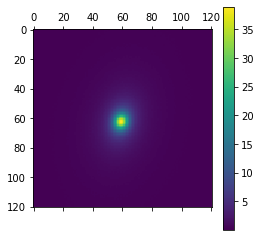

In [4]:
img = np.loadtxt('img.txt')
log_img = np.log10(img)
plt.matshow(img)
plt.colorbar()

The unit of each pixel’s flux value is electron/second. The total exposure time for this image is 600 seconds. What is the noise level in each pixel in the electron/second unit? Plot the signal-to-noise ratio map for the image using `matshow()`.

Ans: 
- The noise level in each pixel can be estimated based on the total number of electrons collected in each pixel during the exposure time. 

- the total number of electrons collected in each pixel is simply the pixel value multiplied by the exposure time.

- shot noise is proportional to the square root of the number of particles that carry energy, such as electrons in this case. Therefore, the noise level in each pixel can be estimated as the square root of the total number of electrons collected in that pixel. assuming that the noise is dominated by shot noise. Note that other sources of noise, such as read noise or dark current, may also contribute to the total noise in each pixel.

- noise level = sqrt(pixel value x exposure time)

In [5]:
pixel = np.shape(log_img)
size = 0.05 *np.array(pixel)
print(size, "arcsec")

[6.05 6.05] arcsec


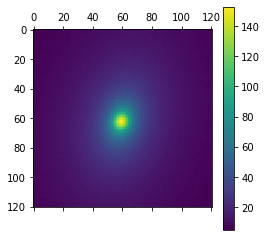

In [25]:
# Normally we would calculate with background noise using
# noise = np.sqrt(image + background*600.0)
# Here we will use noise only from image.
# so signal_to_noise_ratio=image/sqrt(image)=sqrt(image)
noise = np.sqrt(img*600)/600
#log_noise = np.log10(noise)
plt.matshow(img/noise) #here data carries image data
plt.colorbar()

Model the flux distribution in the image using an elliptical Sersic function. Don’t forget the PSF in your model. You will need to find the uncertainties of the model parameters using MCMC. Fix $n_{Sersic} = 4$ in your model, but find the best-fit values for other parameters. The other model parameters and their priors are: 
 - x-centroid, $x_0$: prior up to you to choose
 - y-centroid, $y_0$: prior up to you to choose
 - scale radius, $R_{Sersic}$: uniform between 0 arcsec and 3 arcsec
 - axis ratio, q: uniform between 0.4 and 1
 - position angle, φ:  uniform between 0 and π
 - amplitude: prior is up to you to choose


In [8]:
def model(amplitude, r_eff, x_0, y_0, q, theta):
    sersic = Sersic2D(amplitude = amplitude,
                     r_eff = r_eff,
                     n=4,
                     x_0=x_0,
                     y_0=y_0,
                     ellip= 1-q,
                     theta=theta)
    FWHM = 0.3/0.05 #pixel
    std = FWHM/(2*np.sqrt(2*np.log(2)))
    kernel = Gaussian2DKernel(x_stddev= std, y_stddev= std)
    x,y = np.meshgrid(np.arange(121), np.arange(121))
    model_img = sersic(x,y)
    model_conv = convolve(model_img, kernel)
    
    return model_conv

In [9]:
# write code. You may use multiple notebook cells as necessary.
def get_log_likelihood(params):
    """
    Compute the log likelihood value.
    :param params: array containing model parameters
    :type params: np.array
    :return: log likelihood value
    :rtype: float
    """
    # write code
    yerr= noise
    
    amplitude, r_eff, x_0, y_0, q, theta = params
    model1 = model(amplitude, r_eff, x_0, y_0, q, theta)
    
    sigma2 = yerr**2
    return -0.5 * np.sum((img - model1) ** 2 / sigma2)


def get_log_prior(params):
    """
    Get the log prior value.
    :param params: array containing model parameters
    :type params: np.array
    :return: log prior value
    :rtype: float
    """
    # write code
    amplitude, r_eff, x_0, y_0, q, theta = params
    if 0 < amplitude and 0 < r_eff < 60 and 0 < x_0 < 120 and 0 < y_0 < 120 and 0.4 < q < 1 and 0 < theta < np.pi:
        return 0.0
    return -np.inf


def get_log_posterior(params):
    """
    Compute the log posterior value.
    :param params: array containing model parameters
    :type params: np.array
    :return: log posterior value
    :rtype: float
    """
    log_prior = get_log_prior(params)

    if np.isinf(log_prior):
        return -np.inf
    else:
        return get_log_likelihood(params) + log_prior

In [12]:
import emcee # import the emcee package

init_params = np.array([1, 24, 62, 61, 0.9, 3]) # insert your initial guess for the model parameters
num_step = 1000
num_walkers = 50
num_params = len(init_params)
init_walker_positions = np.random.normal(loc=init_params, scale=1e-4,
                                        size=(num_walkers, num_params))

sampler = emcee.EnsembleSampler(num_walkers, num_params,
                                get_log_posterior)

sampler.run_mcmc(init_walker_positions, num_step, progress=True);

100%|██████████| 1000/1000 [12:07<00:00,  1.38it/s]


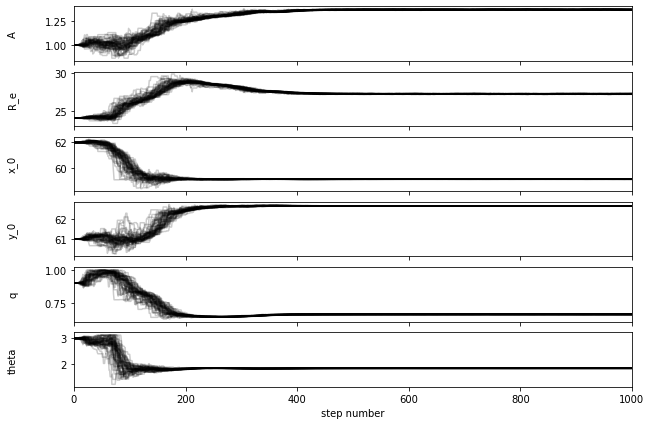

In [14]:
fig, axes = plt.subplots(num_params, figsize=(10, 7), sharex=True)

samples = sampler.get_chain()

labels = ["A","R_e", "x_0", "y_0", "q", "theta"] # make a list of strings for the labels of your model parameters


for i in range(num_params):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.2)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [19]:
from IPython.display import display, Math

discard = 200
flat_samples = sampler.get_chain(discard=discard, thin=15, flat=True)

values = np.empty((0,3)) 
for i in range(num_params):
    percentile_16, median, percentile_84 = np.percentile(
        flat_samples[:, i], [16, 50, 84])
    values = np.vstack((values, np.array([percentile_16, median, percentile_84])))

    text = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{+{2:.4f}}}"
    text = text.format(median,
                       median - percentile_16,
                       percentile_84 - median,
                       labels[i])
    display(Math(text))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

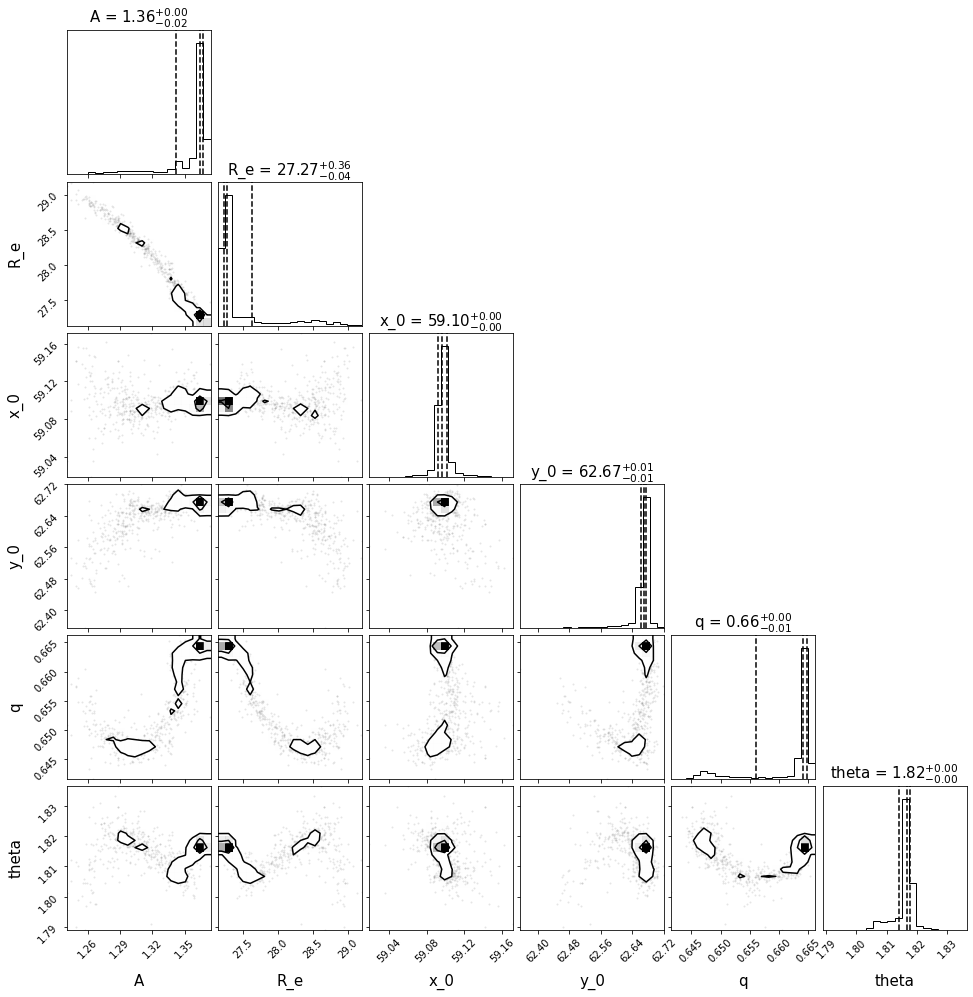

In [20]:
corner.corner(flat_samples, labels=labels, label_kwargs={"fontsize": 15},quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 15});

Make a residual plot, where $residual = \frac{(image - model)}{noise level}$. Choose the colormap “RdBu_r” and set `vmax = 3, vmin = -3` in the `matshow()` function. What’s the chi-squared $(χ^2)$ value for your fit? What’s the reduced chi-squared?

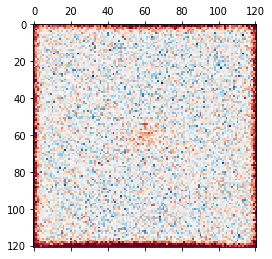

In [21]:
amplitude, r_eff, x_0, y_0, q, theta = values[:,1]
model3 = model(amplitude, r_eff, x_0, y_0, q, theta)
residual = (img - model3)/noise

plt.matshow(residual, cmap='RdBu_r', vmin=-3, vmax=3)

In [22]:
chi2 = np.sum(((img-model3)**2)/model3)
print("chi2:",chi2)

R_chi2 = np.mean(((img - model3)/noise)**2)
print("Rchi2:", R_chi2)

chi2: 37.72155911201392
Rchi2: 1.1436827890638588


What is the half-light radius or the effective radius of this galaxy?

In [23]:
R = np.sqrt(values[4]) * values[1]*0.05 #in arcsec, by multiplying np.sqrt(q) we are taking the r_eff along the intermadiate axis
text = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{+{2:.4f}}}"
text = text.format(R[1],
                   R[1] - R[0],
                   R[2] - R[1],
                       "Reff")
display(Math(text))

<IPython.core.display.Math object>

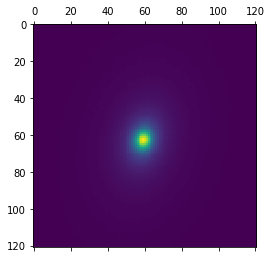

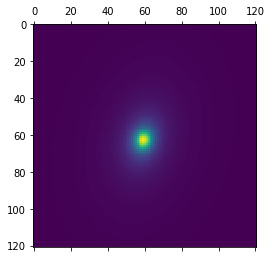

In [24]:
amplitude, r_eff, x_0, y_0, q, theta = values[:,1]
model_img_conv = model(amplitude, r_eff, x_0, y_0, q, theta)

plt.matshow(img)
plt.matshow(model_img_conv)